In [3]:
import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('voice.csv')
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [6]:
male_data=data[data['label']=='male']
female_data=data[data['label']=='female']
male_data.loc[:,'label']=1.0
female_data.loc[:,'label']=0.0

C:\Users\Saarthak\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
female_data.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
1584  0.158108  0.082782  0.191191  0.062350  0.224552  0.162202  2.801344   
1585  0.182855  0.067789  0.200639  0.175489  0.226068  0.050579  3.001890   
1586  0.199807  0.061974  0.211358  0.184422  0.235687  0.051265  2.543841   
1587  0.195280  0.072087  0.204656  0.180611  0.255954  0.075344  2.392326   
1588  0.208504  0.057550  0.220229  0.190343  0.249759  0.059416  1.707786   

           kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
1584  19.929617  0.952161  0.679223  ...    0.158108  0.185042  0.023022   
1585  19.865482  0.910458  0.506099  ...    0.182855  0.159590  0.018713   
1586  14.921964  0.904432  0.425289  ...    0.199807  0.156465  0.016194   
1587  10.061489  0.907115  0.524209  ...    0.195280  0.182629  0.024922   
1588   5.670912  0.879674  0.343548  ...    0.208504  0.162043  0.016807   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
1584  0.275862  0.272964  0.046875  0.742188  0.695312  0.339888    0.0  
1585  0.266667  0.258970  0.054688  0.804688  0.750000  0.269231    0.0  
1586  0.266667  0.250446  0.054688  0.898438  0.843750  0.329521    0.0  
1587  0.275862  0.269531  0.054688  0.703125  0.648438  0.294717    0.0  
1588  0.262295  0.260789  0.054688  0.812500  0.757812  0.251546    0.0  

[5 rows x 21 columns]

In [8]:
male_data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    1.0  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    1.0  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    1.0  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    1.0  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    1.0  

[5 rows x 21 columns]

In [9]:
data_with_label_1_0=pd.concat([male_data,female_data])
data_with_label_1_0.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    1.0  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    1.0  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    1.0  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    1.0  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    1.0  

[5 rows x 21 columns]

In [10]:
data_with_label_1_0 = data_with_label_1_0.sample(frac=1).reset_index(drop=True)
size_of_data=data_with_label_1_0.shape[0]
data_with_label_1_0.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.144461  0.069922  0.148396  0.087085  0.198773  0.111688  2.025650   
1  0.187324  0.033986  0.188447  0.170518  0.204850  0.034332  2.371323   
2  0.203464  0.033576  0.205211  0.182368  0.225474  0.043105  1.598102   
3  0.194306  0.041037  0.197438  0.190148  0.211823  0.021675  4.822886   
4  0.178450  0.060248  0.162157  0.131958  0.231090  0.099132  1.231659   

        kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   8.292933  0.959330  0.708367  ...    0.144461  0.096817  0.017410   
1   8.369805  0.834362  0.232040  ...    0.187324  0.163658  0.018824   
2   4.729248  0.863682  0.205262  ...    0.203464  0.168101  0.056940   
3  31.778717  0.823883  0.270735  ...    0.194306  0.189247  0.009911   
4   4.002848  0.924495  0.441528  ...    0.178450  0.133257  0.047431   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.262295  0.669744  0.007812  4.812500  4.804688  0.163008    1.0  
1  0.205128  0.578125  0.164062  6.906250  6.742188  0.069597    0.0  
2  0.268156  1.411237  0.023438  8.929688  8.906250  0.119501    0.0  
3  0.243902  0.494718  0.195312  1.230469  1.035156  0.309086    0.0  
4  0.277457  0.770508  0.023438  3.773438  3.750000  0.103444    1.0  

[5 rows x 21 columns]

In [11]:
train_data_with_label_1_0=data_with_label_1_0.loc[:size_of_data*8.0/10,:]
valid_data_with_label_1_0=data_with_label_1_0.loc[size_of_data*8.0/10:size_of_data,:]
#test_data_with_label_1_0=data_with_label_1_0.loc[size_of_data*8.0/10:size_of_data,:]

In [12]:
train_data_with_label_1_0.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.144461  0.069922  0.148396  0.087085  0.198773  0.111688  2.025650   
1  0.187324  0.033986  0.188447  0.170518  0.204850  0.034332  2.371323   
2  0.203464  0.033576  0.205211  0.182368  0.225474  0.043105  1.598102   
3  0.194306  0.041037  0.197438  0.190148  0.211823  0.021675  4.822886   
4  0.178450  0.060248  0.162157  0.131958  0.231090  0.099132  1.231659   

        kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   8.292933  0.959330  0.708367  ...    0.144461  0.096817  0.017410   
1   8.369805  0.834362  0.232040  ...    0.187324  0.163658  0.018824   
2   4.729248  0.863682  0.205262  ...    0.203464  0.168101  0.056940   
3  31.778717  0.823883  0.270735  ...    0.194306  0.189247  0.009911   
4   4.002848  0.924495  0.441528  ...    0.178450  0.133257  0.047431   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.262295  0.669744  0.007812  4.812500  4.804688  0.163008    1.0  
1  0.205128  0.578125  0.164062  6.906250  6.742188  0.069597    0.0  
2  0.268156  1.411237  0.023438  8.929688  8.906250  0.119501    0.0  
3  0.243902  0.494718  0.195312  1.230469  1.035156  0.309086    0.0  
4  0.277457  0.770508  0.023438  3.773438  3.750000  0.103444    1.0  

[5 rows x 21 columns]

In [13]:
valid_data_with_label_1_0.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
2535  0.085151  0.079648  0.069628  0.014149  0.130319  0.116170  2.883271   
2536  0.160925  0.068627  0.173489  0.098833  0.211225  0.112392  2.670335   
2537  0.154623  0.083056  0.138999  0.113258  0.239101  0.125843  3.128076   
2538  0.157579  0.079698  0.147801  0.116393  0.240176  0.123783  2.022532   
2539  0.197275  0.036448  0.199416  0.175934  0.221296  0.045362  2.425309   

           kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
2535  11.894474  0.927998  0.599908  ...    0.085151  0.109043  0.021248   
2536  12.895997  0.933989  0.566987  ...    0.160925  0.097513  0.019900   
2537  23.302346  0.943545  0.627002  ...    0.154623  0.128543  0.015920   
2538   8.132139  0.944202  0.639429  ...    0.157579  0.131519  0.031936   
2539  11.654342  0.886176  0.236970  ...    0.197275  0.164764  0.019950   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
2535  0.275862  0.335625  0.007812  4.289062  4.281250  0.137940    1.0  
2536  0.271186  1.143029  0.093750  6.429688  6.335938  0.139334    1.0  
2537  0.266667  0.261127  0.007812  4.984375  4.976562  0.046752    1.0  
2538  0.250000  0.435397  0.007812  4.960938  4.953125  0.109490    1.0  
2539  0.271186  0.775240  0.164062  6.140625  5.976562  0.142256    0.0  

[5 rows x 21 columns]

In [14]:
#test_data_with_label_1_0.head()

In [15]:
train_data_tensor = torch.tensor(train_data_with_label_1_0.values)
valid_data_tensor = torch.tensor(valid_data_with_label_1_0.values)
#test_data_tensor = torch.tensor(test_data_with_label_1_0.values)

In [16]:
trainloader = torch.utils.data.DataLoader(train_data_tensor, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data_tensor, batch_size=64, shuffle=True)
#testloader = torch.utils.data.DataLoader(test_data_tensor, batch_size=64, shuffle=True)


for train_data_with_label in trainloader:
    train_data=train_data_with_label[:,:-1]
    train_data_label=train_data_with_label[:,-1:]
    print(train_data.shape)


In [17]:
#for train_data_with_label in trainloader:   
 #   train_data=train_data_with_label[:,:-1]
  #  train_data_label=train_data_with_label[:,-1:]
   # print(train_data)
    

In [20]:
model = nn.Sequential(nn.Linear(20, 64),
                      nn.Tanh(),
                      nn.Dropout(p=0.5),
                      nn.Linear(64, 256),
                      nn.Tanh(),
                      nn.Dropout(p=0.5),
                      nn.Linear(256, 256),
                      nn.Tanh(),
                      nn.Dropout(p=0.5),
                      nn.Linear(256, 64),
                      nn.Tanh(),
                      nn.Dropout(p=0.5),
                      nn.Linear(64, 1),
                      nn.Sigmoid()
                      )

def converting_male_female(x):
    if x>0.5:
        x=1
    else:
        x=0
    return x   

train_losses, valid_losses = [], []
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 100
for e in range(epochs):
    running_loss = 0
    for train_data_with_label in trainloader:   
        train_data=train_data_with_label[:,:-1]
        train_data_label=train_data_with_label[:,-1:]
        optimizer.zero_grad()
        
        output = model(train_data.type(torch.FloatTensor)).view(-1)
        train_data_label = train_data_label.view(-1)
        #print(output)
       # output=output.apply(converting_male_female)
        loss = criterion(output,train_data_label.float())
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()
    else:
        valid_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for valid_data_with_label in validloader:
                valid_data=valid_data_with_label[:,:-1]
                valid_data_label=valid_data_with_label[:,-1:] 
                output_valid = model(valid_data.type(torch.FloatTensor)).view(-1)
                print(output_valid,valid_data_label)
                valid_data_label = valid_data_label.view(-1)
                valid_loss += criterion(output_valid,valid_data_label.float())                
               # accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        valid_losses.append(valid_loss/len(validloader))

      #  print("Epoch: {}/{}.. ".format(e+1, epochs),
      #        "Training Loss: {:.3f}.. ".format(train_losses[-1]),
       #       "Valid Loss: {:.3f}.. ".format(valid_losses[-1]))
             # "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

tensor([0.5537, 0.5306, 0.5990, 0.5271, 0.5271, 0.6200, 0.4831, 0.4611, 0.5875,
        0.5458, 0.5623, 0.4489, 0.5256, 0.5487, 0.5182, 0.5844, 0.5207, 0.5622,
        0.5573, 0.4992, 0.5530, 0.5441, 0.5625, 0.5410, 0.5672, 0.5834, 0.4966,
        0.5273, 0.5698, 0.6668, 0.5958, 0.5817, 0.4855, 0.5082, 0.5350, 0.5766,
        0.5978, 0.6022, 0.5151, 0.5527, 0.5850, 0.5220, 0.5026, 0.5209, 0.5093,
        0.4915, 0.5309, 0.5297, 0.5686, 0.5474, 0.5328, 0.4790, 0.5682, 0.5313,
        0.3684, 0.6370, 0.5657, 0.5823, 0.5550, 0.5720, 0.5210, 0.4336, 0.5240,
        0.5158], grad_fn=<ViewBackward>)
tensor([0.5835, 0.5560, 0.5841, 0.5124, 0.5335, 0.6159, 0.5089, 0.5537, 0.4536,
        0.4851, 0.5349, 0.5163, 0.5099, 0.5401, 0.5190, 0.5451, 0.5362, 0.5433,
        0.5169, 0.5914, 0.5244, 0.5733, 0.4849, 0.6011, 0.5227, 0.6377, 0.5206,
        0.4350, 0.5298, 0.6360, 0.5756, 0.5167, 0.4548, 0.5242, 0.5341, 0.5874,
        0.5954, 0.5031, 0.6074, 0.5975, 0.6572, 0.5870, 0.4776, 0.5775, 0.6191,

        0.4964], grad_fn=<ViewBackward>)
tensor([0.5490, 0.4383, 0.5218, 0.5615, 0.5509, 0.5614, 0.6099, 0.4331, 0.5037,
        0.4523, 0.4670, 0.5937, 0.4462, 0.4940, 0.6075, 0.4817, 0.5331, 0.5504,
        0.4383, 0.5396, 0.5487, 0.5628, 0.5072, 0.4767, 0.4954, 0.5761, 0.5876,
        0.5452, 0.4702, 0.6029, 0.5527, 0.5583, 0.5755, 0.5562, 0.4413, 0.4800,
        0.4287, 0.4806, 0.6023, 0.5358, 0.5503, 0.5082, 0.4747, 0.5298, 0.5255,
        0.4605, 0.4694, 0.5877, 0.5699, 0.4936, 0.5541, 0.5665, 0.4676, 0.5160,
        0.6342, 0.5798, 0.5315, 0.5598, 0.6179, 0.5124, 0.5657, 0.5872, 0.4249,
        0.4451], grad_fn=<ViewBackward>)
tensor([0.5095, 0.5175, 0.5573, 0.5578, 0.5743, 0.4997, 0.4872, 0.5081, 0.4737,
        0.4858, 0.4623, 0.5169, 0.4636, 0.5082, 0.5539, 0.5793, 0.4586, 0.4622,
        0.5346, 0.5366, 0.5090, 0.4381, 0.4807, 0.5748, 0.5581, 0.5434, 0.5680,
        0.4112, 0.4620, 0.5657, 0.4757, 0.4745, 0.4912, 0.6525, 0.4982, 0.5246,
        0.5319, 0.4974, 0.5013, 0.4911

        0.5281], grad_fn=<ViewBackward>)
tensor([0.5158, 0.5779, 0.5691, 0.4428, 0.6251, 0.5345, 0.3829, 0.5044, 0.4847,
        0.4249, 0.4701, 0.5412, 0.5243, 0.3980, 0.5294, 0.5158, 0.4358, 0.4604,
        0.4237, 0.4847, 0.4460, 0.4177, 0.4934, 0.4700, 0.5199, 0.5598, 0.5223,
        0.5637, 0.6067, 0.4778, 0.4106, 0.5666, 0.5458, 0.4832, 0.4430, 0.5847,
        0.5015, 0.4504, 0.5429, 0.4154, 0.5686, 0.4649, 0.4626, 0.4967, 0.6215,
        0.5179, 0.5199, 0.4939, 0.5288, 0.4487, 0.4899, 0.4758, 0.4749, 0.5433,
        0.4680, 0.5030, 0.4666, 0.5047, 0.4203, 0.4773, 0.4976, 0.5650, 0.4728,
        0.4122], grad_fn=<ViewBackward>)
tensor([0.5516, 0.5052, 0.4389, 0.5500, 0.4416, 0.5047, 0.5400, 0.5608, 0.4670,
        0.4533, 0.4943, 0.5104, 0.5749, 0.5082, 0.5415, 0.5340, 0.4705, 0.5413,
        0.5228, 0.4798, 0.4971, 0.4855, 0.5058, 0.4727, 0.5374, 0.4385, 0.5829,
        0.5191, 0.4616, 0.4905, 0.4496, 0.5302, 0.5709, 0.5143, 0.5155, 0.6314,
        0.4327, 0.4253, 0.4871, 0.4883

        [0.]], dtype=torch.float64)
tensor([0.4892, 0.4800, 0.4786, 0.4925, 0.4741, 0.4924, 0.4736, 0.4967, 0.4907,
        0.4816, 0.4918, 0.4894, 0.4911, 0.4825, 0.4857, 0.4744, 0.4880, 0.4755,
        0.4717, 0.4773, 0.4745, 0.4847, 0.4844, 0.4839, 0.4927, 0.4893, 0.4869,
        0.4922, 0.4931, 0.4947, 0.4919, 0.4895, 0.4918, 0.4792, 0.4972, 0.4754,
        0.4839, 0.4846, 0.4934, 0.4929, 0.4922, 0.4906, 0.4861, 0.4719, 0.4904,
        0.4970, 0.4830, 0.4874, 0.4993, 0.4861, 0.4860, 0.4852, 0.4954, 0.4903,
        0.4860, 0.4900, 0.4952, 0.4931, 0.4903, 0.4907, 0.4882, 0.4780, 0.4999,
        0.4827]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4886, 0.4914, 0.4882, 0.4876, 0.4901, 0.4932, 0.4720, 0.4909, 0.4786,
        0.4980, 0.4893, 0.4951, 0.4909, 0.4806, 0.4927, 0.5149, 0.4912, 0.4732,
        0.4781, 0.4875, 0.4855, 0.4916, 0.4691, 0.4871, 0.4935, 0.4885, 0.4857,
        0.4766, 0.4939, 0.4919, 0.4820, 0.4911, 0.4742, 0.4831, 0.4779, 0.4907,
        0.4975, 0.4894, 0.4782, 0.4894, 0.4900, 0.4858, 0.4807, 0.4740, 0.4752,
        0.4779, 0.4954, 0.4852, 0.4956, 0.4952, 0.4901, 0.4953, 0.4845, 0.4791,
        0.4978, 0.4820, 0.4735, 0.5001, 0.4884, 0.4873, 0.4754, 0.4863, 0.4923,
        0.4926]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.4636], grad_fn=<ViewBackward>)
tensor([0.4765, 0.4778, 0.4002, 0.5739, 0.5347, 0.4778, 0.5128, 0.5062, 0.5253,
        0.4798, 0.4681, 0.5112, 0.4830, 0.3729, 0.5636, 0.4942, 0.5413, 0.3751,
        0.5275, 0.5489, 0.4223, 0.4877, 0.6137, 0.4991, 0.4712, 0.4975, 0.3827,
        0.4166, 0.4799, 0.4720, 0.3641, 0.5313, 0.5462, 0.5081, 0.4232, 0.4786,
        0.3739, 0.3488, 0.4920, 0.5082, 0.4882, 0.4421, 0.4493, 0.4843, 0.5953,
        0.4643, 0.3505, 0.4326, 0.5367, 0.3957, 0.5056, 0.4992, 0.4536, 0.4087,
        0.4433, 0.5173, 0.5016, 0.3909, 0.4160, 0.4651, 0.5144, 0.5501, 0.4164,
        0.5319], grad_fn=<ViewBackward>)
tensor([0.4946, 0.3563, 0.4214, 0.4581, 0.4635, 0.5248, 0.5678, 0.4580, 0.5696,
        0.3786, 0.5639, 0.5369, 0.5112, 0.4519, 0.5871, 0.5198, 0.5199, 0.4220,
        0.5692, 0.3636, 0.5401, 0.5326, 0.4389, 0.3837, 0.5055, 0.5327, 0.5553,
        0.6161, 0.5486, 0.5136, 0.4339, 0.4479, 0.5451, 0.4670, 0.5765, 0.4885,
        0.4322, 0.5733, 0.5269, 0.5224

        0.4949], grad_fn=<ViewBackward>)
tensor([0.5578, 0.5038, 0.5619, 0.6116, 0.3800, 0.5498, 0.4415, 0.5410, 0.4143,
        0.3935, 0.4987, 0.6087, 0.6435, 0.5487, 0.4067, 0.4388, 0.5534, 0.5533,
        0.4874, 0.5179, 0.4809, 0.5083, 0.4969, 0.5579, 0.4494, 0.4217, 0.4976,
        0.4886, 0.4527, 0.4567, 0.5129, 0.4544, 0.4997, 0.6089, 0.4235, 0.5516,
        0.5150, 0.5398, 0.4743, 0.4364, 0.5084, 0.4869, 0.5506, 0.5219, 0.4838,
        0.5326, 0.4417, 0.3709, 0.5293, 0.5127, 0.5839, 0.5455, 0.4710, 0.4908,
        0.4106, 0.4855, 0.4402, 0.5072, 0.5121, 0.4450, 0.4115, 0.4049, 0.4361,
        0.3576], grad_fn=<ViewBackward>)
tensor([0.4719, 0.4450, 0.3739, 0.4212, 0.4160, 0.4778, 0.3668, 0.5545, 0.4279,
        0.3676, 0.4932, 0.4969, 0.4573, 0.4971, 0.5023, 0.5729, 0.5013, 0.4933,
        0.4922, 0.5526, 0.4717, 0.4743, 0.4487, 0.5481, 0.5606, 0.5233, 0.5290,
        0.5046, 0.5412, 0.4881, 0.5343, 0.3437, 0.4617, 0.5015, 0.4526, 0.5126,
        0.5504, 0.5249, 0.5325, 0.4571

        0.5699], grad_fn=<ViewBackward>)
tensor([0.3852, 0.4582, 0.4289, 0.5192, 0.5166, 0.4657, 0.3905, 0.5021, 0.4550,
        0.4381, 0.5327, 0.3717, 0.5702, 0.4635, 0.4946, 0.5429, 0.5030, 0.5118,
        0.4782, 0.5072, 0.4930, 0.3617, 0.4810, 0.5380, 0.5657, 0.5542, 0.4009,
        0.4090, 0.4264, 0.5344, 0.5235, 0.4059, 0.5002, 0.5563, 0.5427, 0.4881,
        0.5742, 0.5538, 0.6107, 0.5337, 0.5116, 0.4094, 0.5262, 0.5202, 0.4525,
        0.4286, 0.5427, 0.5094, 0.5753, 0.5022, 0.4340, 0.5227, 0.5146, 0.4576,
        0.4085, 0.4828, 0.5654, 0.5026, 0.4567, 0.5484, 0.4905, 0.4386, 0.4756,
        0.4364], grad_fn=<ViewBackward>)
tensor([0.5206, 0.4907, 0.5307, 0.4654, 0.4354, 0.5063, 0.4673, 0.5492, 0.5807,
        0.5076, 0.4715, 0.5111, 0.5468, 0.3425, 0.5630, 0.4580, 0.5181, 0.5142,
        0.5408, 0.4676, 0.4941, 0.4333, 0.5301, 0.4087, 0.5766, 0.5282, 0.4431,
        0.4502, 0.2929, 0.3924, 0.4980, 0.5202, 0.4862, 0.5260, 0.4479, 0.4700,
        0.5584, 0.4757, 0.4061, 0.5171

        [0.]], dtype=torch.float64)
tensor([0.4784, 0.4527, 0.4665, 0.4893, 0.4572, 0.4945, 0.4796, 0.4858, 0.5014,
        0.4605, 0.4838, 0.4825, 0.4725, 0.4901, 0.4788, 0.4882, 0.4832, 0.4842,
        0.4891, 0.4778, 0.4962, 0.4872, 0.4775, 0.4803, 0.4726, 0.4689, 0.4905,
        0.5000, 0.4833, 0.4934, 0.4729, 0.4776, 0.4792, 0.4712, 0.4626, 0.4627,
        0.4916, 0.4981, 0.4900, 0.4857, 0.4844, 0.4720, 0.4570, 0.5005, 0.4898,
        0.4619, 0.4778, 0.4751, 0.4813, 0.4771, 0.4709, 0.4773, 0.4771, 0.4731,
        0.4904, 0.4980, 0.4698, 0.4941, 0.4676, 0.4715, 0.4632, 0.4940, 0.4670,
        0.4835]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3958, 0.4579, 0.4797, 0.4582, 0.5305, 0.5721, 0.5654, 0.4741, 0.4898,
        0.4845, 0.4380, 0.5364, 0.4848, 0.5638, 0.4526, 0.5049, 0.4746, 0.5542,
        0.4723, 0.4627, 0.4659, 0.4887, 0.4710, 0.5275, 0.3707, 0.4313, 0.4825,
        0.4781, 0.4977, 0.4863, 0.5008, 0.4011, 0.5866, 0.3599, 0.5140, 0.4581,
        0.4792, 0.4639, 0.4352, 0.6300, 0.5423, 0.5186, 0.5408, 0.4012, 0.4469,
        0.5129, 0.4197, 0.5417, 0.4081, 0.5616, 0.5324, 0.5413, 0.4604, 0.4990,
        0.4621, 0.4021, 0.4714, 0.5207, 0.3776, 0.6000, 0.4340, 0.5467, 0.4960,
        0.5518], grad_fn=<ViewBackward>)
tensor([0.4492, 0.6413, 0.4664, 0.4880, 0.4792, 0.4630, 0.5298, 0.4085, 0.4793,
        0.5764, 0.5099, 0.4872, 0.4690, 0.4615, 0.4561, 0.4258, 0.4875, 0.5646,
        0.4439, 0.5262, 0.4792, 0.3983, 0.5062, 0.4971, 0.4478, 0.4402, 0.4521,
        0.5554, 0.4536, 0.4763, 0.4328, 0.6398, 0.4417, 0.5264, 0.5214, 0.4818,
        0.4782, 0.5640, 0.5074, 0.4766, 0.4

        0.4966], grad_fn=<ViewBackward>)
tensor([0.5080, 0.4815, 0.5481, 0.5776, 0.5042, 0.4368, 0.4658, 0.5915, 0.4256,
        0.4596, 0.5095, 0.4491, 0.5160, 0.5697, 0.4562, 0.5148, 0.5584, 0.5030,
        0.4558, 0.6127, 0.4926, 0.5220, 0.5626, 0.5574, 0.5284, 0.4344, 0.4871,
        0.4316, 0.4433, 0.5089, 0.4432, 0.5489, 0.4866, 0.5070, 0.4409, 0.5890,
        0.5147, 0.5212, 0.5231, 0.5001, 0.4717, 0.5129, 0.4904, 0.4492, 0.4641,
        0.5781, 0.5037, 0.4298, 0.6127, 0.4676, 0.4870, 0.4929, 0.4671, 0.3660,
        0.4739, 0.4947, 0.5423, 0.4868, 0.4523, 0.5297, 0.5199, 0.5748, 0.4504,
        0.6072], grad_fn=<ViewBackward>)
tensor([0.5505, 0.4741, 0.4617, 0.4931, 0.5357, 0.5898, 0.5147, 0.4705, 0.3715,
        0.4839, 0.4956, 0.5158, 0.5609, 0.5157, 0.4787, 0.3787, 0.3973, 0.3659,
        0.5606, 0.4724, 0.5287, 0.4691, 0.5150, 0.4989, 0.5032, 0.5266, 0.4905,
        0.4079, 0.5916, 0.5118, 0.5267, 0.4293, 0.4581, 0.4584, 0.4447, 0.5533,
        0.3970, 0.5501, 0.5200, 0.4973

        0.6262], grad_fn=<ViewBackward>)
tensor([0.4240, 0.4963, 0.3618, 0.4842, 0.5418, 0.4905, 0.5027, 0.5064, 0.4910,
        0.4651, 0.5710, 0.5104, 0.4880, 0.5370, 0.4905, 0.4967, 0.4895, 0.4364,
        0.4922, 0.5219, 0.5278, 0.3743, 0.4887, 0.4911, 0.4776, 0.5165, 0.4906,
        0.6072, 0.3841, 0.4934, 0.4601, 0.5017, 0.3926, 0.5411, 0.4819, 0.5253,
        0.5028, 0.4941, 0.4924, 0.5390, 0.5106, 0.5211, 0.4901, 0.5499, 0.5655,
        0.5014, 0.5069, 0.4632, 0.5464, 0.5503, 0.4483, 0.4764, 0.5939, 0.5674,
        0.5197, 0.4850, 0.5146, 0.4375, 0.5067, 0.4933, 0.4326, 0.4508, 0.3812,
        0.3627], grad_fn=<ViewBackward>)
tensor([0.5241, 0.4600, 0.5956, 0.5140, 0.4634, 0.5108, 0.5493, 0.4412, 0.4803,
        0.5042, 0.4902, 0.5207, 0.4314, 0.5203, 0.6051, 0.4113, 0.5675, 0.4418,
        0.4745, 0.4433, 0.5579, 0.5141, 0.4668, 0.5279, 0.5659, 0.3714, 0.4672,
        0.4982, 0.3420, 0.5937, 0.5498, 0.3809, 0.5017, 0.4347, 0.4923, 0.5379,
        0.4573, 0.3961, 0.5393, 0.4558

        [1.]], dtype=torch.float64)
tensor([0.5045, 0.4766, 0.4965, 0.5184, 0.4976, 0.4585, 0.4645, 0.4836, 0.4875,
        0.4968, 0.4918, 0.4822, 0.4987, 0.4660, 0.4758, 0.4882, 0.4627, 0.4763,
        0.4733, 0.4683, 0.5048, 0.4815, 0.4889, 0.4629, 0.4908, 0.4845, 0.5051,
        0.5075, 0.4763, 0.5122, 0.4950, 0.4807, 0.4971, 0.4734, 0.5026, 0.4811,
        0.4890, 0.4821, 0.5042, 0.4981, 0.5134, 0.4721, 0.4786, 0.4894, 0.5128,
        0.5098, 0.4675, 0.5155, 0.5218, 0.4777, 0.4757, 0.4676, 0.4836, 0.4783,
        0.4781, 0.5103, 0.4604, 0.5062, 0.4581, 0.4778, 0.5076, 0.4744, 0.4785,
        0.5110]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4767, 0.4821, 0.4663, 0.4851, 0.4615, 0.4664, 0.4610, 0.4832, 0.4750,
        0.4830, 0.4721, 0.4762, 0.4879, 0.4777, 0.4845, 0.4637, 0.5107, 0.4973,
        0.4878, 0.5099, 0.4928, 0.4545, 0.5012, 0.4762, 0.4522, 0.4763, 0.5194,
        0.4979, 0.4757, 0.5049, 0.4596, 0.5098, 0.4930, 0.4762, 0.5046, 0.4670,
        0.5185, 0.4670, 0.5052, 0.4730, 0.4829, 0.4790, 0.4641, 0.4860, 0.4702,
        0.4795, 0.4770, 0.4931, 0.5069, 0.5107, 0.4783, 0.5153, 0.4608, 0.4830,
        0.5073, 0.4823, 0.4666, 0.4786, 0.4572, 0.4749, 0.4717, 0.4867, 0.4848,
        0.5057]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        0.3762], grad_fn=<ViewBackward>)
tensor([0.5481, 0.3886, 0.5346, 0.5375, 0.4392, 0.3996, 0.4515, 0.5217, 0.5589,
        0.4159, 0.4572, 0.4424, 0.5650, 0.4800, 0.4010, 0.4056, 0.5850, 0.4412,
        0.4942, 0.4347, 0.4763, 0.5493, 0.4137, 0.4877, 0.4922, 0.4646, 0.5063,
        0.4143, 0.5033, 0.5097, 0.4241, 0.6033, 0.4865, 0.5528, 0.5032, 0.4269,
        0.4559, 0.5297, 0.3605, 0.5169, 0.4898, 0.5058, 0.6774, 0.4384, 0.5762,
        0.3897, 0.4895, 0.4845, 0.5345, 0.4811, 0.4228, 0.6720, 0.4461, 0.5306,
        0.4058, 0.4688, 0.4952, 0.5991, 0.5920, 0.5235, 0.5694, 0.4260, 0.5072,
        0.4369], grad_fn=<ViewBackward>)
tensor([0.4424, 0.5232, 0.5209, 0.5479, 0.4742, 0.4705, 0.5420, 0.4370, 0.4888,
        0.5023, 0.4967, 0.5299, 0.4842, 0.5110, 0.4778, 0.4058, 0.3913, 0.5650,
        0.5054, 0.5933, 0.5099, 0.4500, 0.4444, 0.5316, 0.4235, 0.5103, 0.5091,
        0.4696, 0.6322, 0.5367, 0.4607, 0.4818, 0.4891, 0.4957, 0.5036, 0.4689,
        0.5383, 0.3572, 0.4887, 0.5303

        0.4748], grad_fn=<ViewBackward>)
tensor([0.4298, 0.5509, 0.5574, 0.5150, 0.5423, 0.5544, 0.5563, 0.4051, 0.5467,
        0.4751, 0.5374, 0.4659, 0.5149, 0.4628, 0.3797, 0.5583, 0.4171, 0.5874,
        0.5068, 0.4229, 0.5515, 0.4942, 0.4666, 0.4070, 0.4678, 0.4258, 0.5269,
        0.4567, 0.4878, 0.5190, 0.4833, 0.4831, 0.5275, 0.4564, 0.4934, 0.4343,
        0.6488, 0.4940, 0.4682, 0.4063, 0.5891, 0.4842, 0.6002, 0.5838, 0.5522,
        0.4823, 0.4685, 0.5579, 0.5040, 0.3550, 0.5110, 0.5246, 0.4893, 0.4572,
        0.4053, 0.5351, 0.4621, 0.5922, 0.5596, 0.5436, 0.3740, 0.5396, 0.5838,
        0.5749], grad_fn=<ViewBackward>)
tensor([0.5061, 0.5016, 0.5807, 0.5617, 0.4372, 0.4695, 0.5037, 0.5251, 0.5029,
        0.4842, 0.4972, 0.5304, 0.5020, 0.4746, 0.5362, 0.5101, 0.4776, 0.4767,
        0.4008, 0.4676, 0.4554, 0.5727, 0.5700, 0.5414, 0.4985, 0.4691, 0.5683,
        0.4428, 0.4976, 0.4735, 0.5777, 0.5664, 0.4752, 0.5018, 0.5420, 0.5381,
        0.5271, 0.4724, 0.4823, 0.4821

        0.4495], grad_fn=<ViewBackward>)
tensor([0.5014, 0.5788, 0.4508, 0.5469, 0.4712, 0.5695, 0.5972, 0.4501, 0.5258,
        0.4864, 0.6533, 0.4444, 0.5320, 0.5997, 0.5847, 0.4827, 0.5167, 0.5391,
        0.5869, 0.4508, 0.6210, 0.5478, 0.4960, 0.4216, 0.5224, 0.4397, 0.5301,
        0.5523, 0.4891, 0.4510, 0.5959, 0.4357, 0.4046, 0.6246, 0.4249, 0.4903,
        0.4501, 0.4754, 0.4427, 0.5762, 0.4482, 0.5642, 0.6169, 0.4886, 0.4938,
        0.4838, 0.6275, 0.5302, 0.6392, 0.4079, 0.4719, 0.4982, 0.5115, 0.4988,
        0.5483, 0.5364, 0.4118, 0.4707, 0.4884, 0.5023, 0.4950, 0.5484, 0.5493,
        0.5118], grad_fn=<ViewBackward>)
tensor([0.5306, 0.4031, 0.5243, 0.4246, 0.4939, 0.4477, 0.5123, 0.5478, 0.5757,
        0.5113, 0.4449, 0.4108, 0.4128, 0.5404, 0.6032, 0.5043, 0.5701, 0.5361,
        0.4965, 0.4649, 0.4356, 0.5204, 0.5507, 0.5600, 0.4565, 0.5857, 0.4601,
        0.4811, 0.5409, 0.5923, 0.5106, 0.5635, 0.4688, 0.5250, 0.4071, 0.5581,
        0.5544, 0.4419, 0.4109, 0.5086

        [0.]], dtype=torch.float64)
tensor([0.4830, 0.5063, 0.4789, 0.4651, 0.5016, 0.5060, 0.4940, 0.4632, 0.4866,
        0.5137, 0.4782, 0.4964, 0.5068, 0.4646, 0.4747, 0.4609, 0.4677, 0.5169,
        0.5137, 0.4860, 0.4721, 0.4735, 0.4680, 0.5016, 0.4917, 0.4682, 0.4754,
        0.5031, 0.5047, 0.4809, 0.4779, 0.5184, 0.4701, 0.5088, 0.4780, 0.4865,
        0.4639, 0.5068, 0.5122, 0.4604, 0.4924, 0.4997, 0.4649, 0.4789, 0.4615,
        0.5152, 0.4848, 0.4839, 0.4656, 0.4959, 0.4574, 0.4706, 0.5150, 0.4796,
        0.4693, 0.4810, 0.4767, 0.5054, 0.4873, 0.4879, 0.5208, 0.4582, 0.4782,
        0.4798]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4446, 0.5050, 0.5629, 0.5069, 0.5216, 0.4393, 0.5489, 0.5017, 0.5239,
        0.5878, 0.5215, 0.5223, 0.4837, 0.3661, 0.5920, 0.5182, 0.3828, 0.5657,
        0.4431, 0.5788, 0.4686, 0.5106, 0.5069, 0.4519, 0.4612, 0.5379, 0.4971,
        0.5570, 0.5102, 0.6034, 0.5009, 0.4816, 0.5380, 0.5446, 0.5197, 0.4978,
        0.5148, 0.4194, 0.4301, 0.4949, 0.4559, 0.4658, 0.3625, 0.5945, 0.5459,
        0.4472, 0.5071, 0.4752, 0.5173, 0.4395, 0.5035, 0.4468, 0.5459, 0.4763,
        0.4607, 0.4673, 0.5681, 0.5224, 0.4501, 0.5075, 0.5297, 0.4674, 0.4192,
        0.3720], grad_fn=<ViewBackward>)
tensor([0.4597, 0.5956, 0.4546, 0.4546, 0.4363, 0.4234, 0.4947, 0.4854, 0.5122,
        0.5094, 0.4382, 0.4998, 0.5297, 0.5192, 0.4666, 0.4582, 0.4783, 0.5278,
        0.5330, 0.4765, 0.4732, 0.5587, 0.4871, 0.5278, 0.6174, 0.3918, 0.5008,
        0.5097, 0.4890, 0.4814, 0.5774, 0.5427, 0.4829, 0.5154, 0.6084, 0.5422,
        0.5113, 0.4896, 0.4645, 0.5031, 0.4

        0.5210], grad_fn=<ViewBackward>)
tensor([0.4659, 0.5530, 0.4922, 0.4791, 0.4495, 0.5043, 0.4133, 0.5291, 0.5645,
        0.5298, 0.4265, 0.4956, 0.5347, 0.4193, 0.4349, 0.4713, 0.5368, 0.4884,
        0.5503, 0.5031, 0.6055, 0.4812, 0.5919, 0.4696, 0.5728, 0.5372, 0.4308,
        0.4644, 0.4646, 0.4289, 0.5248, 0.4640, 0.4369, 0.5005, 0.4688, 0.4257,
        0.4864, 0.4988, 0.4937, 0.5136, 0.4976, 0.5535, 0.4302, 0.4471, 0.3504,
        0.4196, 0.4590, 0.5084, 0.4753, 0.4594, 0.4318, 0.4611, 0.5188, 0.4356,
        0.4288, 0.5132, 0.4810, 0.5229, 0.3860, 0.4554, 0.5763, 0.5743, 0.5448,
        0.5057], grad_fn=<ViewBackward>)
tensor([0.4834, 0.4713, 0.4420, 0.4165, 0.4816, 0.4825, 0.4448, 0.4606, 0.4544,
        0.4994, 0.5344, 0.5899, 0.4222, 0.4617, 0.4363, 0.5064, 0.5184, 0.4799,
        0.4736, 0.4450, 0.5393, 0.4474, 0.5018, 0.4760, 0.5497, 0.4804, 0.4740,
        0.4258, 0.5372, 0.5821, 0.5558, 0.4582, 0.5495, 0.5550, 0.3556, 0.4282,
        0.5546, 0.5019, 0.5526, 0.5161

        0.3777], grad_fn=<ViewBackward>)
tensor([0.5803, 0.4127, 0.3225, 0.4562, 0.4987, 0.4833, 0.5052, 0.5050, 0.5183,
        0.4284, 0.4702, 0.5886, 0.5002, 0.3423, 0.4716, 0.5360, 0.5041, 0.5226,
        0.5047, 0.5324, 0.4691, 0.4944, 0.4801, 0.4895, 0.3793, 0.4644, 0.5388,
        0.4712, 0.4356, 0.4765, 0.4098, 0.5748, 0.4250, 0.5280, 0.5321, 0.4976,
        0.5305, 0.4216, 0.5777, 0.4821, 0.4529, 0.4796, 0.4459, 0.4630, 0.4206,
        0.5498, 0.5354, 0.5477, 0.4710, 0.5084, 0.5937, 0.5579, 0.3831, 0.5735,
        0.4557, 0.5828, 0.5456, 0.4164, 0.4848, 0.4342, 0.4924, 0.4480, 0.4760,
        0.5917], grad_fn=<ViewBackward>)
tensor([0.5276, 0.4266, 0.5468, 0.5219, 0.5556, 0.4147, 0.3946, 0.4454, 0.4283,
        0.5566, 0.5514, 0.4438, 0.4729, 0.5391, 0.3327, 0.5564, 0.5396, 0.5838,
        0.4585, 0.4645, 0.4499, 0.6013, 0.5148, 0.5177, 0.5116, 0.5367, 0.4591,
        0.5831, 0.4457, 0.4126, 0.4488, 0.5398, 0.5014, 0.4728, 0.4627, 0.4800,
        0.5841, 0.4054, 0.4666, 0.4754

        [1.]], dtype=torch.float64)
tensor([0.4630, 0.4976, 0.4754, 0.5313, 0.4830, 0.5008, 0.4831, 0.5103, 0.4796,
        0.4871, 0.4615, 0.4620, 0.5034, 0.4932, 0.4910, 0.4934, 0.4778, 0.5100,
        0.4892, 0.4942, 0.4788, 0.4914, 0.4981, 0.4542, 0.4981, 0.4941, 0.4930,
        0.4695, 0.4560, 0.4622, 0.4488, 0.4968, 0.4754, 0.5173, 0.5171, 0.5180,
        0.5054, 0.4577, 0.4553, 0.5204, 0.4773, 0.4641, 0.4618, 0.5236, 0.4815,
        0.4611, 0.4972, 0.5048, 0.4844, 0.4902, 0.4733, 0.4750, 0.5007, 0.4870,
        0.5065, 0.5233, 0.5070, 0.4910, 0.4695, 0.4629, 0.4703, 0.4580, 0.4768,
        0.4723]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4878, 0.5250, 0.5045, 0.4893, 0.4728, 0.5176, 0.4705, 0.5446, 0.4621,
        0.5015, 0.5084, 0.5196, 0.4719, 0.4764, 0.4993, 0.4654, 0.4732, 0.4788,
        0.4788, 0.5093, 0.4747, 0.4894, 0.4736, 0.5034, 0.4624, 0.4537, 0.4593,
        0.5119, 0.4731, 0.4747, 0.4719, 0.4844, 0.4743, 0.4667, 0.5122, 0.4603,
        0.5054, 0.4779, 0.4959, 0.4844, 0.4756, 0.5065, 0.5097, 0.5284, 0.5073,
        0.4731, 0.4693, 0.5042, 0.4815, 0.5095, 0.4848, 0.4777, 0.4631, 0.4924,
        0.4609, 0.4521, 0.4755, 0.4803, 0.4690, 0.4865, 0.4835, 0.4641, 0.5108,
        0.4828]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        0.4796], grad_fn=<ViewBackward>)
tensor([0.3981, 0.5056, 0.3865, 0.4534, 0.4488, 0.4836, 0.5674, 0.5260, 0.4690,
        0.3611, 0.4537, 0.4569, 0.5267, 0.4139, 0.4709, 0.5591, 0.5642, 0.5116,
        0.5119, 0.6099, 0.5283, 0.5202, 0.3853, 0.5112, 0.4949, 0.5717, 0.5468,
        0.5135, 0.5244, 0.5034, 0.4430, 0.5426, 0.4511, 0.4637, 0.4949, 0.3761,
        0.4790, 0.4950, 0.5202, 0.5773, 0.5043, 0.4978, 0.5921, 0.5433, 0.5625,
        0.5739, 0.4711, 0.5248, 0.5021, 0.4019, 0.4617, 0.4692, 0.5057, 0.4869,
        0.4569, 0.5471, 0.5503, 0.5178, 0.5794, 0.5584, 0.4997, 0.4280, 0.4979,
        0.4681], grad_fn=<ViewBackward>)
tensor([0.5419, 0.3456, 0.5051, 0.5564, 0.4279, 0.3999, 0.3601, 0.5166, 0.4584,
        0.4853, 0.5057, 0.4809, 0.5398, 0.4698, 0.4881, 0.5560, 0.3512, 0.4143,
        0.6071, 0.5188, 0.4769, 0.4058, 0.4604, 0.5020, 0.4841, 0.5526, 0.5458,
        0.4776, 0.5843, 0.5259, 0.4608, 0.5061, 0.3784, 0.4938, 0.4963, 0.4497,
        0.4274, 0.4277, 0.5210, 0.4403

        0.4682], grad_fn=<ViewBackward>)
tensor([0.5799, 0.4566, 0.3105, 0.4442, 0.4553, 0.4040, 0.4623, 0.5420, 0.4875,
        0.5029, 0.4651, 0.4767, 0.5543, 0.4542, 0.5430, 0.5170, 0.5066, 0.4988,
        0.4868, 0.3784, 0.3649, 0.5417, 0.5041, 0.4871, 0.5932, 0.4524, 0.5121,
        0.3941, 0.5581, 0.4869, 0.4809, 0.5897, 0.4624, 0.4817, 0.5132, 0.4875,
        0.4623, 0.5620, 0.4043, 0.4622, 0.4111, 0.4815, 0.4993, 0.4882, 0.4173,
        0.4872, 0.4993, 0.4171, 0.4569, 0.4997, 0.4049, 0.4215, 0.4967, 0.4502,
        0.5330, 0.5613, 0.6130, 0.5791, 0.4270, 0.4259, 0.5723, 0.4846, 0.3686,
        0.4405], grad_fn=<ViewBackward>)
tensor([0.3955, 0.4430, 0.4536, 0.4678, 0.3377, 0.4676, 0.5140, 0.5974, 0.4910,
        0.5011, 0.5336, 0.4316, 0.5239, 0.4223, 0.4251, 0.2895, 0.4557, 0.3513,
        0.5516, 0.3767, 0.4946, 0.4771, 0.4370, 0.5304, 0.5047, 0.4968, 0.4634,
        0.5406, 0.3879, 0.5350, 0.3504, 0.3796, 0.4782, 0.5776, 0.4900, 0.4625,
        0.4466, 0.3224, 0.3688, 0.4856

        0.5792], grad_fn=<ViewBackward>)
tensor([0.4058, 0.5273, 0.4694, 0.3974, 0.4590, 0.5471, 0.4537, 0.3549, 0.4809,
        0.4213, 0.4404, 0.4204, 0.4576, 0.4285, 0.5610, 0.4994, 0.5155, 0.5527,
        0.4432, 0.4648, 0.4641, 0.4647, 0.5148, 0.5418, 0.5082, 0.4941, 0.4759,
        0.5556, 0.4346, 0.4317, 0.4389, 0.4552, 0.3910, 0.5144, 0.4456, 0.5233,
        0.4404, 0.5522, 0.4656, 0.5273, 0.6245, 0.4475, 0.4795, 0.4075, 0.5153,
        0.5656, 0.4521, 0.5105, 0.4613, 0.4967, 0.5488, 0.4299, 0.4475, 0.4111,
        0.5281, 0.3693, 0.3987, 0.5786, 0.4897, 0.4886, 0.4385, 0.4801, 0.4856,
        0.4053], grad_fn=<ViewBackward>)
tensor([0.4748, 0.4789, 0.4647, 0.4880, 0.4431, 0.3382, 0.5718, 0.5122, 0.5422,
        0.3260, 0.4018, 0.5187, 0.4755, 0.5069, 0.5049, 0.4616, 0.4491, 0.4935,
        0.4827, 0.4733, 0.4618, 0.3977, 0.4716, 0.4616, 0.4972, 0.5142, 0.5145,
        0.5156, 0.5380, 0.4373, 0.5001, 0.4741, 0.4253, 0.4722, 0.4004, 0.4780,
        0.5928, 0.5046, 0.4768, 0.4373

        [1.]], dtype=torch.float64)
tensor([0.4946, 0.4707, 0.4895, 0.5030, 0.4549, 0.4673, 0.4829, 0.4879, 0.5224,
        0.4708, 0.4693, 0.4750, 0.4559, 0.4994, 0.4455, 0.5055, 0.4998, 0.5133,
        0.4569, 0.4488, 0.4969, 0.4674, 0.4845, 0.4619, 0.4586, 0.4614, 0.5239,
        0.4946, 0.5055, 0.4543, 0.4539, 0.4482, 0.4554, 0.5163, 0.4403, 0.4913,
        0.4671, 0.5276, 0.5082, 0.4980, 0.4218, 0.5199, 0.4905, 0.5147, 0.4770,
        0.4693, 0.4691, 0.4806, 0.4522, 0.4923, 0.4807, 0.4836, 0.4520, 0.5228,
        0.4675, 0.4807, 0.4750, 0.4886, 0.5124, 0.4644, 0.4712, 0.4598, 0.4764,
        0.4913]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4019, 0.4993, 0.3468, 0.6188, 0.4424, 0.4709, 0.4453, 0.4978, 0.4606,
        0.4968, 0.4112, 0.4667, 0.4766, 0.4187, 0.5086, 0.5052, 0.3920, 0.5137,
        0.5246, 0.4682, 0.4414, 0.4178, 0.5046, 0.3914, 0.5383, 0.4487, 0.5545,
        0.5836, 0.3724, 0.3583, 0.5126, 0.4679, 0.4659, 0.4595, 0.4704, 0.4656,
        0.5581, 0.4468, 0.4715, 0.5581, 0.4260, 0.4807, 0.5243, 0.5192, 0.5138,
        0.5051, 0.5443, 0.4571, 0.3899, 0.5299, 0.5552, 0.4420, 0.4985, 0.5602,
        0.4890, 0.4763, 0.3797, 0.4965, 0.5109, 0.3494, 0.4889, 0.5532, 0.4833,
        0.5948], grad_fn=<ViewBackward>)
tensor([0.5078, 0.5934, 0.4737, 0.5148, 0.5452, 0.4744, 0.4471, 0.4489, 0.4301,
        0.5748, 0.4262, 0.5419, 0.4311, 0.4445, 0.5830, 0.4649, 0.5431, 0.4949,
        0.5491, 0.4963, 0.4747, 0.4054, 0.5593, 0.4575, 0.5357, 0.4603, 0.4397,
        0.4830, 0.6324, 0.4586, 0.4011, 0.4544, 0.4960, 0.5357, 0.4168, 0.4386,
        0.5607, 0.5233, 0.5684, 0.4211, 0.5

        0.5237], grad_fn=<ViewBackward>)
tensor([0.4979, 0.4005, 0.4031, 0.4463, 0.4403, 0.4865, 0.5147, 0.5156, 0.4086,
        0.6092, 0.4674, 0.4201, 0.6371, 0.4523, 0.4771, 0.4744, 0.4035, 0.4931,
        0.4136, 0.4786, 0.4802, 0.4956, 0.4786, 0.4508, 0.4409, 0.4651, 0.5547,
        0.5048, 0.4466, 0.5861, 0.4732, 0.4994, 0.4878, 0.4583, 0.5096, 0.4824,
        0.5213, 0.4992, 0.3784, 0.3628, 0.4464, 0.4941, 0.5435, 0.4632, 0.5272,
        0.5360, 0.3074, 0.5343, 0.5204, 0.4284, 0.5743, 0.4962, 0.5021, 0.5159,
        0.4728, 0.4942, 0.5557, 0.5262, 0.4146, 0.4871, 0.3983, 0.4625, 0.5527,
        0.5366], grad_fn=<ViewBackward>)
tensor([0.5247, 0.4783, 0.4330, 0.4759, 0.3971, 0.5060, 0.5081, 0.6142, 0.5361,
        0.4454, 0.4205, 0.5948, 0.5348, 0.5275, 0.4647, 0.4538, 0.5440, 0.5435,
        0.5689, 0.5536, 0.4870, 0.5352, 0.5650, 0.5329, 0.4388, 0.4643, 0.4516,
        0.5157, 0.5210, 0.5908, 0.5258, 0.3940, 0.5839, 0.4959, 0.4707, 0.5251,
        0.4756, 0.5236, 0.5815, 0.4608

        0.4616], grad_fn=<ViewBackward>)
tensor([0.5038, 0.3884, 0.5037, 0.4642, 0.4967, 0.5368, 0.5009, 0.3926, 0.3967,
        0.4952, 0.5087, 0.5122, 0.4972, 0.4943, 0.5328, 0.3912, 0.4788, 0.4262,
        0.5215, 0.4906, 0.5065, 0.5542, 0.4614, 0.5665, 0.6251, 0.4391, 0.5812,
        0.4866, 0.4630, 0.5277, 0.6081, 0.4547, 0.5074, 0.4429, 0.4962, 0.4841,
        0.4831, 0.4575, 0.5781, 0.4284, 0.4150, 0.3740, 0.5047, 0.5315, 0.4360,
        0.5035, 0.5362, 0.6091, 0.4562, 0.5194, 0.5320, 0.4631, 0.4478, 0.4949,
        0.5524, 0.3864, 0.4902, 0.6023, 0.5262, 0.4876, 0.4452, 0.4609, 0.4540,
        0.5151], grad_fn=<ViewBackward>)
tensor([0.6034, 0.5507, 0.5093, 0.3836, 0.5355, 0.4757, 0.5476, 0.4849, 0.4348,
        0.4875, 0.3799, 0.3635, 0.4157, 0.5670, 0.3891, 0.3770, 0.5664, 0.6127,
        0.4893, 0.4093, 0.4921, 0.5546, 0.5813, 0.4235, 0.4704, 0.4471, 0.4164,
        0.5023, 0.4771, 0.4913, 0.4632, 0.4498, 0.5492, 0.5675, 0.4545, 0.4376,
        0.4645, 0.5133, 0.4421, 0.4450

        [1.]], dtype=torch.float64)
tensor([0.5069, 0.4571, 0.4438, 0.4820, 0.4586, 0.5098, 0.5062, 0.5412, 0.4534,
        0.5114, 0.4915, 0.4351, 0.4914, 0.4325, 0.5052, 0.4780, 0.4818, 0.4644,
        0.4679, 0.5128, 0.5045, 0.4663, 0.5146, 0.4903, 0.4821, 0.5121, 0.5343,
        0.5043, 0.4662, 0.4884, 0.4859, 0.4831, 0.4855, 0.4878, 0.5106, 0.4656,
        0.4878, 0.4633, 0.5044, 0.4758, 0.5098, 0.5209, 0.4834, 0.4948, 0.4929,
        0.4913, 0.5244, 0.5177, 0.4921, 0.4912, 0.4757, 0.5336, 0.4846, 0.4970,
        0.4724, 0.5211, 0.4793, 0.5262, 0.4521, 0.4810, 0.4538, 0.4379, 0.4920,
        0.4673]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4651, 0.4871, 0.4512, 0.4874, 0.4491, 0.5143, 0.5008, 0.4878, 0.4680,
        0.4969, 0.5102, 0.4793, 0.4521, 0.4338, 0.4737, 0.5248, 0.4558, 0.5421,
        0.5234, 0.4821, 0.4695, 0.4710, 0.4874, 0.5374, 0.5075, 0.4702, 0.5210,
        0.4910, 0.4421, 0.4779, 0.4603, 0.5100, 0.4739, 0.4859, 0.5056, 0.5420,
        0.5244, 0.5007, 0.5051, 0.4498, 0.4573, 0.4821, 0.4783, 0.4795, 0.4973,
        0.4898, 0.4577, 0.5034, 0.4778, 0.5081, 0.4915, 0.4861, 0.4300, 0.4411,
        0.4616, 0.5300, 0.4442, 0.4973, 0.4958, 0.4781, 0.5130, 0.4993, 0.4630,
        0.4938]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        0.5081], grad_fn=<ViewBackward>)
tensor([0.4752, 0.4923, 0.5591, 0.5603, 0.5704, 0.6935, 0.5197, 0.5860, 0.4964,
        0.5315, 0.5760, 0.4289, 0.5799, 0.5491, 0.4850, 0.4535, 0.6175, 0.4867,
        0.3739, 0.5588, 0.4697, 0.5049, 0.4974, 0.4448, 0.5537, 0.5728, 0.3880,
        0.4475, 0.4344, 0.4643, 0.5143, 0.5133, 0.5661, 0.5147, 0.4653, 0.5002,
        0.5012, 0.5355, 0.5747, 0.5994, 0.5876, 0.4371, 0.5819, 0.6313, 0.3381,
        0.4720, 0.5683, 0.4317, 0.5523, 0.4331, 0.4718, 0.4294, 0.5032, 0.5204,
        0.6183, 0.5058, 0.4164, 0.5543, 0.3996, 0.5449, 0.5191, 0.4859, 0.3101,
        0.4981], grad_fn=<ViewBackward>)
tensor([0.4999, 0.4848, 0.5398, 0.3683, 0.4203, 0.4909, 0.4802, 0.6058, 0.5521,
        0.5504, 0.5490, 0.5601, 0.4335, 0.6136, 0.4973, 0.5503, 0.3942, 0.5023,
        0.5831, 0.4837, 0.3928, 0.4559, 0.5343, 0.5548, 0.5607, 0.5912, 0.5255,
        0.6111, 0.5564, 0.5060, 0.6070, 0.5134, 0.4659, 0.4805, 0.4357, 0.5266,
        0.3869, 0.5152, 0.4965, 0.3666

        0.5439], grad_fn=<ViewBackward>)
tensor([0.4938, 0.4380, 0.5070, 0.3868, 0.5495, 0.5117, 0.4042, 0.4648, 0.4303,
        0.5451, 0.4276, 0.5554, 0.5544, 0.3743, 0.5981, 0.3871, 0.4678, 0.5246,
        0.4674, 0.4441, 0.5244, 0.4083, 0.4798, 0.5103, 0.5285, 0.5864, 0.4580,
        0.4982, 0.4855, 0.5884, 0.5186, 0.5354, 0.5966, 0.4067, 0.5253, 0.3896,
        0.5257, 0.4948, 0.4259, 0.5542, 0.5050, 0.5180, 0.4400, 0.4240, 0.4993,
        0.4367, 0.5305, 0.5028, 0.4777, 0.4903, 0.5516, 0.5987, 0.5272, 0.5259,
        0.4710, 0.4746, 0.5158, 0.4912, 0.5362, 0.4945, 0.5176, 0.4459, 0.5563,
        0.5289], grad_fn=<ViewBackward>)
tensor([0.5489, 0.4450, 0.5262, 0.4478, 0.4538, 0.5285, 0.6563, 0.6135, 0.5258,
        0.5208, 0.4118, 0.4857, 0.4493, 0.5313, 0.5150, 0.5291, 0.4711, 0.5247,
        0.4786, 0.5920, 0.5239, 0.4686, 0.5223, 0.4735, 0.4885, 0.3745, 0.5360,
        0.5165, 0.4639, 0.4637, 0.5734, 0.5031, 0.5382, 0.4392, 0.5370, 0.4977,
        0.5771, 0.5330, 0.5019, 0.5558

        0.4771], grad_fn=<ViewBackward>)
tensor([0.5482, 0.5938, 0.5126, 0.5471, 0.5118, 0.4738, 0.5987, 0.4860, 0.4919,
        0.4539, 0.5476, 0.6002, 0.5576, 0.5017, 0.5127, 0.5563, 0.4710, 0.3337,
        0.5281, 0.4634, 0.5157, 0.4428, 0.4606, 0.5788, 0.5311, 0.5781, 0.4324,
        0.4463, 0.5090, 0.5557, 0.4768, 0.4562, 0.5072, 0.5302, 0.5226, 0.4491,
        0.5255, 0.5703, 0.4481, 0.5064, 0.4853, 0.4697, 0.3702, 0.4956, 0.4627,
        0.4775, 0.4720, 0.5132, 0.5116, 0.5788, 0.4678, 0.5099, 0.5741, 0.5444,
        0.5349, 0.4972, 0.4411, 0.5438, 0.6190, 0.3897, 0.5519, 0.5181, 0.5691,
        0.4115], grad_fn=<ViewBackward>)
tensor([0.4940, 0.5445, 0.5424, 0.5373, 0.4401, 0.5907, 0.4236, 0.5172, 0.4757,
        0.5011, 0.3739, 0.4277, 0.4783, 0.5705, 0.5505, 0.5038, 0.4849, 0.4933,
        0.4908, 0.5215, 0.5468, 0.4891, 0.4734, 0.5804, 0.4871, 0.5672, 0.5915,
        0.6421, 0.5186, 0.6027, 0.3916, 0.5277, 0.5549, 0.5102, 0.5573, 0.5881,
        0.4691, 0.5411, 0.4660, 0.5019

        [0.]], dtype=torch.float64)
tensor([0.4627, 0.4584, 0.4903, 0.4533, 0.4019, 0.4830, 0.4450, 0.4738, 0.4687,
        0.5048, 0.4679, 0.4594, 0.4648, 0.5153, 0.4632, 0.4348, 0.4427, 0.5111,
        0.4731, 0.4893, 0.5123, 0.4423, 0.4215, 0.4672, 0.5011, 0.4981, 0.4681,
        0.4685, 0.4493, 0.4965, 0.4648, 0.4464, 0.4684, 0.4901, 0.5048, 0.4572,
        0.4963, 0.4697, 0.4583, 0.4667, 0.4385, 0.4296, 0.4706, 0.5204, 0.4787,
        0.4493, 0.5162, 0.5154, 0.4764, 0.5328, 0.4892, 0.4758, 0.5089, 0.4669,
        0.5007, 0.5175, 0.5267, 0.4960, 0.4488, 0.4696, 0.4418, 0.5032, 0.4900,
        0.4720]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4396, 0.3856, 0.4508, 0.4442, 0.4816, 0.5278, 0.4585, 0.4309, 0.4155,
        0.5554, 0.5147, 0.5565, 0.4339, 0.5206, 0.5221, 0.4764, 0.4841, 0.4926,
        0.4594, 0.5408, 0.5007, 0.4461, 0.4032, 0.5432, 0.5162, 0.5259, 0.5220,
        0.4295, 0.5716, 0.4743, 0.5459, 0.5031, 0.5045, 0.4609, 0.4799, 0.4377,
        0.4978, 0.4780, 0.6044, 0.4572, 0.5908, 0.3937, 0.5808, 0.4527, 0.5119,
        0.4850, 0.4785, 0.4752, 0.4130, 0.4245, 0.4874, 0.5767, 0.4880, 0.3937,
        0.4548, 0.5556, 0.5352, 0.5184, 0.5060, 0.4843, 0.4651, 0.5454, 0.5383,
        0.4784], grad_fn=<ViewBackward>)
tensor([0.4270, 0.4131, 0.4709, 0.4406, 0.5058, 0.4602, 0.5306, 0.5292, 0.4408,
        0.5613, 0.4674, 0.5338, 0.4929, 0.4980, 0.4315, 0.4057, 0.5036, 0.5657,
        0.5138, 0.5227, 0.4678, 0.4332, 0.4013, 0.4761, 0.3027, 0.5837, 0.5848,
        0.5918, 0.4704, 0.5566, 0.4303, 0.4395, 0.4751, 0.5310, 0.4501, 0.5644,
        0.4971, 0.4807, 0.4014, 0.4452, 0.4

        0.5195], grad_fn=<ViewBackward>)
tensor([0.5049, 0.6202, 0.4068, 0.5571, 0.5099, 0.4282, 0.5454, 0.5157, 0.5018,
        0.4431, 0.3989, 0.5186, 0.4369, 0.5388, 0.5206, 0.5110, 0.5057, 0.4515,
        0.5560, 0.5131, 0.4219, 0.4664, 0.6077, 0.5316, 0.5589, 0.5755, 0.5605,
        0.5000, 0.4470, 0.5023, 0.3680, 0.4167, 0.4547, 0.5113, 0.4748, 0.5828,
        0.5690, 0.5115, 0.5034, 0.3476, 0.5742, 0.5616, 0.4937, 0.4947, 0.4754,
        0.4924, 0.4445, 0.5015, 0.5593, 0.5233, 0.5735, 0.4259, 0.4800, 0.4695,
        0.3964, 0.4485, 0.5702, 0.5238, 0.4670, 0.4803, 0.5956, 0.3904, 0.5476,
        0.4399], grad_fn=<ViewBackward>)
tensor([0.4320, 0.4838, 0.5942, 0.4741, 0.4937, 0.4634, 0.4609, 0.4971, 0.4288,
        0.5119, 0.4726, 0.5099, 0.5208, 0.5257, 0.4291, 0.3703, 0.5478, 0.4870,
        0.4569, 0.4325, 0.3121, 0.4835, 0.5118, 0.5341, 0.5333, 0.4319, 0.5049,
        0.4315, 0.5598, 0.2904, 0.5134, 0.4884, 0.4042, 0.5004, 0.3936, 0.5075,
        0.4794, 0.5414, 0.4317, 0.4642

        0.5058], grad_fn=<ViewBackward>)
tensor([0.4557, 0.5037, 0.4646, 0.5197, 0.5318, 0.4643, 0.4749, 0.4816, 0.5103,
        0.4442, 0.4898, 0.4352, 0.4404, 0.4749, 0.4542, 0.4070, 0.4840, 0.4747,
        0.4400, 0.4622, 0.5371, 0.4113, 0.5455, 0.4359, 0.4203, 0.5663, 0.4900,
        0.5412, 0.3951, 0.5598, 0.4491, 0.4866, 0.5844, 0.4399, 0.6203, 0.5377,
        0.4790, 0.5323, 0.5058, 0.4177, 0.3549, 0.3645, 0.5135, 0.4306, 0.4580,
        0.4403, 0.4352, 0.5256, 0.4610, 0.5271, 0.4002, 0.4352, 0.5760, 0.4358,
        0.5208, 0.4523, 0.4955, 0.4011, 0.5166, 0.5545, 0.4657, 0.5290, 0.3754,
        0.4982], grad_fn=<ViewBackward>)
tensor([0.4450, 0.4627, 0.4239, 0.4377, 0.4177, 0.5748, 0.4672, 0.4826, 0.4831,
        0.5023, 0.3928, 0.5378, 0.4676, 0.4955, 0.3311, 0.4129, 0.4616, 0.4416,
        0.4284, 0.5524, 0.4966, 0.4309, 0.5623, 0.4376, 0.5151, 0.5613, 0.4986,
        0.4529, 0.4880, 0.5320, 0.5557, 0.5018, 0.6378, 0.4541, 0.4912, 0.4647,
        0.5814, 0.5081, 0.4443, 0.5031

        [0.]], dtype=torch.float64)
tensor([0.4764, 0.4531, 0.4530, 0.4814, 0.5040, 0.5101, 0.5742, 0.4326, 0.4433,
        0.4301, 0.4754, 0.5268, 0.4616, 0.4736, 0.4963, 0.5098, 0.5010, 0.5190,
        0.4841, 0.5276, 0.4276, 0.4775, 0.5213, 0.4264, 0.5514, 0.5505, 0.5102,
        0.4943, 0.4728, 0.4679, 0.4874, 0.4334, 0.5106, 0.4415, 0.4798, 0.4694,
        0.4666, 0.4709, 0.4474, 0.5254, 0.4794, 0.4753, 0.4676, 0.4589, 0.4297,
        0.4787, 0.4722, 0.4548, 0.5113, 0.4713, 0.4589, 0.4829, 0.4978, 0.5031,
        0.5209, 0.5454, 0.4712, 0.5282, 0.5055, 0.4809, 0.4291, 0.5176, 0.4557,
        0.4624]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5449, 0.4803, 0.4887, 0.4846, 0.4971, 0.5115, 0.4903, 0.4658, 0.4444,
        0.5243, 0.4547, 0.4809, 0.4982, 0.5315, 0.4492, 0.4903, 0.4704, 0.4746,
        0.4473, 0.5315, 0.5153, 0.5181, 0.4798, 0.4881, 0.4756, 0.4722, 0.4927,
        0.4460, 0.5184, 0.5205, 0.4908, 0.4520, 0.5106, 0.4759, 0.4379, 0.4599,
        0.5104, 0.4933, 0.5099, 0.4447, 0.5115, 0.5115, 0.5501, 0.5470, 0.4404,
        0.4881, 0.4612, 0.4983, 0.4693, 0.5217, 0.4797, 0.4691, 0.4675, 0.4202,
        0.4637, 0.4705, 0.4798, 0.4723, 0.5031, 0.5351, 0.5018, 0.5057, 0.4913,
        0.5031]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        0.4948], grad_fn=<ViewBackward>)
tensor([0.4445, 0.5543, 0.4925, 0.4479, 0.4765, 0.4482, 0.4912, 0.4441, 0.5644,
        0.5220, 0.5268, 0.5007, 0.6255, 0.4356, 0.5184, 0.5007, 0.5706, 0.5190,
        0.4564, 0.4068, 0.5863, 0.5219, 0.5061, 0.4582, 0.4918, 0.5304, 0.4942,
        0.4934, 0.4492, 0.4208, 0.6235, 0.5806, 0.5200, 0.5674, 0.4155, 0.4193,
        0.5365, 0.5144, 0.4489, 0.4219, 0.4405, 0.5001, 0.4386, 0.4958, 0.4968,
        0.5351, 0.4213, 0.4587, 0.5459, 0.4694, 0.5331, 0.4803, 0.5650, 0.4980,
        0.4462, 0.5959, 0.4933, 0.5488, 0.5405, 0.4314, 0.5855, 0.5392, 0.5550,
        0.5540], grad_fn=<ViewBackward>)
tensor([0.5516, 0.5769, 0.4297, 0.5685, 0.4165, 0.5340, 0.4411, 0.4381, 0.4536,
        0.5057, 0.5538, 0.5030, 0.5304, 0.4996, 0.5068, 0.5095, 0.5338, 0.4868,
        0.4541, 0.4510, 0.5988, 0.5118, 0.5829, 0.5008, 0.5274, 0.4231, 0.4910,
        0.4698, 0.5108, 0.4615, 0.5707, 0.5640, 0.5065, 0.4653, 0.5348, 0.5302,
        0.4599, 0.3820, 0.4833, 0.3067

        0.4829], grad_fn=<ViewBackward>)
tensor([0.4777, 0.5207, 0.5202, 0.5212, 0.5026, 0.5253, 0.5338, 0.5610, 0.3442,
        0.5353, 0.4950, 0.4627, 0.5417, 0.4959, 0.3578, 0.3757, 0.5833, 0.6417,
        0.3703, 0.4523, 0.4771, 0.6286, 0.5045, 0.4845, 0.4356, 0.5376, 0.4362,
        0.4686, 0.4834, 0.4702, 0.4722, 0.5310, 0.5690, 0.5448, 0.4754, 0.5643,
        0.5395, 0.3997, 0.5594, 0.5167, 0.4992, 0.4469, 0.5242, 0.3690, 0.5302,
        0.5664, 0.5204, 0.4329, 0.4942, 0.6106, 0.3259, 0.4230, 0.4597, 0.4828,
        0.4317, 0.4212, 0.5090, 0.4270, 0.5342, 0.3422, 0.4827, 0.4163, 0.5319,
        0.5318], grad_fn=<ViewBackward>)
tensor([0.4132, 0.5440, 0.4670, 0.4217, 0.3604, 0.5416, 0.5115, 0.4464, 0.4091,
        0.4410, 0.4200, 0.5889, 0.3903, 0.4999, 0.4177, 0.5260, 0.4822, 0.4322,
        0.6273, 0.4694, 0.5948, 0.5111, 0.4558, 0.5193, 0.3831, 0.4919, 0.4288,
        0.5439, 0.5137, 0.4913, 0.3949, 0.4172, 0.5788, 0.4890, 0.3740, 0.4426,
        0.4247, 0.4963, 0.4671, 0.6024

        0.4958], grad_fn=<ViewBackward>)
tensor([0.4397, 0.5091, 0.3829, 0.5922, 0.6298, 0.5359, 0.4536, 0.4452, 0.4072,
        0.5419, 0.4421, 0.5399, 0.4334, 0.4702, 0.4727, 0.4202, 0.4168, 0.5827,
        0.4942, 0.5735, 0.4242, 0.3551, 0.4724, 0.5883, 0.5210, 0.4181, 0.4416,
        0.5810, 0.5125, 0.5115, 0.3449, 0.4404, 0.4978, 0.4641, 0.5119, 0.4850,
        0.5305, 0.5537, 0.5335, 0.5441, 0.4702, 0.4996, 0.5434, 0.5338, 0.4836,
        0.5020, 0.5486, 0.4583, 0.4919, 0.3661, 0.5756, 0.5481, 0.4633, 0.5220,
        0.3396, 0.5215, 0.5694, 0.5699, 0.5183, 0.4223, 0.5378, 0.5304, 0.3843,
        0.5590], grad_fn=<ViewBackward>)
tensor([0.5694, 0.4747, 0.5643, 0.5377, 0.5114, 0.5480, 0.5720, 0.6110, 0.4853,
        0.5270, 0.4303, 0.4466, 0.5738, 0.5160, 0.4508, 0.3612, 0.6387, 0.5153,
        0.4827, 0.4213, 0.4345, 0.4056, 0.3467, 0.5155, 0.4572, 0.3404, 0.4365,
        0.4762, 0.4529, 0.4256, 0.4337, 0.5513, 0.4546, 0.6042, 0.5574, 0.6355,
        0.5181, 0.5824, 0.5615, 0.5046

        [1.]], dtype=torch.float64)
tensor([0.4645, 0.5153, 0.4508, 0.4997, 0.5004, 0.4537, 0.5353, 0.4630, 0.4715,
        0.5379, 0.4798, 0.5031, 0.4537, 0.4547, 0.4886, 0.5263, 0.5736, 0.4857,
        0.4524, 0.4863, 0.4734, 0.4883, 0.5276, 0.5121, 0.4860, 0.4877, 0.4623,
        0.4527, 0.5253, 0.4780, 0.5064, 0.4889, 0.4926, 0.5220, 0.4282, 0.4649,
        0.4164, 0.5066, 0.5535, 0.4730, 0.5028, 0.5122, 0.4594, 0.5381, 0.4623,
        0.4788, 0.4147, 0.5444, 0.5002, 0.4585, 0.5107, 0.5483, 0.5086, 0.4999,
        0.4792, 0.4412, 0.4395, 0.5209, 0.4962, 0.5212, 0.4732, 0.4809, 0.5015,
        0.5138]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5104, 0.4206, 0.4516, 0.3729, 0.4848, 0.4071, 0.4652, 0.4464, 0.4763,
        0.5723, 0.5454, 0.5378, 0.5858, 0.4609, 0.5276, 0.4151, 0.4327, 0.4091,
        0.5942, 0.4997, 0.5563, 0.4642, 0.5056, 0.4523, 0.4552, 0.5074, 0.4006,
        0.4451, 0.3475, 0.4713, 0.5091, 0.5480, 0.4747, 0.5501, 0.4844, 0.5318,
        0.5340, 0.3869, 0.5088, 0.4398, 0.4980, 0.5320, 0.5513, 0.5816, 0.4218,
        0.4539, 0.5580, 0.5284, 0.5628, 0.4929, 0.4465, 0.4928, 0.5297, 0.5034,
        0.5506, 0.5837, 0.4734, 0.5461, 0.5123, 0.4637, 0.4415, 0.3824, 0.4897,
        0.3288], grad_fn=<ViewBackward>)
tensor([0.4906, 0.4047, 0.5378, 0.5150, 0.4410, 0.4574, 0.3865, 0.4525, 0.4773,
        0.5712, 0.5272, 0.4770, 0.4963, 0.5411, 0.5093, 0.4981, 0.5349, 0.5943,
        0.5292, 0.5254, 0.5652, 0.5516, 0.4682, 0.5173, 0.4798, 0.4635, 0.5352,
        0.5547, 0.4987, 0.5257, 0.4782, 0.4924, 0.4378, 0.5775, 0.4108, 0.5242,
        0.5566, 0.4940, 0.4816, 0.4330, 0.4

        0.4921], grad_fn=<ViewBackward>)
tensor([0.5388, 0.4950, 0.4952, 0.3759, 0.4573, 0.5229, 0.5602, 0.5540, 0.5888,
        0.5855, 0.5736, 0.4840, 0.5439, 0.4365, 0.5778, 0.3589, 0.4159, 0.5435,
        0.4017, 0.3958, 0.6237, 0.4271, 0.5266, 0.4019, 0.4623, 0.5389, 0.5682,
        0.5317, 0.4454, 0.6024, 0.5803, 0.4908, 0.5605, 0.6266, 0.4499, 0.5404,
        0.6006, 0.4166, 0.4798, 0.5136, 0.4239, 0.5482, 0.4626, 0.3593, 0.5280,
        0.5779, 0.4615, 0.5366, 0.4832, 0.5113, 0.5253, 0.4429, 0.4856, 0.5780,
        0.4841, 0.4077, 0.4688, 0.6880, 0.5320, 0.5024, 0.4568, 0.4542, 0.4711,
        0.5336], grad_fn=<ViewBackward>)
tensor([0.4859, 0.5903, 0.3870, 0.5656, 0.6139, 0.6190, 0.5331, 0.4888, 0.5586,
        0.5342, 0.5213, 0.4435, 0.3794, 0.5553, 0.6066, 0.5639, 0.5325, 0.5634,
        0.4749, 0.6313, 0.5563, 0.4644, 0.4864, 0.5290, 0.4382, 0.5053, 0.4522,
        0.4039, 0.5355, 0.5362, 0.5006, 0.4123, 0.6038, 0.5587, 0.4844, 0.5091,
        0.5473, 0.4582, 0.6272, 0.5331

        0.5491], grad_fn=<ViewBackward>)
tensor([0.5464, 0.4873, 0.4765, 0.5293, 0.5191, 0.4218, 0.4591, 0.5166, 0.4650,
        0.5496, 0.4061, 0.5166, 0.5223, 0.4630, 0.5039, 0.5650, 0.4461, 0.5444,
        0.5400, 0.5408, 0.5520, 0.5956, 0.5134, 0.4738, 0.4958, 0.5438, 0.5659,
        0.3992, 0.5034, 0.3720, 0.4310, 0.3511, 0.5024, 0.3203, 0.4522, 0.5208,
        0.4875, 0.5163, 0.5188, 0.5260, 0.4723, 0.3619, 0.5062, 0.6071, 0.3838,
        0.4970, 0.4797, 0.5419, 0.5221, 0.5179, 0.4397, 0.5155, 0.5472, 0.5342,
        0.4894, 0.6282, 0.5344, 0.5304, 0.6013, 0.5386, 0.5193, 0.5710, 0.4459,
        0.6670], grad_fn=<ViewBackward>)
tensor([0.5105, 0.4820, 0.5742, 0.5198, 0.5036, 0.5297, 0.3693, 0.4955, 0.5503,
        0.4532, 0.6511, 0.5262, 0.4523, 0.3860, 0.4779, 0.5477, 0.5391, 0.3940,
        0.5246, 0.4251, 0.5708, 0.5013, 0.4060, 0.3879, 0.5208, 0.6217, 0.5456,
        0.4934, 0.4766, 0.4491, 0.5474, 0.4395, 0.5990, 0.4973, 0.4700, 0.5644,
        0.4321, 0.4855, 0.6101, 0.4209

        [0.]], dtype=torch.float64)
tensor([0.4750, 0.5234, 0.4728, 0.4737, 0.5569, 0.4700, 0.4470, 0.5019, 0.4758,
        0.4324, 0.4550, 0.4865, 0.5115, 0.4476, 0.4711, 0.4985, 0.4719, 0.5137,
        0.4343, 0.4931, 0.4751, 0.4714, 0.4499, 0.4648, 0.4869, 0.5269, 0.4843,
        0.4941, 0.4272, 0.5175, 0.4425, 0.4700, 0.4719, 0.4906, 0.4657, 0.4674,
        0.4571, 0.4861, 0.4189, 0.4333, 0.5286, 0.4766, 0.4661, 0.4738, 0.4649,
        0.5411, 0.4470, 0.5010, 0.5688, 0.5525, 0.4233, 0.4915, 0.4684, 0.5278,
        0.4966, 0.4488, 0.4341, 0.4719, 0.5273, 0.5262, 0.4712, 0.5136, 0.4255,
        0.4258]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5039, 0.5041, 0.4795, 0.5168, 0.4980, 0.4971, 0.4062, 0.4836, 0.4451,
        0.5277, 0.4604, 0.4654, 0.4933, 0.5079, 0.5417, 0.4651, 0.5307, 0.4622,
        0.4875, 0.4715, 0.4493, 0.4698, 0.5141, 0.5388, 0.5600, 0.5444, 0.4950,
        0.4737, 0.4895, 0.4913, 0.4919, 0.5404, 0.4737, 0.5298, 0.5315, 0.4309,
        0.4796, 0.4467, 0.5572, 0.5407, 0.4434, 0.4892, 0.5526, 0.4113, 0.4052,
        0.4909, 0.5287, 0.5161, 0.4729, 0.5706, 0.4695, 0.4763, 0.5246, 0.3890,
        0.5175, 0.4437, 0.4039, 0.5596, 0.4102, 0.5169, 0.4730, 0.4638, 0.4337,
        0.4635]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        0.4078], grad_fn=<ViewBackward>)
tensor([0.4570, 0.4426, 0.5516, 0.5401, 0.5226, 0.4963, 0.5286, 0.6120, 0.6305,
        0.4611, 0.2794, 0.5882, 0.4383, 0.6283, 0.4198, 0.4214, 0.4662, 0.3631,
        0.4181, 0.5390, 0.4484, 0.5379, 0.4670, 0.4137, 0.5504, 0.5450, 0.3519,
        0.5227, 0.5151, 0.4621, 0.4603, 0.4303, 0.5737, 0.3593, 0.4585, 0.5234,
        0.4792, 0.5648, 0.4687, 0.4270, 0.4815, 0.4370, 0.4454, 0.4897, 0.3671,
        0.4345, 0.3869, 0.4056, 0.5162, 0.4728, 0.3619, 0.5302, 0.4349, 0.4558,
        0.4557, 0.4902, 0.5223, 0.5556, 0.4671, 0.5849, 0.4829, 0.4282, 0.5627,
        0.4807], grad_fn=<ViewBackward>)
tensor([0.5653, 0.5014, 0.4292, 0.5899, 0.3663, 0.5421, 0.4197, 0.5225, 0.5443,
        0.4894, 0.5275, 0.3545, 0.4638, 0.4394, 0.3844, 0.4877, 0.5413, 0.6484,
        0.5094, 0.4558, 0.5708, 0.5515, 0.4550, 0.5098, 0.3499, 0.5923, 0.4910,
        0.4462, 0.4545, 0.5003, 0.5850, 0.5852, 0.4575, 0.4257, 0.4454, 0.4857,
        0.4840, 0.5094, 0.4927, 0.5559

        0.4445], grad_fn=<ViewBackward>)
tensor([0.5691, 0.4357, 0.3478, 0.5439, 0.4415, 0.5353, 0.4635, 0.4888, 0.5433,
        0.5532, 0.4328, 0.6047, 0.5450, 0.4973, 0.3597, 0.6441, 0.5031, 0.4340,
        0.4642, 0.5324, 0.5641, 0.4279, 0.5493, 0.4543, 0.5331, 0.5530, 0.5197,
        0.4515, 0.5279, 0.4936, 0.3877, 0.5406, 0.3993, 0.5714, 0.3762, 0.5841,
        0.5303, 0.5347, 0.4745, 0.3834, 0.4075, 0.5662, 0.6073, 0.4996, 0.5225,
        0.5624, 0.4759, 0.5183, 0.4663, 0.4773, 0.3479, 0.3243, 0.4118, 0.5093,
        0.3745, 0.4814, 0.4199, 0.5336, 0.4880, 0.5279, 0.5592, 0.5337, 0.3702,
        0.5069], grad_fn=<ViewBackward>)
tensor([0.4825, 0.4975, 0.4816, 0.5350, 0.5659, 0.4072, 0.5115, 0.5394, 0.4824,
        0.3953, 0.4520, 0.4725, 0.4734, 0.5462, 0.4546, 0.4222, 0.5607, 0.5085,
        0.5417, 0.4768, 0.4719, 0.5513, 0.4647, 0.4398, 0.3576, 0.4985, 0.6157,
        0.5533, 0.5172, 0.6094, 0.5562, 0.4975, 0.5473, 0.4867, 0.5400, 0.5035,
        0.4380, 0.4562, 0.5176, 0.5689

        0.6478], grad_fn=<ViewBackward>)
tensor([0.6310, 0.4331, 0.5166, 0.5364, 0.4231, 0.6093, 0.6029, 0.6424, 0.3832,
        0.6164, 0.6834, 0.4392, 0.5300, 0.5181, 0.4991, 0.5134, 0.5617, 0.4795,
        0.4811, 0.4858, 0.4971, 0.5338, 0.3990, 0.6856, 0.5088, 0.5003, 0.3293,
        0.4410, 0.4295, 0.4669, 0.4225, 0.5261, 0.5525, 0.4780, 0.3307, 0.5441,
        0.3692, 0.4722, 0.6142, 0.5347, 0.3829, 0.5375, 0.4911, 0.5210, 0.4553,
        0.4610, 0.4827, 0.4766, 0.5413, 0.3891, 0.4603, 0.4692, 0.4829, 0.4981,
        0.5099, 0.6045, 0.6719, 0.6309, 0.5589, 0.4696, 0.5371, 0.4848, 0.5198,
        0.5491], grad_fn=<ViewBackward>)
tensor([0.4318, 0.4847, 0.5130, 0.5225, 0.5206, 0.4552, 0.4265, 0.5348, 0.4105,
        0.5389, 0.5001, 0.4810, 0.4802, 0.5012, 0.5553, 0.4884, 0.4860, 0.5600,
        0.4871, 0.5132, 0.4122, 0.4170, 0.6833, 0.4843, 0.5820, 0.5448, 0.3895,
        0.3565, 0.2929, 0.5644, 0.4502, 0.5017, 0.3838, 0.4640, 0.4867, 0.4952,
        0.6343, 0.3163, 0.5685, 0.5116

        [1.]], dtype=torch.float64)
tensor([0.4439, 0.5651, 0.5465, 0.5164, 0.4788, 0.5157, 0.4345, 0.4644, 0.4796,
        0.4719, 0.5433, 0.4807, 0.4828, 0.5623, 0.5583, 0.5280, 0.4366, 0.4968,
        0.4153, 0.4486, 0.5547, 0.5406, 0.5051, 0.4286, 0.4985, 0.4911, 0.4016,
        0.4667, 0.4844, 0.5234, 0.5003, 0.4575, 0.4677, 0.4979, 0.5616, 0.4295,
        0.5447, 0.4638, 0.4638, 0.4437, 0.4621, 0.5947, 0.4817, 0.4681, 0.4773,
        0.5406, 0.4937, 0.5189, 0.5654, 0.4872, 0.3762, 0.5211, 0.5401, 0.5110,
        0.5451, 0.3936, 0.5042, 0.5089, 0.4666, 0.4187, 0.4917, 0.5229, 0.5008,
        0.4883]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.6137, 0.4038, 0.4986, 0.5266, 0.4986, 0.5115, 0.4724, 0.3833, 0.4886,
        0.5030, 0.5542, 0.4212, 0.4262, 0.5012, 0.6263, 0.5578, 0.4821, 0.4074,
        0.4913, 0.4404, 0.3747, 0.4928, 0.3817, 0.5265, 0.3814, 0.5570, 0.3750,
        0.5134, 0.5099, 0.4369, 0.6133, 0.4758, 0.3765, 0.5130, 0.4750, 0.5865,
        0.5386, 0.5276, 0.4507, 0.5898, 0.5818, 0.4682, 0.3422, 0.4653, 0.3528,
        0.4413, 0.5095, 0.4766, 0.5292, 0.4030, 0.4034, 0.6262, 0.5764, 0.5659,
        0.3986, 0.4238, 0.5344, 0.4784, 0.5360, 0.4619, 0.3981, 0.4928, 0.5413,
        0.4010], grad_fn=<ViewBackward>)
tensor([0.4987, 0.5309, 0.5529, 0.5319, 0.4069, 0.4866, 0.4388, 0.3570, 0.4584,
        0.5416, 0.4161, 0.4510, 0.4609, 0.5526, 0.5108, 0.5969, 0.5815, 0.4948,
        0.4147, 0.5232, 0.4093, 0.5146, 0.4924, 0.4365, 0.5323, 0.5065, 0.5757,
        0.3643, 0.5494, 0.5598, 0.5317, 0.5367, 0.4759, 0.5103, 0.5147, 0.4119,
        0.5495, 0.5483, 0.4588, 0.4899, 0.6

        0.3728], grad_fn=<ViewBackward>)
tensor([0.4560, 0.3881, 0.4723, 0.4414, 0.5435, 0.4269, 0.4328, 0.5308, 0.4800,
        0.4786, 0.4930, 0.5558, 0.4860, 0.6230, 0.5102, 0.4553, 0.5148, 0.4524,
        0.3115, 0.4284, 0.4774, 0.4333, 0.4863, 0.4194, 0.4068, 0.5877, 0.4604,
        0.4741, 0.5330, 0.5966, 0.4793, 0.4793, 0.5880, 0.6371, 0.4207, 0.5091,
        0.4166, 0.5531, 0.5567, 0.4660, 0.3855, 0.3613, 0.4543, 0.5129, 0.5883,
        0.3505, 0.5220, 0.4025, 0.5035, 0.4107, 0.3792, 0.4536, 0.5032, 0.4597,
        0.4940, 0.6045, 0.5319, 0.4967, 0.5609, 0.5306, 0.4654, 0.5060, 0.6385,
        0.3874], grad_fn=<ViewBackward>)
tensor([0.3788, 0.4286, 0.3118, 0.4778, 0.5259, 0.5471, 0.5448, 0.5459, 0.3598,
        0.5039, 0.5214, 0.5223, 0.4621, 0.3583, 0.5350, 0.5580, 0.5423, 0.4444,
        0.4268, 0.4587, 0.4344, 0.3626, 0.5783, 0.4058, 0.4565, 0.4729, 0.4398,
        0.3365, 0.5327, 0.4042, 0.4471, 0.4803, 0.4579, 0.5577, 0.5034, 0.5779,
        0.6191, 0.3647, 0.5190, 0.5082

        0.4544], grad_fn=<ViewBackward>)
tensor([0.4760, 0.5619, 0.5702, 0.4877, 0.5092, 0.6347, 0.4549, 0.4326, 0.3947,
        0.4306, 0.5390, 0.3961, 0.4797, 0.4690, 0.3072, 0.5896, 0.4774, 0.4885,
        0.4423, 0.5714, 0.4339, 0.4072, 0.4742, 0.4231, 0.5612, 0.5797, 0.5458,
        0.5824, 0.6264, 0.3129, 0.4044, 0.5680, 0.5806, 0.6500, 0.5123, 0.5074,
        0.5855, 0.5712, 0.5402, 0.5751, 0.5513, 0.5552, 0.3938, 0.4899, 0.4892,
        0.4983, 0.4529, 0.3204, 0.4939, 0.4851, 0.5219, 0.4968, 0.5281, 0.3961,
        0.5203, 0.6022, 0.4664, 0.6515, 0.4352, 0.5195, 0.4599, 0.3591, 0.5809,
        0.4992], grad_fn=<ViewBackward>)
tensor([0.5401, 0.5794, 0.5590, 0.4594, 0.5645, 0.4629, 0.3287, 0.4635, 0.4715,
        0.4594, 0.4623, 0.3896, 0.4598, 0.6066, 0.4990, 0.6111, 0.5163, 0.5320,
        0.5434, 0.4650, 0.5158, 0.6309, 0.4858, 0.4539, 0.5188, 0.5428, 0.4924,
        0.4088, 0.5793, 0.4111, 0.4169, 0.4068, 0.4320, 0.4710, 0.3051, 0.4286,
        0.3742, 0.5150, 0.4459, 0.4268

        [1.]], dtype=torch.float64)
tensor([0.4572, 0.4938, 0.5495, 0.6106, 0.4768, 0.5222, 0.4860, 0.4661, 0.5112,
        0.6007, 0.4682, 0.4815, 0.5568, 0.4622, 0.3694, 0.4815, 0.5200, 0.3815,
        0.4226, 0.4655, 0.4515, 0.4729, 0.5129, 0.4764, 0.5113, 0.4831, 0.4074,
        0.4888, 0.4706, 0.4711, 0.5840, 0.5597, 0.4304, 0.5199, 0.4804, 0.5094,
        0.3983, 0.5216, 0.3755, 0.5378, 0.5767, 0.6035, 0.4606, 0.4278, 0.4784,
        0.4677, 0.5514, 0.4510, 0.4543, 0.5512, 0.4338, 0.4489, 0.4495, 0.4406,
        0.4217, 0.4718, 0.4473, 0.5816, 0.4685, 0.4051, 0.5376, 0.3874, 0.4647,
        0.3688]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5597, 0.6003, 0.4439, 0.4349, 0.5483, 0.5626, 0.4815, 0.5112, 0.4815,
        0.4682, 0.5283, 0.5070, 0.4084, 0.4212, 0.5858, 0.4896, 0.5032, 0.5398,
        0.5041, 0.5221, 0.4895, 0.3923, 0.4336, 0.5213, 0.5100, 0.5349, 0.5489,
        0.4991, 0.4615, 0.5016, 0.4404, 0.5496, 0.4553, 0.4812, 0.5433, 0.4599,
        0.5020, 0.4002, 0.5076, 0.4979, 0.5439, 0.4238, 0.3574, 0.5061, 0.5331,
        0.4901, 0.5695, 0.4843, 0.4254, 0.4899, 0.4679, 0.4476, 0.5568, 0.4957,
        0.4734, 0.4722, 0.4522, 0.4525, 0.4239, 0.5152, 0.4625, 0.4668, 0.4633,
        0.5219]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        0.6962], grad_fn=<ViewBackward>)
tensor([0.4478, 0.4225, 0.5493, 0.4052, 0.3633, 0.6110, 0.5907, 0.4735, 0.4931,
        0.7224, 0.6350, 0.4364, 0.5275, 0.3910, 0.4479, 0.3981, 0.5952, 0.3827,
        0.6424, 0.5330, 0.4475, 0.5990, 0.5489, 0.5674, 0.5285, 0.5516, 0.6846,
        0.3744, 0.4685, 0.5800, 0.4118, 0.5784, 0.3699, 0.4882, 0.6715, 0.5151,
        0.4010, 0.3605, 0.5066, 0.4019, 0.5427, 0.4377, 0.4776, 0.3849, 0.4424,
        0.5352, 0.6395, 0.5716, 0.5204, 0.4335, 0.6032, 0.6635, 0.5576, 0.4842,
        0.4740, 0.4705, 0.4555, 0.3829, 0.4486, 0.4578, 0.6012, 0.4950, 0.4580,
        0.4105], grad_fn=<ViewBackward>)
tensor([0.6139, 0.5852, 0.4824, 0.5560, 0.5402, 0.5819, 0.4035, 0.4423, 0.4606,
        0.5339, 0.4775, 0.3814, 0.4547, 0.4937, 0.4601, 0.5623, 0.3828, 0.4682,
        0.4238, 0.4552, 0.5557, 0.3867, 0.5606, 0.5696, 0.4651, 0.5719, 0.4360,
        0.4282, 0.4648, 0.6373, 0.4512, 0.3013, 0.4316, 0.4742, 0.5131, 0.4412,
        0.4632, 0.4919, 0.5945, 0.5389

        0.5728], grad_fn=<ViewBackward>)
tensor([0.4743, 0.6181, 0.3663, 0.5297, 0.4827, 0.5275, 0.5350, 0.5743, 0.5947,
        0.3632, 0.5743, 0.4174, 0.3909, 0.6102, 0.4802, 0.5986, 0.4220, 0.6225,
        0.5234, 0.4231, 0.5059, 0.3700, 0.3921, 0.5964, 0.4258, 0.7241, 0.3256,
        0.2324, 0.4410, 0.5114, 0.4854, 0.5912, 0.3800, 0.6414, 0.3551, 0.5884,
        0.3951, 0.4091, 0.4943, 0.5237, 0.2763, 0.4553, 0.4989, 0.5319, 0.4646,
        0.5461, 0.5723, 0.5911, 0.5878, 0.4370, 0.5605, 0.4736, 0.5740, 0.5632,
        0.4398, 0.6419, 0.6636, 0.5339, 0.5985, 0.4359, 0.5763, 0.5948, 0.3355,
        0.3560], grad_fn=<ViewBackward>)
tensor([0.4083, 0.4320, 0.5773, 0.4325, 0.6351, 0.6938, 0.3467, 0.6288, 0.6069,
        0.3729, 0.5824, 0.5160, 0.5364, 0.3616, 0.5123, 0.5053, 0.5220, 0.4269,
        0.3878, 0.4501, 0.3966, 0.5240, 0.5599, 0.6596, 0.5398, 0.6446, 0.5816,
        0.4649, 0.4857, 0.5002, 0.4764, 0.5334, 0.4188, 0.5252, 0.6694, 0.4892,
        0.4973, 0.3351, 0.4594, 0.6918

        0.5129], grad_fn=<ViewBackward>)
tensor([0.6288, 0.6174, 0.5723, 0.6363, 0.4488, 0.6341, 0.5027, 0.5091, 0.5665,
        0.4574, 0.5631, 0.3874, 0.6306, 0.5659, 0.5595, 0.4939, 0.5230, 0.3902,
        0.6888, 0.3050, 0.5371, 0.5004, 0.5907, 0.2967, 0.5719, 0.5015, 0.5895,
        0.5203, 0.5245, 0.5405, 0.4850, 0.5816, 0.5908, 0.4426, 0.4881, 0.4872,
        0.6487, 0.4172, 0.5891, 0.4771, 0.4746, 0.5257, 0.5863, 0.4499, 0.4684,
        0.6027, 0.6165, 0.5600, 0.3082, 0.5931, 0.5568, 0.5252, 0.4351, 0.7366,
        0.5779, 0.5744, 0.4526, 0.5951, 0.5840, 0.3718, 0.5042, 0.4304, 0.4390,
        0.7179], grad_fn=<ViewBackward>)
tensor([0.6611, 0.4717, 0.5658, 0.4426, 0.5796, 0.6583, 0.4534, 0.6298, 0.5911,
        0.4505, 0.3937, 0.5496, 0.2327, 0.6035, 0.6570, 0.6422, 0.4620, 0.5136,
        0.4456, 0.4785, 0.5742, 0.6233, 0.5953, 0.5920, 0.6329, 0.5022, 0.5841,
        0.4259, 0.4234, 0.5299, 0.4083, 0.5300, 0.6134, 0.3684, 0.5254, 0.4592,
        0.5079, 0.5528, 0.6161, 0.2505

        [0.]], dtype=torch.float64)
tensor([0.5701, 0.5954, 0.5069, 0.5346, 0.4777, 0.5233, 0.5177, 0.5024, 0.4513,
        0.4969, 0.4874, 0.3915, 0.6351, 0.4158, 0.4708, 0.4473, 0.4264, 0.4314,
        0.4529, 0.4465, 0.5164, 0.6655, 0.3559, 0.5446, 0.5156, 0.4406, 0.3530,
        0.4086, 0.4965, 0.5026, 0.3741, 0.5909, 0.6134, 0.6042, 0.5611, 0.4596,
        0.5693, 0.5082, 0.4810, 0.4817, 0.5195, 0.4866, 0.4642, 0.3884, 0.5056,
        0.4776, 0.5548, 0.4871, 0.4977, 0.5730, 0.5603, 0.6298, 0.4831, 0.5698,
        0.5070, 0.5079, 0.5123, 0.5608, 0.4746, 0.5416, 0.4073, 0.4977, 0.5188,
        0.4474]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3608, 0.4063, 0.5331, 0.4690, 0.6359, 0.4581, 0.5260, 0.5640, 0.4171,
        0.5895, 0.4126, 0.5807, 0.3275, 0.5044, 0.6441, 0.3689, 0.4826, 0.5776,
        0.4246, 0.4206, 0.3406, 0.5646, 0.5320, 0.4922, 0.6209, 0.4180, 0.3758,
        0.5569, 0.2325, 0.4905, 0.5033, 0.4167, 0.6263, 0.6024, 0.5752, 0.4440,
        0.6788, 0.3693, 0.4684, 0.3875, 0.4193, 0.4408, 0.5126, 0.3780, 0.3939,
        0.5651, 0.6140, 0.4879, 0.4876, 0.5092, 0.5164, 0.3637, 0.5858, 0.5110,
        0.4724, 0.5583, 0.6075, 0.3238, 0.6157, 0.6066, 0.5718, 0.5525, 0.5586,
        0.4847], grad_fn=<ViewBackward>)
tensor([0.5784, 0.5387, 0.6424, 0.6039, 0.5625, 0.6069, 0.4642, 0.4639, 0.5919,
        0.4344, 0.5425, 0.6084, 0.4742, 0.5792, 0.6250, 0.2902, 0.3895, 0.2899,
        0.3266, 0.5286, 0.5001, 0.5780, 0.5141, 0.3922, 0.4708, 0.5387, 0.4770,
        0.5276, 0.5666, 0.6568, 0.4067, 0.3905, 0.5114, 0.3776, 0.6129, 0.4246,
        0.5603, 0.5463, 0.4828, 0.4618, 0.4

        0.5947], grad_fn=<ViewBackward>)
tensor([0.5266, 0.4718, 0.6299, 0.4437, 0.3685, 0.3939, 0.3789, 0.5405, 0.4434,
        0.4497, 0.5561, 0.5800, 0.4771, 0.3659, 0.5551, 0.4010, 0.4052, 0.4599,
        0.2574, 0.5493, 0.5721, 0.4339, 0.6527, 0.3091, 0.4432, 0.5283, 0.4403,
        0.3819, 0.6091, 0.5776, 0.5578, 0.4284, 0.4291, 0.5501, 0.4394, 0.5130,
        0.4506, 0.5330, 0.4631, 0.6618, 0.6868, 0.4703, 0.5243, 0.6097, 0.4727,
        0.5340, 0.5150, 0.5503, 0.4386, 0.4998, 0.5896, 0.3337, 0.4920, 0.3061,
        0.3452, 0.3757, 0.6750, 0.3992, 0.3942, 0.4815, 0.4739, 0.4729, 0.3326,
        0.4804], grad_fn=<ViewBackward>)
tensor([0.6506, 0.4393, 0.3730, 0.6204, 0.4918, 0.3749, 0.4646, 0.5519, 0.4322,
        0.3884, 0.3301, 0.6280, 0.5651, 0.5050, 0.5931, 0.4318, 0.5930, 0.5694,
        0.4653, 0.4920, 0.4700, 0.5668, 0.4325, 0.4817, 0.5022, 0.5115, 0.5888,
        0.3558, 0.4166, 0.6752, 0.4739, 0.4496, 0.5745, 0.5139, 0.4594, 0.3626,
        0.4356, 0.4283, 0.5508, 0.6384

        0.6286], grad_fn=<ViewBackward>)
tensor([0.5801, 0.5622, 0.4098, 0.3689, 0.4549, 0.3562, 0.5963, 0.3975, 0.5685,
        0.3593, 0.6170, 0.5443, 0.5230, 0.3716, 0.5472, 0.5160, 0.4515, 0.4020,
        0.4203, 0.5741, 0.3692, 0.3888, 0.5929, 0.6431, 0.3012, 0.6435, 0.3903,
        0.4268, 0.5158, 0.4698, 0.4055, 0.4000, 0.5763, 0.4834, 0.5563, 0.4712,
        0.5333, 0.2856, 0.4930, 0.5881, 0.5972, 0.4432, 0.4747, 0.4608, 0.5142,
        0.5983, 0.5402, 0.5290, 0.5933, 0.5282, 0.4216, 0.4647, 0.6210, 0.5412,
        0.5992, 0.6006, 0.6185, 0.5843, 0.4984, 0.4051, 0.4129, 0.4207, 0.5844,
        0.5193], grad_fn=<ViewBackward>)
tensor([0.3892, 0.5101, 0.6008, 0.3711, 0.5867, 0.2754, 0.5055, 0.5845, 0.3105,
        0.5202, 0.5775, 0.6697, 0.5291, 0.6071, 0.2895, 0.5696, 0.5925, 0.4706,
        0.5790, 0.5332, 0.6118, 0.4660, 0.5929, 0.5814, 0.3963, 0.5437, 0.4789,
        0.4315, 0.4861, 0.5699, 0.5052, 0.3827, 0.6153, 0.4217, 0.4735, 0.5330,
        0.5680, 0.5694, 0.4266, 0.5207

        [1.]], dtype=torch.float64)
tensor([0.6304, 0.4169, 0.5345, 0.5651, 0.5058, 0.4769, 0.4766, 0.4767, 0.5468,
        0.4643, 0.4933, 0.5010, 0.4274, 0.4578, 0.4557, 0.4977, 0.4892, 0.4526,
        0.4720, 0.5369, 0.4618, 0.4694, 0.5703, 0.5761, 0.5097, 0.4901, 0.4981,
        0.4770, 0.5326, 0.4988, 0.6240, 0.3419, 0.5367, 0.5433, 0.5899, 0.4547,
        0.6168, 0.3981, 0.6008, 0.5840, 0.5392, 0.4632, 0.5306, 0.4387, 0.4517,
        0.5620, 0.4678, 0.4072, 0.5804, 0.4995, 0.4710, 0.3947, 0.4534, 0.3678,
        0.4340, 0.5265, 0.4120, 0.4548, 0.5935, 0.4535, 0.5376, 0.4382, 0.3836,
        0.5140]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4769, 0.3212, 0.5578, 0.3686, 0.4878, 0.3836, 0.4942, 0.5580, 0.4265,
        0.4770, 0.5094, 0.4487, 0.5043, 0.5251, 0.5093, 0.4564, 0.5624, 0.5086,
        0.5201, 0.4770, 0.4267, 0.3146, 0.4799, 0.4720, 0.4472, 0.5733, 0.5582,
        0.5852, 0.4382, 0.4580, 0.5485, 0.5384, 0.4030, 0.4092, 0.3544, 0.5285,
        0.5412, 0.5869, 0.3905, 0.3970, 0.4005, 0.4335, 0.3928, 0.3839, 0.5890,
        0.5188, 0.4951, 0.5180, 0.4832, 0.4746, 0.5565, 0.3575, 0.5573, 0.4107,
        0.4447, 0.4834, 0.4469, 0.4297, 0.5541, 0.5559, 0.4491, 0.4208, 0.5763,
        0.4966]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.5635], grad_fn=<ViewBackward>)
tensor([0.5504, 0.6123, 0.5508, 0.4329, 0.4549, 0.5118, 0.4531, 0.5546, 0.6239,
        0.5520, 0.4196, 0.5551, 0.5943, 0.4404, 0.4208, 0.4788, 0.4059, 0.3756,
        0.3813, 0.4613, 0.5979, 0.4968, 0.4936, 0.4970, 0.3864, 0.3582, 0.3199,
        0.4996, 0.3061, 0.4905, 0.4841, 0.5974, 0.4620, 0.5241, 0.5723, 0.4681,
        0.4575, 0.6240, 0.4748, 0.4241, 0.6103, 0.2699, 0.4002, 0.3861, 0.4646,
        0.6116, 0.3777, 0.4177, 0.4639, 0.5737, 0.3237, 0.4115, 0.5273, 0.2621,
        0.4096, 0.5692, 0.4393, 0.5484, 0.4036, 0.4918, 0.5889, 0.5266, 0.4665,
        0.5249], grad_fn=<ViewBackward>)
tensor([0.4646, 0.5139, 0.3939, 0.4316, 0.6569, 0.3387, 0.5443, 0.5428, 0.4454,
        0.5346, 0.3629, 0.5271, 0.4969, 0.4416, 0.3854, 0.5662, 0.4549, 0.4236,
        0.6708, 0.5915, 0.5514, 0.4882, 0.5398, 0.4474, 0.3166, 0.5510, 0.5257,
        0.4989, 0.3881, 0.5450, 0.7358, 0.5619, 0.5293, 0.4988, 0.3931, 0.5145,
        0.5224, 0.5350, 0.3721, 0.5307

        0.4013], grad_fn=<ViewBackward>)
tensor([0.3874, 0.5847, 0.4303, 0.6302, 0.4092, 0.5926, 0.5128, 0.3640, 0.4907,
        0.5761, 0.5049, 0.4178, 0.5937, 0.4223, 0.4098, 0.6990, 0.6109, 0.5340,
        0.5635, 0.5772, 0.5297, 0.4176, 0.3811, 0.3446, 0.4785, 0.5137, 0.4616,
        0.5254, 0.5778, 0.4541, 0.5279, 0.4517, 0.5341, 0.5161, 0.3351, 0.5235,
        0.5253, 0.4484, 0.3614, 0.5357, 0.4109, 0.4157, 0.4002, 0.3698, 0.5374,
        0.5777, 0.6883, 0.4772, 0.5859, 0.5779, 0.3585, 0.4867, 0.4251, 0.4884,
        0.6285, 0.5791, 0.5596, 0.5278, 0.4456, 0.4099, 0.5064, 0.4939, 0.4335,
        0.5974], grad_fn=<ViewBackward>)
tensor([0.5915, 0.5897, 0.5667, 0.6594, 0.4573, 0.4888, 0.5671, 0.3710, 0.4235,
        0.2593, 0.4924, 0.5393, 0.5148, 0.3458, 0.5715, 0.5776, 0.4474, 0.4749,
        0.5135, 0.5238, 0.5758, 0.4510, 0.5139, 0.4987, 0.3387, 0.4227, 0.3940,
        0.5022, 0.3897, 0.5457, 0.5453, 0.4788, 0.4197, 0.2910, 0.4068, 0.5510,
        0.6386, 0.4047, 0.5993, 0.5320

        0.3249], grad_fn=<ViewBackward>)
tensor([0.5330, 0.5049, 0.2268, 0.5394, 0.5150, 0.4816, 0.6201, 0.4011, 0.3731,
        0.3391, 0.3622, 0.4281, 0.5358, 0.6445, 0.6835, 0.6170, 0.4067, 0.3674,
        0.4015, 0.5469, 0.5237, 0.4654, 0.2348, 0.2607, 0.5345, 0.5298, 0.5617,
        0.3970, 0.5297, 0.4928, 0.4478, 0.5218, 0.3308, 0.4707, 0.2312, 0.5004,
        0.2352, 0.4541, 0.3862, 0.5747, 0.5742, 0.6752, 0.3643, 0.4888, 0.5887,
        0.5874, 0.5345, 0.4266, 0.5296, 0.2648, 0.4444, 0.5857, 0.6075, 0.4542,
        0.6040, 0.2809, 0.6806, 0.5409, 0.4293, 0.4920, 0.6057, 0.4949, 0.3914,
        0.6684], grad_fn=<ViewBackward>)
tensor([0.4064, 0.4953, 0.5924, 0.6696, 0.4528, 0.4594, 0.6348, 0.6393, 0.4208,
        0.5279, 0.3966, 0.4633, 0.5145, 0.3891, 0.6177, 0.5230, 0.5474, 0.5671,
        0.5393, 0.4597, 0.5018, 0.4657, 0.6338, 0.5876, 0.6177, 0.5466, 0.4620,
        0.5337, 0.4780, 0.5315, 0.4780, 0.4016, 0.3974, 0.4831, 0.4476, 0.5380,
        0.6546, 0.6738, 0.4601, 0.4750

        [0.]], dtype=torch.float64)
tensor([0.4911, 0.5847, 0.3861, 0.4562, 0.4828, 0.3949, 0.4738, 0.3352, 0.4960,
        0.5114, 0.4794, 0.4928, 0.4805, 0.4397, 0.5390, 0.4322, 0.4741, 0.4574,
        0.3602, 0.5378, 0.4785, 0.5606, 0.5522, 0.6144, 0.5473, 0.6070, 0.4827,
        0.6063, 0.4433, 0.4366, 0.5359, 0.4334, 0.5666, 0.5129, 0.3981, 0.4336,
        0.3648, 0.5266, 0.5992, 0.4121, 0.5924, 0.3423, 0.6860, 0.5237, 0.4696,
        0.5480, 0.3936, 0.4685, 0.5038, 0.4929, 0.4204, 0.6408, 0.5127, 0.5467,
        0.3937, 0.4507, 0.4981, 0.3932, 0.4536, 0.4422, 0.5804, 0.4093, 0.6108,
        0.5544]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4834, 0.2978, 0.5019, 0.6364, 0.3939, 0.4296, 0.5284, 0.4049, 0.6795,
        0.5640, 0.7529, 0.5159, 0.5045, 0.5168, 0.4316, 0.4313, 0.4584, 0.4718,
        0.5935, 0.5720, 0.5190, 0.6289, 0.5505, 0.5999, 0.6139, 0.5765, 0.3925,
        0.4425, 0.3615, 0.4313, 0.3851, 0.5732, 0.4397, 0.4214, 0.4771, 0.4324,
        0.6060, 0.3763, 0.4352, 0.6297, 0.3127, 0.5000, 0.5703, 0.5377, 0.4218,
        0.4838, 0.4650, 0.4958, 0.4782, 0.4646, 0.5660, 0.6044, 0.2856, 0.6802,
        0.4046, 0.6508, 0.5716, 0.3658, 0.5869, 0.3539, 0.3610, 0.5562, 0.5044,
        0.3722], grad_fn=<ViewBackward>)
tensor([0.4294, 0.5579, 0.5008, 0.5115, 0.2927, 0.5570, 0.4295, 0.5786, 0.3550,
        0.3891, 0.6870, 0.5714, 0.4695, 0.5732, 0.4778, 0.6567, 0.5727, 0.5353,
        0.5586, 0.4241, 0.4900, 0.5403, 0.5267, 0.3028, 0.5621, 0.5784, 0.5785,
        0.5179, 0.4228, 0.4385, 0.4319, 0.4229, 0.5480, 0.4778, 0.6265, 0.4433,
        0.6104, 0.5904, 0.3846, 0.4587, 0.5

        0.3638], grad_fn=<ViewBackward>)
tensor([0.4025, 0.4636, 0.6010, 0.4242, 0.4655, 0.5222, 0.6497, 0.6190, 0.4404,
        0.3060, 0.4086, 0.5065, 0.6521, 0.6734, 0.5205, 0.5215, 0.4225, 0.4429,
        0.4808, 0.3092, 0.5342, 0.5402, 0.5741, 0.6451, 0.3343, 0.4982, 0.3357,
        0.4152, 0.5966, 0.4930, 0.1875, 0.3328, 0.4583, 0.4790, 0.6830, 0.6289,
        0.4174, 0.5131, 0.4702, 0.3783, 0.4277, 0.3198, 0.5369, 0.4685, 0.4117,
        0.4944, 0.5315, 0.5252, 0.4361, 0.5176, 0.3104, 0.7625, 0.6388, 0.2534,
        0.4180, 0.6046, 0.4389, 0.6101, 0.3651, 0.4179, 0.5193, 0.4072, 0.2786,
        0.4952], grad_fn=<ViewBackward>)
tensor([0.5793, 0.6122, 0.3420, 0.6536, 0.4157, 0.5422, 0.3756, 0.5535, 0.4302,
        0.5490, 0.3776, 0.5770, 0.3426, 0.4665, 0.5630, 0.3072, 0.5087, 0.5218,
        0.4213, 0.4599, 0.6255, 0.4606, 0.4174, 0.4556, 0.7080, 0.4046, 0.3408,
        0.6509, 0.4428, 0.5185, 0.5570, 0.7286, 0.6515, 0.4151, 0.5899, 0.3964,
        0.3661, 0.5703, 0.6750, 0.5412

        0.4415], grad_fn=<ViewBackward>)
tensor([0.6065, 0.4306, 0.4513, 0.5727, 0.5898, 0.4712, 0.4902, 0.6036, 0.5422,
        0.5326, 0.3462, 0.4864, 0.6342, 0.4170, 0.5215, 0.3950, 0.3678, 0.3331,
        0.6136, 0.6972, 0.5480, 0.4358, 0.4915, 0.5532, 0.5063, 0.5664, 0.5656,
        0.6464, 0.4898, 0.4322, 0.5566, 0.4889, 0.4695, 0.6030, 0.5864, 0.2227,
        0.5196, 0.5210, 0.5538, 0.4877, 0.5398, 0.4115, 0.6189, 0.5356, 0.6450,
        0.5899, 0.3949, 0.3944, 0.4278, 0.4896, 0.4686, 0.4666, 0.6191, 0.3291,
        0.5895, 0.4776, 0.3198, 0.4068, 0.3343, 0.6218, 0.5736, 0.5137, 0.3994,
        0.6207], grad_fn=<ViewBackward>)
tensor([0.4277, 0.4479, 0.6865, 0.2578, 0.5103, 0.3100, 0.4993, 0.7242, 0.4377,
        0.4903, 0.5709, 0.4872, 0.4261, 0.3063, 0.5752, 0.2977, 0.5074, 0.4700,
        0.3303, 0.4906, 0.5342, 0.4136, 0.5756, 0.4444, 0.6965, 0.3431, 0.5484,
        0.3188, 0.3791, 0.2994, 0.4242, 0.3803, 0.5245, 0.6410, 0.5694, 0.3763,
        0.4771, 0.2994, 0.4734, 0.3609

        [1.]], dtype=torch.float64)
tensor([0.4882, 0.5812, 0.4000, 0.3882, 0.4283, 0.4980, 0.4977, 0.4375, 0.4960,
        0.5618, 0.4729, 0.5837, 0.5277, 0.6293, 0.4778, 0.5278, 0.5929, 0.4859,
        0.6359, 0.5300, 0.4732, 0.5397, 0.4517, 0.5757, 0.5395, 0.4169, 0.5881,
        0.5708, 0.6049, 0.5101, 0.4812, 0.5306, 0.5781, 0.6225, 0.4426, 0.3221,
        0.4009, 0.4851, 0.5200, 0.5263, 0.3955, 0.5238, 0.4166, 0.4110, 0.3836,
        0.5893, 0.5570, 0.5750, 0.4209, 0.4249, 0.3869, 0.3477, 0.5972, 0.6177,
        0.5316, 0.3764, 0.4874, 0.3157, 0.4095, 0.4668, 0.4872, 0.5572, 0.4401,
        0.4666]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5625, 0.4979, 0.6181, 0.3892, 0.4152, 0.5236, 0.5528, 0.4479, 0.3925,
        0.5147, 0.5017, 0.5393, 0.4968, 0.4330, 0.4085, 0.4860, 0.4493, 0.6298,
        0.3594, 0.4856, 0.4312, 0.5466, 0.4727, 0.5177, 0.5579, 0.4632, 0.4760,
        0.4457, 0.4027, 0.3573, 0.4297, 0.4630, 0.5173, 0.4295, 0.4172, 0.5142,
        0.5974, 0.4821, 0.4942, 0.3756, 0.3529, 0.5418, 0.4431, 0.5532, 0.4961,
        0.5547, 0.6276, 0.5442, 0.5408, 0.3436, 0.5195, 0.4958, 0.4703, 0.5167,
        0.4819, 0.5065, 0.4947, 0.5055, 0.5309, 0.4458, 0.5438, 0.5006, 0.4612,
        0.5307]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.5344], grad_fn=<ViewBackward>)
tensor([0.3771, 0.5990, 0.4304, 0.3650, 0.4187, 0.3442, 0.6222, 0.4406, 0.5653,
        0.4933, 0.6944, 0.5262, 0.2310, 0.5055, 0.5823, 0.5438, 0.6217, 0.6763,
        0.4545, 0.6814, 0.4096, 0.6116, 0.5138, 0.6207, 0.4953, 0.2725, 0.5630,
        0.6216, 0.6382, 0.4035, 0.3225, 0.6604, 0.5039, 0.2926, 0.6187, 0.5208,
        0.6680, 0.3699, 0.4770, 0.5507, 0.2782, 0.4045, 0.4798, 0.5951, 0.4247,
        0.3544, 0.6136, 0.3665, 0.4057, 0.4966, 0.6373, 0.5908, 0.2901, 0.5409,
        0.3778, 0.4963, 0.2657, 0.6976, 0.6376, 0.4321, 0.4504, 0.5407, 0.4796,
        0.5037], grad_fn=<ViewBackward>)
tensor([0.6177, 0.3069, 0.4526, 0.4982, 0.6176, 0.5679, 0.4164, 0.4621, 0.5026,
        0.6344, 0.4829, 0.5268, 0.5606, 0.3354, 0.4057, 0.5577, 0.5356, 0.6497,
        0.5401, 0.4881, 0.3419, 0.3491, 0.6024, 0.3465, 0.2928, 0.5908, 0.5210,
        0.6049, 0.2895, 0.6727, 0.6269, 0.3549, 0.4524, 0.5016, 0.3720, 0.4038,
        0.5535, 0.3985, 0.3743, 0.6738

        0.5481], grad_fn=<ViewBackward>)
tensor([0.4554, 0.5522, 0.4337, 0.5001, 0.3616, 0.5509, 0.4577, 0.5196, 0.5475,
        0.4598, 0.5766, 0.3626, 0.4589, 0.4426, 0.5306, 0.6027, 0.5022, 0.5978,
        0.6941, 0.6265, 0.6245, 0.6604, 0.5524, 0.6007, 0.5133, 0.5005, 0.5909,
        0.3400, 0.4950, 0.3207, 0.5712, 0.3810, 0.4507, 0.3878, 0.6016, 0.5887,
        0.4357, 0.5504, 0.6507, 0.4848, 0.3633, 0.5636, 0.5959, 0.6138, 0.4968,
        0.3127, 0.5687, 0.2928, 0.4812, 0.5967, 0.6192, 0.4032, 0.6643, 0.6990,
        0.5787, 0.4593, 0.4657, 0.5229, 0.3260, 0.5961, 0.5069, 0.3238, 0.4857,
        0.3106], grad_fn=<ViewBackward>)
tensor([0.5840, 0.5262, 0.3638, 0.5772, 0.5248, 0.5824, 0.3951, 0.2440, 0.4174,
        0.3965, 0.4762, 0.4485, 0.5233, 0.6087, 0.5316, 0.5655, 0.4375, 0.6186,
        0.3450, 0.6197, 0.6510, 0.6291, 0.4827, 0.5976, 0.4974, 0.6434, 0.6253,
        0.4181, 0.3550, 0.4138, 0.4378, 0.4463, 0.6681, 0.4514, 0.5985, 0.3431,
        0.6040, 0.4438, 0.4500, 0.4924

        0.4327], grad_fn=<ViewBackward>)
tensor([0.4195, 0.3999, 0.6664, 0.5120, 0.4284, 0.4970, 0.5113, 0.5714, 0.5537,
        0.4560, 0.4113, 0.5171, 0.4039, 0.6677, 0.5903, 0.5189, 0.5609, 0.5936,
        0.4898, 0.7498, 0.7172, 0.3240, 0.2898, 0.5960, 0.5246, 0.6349, 0.4006,
        0.4096, 0.3388, 0.3477, 0.4158, 0.6157, 0.4099, 0.4759, 0.6226, 0.4060,
        0.5231, 0.2650, 0.4860, 0.4501, 0.5593, 0.5180, 0.4359, 0.5121, 0.5333,
        0.5947, 0.6235, 0.2678, 0.3857, 0.5936, 0.4737, 0.1824, 0.5899, 0.3848,
        0.6376, 0.5984, 0.4485, 0.5239, 0.5029, 0.6857, 0.5542, 0.3668, 0.3759,
        0.4045], grad_fn=<ViewBackward>)
tensor([0.4200, 0.5701, 0.5093, 0.5032, 0.4093, 0.3433, 0.3199, 0.5810, 0.5466,
        0.5141, 0.6166, 0.4294, 0.3303, 0.3426, 0.6658, 0.5168, 0.3753, 0.5494,
        0.5968, 0.3809, 0.3295, 0.4201, 0.6517, 0.5975, 0.4754, 0.5115, 0.5705,
        0.3540, 0.6379, 0.5211, 0.5191, 0.3116, 0.4274, 0.5226, 0.3237, 0.5433,
        0.5561, 0.6350, 0.5544, 0.3023

        [0.]], dtype=torch.float64)
tensor([0.5573, 0.4908, 0.4025, 0.3872, 0.5277, 0.4411, 0.4800, 0.5587, 0.5113,
        0.6296, 0.4533, 0.5554, 0.4763, 0.6176, 0.3901, 0.4800, 0.5056, 0.5122,
        0.5094, 0.6333, 0.5137, 0.5694, 0.5058, 0.4655, 0.4292, 0.4217, 0.4955,
        0.3822, 0.4479, 0.4039, 0.4125, 0.4160, 0.4912, 0.5556, 0.5548, 0.5157,
        0.3912, 0.4609, 0.3904, 0.4890, 0.4577, 0.5342, 0.5892, 0.3569, 0.5379,
        0.5457, 0.4897, 0.4878, 0.3636, 0.6725, 0.4490, 0.4826, 0.4114, 0.3195,
        0.5250, 0.5480, 0.4610, 0.5964, 0.6273, 0.4597, 0.5266, 0.6412, 0.4446,
        0.4664]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4240, 0.4341, 0.3068, 0.4863, 0.5662, 0.2571, 0.5780, 0.6027, 0.3175,
        0.4496, 0.6767, 0.5301, 0.4159, 0.5310, 0.5172, 0.4522, 0.5457, 0.4524,
        0.1981, 0.5098, 0.5066, 0.5589, 0.6541, 0.5021, 0.6630, 0.5507, 0.3237,
        0.5937, 0.4005, 0.4973, 0.4423, 0.6988, 0.6490, 0.5396, 0.5396, 0.5385,
        0.1924, 0.3536, 0.4684, 0.4190, 0.4329, 0.6724, 0.3371, 0.5875, 0.8052,
        0.6026, 0.6537, 0.6440, 0.5242, 0.5804, 0.5554, 0.4019, 0.5576, 0.6550,
        0.5168, 0.4716, 0.3300, 0.5649, 0.4808, 0.3567, 0.4086, 0.5292, 0.4721,
        0.4263], grad_fn=<ViewBackward>)
tensor([0.3908, 0.6023, 0.5408, 0.5694, 0.3124, 0.2797, 0.5494, 0.6031, 0.4268,
        0.4781, 0.4289, 0.4633, 0.4469, 0.5420, 0.6578, 0.5790, 0.3449, 0.5107,
        0.5304, 0.5117, 0.3423, 0.3626, 0.5457, 0.4918, 0.4150, 0.3256, 0.3621,
        0.4249, 0.6017, 0.5319, 0.3544, 0.4787, 0.6048, 0.6481, 0.6464, 0.6800,
        0.5190, 0.6407, 0.4544, 0.5762, 0.5

        0.5103], grad_fn=<ViewBackward>)
tensor([0.3339, 0.5582, 0.5152, 0.4987, 0.5868, 0.4594, 0.7576, 0.3965, 0.6126,
        0.6855, 0.5208, 0.3291, 0.4249, 0.6124, 0.4114, 0.6190, 0.5287, 0.3898,
        0.6155, 0.6515, 0.2253, 0.4122, 0.5101, 0.4793, 0.4011, 0.3443, 0.5470,
        0.3411, 0.3283, 0.5012, 0.2658, 0.2583, 0.4762, 0.4660, 0.4355, 0.3853,
        0.4535, 0.3339, 0.4318, 0.5514, 0.6157, 0.5921, 0.4267, 0.4039, 0.2820,
        0.7652, 0.5083, 0.6163, 0.4403, 0.4501, 0.3183, 0.4041, 0.4800, 0.2816,
        0.4945, 0.5345, 0.4283, 0.3953, 0.4855, 0.3756, 0.5778, 0.2591, 0.4026,
        0.4715], grad_fn=<ViewBackward>)
tensor([0.6371, 0.6324, 0.4937, 0.4572, 0.5348, 0.6884, 0.5164, 0.3747, 0.5421,
        0.5716, 0.5678, 0.4573, 0.2855, 0.4576, 0.4531, 0.5377, 0.4588, 0.5565,
        0.4454, 0.3537, 0.6531, 0.7528, 0.5755, 0.6571, 0.5371, 0.2428, 0.5180,
        0.2020, 0.4631, 0.4506, 0.4235, 0.5735, 0.4207, 0.5171, 0.5871, 0.4997,
        0.3859, 0.5799, 0.3903, 0.5160

        0.3915], grad_fn=<ViewBackward>)
tensor([0.5609, 0.5901, 0.6820, 0.5022, 0.5283, 0.5830, 0.4265, 0.4765, 0.4444,
        0.4707, 0.2407, 0.2702, 0.5471, 0.5941, 0.3473, 0.6184, 0.2989, 0.5733,
        0.5831, 0.5889, 0.5886, 0.3122, 0.4685, 0.4888, 0.5169, 0.4047, 0.4697,
        0.3212, 0.5167, 0.5651, 0.5898, 0.3258, 0.4196, 0.3566, 0.5752, 0.6036,
        0.4439, 0.6331, 0.4943, 0.4569, 0.7090, 0.5457, 0.5578, 0.5475, 0.5447,
        0.6219, 0.3911, 0.7929, 0.4169, 0.4088, 0.6297, 0.6019, 0.4260, 0.4677,
        0.6032, 0.5230, 0.4147, 0.5968, 0.5118, 0.3481, 0.6736, 0.6072, 0.3349,
        0.4832], grad_fn=<ViewBackward>)
tensor([0.6656, 0.5087, 0.6839, 0.5071, 0.4837, 0.6363, 0.7470, 0.5822, 0.4871,
        0.3841, 0.6983, 0.5478, 0.6599, 0.6788, 0.4261, 0.4588, 0.5851, 0.3004,
        0.4902, 0.3024, 0.5350, 0.3002, 0.5310, 0.4189, 0.7204, 0.4775, 0.4886,
        0.6077, 0.5548, 0.3674, 0.4859, 0.5272, 0.5606, 0.6208, 0.4539, 0.4900,
        0.5911, 0.6298, 0.2759, 0.6165

        [1.]], dtype=torch.float64)
tensor([0.3753, 0.6834, 0.5014, 0.4824, 0.5241, 0.4608, 0.4952, 0.3683, 0.5961,
        0.5580, 0.3844, 0.5576, 0.4957, 0.4870, 0.4140, 0.5614, 0.5713, 0.6378,
        0.3527, 0.5080, 0.6101, 0.4942, 0.2738, 0.3564, 0.6206, 0.6123, 0.3731,
        0.3858, 0.6381, 0.4842, 0.3841, 0.4138, 0.4247, 0.4389, 0.6788, 0.3686,
        0.7073, 0.5873, 0.3756, 0.3642, 0.6779, 0.2798, 0.4509, 0.4291, 0.4155,
        0.4560, 0.5361, 0.4952, 0.5300, 0.6041, 0.3205, 0.4682, 0.4160, 0.4273,
        0.4610, 0.4669, 0.4242, 0.5570, 0.4473, 0.3521, 0.3480, 0.5127, 0.5744,
        0.5522]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4211, 0.5196, 0.5862, 0.5884, 0.4739, 0.5247, 0.3573, 0.4894, 0.4358,
        0.4876, 0.6155, 0.4403, 0.4322, 0.3797, 0.4859, 0.3216, 0.5300, 0.4376,
        0.5536, 0.6237, 0.3302, 0.4227, 0.4543, 0.5205, 0.6375, 0.5215, 0.4953,
        0.5683, 0.5226, 0.4403, 0.5360, 0.4952, 0.4208, 0.3653, 0.3050, 0.4317,
        0.3828, 0.5441, 0.4114, 0.5603, 0.5950, 0.4409, 0.4708, 0.4897, 0.5222,
        0.4848, 0.4643, 0.3988, 0.3239, 0.3844, 0.4625, 0.4229, 0.3106, 0.4207,
        0.6757, 0.4607, 0.4725, 0.3818, 0.5401, 0.6877, 0.5067, 0.5702, 0.4611,
        0.4943]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.4748], grad_fn=<ViewBackward>)
tensor([0.5060, 0.6280, 0.6416, 0.5702, 0.5265, 0.6103, 0.4241, 0.5589, 0.4072,
        0.5546, 0.5610, 0.6644, 0.5471, 0.4546, 0.2955, 0.4363, 0.3940, 0.5330,
        0.4880, 0.6232, 0.5029, 0.4746, 0.4814, 0.4140, 0.3942, 0.6205, 0.5230,
        0.5050, 0.4010, 0.4089, 0.4189, 0.5009, 0.5360, 0.4632, 0.6198, 0.3858,
        0.4120, 0.3745, 0.4180, 0.4620, 0.5683, 0.5220, 0.5393, 0.5246, 0.5617,
        0.5489, 0.3132, 0.4877, 0.3386, 0.3405, 0.5638, 0.7297, 0.4800, 0.5187,
        0.4999, 0.4804, 0.5272, 0.7815, 0.4351, 0.5612, 0.5049, 0.3934, 0.4599,
        0.3311], grad_fn=<ViewBackward>)
tensor([0.5847, 0.5337, 0.6501, 0.6174, 0.6154, 0.6025, 0.5721, 0.4606, 0.6412,
        0.4154, 0.4261, 0.5510, 0.2188, 0.3005, 0.2684, 0.5385, 0.6344, 0.2203,
        0.3812, 0.3965, 0.5220, 0.3039, 0.3172, 0.5364, 0.5217, 0.6861, 0.2612,
        0.4921, 0.6401, 0.4223, 0.6771, 0.2972, 0.5906, 0.5198, 0.3984, 0.5055,
        0.6819, 0.6558, 0.4556, 0.7088

        0.4430], grad_fn=<ViewBackward>)
tensor([0.6098, 0.4627, 0.4603, 0.3535, 0.1756, 0.3667, 0.3472, 0.6052, 0.5442,
        0.6591, 0.4080, 0.6945, 0.6830, 0.4318, 0.5610, 0.4343, 0.3027, 0.5695,
        0.3266, 0.3546, 0.4978, 0.4241, 0.5222, 0.5578, 0.3484, 0.6133, 0.6783,
        0.4439, 0.3084, 0.3749, 0.4827, 0.5999, 0.4747, 0.6051, 0.6507, 0.3805,
        0.5775, 0.5723, 0.4892, 0.5723, 0.5240, 0.3410, 0.6369, 0.5205, 0.6466,
        0.2561, 0.7327, 0.4230, 0.5414, 0.6255, 0.4402, 0.3888, 0.3837, 0.6789,
        0.4419, 0.6087, 0.4014, 0.5433, 0.5065, 0.5296, 0.5940, 0.4380, 0.3642,
        0.5846], grad_fn=<ViewBackward>)
tensor([0.6061, 0.4173, 0.5706, 0.5335, 0.6626, 0.4959, 0.6213, 0.4339, 0.3953,
        0.5398, 0.3196, 0.4750, 0.4369, 0.5508, 0.5943, 0.2725, 0.4291, 0.5537,
        0.6174, 0.2874, 0.4413, 0.5004, 0.5613, 0.6918, 0.6148, 0.4728, 0.4910,
        0.6349, 0.7254, 0.1384, 0.3823, 0.4550, 0.5183, 0.5941, 0.6405, 0.7092,
        0.4417, 0.6280, 0.4901, 0.3850

        0.6611], grad_fn=<ViewBackward>)
tensor([0.5534, 0.4680, 0.3175, 0.2472, 0.3614, 0.3356, 0.5414, 0.5176, 0.6483,
        0.4435, 0.4853, 0.4368, 0.4700, 0.4032, 0.4630, 0.4226, 0.6003, 0.2713,
        0.4916, 0.3315, 0.4297, 0.6407, 0.7391, 0.5238, 0.3573, 0.5918, 0.3519,
        0.6091, 0.5760, 0.4330, 0.4188, 0.5937, 0.6751, 0.4517, 0.2636, 0.5826,
        0.3773, 0.4375, 0.4450, 0.5929, 0.4484, 0.4637, 0.2549, 0.6241, 0.4333,
        0.5852, 0.6417, 0.3802, 0.7358, 0.3454, 0.3581, 0.5902, 0.5998, 0.5712,
        0.6740, 0.5869, 0.4619, 0.4021, 0.5224, 0.3304, 0.5884, 0.3240, 0.4664,
        0.3852], grad_fn=<ViewBackward>)
tensor([0.3853, 0.3997, 0.3041, 0.1979, 0.3734, 0.5197, 0.5695, 0.3419, 0.4061,
        0.5503, 0.4188, 0.4677, 0.4544, 0.6051, 0.4942, 0.3021, 0.5673, 0.5269,
        0.2975, 0.5832, 0.5002, 0.5338, 0.4506, 0.3105, 0.7467, 0.2439, 0.4145,
        0.3790, 0.6621, 0.5818, 0.4605, 0.7091, 0.6729, 0.6436, 0.4688, 0.6218,
        0.5645, 0.6683, 0.4752, 0.6524

        [1.]], dtype=torch.float64)
tensor([0.5040, 0.6293, 0.4478, 0.3572, 0.3964, 0.6147, 0.6118, 0.4031, 0.3126,
        0.3831, 0.4753, 0.4038, 0.5910, 0.3105, 0.7614, 0.3101, 0.4046, 0.5049,
        0.3162, 0.3977, 0.4691, 0.4158, 0.3561, 0.3102, 0.5043, 0.6628, 0.4062,
        0.4089, 0.4873, 0.4156, 0.3840, 0.4636, 0.4114, 0.5875, 0.3218, 0.3435,
        0.5715, 0.6227, 0.5030, 0.5293, 0.6079, 0.4637, 0.4924, 0.2566, 0.6334,
        0.5325, 0.6738, 0.4023, 0.5877, 0.4754, 0.4232, 0.5112, 0.3744, 0.6128,
        0.6221, 0.4947, 0.4439, 0.2888, 0.5301, 0.6723, 0.6547, 0.4000, 0.4146,
        0.3702]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.6500, 0.4902, 0.5302, 0.6902, 0.3731, 0.5577, 0.3379, 0.5301, 0.5240,
        0.4399, 0.6503, 0.6347, 0.3501, 0.5675, 0.3683, 0.6102, 0.4467, 0.6201,
        0.6044, 0.6034, 0.4765, 0.3915, 0.4166, 0.3088, 0.5180, 0.5457, 0.4752,
        0.6745, 0.4313, 0.4636, 0.4101, 0.4282, 0.4376, 0.4910, 0.5541, 0.5706,
        0.6869, 0.4996, 0.2852, 0.3601, 0.6367, 0.6236, 0.5895, 0.7141, 0.7045,
        0.5586, 0.7145, 0.5741, 0.3999, 0.4604, 0.3944, 0.5285, 0.6196, 0.2906,
        0.6521, 0.6083, 0.2634, 0.4794, 0.5756, 0.6334, 0.5928, 0.3189, 0.5823,
        0.5578], grad_fn=<ViewBackward>)
tensor([0.2702, 0.5024, 0.6014, 0.5527, 0.6153, 0.7113, 0.5216, 0.5347, 0.6068,
        0.2234, 0.4677, 0.4785, 0.5354, 0.4876, 0.5875, 0.4456, 0.2779, 0.2784,
        0.5399, 0.4959, 0.4504, 0.6571, 0.5341, 0.3227, 0.2465, 0.6892, 0.2784,
        0.5069, 0.4995, 0.6729, 0.3870, 0.6426, 0.3149, 0.7714, 0.6560, 0.6345,
        0.4730, 0.4119, 0.3488, 0.3066, 0.6

        0.7429], grad_fn=<ViewBackward>)
tensor([0.6040, 0.4382, 0.5145, 0.4257, 0.4603, 0.5681, 0.5333, 0.6060, 0.3770,
        0.3229, 0.5999, 0.6632, 0.4334, 0.5927, 0.4846, 0.3738, 0.4576, 0.7203,
        0.5348, 0.5630, 0.5611, 0.5645, 0.3448, 0.6393, 0.3009, 0.5720, 0.2990,
        0.6885, 0.6577, 0.3574, 0.3352, 0.5668, 0.7130, 0.4166, 0.6224, 0.5905,
        0.4691, 0.4801, 0.4687, 0.5431, 0.5493, 0.2039, 0.4453, 0.3126, 0.5052,
        0.6469, 0.1768, 0.5430, 0.4599, 0.6126, 0.6243, 0.3739, 0.5516, 0.5987,
        0.4985, 0.5422, 0.3888, 0.5543, 0.3309, 0.3628, 0.5129, 0.4028, 0.4464,
        0.5615], grad_fn=<ViewBackward>)
tensor([0.4793, 0.2872, 0.4409, 0.4317, 0.6516, 0.4955, 0.5942, 0.5582, 0.2997,
        0.2450, 0.3267, 0.3807, 0.5534, 0.2980, 0.2909, 0.4283, 0.5854, 0.7433,
        0.6685, 0.5694, 0.5848, 0.5319, 0.3065, 0.5682, 0.7514, 0.4423, 0.5778,
        0.5539, 0.6448, 0.7422, 0.4074, 0.2912, 0.2513, 0.6110, 0.3635, 0.5210,
        0.3421, 0.6955, 0.3217, 0.5689

        0.6656], grad_fn=<ViewBackward>)
tensor([0.4723, 0.3754, 0.3992, 0.5753, 0.4378, 0.5435, 0.3796, 0.3364, 0.5835,
        0.6288, 0.6181, 0.3696, 0.3952, 0.4140, 0.4516, 0.2492, 0.5520, 0.7563,
        0.4238, 0.4022, 0.3687, 0.3740, 0.5551, 0.7525, 0.4933, 0.5469, 0.6242,
        0.4753, 0.5382, 0.6567, 0.5251, 0.2600, 0.5357, 0.2489, 0.3030, 0.4798,
        0.5126, 0.4864, 0.3512, 0.4796, 0.3996, 0.3381, 0.3795, 0.4965, 0.2706,
        0.7133, 0.4277, 0.4713, 0.4960, 0.4375, 0.7051, 0.7491, 0.2471, 0.4117,
        0.2742, 0.4222, 0.4585, 0.5135, 0.5702, 0.4307, 0.5268, 0.3876, 0.5510,
        0.5369], grad_fn=<ViewBackward>)
tensor([0.5022, 0.5111, 0.4415, 0.5871, 0.3715, 0.6571, 0.3867, 0.3876, 0.3889,
        0.2138, 0.4846, 0.4063, 0.3165, 0.6972, 0.5963, 0.4572, 0.4923, 0.6483,
        0.4871, 0.7385, 0.4694, 0.4254, 0.4877, 0.4498, 0.5792, 0.5796, 0.3539,
        0.4337, 0.5265, 0.5161, 0.5107, 0.3690, 0.4464, 0.3392, 0.4149, 0.6860,
        0.6325, 0.3756, 0.3780, 0.5660

        [1.]], dtype=torch.float64)
tensor([0.7112, 0.4007, 0.3847, 0.5226, 0.6330, 0.6313, 0.7059, 0.5398, 0.6138,
        0.5100, 0.6593, 0.4340, 0.4641, 0.5168, 0.7674, 0.4635, 0.4587, 0.4224,
        0.3415, 0.5286, 0.4251, 0.5757, 0.4465, 0.5235, 0.6456, 0.6119, 0.4806,
        0.4755, 0.4996, 0.2595, 0.6475, 0.6653, 0.5069, 0.5264, 0.4526, 0.6294,
        0.4376, 0.6700, 0.3937, 0.5080, 0.4160, 0.5384, 0.4176, 0.6239, 0.4265,
        0.5441, 0.4258, 0.3519, 0.6257, 0.6124, 0.5095, 0.5386, 0.5814, 0.6101,
        0.5489, 0.6074, 0.2670, 0.5438, 0.5428, 0.4718, 0.5090, 0.3928, 0.4017,
        0.4798]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2722, 0.6732, 0.4705, 0.3221, 0.6633, 0.3501, 0.6581, 0.4754, 0.4860,
        0.5091, 0.4339, 0.5130, 0.6186, 0.4524, 0.5861, 0.5593, 0.5412, 0.4466,
        0.4816, 0.5456, 0.6444, 0.6191, 0.2340, 0.3884, 0.4183, 0.6468, 0.5849,
        0.3830, 0.5478, 0.4697, 0.5135, 0.6204, 0.5382, 0.3926, 0.3741, 0.6695,
        0.5794, 0.3591, 0.5865, 0.5096, 0.2753, 0.5238, 0.4571, 0.5155, 0.4112,
        0.3449, 0.5159, 0.3352, 0.5819, 0.6394, 0.3853, 0.4887, 0.5746, 0.6357,
        0.7373, 0.4185, 0.4674, 0.3383, 0.5219, 0.3230, 0.4331, 0.6204, 0.4851,
        0.3891]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        0.4705], grad_fn=<ViewBackward>)
tensor([0.4394, 0.4391, 0.3249, 0.3228, 0.3185, 0.7339, 0.3875, 0.6730, 0.4162,
        0.3416, 0.3513, 0.5061, 0.3609, 0.2520, 0.3354, 0.5477, 0.6698, 0.7166,
        0.6456, 0.4909, 0.3439, 0.5429, 0.3970, 0.4477, 0.6155, 0.4573, 0.6578,
        0.5139, 0.5399, 0.5380, 0.3276, 0.4316, 0.4059, 0.5121, 0.6733, 0.7130,
        0.6339, 0.6810, 0.6473, 0.5652, 0.2258, 0.4961, 0.6371, 0.6316, 0.5906,
        0.3212, 0.5112, 0.4400, 0.7077, 0.5609, 0.7149, 0.5760, 0.4567, 0.4045,
        0.5865, 0.6261, 0.5146, 0.4234, 0.2851, 0.5863, 0.4357, 0.5540, 0.1806,
        0.1815], grad_fn=<ViewBackward>)
tensor([0.3648, 0.2287, 0.5513, 0.3329, 0.4782, 0.4980, 0.5985, 0.3902, 0.6072,
        0.4711, 0.3021, 0.5473, 0.6573, 0.5807, 0.4428, 0.4938, 0.5067, 0.5001,
        0.6829, 0.3304, 0.5972, 0.6359, 0.6842, 0.4285, 0.5832, 0.4999, 0.4573,
        0.5402, 0.6604, 0.6538, 0.2366, 0.6640, 0.5574, 0.3743, 0.6455, 0.6246,
        0.4310, 0.5660, 0.4292, 0.6027

        0.5012], grad_fn=<ViewBackward>)
tensor([0.6246, 0.5020, 0.4923, 0.4554, 0.6463, 0.5487, 0.2959, 0.4466, 0.4598,
        0.3326, 0.6632, 0.5132, 0.5243, 0.4642, 0.3011, 0.6297, 0.4135, 0.6226,
        0.3455, 0.5781, 0.4090, 0.5280, 0.2811, 0.5233, 0.4535, 0.6053, 0.4550,
        0.3782, 0.3398, 0.2307, 0.5223, 0.4216, 0.3433, 0.3017, 0.6204, 0.4695,
        0.5450, 0.3926, 0.4016, 0.5203, 0.5691, 0.7153, 0.5215, 0.6429, 0.5391,
        0.4135, 0.6433, 0.5028, 0.4603, 0.7003, 0.3269, 0.6943, 0.6495, 0.4449,
        0.5562, 0.3788, 0.4145, 0.5443, 0.6363, 0.2712, 0.4348, 0.5861, 0.5649,
        0.3003], grad_fn=<ViewBackward>)
tensor([0.4996, 0.5472, 0.6007, 0.6705, 0.5464, 0.5363, 0.3455, 0.5552, 0.5030,
        0.6581, 0.6395, 0.4478, 0.3503, 0.5376, 0.5599, 0.2866, 0.6178, 0.4444,
        0.5768, 0.5966, 0.4692, 0.3089, 0.5141, 0.5197, 0.5403, 0.6620, 0.2493,
        0.4599, 0.4566, 0.3766, 0.5063, 0.5672, 0.4320, 0.4238, 0.5349, 0.4556,
        0.5135, 0.3335, 0.5646, 0.6467

        0.4521], grad_fn=<ViewBackward>)
tensor([0.2356, 0.4949, 0.6467, 0.4578, 0.6381, 0.4398, 0.5283, 0.3521, 0.5042,
        0.3848, 0.2649, 0.6490, 0.5881, 0.6214, 0.5650, 0.6964, 0.5539, 0.5156,
        0.2937, 0.5585, 0.2227, 0.6598, 0.3290, 0.2997, 0.6001, 0.5897, 0.4545,
        0.4572, 0.4156, 0.6090, 0.5962, 0.3000, 0.7430, 0.5947, 0.6199, 0.4079,
        0.3484, 0.3280, 0.5805, 0.4607, 0.4944, 0.4290, 0.7409, 0.6632, 0.5694,
        0.7047, 0.5035, 0.5710, 0.5951, 0.4664, 0.5849, 0.2291, 0.7633, 0.4928,
        0.4623, 0.6974, 0.6634, 0.3622, 0.6964, 0.6086, 0.2561, 0.4949, 0.3548,
        0.2408], grad_fn=<ViewBackward>)
tensor([0.6728, 0.3178, 0.6237, 0.4022, 0.3006, 0.6052, 0.3694, 0.4127, 0.5222,
        0.3954, 0.4743, 0.6889, 0.4849, 0.5158, 0.3152, 0.4566, 0.7345, 0.6025,
        0.2179, 0.4318, 0.6649, 0.5705, 0.3079, 0.3479, 0.4899, 0.4026, 0.6556,
        0.4468, 0.3204, 0.4312, 0.4384, 0.4798, 0.4651, 0.5637, 0.4890, 0.4363,
        0.3874, 0.4570, 0.4888, 0.4691

        [1.]], dtype=torch.float64)
tensor([0.5360, 0.6802, 0.6700, 0.6017, 0.5647, 0.4813, 0.4323, 0.4897, 0.2883,
        0.3746, 0.4147, 0.4194, 0.3289, 0.3341, 0.5565, 0.6313, 0.5219, 0.5227,
        0.5563, 0.4313, 0.3699, 0.4675, 0.5606, 0.3130, 0.3781, 0.6342, 0.4582,
        0.4317, 0.6023, 0.6894, 0.5176, 0.3559, 0.6548, 0.5475, 0.6053, 0.5062,
        0.4255, 0.2683, 0.6496, 0.2242, 0.4729, 0.7295, 0.4110, 0.5513, 0.4449,
        0.3312, 0.4844, 0.5741, 0.4047, 0.3790, 0.2943, 0.5101, 0.5724, 0.5227,
        0.4514, 0.5920, 0.2424, 0.5896, 0.4790, 0.4736, 0.5619, 0.4226, 0.4828,
        0.3048]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.3216, 0.5170, 0.6597, 0.5482, 0.5038, 0.4300, 0.2718, 0.7295, 0.5378,
        0.4591, 0.3677, 0.7422, 0.6705, 0.3245, 0.4099, 0.4562, 0.4976, 0.4019,
        0.4769, 0.6610, 0.5558, 0.6042, 0.7468, 0.6156, 0.4973, 0.3018, 0.5833,
        0.5492, 0.3471, 0.4213, 0.2532, 0.3477, 0.2331, 0.6737, 0.4709, 0.2523,
        0.3995, 0.5318, 0.4070, 0.3161, 0.6289, 0.5472, 0.5728, 0.5556, 0.6198,
        0.6780, 0.3925, 0.7092, 0.5204, 0.5167, 0.4162, 0.5166, 0.5068, 0.4344,
        0.4660, 0.6587, 0.6721, 0.6253, 0.3425, 0.5806, 0.3378, 0.4966, 0.6006,
        0.5431], grad_fn=<ViewBackward>)
tensor([0.5030, 0.3859, 0.6078, 0.4095, 0.6566, 0.5221, 0.7515, 0.3990, 0.7387,
        0.4840, 0.4038, 0.2459, 0.5821, 0.4270, 0.5016, 0.5970, 0.5043, 0.5827,
        0.5049, 0.6370, 0.4391, 0.4218, 0.3283, 0.4114, 0.5293, 0.3307, 0.4525,
        0.5181, 0.6185, 0.6463, 0.7646, 0.7215, 0.3550, 0.5033, 0.5885, 0.5384,
        0.6544, 0.4651, 0.4735, 0.4543, 0.3

        0.2952], grad_fn=<ViewBackward>)
tensor([0.4715, 0.5452, 0.6409, 0.5637, 0.2580, 0.3010, 0.6335, 0.4193, 0.4607,
        0.4871, 0.4939, 0.7244, 0.7668, 0.7014, 0.3273, 0.6541, 0.6382, 0.4420,
        0.5541, 0.5375, 0.3709, 0.4772, 0.4536, 0.3716, 0.5651, 0.6259, 0.6502,
        0.4477, 0.5978, 0.3810, 0.4855, 0.5945, 0.5050, 0.5491, 0.3285, 0.5864,
        0.4570, 0.6443, 0.4515, 0.5950, 0.6463, 0.6548, 0.5557, 0.4560, 0.6081,
        0.4943, 0.5952, 0.3067, 0.6062, 0.4154, 0.5929, 0.4637, 0.6978, 0.6570,
        0.5188, 0.3283, 0.6259, 0.4526, 0.5018, 0.6211, 0.7044, 0.6206, 0.1558,
        0.2848], grad_fn=<ViewBackward>)
tensor([0.5782, 0.5551, 0.6241, 0.3960, 0.4191, 0.5775, 0.5661, 0.4024, 0.4309,
        0.6266, 0.6362, 0.4120, 0.3700, 0.3583, 0.2668, 0.5619, 0.4575, 0.5453,
        0.6358, 0.4150, 0.6162, 0.6162, 0.5051, 0.6342, 0.4821, 0.7626, 0.3318,
        0.4466, 0.6979, 0.3726, 0.5314, 0.5114, 0.5373, 0.6098, 0.3575, 0.5685,
        0.6058, 0.4051, 0.5709, 0.6562

        0.6591], grad_fn=<ViewBackward>)
tensor([0.7666, 0.4815, 0.7966, 0.6247, 0.4358, 0.1512, 0.5873, 0.8316, 0.7210,
        0.4147, 0.4067, 0.5420, 0.3121, 0.4799, 0.2352, 0.4339, 0.3112, 0.2130,
        0.2706, 0.4423, 0.6855, 0.3315, 0.5157, 0.5278, 0.4282, 0.2579, 0.3840,
        0.3403, 0.6869, 0.1590, 0.5650, 0.6546, 0.6157, 0.5943, 0.5768, 0.5080,
        0.4553, 0.5707, 0.5208, 0.1994, 0.5584, 0.5120, 0.3641, 0.5784, 0.6465,
        0.6386, 0.3958, 0.6422, 0.2990, 0.6032, 0.5866, 0.4819, 0.6326, 0.4558,
        0.2831, 0.7250, 0.4168, 0.5130, 0.5014, 0.7055, 0.3640, 0.5324, 0.5224,
        0.6650], grad_fn=<ViewBackward>)
tensor([0.4071, 0.2568, 0.6701, 0.6817, 0.3785, 0.4471, 0.6250, 0.2874, 0.3701,
        0.4226, 0.7379, 0.6113, 0.3881, 0.5186, 0.7229, 0.4664, 0.6047, 0.3267,
        0.6057, 0.3572, 0.3547, 0.4394, 0.3141, 0.4358, 0.4983, 0.3754, 0.5462,
        0.7747, 0.5623, 0.6446, 0.5344, 0.3552, 0.5001, 0.4566, 0.6244, 0.6054,
        0.5193, 0.4265, 0.4012, 0.4008

        [1.]], dtype=torch.float64)
tensor([0.4121, 0.4422, 0.2158, 0.5113, 0.2804, 0.3899, 0.5510, 0.5767, 0.5113,
        0.3652, 0.4988, 0.5139, 0.3752, 0.4737, 0.4585, 0.6425, 0.4268, 0.3925,
        0.4630, 0.5449, 0.5853, 0.4238, 0.5795, 0.5231, 0.6110, 0.5084, 0.5741,
        0.4761, 0.3941, 0.4998, 0.6252, 0.3696, 0.3813, 0.5718, 0.3980, 0.6803,
        0.5426, 0.5186, 0.3734, 0.6106, 0.4157, 0.5205, 0.6021, 0.4542, 0.6248,
        0.6378, 0.4163, 0.3575, 0.4490, 0.5766, 0.5889, 0.4773, 0.4179, 0.5256,
        0.2427, 0.4282, 0.6612, 0.6979, 0.4126, 0.3515, 0.3696, 0.5264, 0.4059,
        0.5214]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5642, 0.3631, 0.4660, 0.2787, 0.3009, 0.4134, 0.3707, 0.5139, 0.5137,
        0.5690, 0.5313, 0.3577, 0.5633, 0.5692, 0.4378, 0.5961, 0.4461, 0.6858,
        0.3368, 0.6362, 0.5135, 0.5459, 0.6055, 0.4164, 0.5178, 0.6171, 0.6742,
        0.4770, 0.7834, 0.6017, 0.5967, 0.6190, 0.3519, 0.5079, 0.4728, 0.5061,
        0.5881, 0.4761, 0.5423, 0.4088, 0.6202, 0.5498, 0.4451, 0.3926, 0.2575,
        0.2516, 0.7211, 0.6659, 0.6199, 0.3649, 0.5526, 0.5583, 0.6130, 0.4830,
        0.3702, 0.5171, 0.3865, 0.4548, 0.3967, 0.7097, 0.4362, 0.4966, 0.4657,
        0.4442]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        0.3136], grad_fn=<ViewBackward>)
tensor([0.3771, 0.6188, 0.3815, 0.4564, 0.4720, 0.5311, 0.3601, 0.4885, 0.6465,
        0.7090, 0.4006, 0.1987, 0.4323, 0.3503, 0.7026, 0.3822, 0.5977, 0.3300,
        0.3549, 0.4973, 0.3672, 0.6866, 0.5114, 0.5320, 0.7559, 0.3812, 0.5982,
        0.4229, 0.5084, 0.5175, 0.5457, 0.3582, 0.2234, 0.2620, 0.4937, 0.5369,
        0.4277, 0.5873, 0.5709, 0.5018, 0.4997, 0.5538, 0.3365, 0.4880, 0.6092,
        0.6084, 0.3088, 0.2599, 0.5813, 0.6040, 0.5970, 0.6408, 0.6450, 0.6072,
        0.4254, 0.2890, 0.6980, 0.5254, 0.5945, 0.7333, 0.6671, 0.3163, 0.3771,
        0.4899], grad_fn=<ViewBackward>)
tensor([0.3958, 0.7137, 0.5354, 0.5444, 0.3512, 0.6243, 0.6209, 0.6000, 0.3728,
        0.6196, 0.2578, 0.4939, 0.5887, 0.4351, 0.6409, 0.3986, 0.3030, 0.4246,
        0.5363, 0.7717, 0.2920, 0.5099, 0.7590, 0.4124, 0.5963, 0.6306, 0.5274,
        0.5729, 0.6272, 0.6684, 0.4908, 0.5511, 0.7371, 0.7197, 0.6353, 0.3993,
        0.4829, 0.5746, 0.5607, 0.5641

        0.6221], grad_fn=<ViewBackward>)
tensor([0.3069, 0.6764, 0.5990, 0.3708, 0.5805, 0.6291, 0.5950, 0.3748, 0.4615,
        0.5591, 0.5469, 0.6102, 0.4085, 0.5381, 0.4520, 0.5507, 0.5040, 0.4089,
        0.5372, 0.4004, 0.6365, 0.4844, 0.4493, 0.5952, 0.4462, 0.7348, 0.7493,
        0.3889, 0.4813, 0.4994, 0.5495, 0.7505, 0.7178, 0.3257, 0.5469, 0.5310,
        0.3228, 0.4462, 0.6363, 0.4941, 0.6693, 0.5124, 0.5835, 0.7441, 0.4903,
        0.4489, 0.3734, 0.4870, 0.5496, 0.6087, 0.4310, 0.4763, 0.4364, 0.2765,
        0.4323, 0.5161, 0.2135, 0.5699, 0.5364, 0.5835, 0.3726, 0.6683, 0.6733,
        0.3706], grad_fn=<ViewBackward>)
tensor([0.4138, 0.5053, 0.2239, 0.4841, 0.5025, 0.4106, 0.5609, 0.6730, 0.1692,
        0.5734, 0.7221, 0.5552, 0.3951, 0.3457, 0.6159, 0.2809, 0.4977, 0.6233,
        0.6844, 0.4493, 0.4925, 0.6500, 0.4233, 0.2855, 0.4560, 0.4805, 0.6528,
        0.2451, 0.6317, 0.4506, 0.4329, 0.4684, 0.5322, 0.6114, 0.5665, 0.7307,
        0.3352, 0.6453, 0.4890, 0.3533

        0.4782], grad_fn=<ViewBackward>)
tensor([0.6946, 0.6337, 0.3939, 0.5700, 0.5501, 0.4644, 0.5058, 0.4500, 0.5750,
        0.4465, 0.5346, 0.4976, 0.4629, 0.5448, 0.2739, 0.4391, 0.5155, 0.4267,
        0.3820, 0.4812, 0.3634, 0.4294, 0.5020, 0.4865, 0.3499, 0.5087, 0.4356,
        0.5502, 0.5852, 0.7379, 0.5425, 0.2661, 0.3430, 0.5928, 0.7620, 0.4232,
        0.4464, 0.4529, 0.3545, 0.4828, 0.5800, 0.5368, 0.3711, 0.5603, 0.6447,
        0.3135, 0.5712, 0.5989, 0.4965, 0.4650, 0.4855, 0.3781, 0.3647, 0.5856,
        0.1376, 0.4891, 0.3950, 0.2154, 0.6249, 0.5690, 0.4155, 0.5791, 0.4534,
        0.4028], grad_fn=<ViewBackward>)
tensor([0.4960, 0.4278, 0.5560, 0.6777, 0.6330, 0.7001, 0.3733, 0.4962, 0.4948,
        0.1927, 0.4147, 0.3781, 0.6535, 0.5434, 0.2819, 0.3308, 0.5477, 0.4724,
        0.6097, 0.4948, 0.5689, 0.4291, 0.3292, 0.6021, 0.3463, 0.3365, 0.8205,
        0.5141, 0.5082, 0.5088, 0.4223, 0.5747, 0.3865, 0.5498, 0.6136, 0.5536,
        0.5288, 0.4095, 0.5961, 0.4815

        [0.]], dtype=torch.float64)
tensor([0.5513, 0.3320, 0.5615, 0.3701, 0.3499, 0.6250, 0.4434, 0.6123, 0.6430,
        0.3275, 0.7190, 0.5928, 0.2987, 0.4132, 0.4993, 0.4202, 0.5972, 0.2563,
        0.5143, 0.4393, 0.3566, 0.7110, 0.6043, 0.3926, 0.5579, 0.5234, 0.6331,
        0.6015, 0.5182, 0.4120, 0.4217, 0.5809, 0.5428, 0.6610, 0.7106, 0.4300,
        0.5041, 0.2914, 0.5342, 0.3719, 0.3543, 0.3476, 0.4809, 0.4259, 0.3259,
        0.6009, 0.5158, 0.5310, 0.4851, 0.5400, 0.3242, 0.5759, 0.3406, 0.6552,
        0.6247, 0.5320, 0.5748, 0.3934, 0.6990, 0.7297, 0.5769, 0.5790, 0.3563,
        0.6047]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5174, 0.3125, 0.6214, 0.5102, 0.3058, 0.3302, 0.5396, 0.4998, 0.4473,
        0.5893, 0.6487, 0.3087, 0.4011, 0.7314, 0.4092, 0.5111, 0.2988, 0.2834,
        0.3569, 0.7048, 0.6921, 0.5304, 0.7150, 0.6176, 0.5989, 0.7837, 0.6328,
        0.7862, 0.6952, 0.3664, 0.4769, 0.6741, 0.4839, 0.6150, 0.4611, 0.2438,
        0.3119, 0.6336, 0.4266, 0.4866, 0.3199, 0.3078, 0.4230, 0.6942, 0.3467,
        0.4321, 0.4777, 0.6823, 0.4013, 0.4412, 0.3056, 0.3100, 0.5189, 0.3626,
        0.3435, 0.6583, 0.4540, 0.5851, 0.5872, 0.4255, 0.7043, 0.3014, 0.7478,
        0.5593], grad_fn=<ViewBackward>)
tensor([0.4167, 0.5747, 0.5046, 0.6093, 0.4187, 0.5828, 0.3574, 0.3464, 0.5872,
        0.5494, 0.3303, 0.2500, 0.5688, 0.7051, 0.4220, 0.1906, 0.4395, 0.3974,
        0.3086, 0.5870, 0.6416, 0.4051, 0.4137, 0.2267, 0.4003, 0.5627, 0.7043,
        0.3523, 0.3926, 0.4532, 0.4717, 0.2885, 0.6314, 0.2767, 0.7462, 0.4646,
        0.6401, 0.3461, 0.3150, 0.5092, 0.7

        0.5399], grad_fn=<ViewBackward>)
tensor([0.5347, 0.2638, 0.4911, 0.2921, 0.3478, 0.6722, 0.5270, 0.6093, 0.6248,
        0.4590, 0.5253, 0.6848, 0.5566, 0.4862, 0.5947, 0.4231, 0.4957, 0.4433,
        0.6408, 0.3482, 0.5169, 0.2173, 0.5578, 0.6394, 0.4286, 0.5173, 0.4432,
        0.4145, 0.6021, 0.3988, 0.4371, 0.4636, 0.6188, 0.3750, 0.5004, 0.4836,
        0.5921, 0.7019, 0.5585, 0.5710, 0.3214, 0.1884, 0.3272, 0.3675, 0.1840,
        0.3773, 0.5368, 0.7907, 0.5237, 0.5340, 0.5475, 0.1368, 0.5625, 0.5230,
        0.3770, 0.3814, 0.5109, 0.2575, 0.5530, 0.6779, 0.4408, 0.5836, 0.2481,
        0.3980], grad_fn=<ViewBackward>)
tensor([0.7330, 0.3724, 0.6282, 0.2170, 0.4286, 0.5752, 0.4296, 0.5508, 0.4546,
        0.1947, 0.3195, 0.4672, 0.4436, 0.4693, 0.1659, 0.5573, 0.5451, 0.2669,
        0.4143, 0.2659, 0.5704, 0.6256, 0.6822, 0.2436, 0.4160, 0.4605, 0.5726,
        0.4098, 0.5001, 0.4979, 0.1731, 0.4178, 0.5257, 0.4016, 0.5724, 0.4971,
        0.4154, 0.6984, 0.2681, 0.5587

        0.6800], grad_fn=<ViewBackward>)
tensor([0.6194, 0.5185, 0.5728, 0.3280, 0.6652, 0.3205, 0.6706, 0.3036, 0.4478,
        0.4703, 0.6248, 0.6239, 0.7073, 0.6693, 0.3875, 0.5623, 0.4493, 0.5435,
        0.5548, 0.5184, 0.5204, 0.5249, 0.2652, 0.4751, 0.6701, 0.4346, 0.3755,
        0.2487, 0.6466, 0.5580, 0.2134, 0.2279, 0.6133, 0.5887, 0.3980, 0.2620,
        0.6696, 0.6102, 0.6172, 0.5913, 0.2751, 0.4661, 0.2144, 0.6720, 0.6132,
        0.4178, 0.6655, 0.6358, 0.4056, 0.6145, 0.6865, 0.7166, 0.4528, 0.4472,
        0.6503, 0.8071, 0.3473, 0.6832, 0.6269, 0.6122, 0.2812, 0.3351, 0.6464,
        0.5704], grad_fn=<ViewBackward>)
tensor([0.3254, 0.4354, 0.2337, 0.2083, 0.3615, 0.3301, 0.5796, 0.6601, 0.5420,
        0.4823, 0.3803, 0.6622, 0.4016, 0.7116, 0.4911, 0.6481, 0.5535, 0.2874,
        0.4321, 0.6472, 0.7307, 0.4839, 0.6048, 0.5575, 0.3310, 0.2876, 0.2342,
        0.7565, 0.4443, 0.5798, 0.4858, 0.5664, 0.3608, 0.4212, 0.5363, 0.5556,
        0.2209, 0.5699, 0.3590, 0.4153

        [1.]], dtype=torch.float64)
tensor([0.4009, 0.5385, 0.5143, 0.3375, 0.3923, 0.4008, 0.3705, 0.6031, 0.5245,
        0.3808, 0.4897, 0.5839, 0.4450, 0.5465, 0.3995, 0.4332, 0.2765, 0.5717,
        0.4393, 0.6900, 0.5029, 0.3261, 0.7277, 0.5733, 0.5112, 0.2676, 0.6753,
        0.5133, 0.4946, 0.4946, 0.3986, 0.3504, 0.5145, 0.3750, 0.5036, 0.3423,
        0.3356, 0.5954, 0.4481, 0.4210, 0.5373, 0.1886, 0.6981, 0.4200, 0.7022,
        0.4744, 0.3355, 0.5158, 0.5840, 0.3416, 0.6425, 0.3200, 0.5384, 0.6220,
        0.4266, 0.5163, 0.5886, 0.4772, 0.3084, 0.2821, 0.5543, 0.3596, 0.5984,
        0.7078]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5668, 0.5327, 0.4728, 0.3868, 0.3709, 0.5064, 0.4619, 0.5109, 0.5343,
        0.5146, 0.6146, 0.3516, 0.4545, 0.4754, 0.4541, 0.3734, 0.2557, 0.5402,
        0.6082, 0.4724, 0.4992, 0.4247, 0.4968, 0.7178, 0.3788, 0.6387, 0.4427,
        0.4718, 0.5702, 0.3438, 0.4857, 0.4845, 0.5039, 0.7308, 0.5352, 0.4064,
        0.3742, 0.4824, 0.3663, 0.3829, 0.4376, 0.3271, 0.4433, 0.5299, 0.5253,
        0.7067, 0.7500, 0.5782, 0.4374, 0.4302, 0.4192, 0.6571, 0.5636, 0.6363,
        0.4406, 0.3393, 0.5728, 0.3405, 0.2520, 0.2248, 0.6204, 0.2376, 0.5540,
        0.5952]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        0.5323], grad_fn=<ViewBackward>)
tensor([0.6367, 0.3845, 0.5299, 0.1029, 0.3525, 0.6403, 0.7587, 0.5480, 0.5358,
        0.3317, 0.3899, 0.5906, 0.6353, 0.6267, 0.6612, 0.5381, 0.6942, 0.5951,
        0.2909, 0.3500, 0.4597, 0.6051, 0.6348, 0.4083, 0.5623, 0.5843, 0.2736,
        0.4266, 0.6337, 0.4414, 0.4175, 0.4705, 0.3936, 0.4976, 0.3644, 0.5262,
        0.7055, 0.6746, 0.4701, 0.7165, 0.5071, 0.5723, 0.5420, 0.6980, 0.1866,
        0.4545, 0.3139, 0.5020, 0.4421, 0.6461, 0.5792, 0.5058, 0.6193, 0.5645,
        0.5005, 0.4837, 0.2259, 0.5866, 0.5845, 0.4487, 0.5441, 0.8207, 0.3734,
        0.7409], grad_fn=<ViewBackward>)
tensor([0.4485, 0.6634, 0.6676, 0.4761, 0.2888, 0.5941, 0.6194, 0.4417, 0.5127,
        0.4752, 0.6186, 0.6973, 0.6600, 0.5021, 0.1392, 0.5711, 0.1327, 0.4182,
        0.2403, 0.3212, 0.5657, 0.5010, 0.2154, 0.5344, 0.2254, 0.6458, 0.6286,
        0.4274, 0.4783, 0.1855, 0.5138, 0.4891, 0.4975, 0.7608, 0.6762, 0.5294,
        0.5523, 0.3618, 0.7542, 0.3226

        0.7479], grad_fn=<ViewBackward>)
tensor([0.4939, 0.3723, 0.5993, 0.5071, 0.4789, 0.5583, 0.5327, 0.2831, 0.7379,
        0.4828, 0.6411, 0.3483, 0.5182, 0.5096, 0.5202, 0.3191, 0.3830, 0.6111,
        0.4132, 0.6368, 0.4448, 0.5852, 0.4940, 0.3538, 0.5776, 0.6807, 0.3877,
        0.3158, 0.2927, 0.5458, 0.3023, 0.4809, 0.4565, 0.3995, 0.4603, 0.5930,
        0.4593, 0.6158, 0.7499, 0.5374, 0.5475, 0.7682, 0.5025, 0.5341, 0.2303,
        0.2842, 0.4784, 0.6349, 0.3487, 0.3277, 0.3057, 0.4739, 0.7004, 0.3914,
        0.6568, 0.5093, 0.5993, 0.3758, 0.4197, 0.3143, 0.6974, 0.5638, 0.4662,
        0.4478], grad_fn=<ViewBackward>)
tensor([0.6310, 0.4528, 0.6495, 0.2644, 0.4058, 0.7153, 0.4537, 0.1755, 0.2789,
        0.4521, 0.2827, 0.4917, 0.6457, 0.5762, 0.6810, 0.4269, 0.3139, 0.4932,
        0.7220, 0.5482, 0.5634, 0.3367, 0.6259, 0.6009, 0.5307, 0.2325, 0.5139,
        0.3131, 0.2702, 0.5572, 0.5327, 0.3106, 0.3768, 0.5276, 0.4647, 0.4218,
        0.2443, 0.3839, 0.4945, 0.4955

        0.6320], grad_fn=<ViewBackward>)
tensor([0.2810, 0.6050, 0.3694, 0.3246, 0.3961, 0.3126, 0.4542, 0.2700, 0.7090,
        0.5469, 0.6697, 0.3987, 0.3540, 0.4655, 0.7427, 0.5931, 0.4158, 0.4958,
        0.4053, 0.5437, 0.4391, 0.5030, 0.4168, 0.5256, 0.6472, 0.6125, 0.3886,
        0.6975, 0.3515, 0.2322, 0.4571, 0.6511, 0.6774, 0.3415, 0.4001, 0.4491,
        0.3842, 0.3038, 0.5563, 0.4638, 0.4954, 0.6298, 0.4743, 0.5763, 0.2920,
        0.4589, 0.4920, 0.3453, 0.5764, 0.6329, 0.5588, 0.5256, 0.3575, 0.5678,
        0.3856, 0.4164, 0.4824, 0.6255, 0.6352, 0.6019, 0.5722, 0.4824, 0.4141,
        0.5956], grad_fn=<ViewBackward>)
tensor([0.5967, 0.4901, 0.4669, 0.6942, 0.2680, 0.2993, 0.3591, 0.5598, 0.5568,
        0.3658, 0.2961, 0.5097, 0.5708, 0.5788, 0.6543, 0.3762, 0.5461, 0.5295,
        0.6813, 0.5318, 0.7285, 0.1382, 0.5913, 0.6800, 0.5040, 0.6305, 0.3356,
        0.6853, 0.6084, 0.6382, 0.4934, 0.4127, 0.4150, 0.6065, 0.4061, 0.3229,
        0.6559, 0.5582, 0.5954, 0.3722

        [1.]], dtype=torch.float64)
tensor([0.4792, 0.1855, 0.5895, 0.4263, 0.6954, 0.5603, 0.4103, 0.3559, 0.7137,
        0.3920, 0.3189, 0.5180, 0.5654, 0.4448, 0.2463, 0.5289, 0.5196, 0.4049,
        0.4463, 0.5535, 0.2214, 0.6821, 0.5211, 0.4129, 0.2355, 0.4876, 0.5514,
        0.5721, 0.4200, 0.5703, 0.5427, 0.5211, 0.5211, 0.6807, 0.5045, 0.6278,
        0.7755, 0.5463, 0.4288, 0.4767, 0.6461, 0.7216, 0.4560, 0.4774, 0.4087,
        0.5472, 0.5953, 0.5898, 0.5446, 0.4382, 0.3801, 0.7007, 0.2835, 0.5519,
        0.3192, 0.7027, 0.4813, 0.4019, 0.3702, 0.6927, 0.3681, 0.5021, 0.4842,
        0.4584]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.3084, 0.5325, 0.5435, 0.5313, 0.6630, 0.5400, 0.5134, 0.3591, 0.5093,
        0.2463, 0.3726, 0.5065, 0.4381, 0.4775, 0.3559, 0.4263, 0.6874, 0.6170,
        0.6648, 0.7112, 0.1743, 0.4846, 0.4076, 0.5577, 0.4248, 0.6782, 0.3885,
        0.3698, 0.3863, 0.3424, 0.2564, 0.3765, 0.1743, 0.4791, 0.3115, 0.5319,
        0.4151, 0.7611, 0.4167, 0.7752, 0.4567, 0.7102, 0.6484, 0.3199, 0.2207,
        0.3298, 0.2875, 0.3080, 0.4428, 0.4048, 0.6065, 0.2226, 0.6265, 0.5237,
        0.6302, 0.7137, 0.5275, 0.3976, 0.6295, 0.5274, 0.7245, 0.7286, 0.4638,
        0.2766], grad_fn=<ViewBackward>)
tensor([0.7289, 0.4214, 0.4021, 0.2321, 0.4677, 0.6204, 0.4912, 0.3870, 0.2228,
        0.7439, 0.5012, 0.5773, 0.4497, 0.2675, 0.6068, 0.3792, 0.6821, 0.5414,
        0.5613, 0.7063, 0.4658, 0.3325, 0.5640, 0.4179, 0.4710, 0.4325, 0.7764,
        0.4452, 0.5595, 0.2904, 0.6469, 0.5152, 0.4491, 0.6059, 0.3917, 0.5789,
        0.4708, 0.4764, 0.2991, 0.5788, 0.5

        0.6376], grad_fn=<ViewBackward>)
tensor([0.3393, 0.5424, 0.3498, 0.4967, 0.6468, 0.6363, 0.4473, 0.5335, 0.3900,
        0.4790, 0.4923, 0.4336, 0.5547, 0.4897, 0.4516, 0.5394, 0.5989, 0.5254,
        0.4630, 0.5711, 0.6218, 0.5997, 0.1564, 0.3986, 0.5431, 0.4890, 0.5999,
        0.1686, 0.5594, 0.4651, 0.5620, 0.6402, 0.4074, 0.4123, 0.3583, 0.2007,
        0.1979, 0.8248, 0.6907, 0.3328, 0.4898, 0.4367, 0.3471, 0.4548, 0.2841,
        0.5090, 0.5218, 0.5964, 0.5187, 0.6989, 0.7528, 0.4672, 0.3965, 0.3877,
        0.3988, 0.6051, 0.3933, 0.3649, 0.3835, 0.3556, 0.6047, 0.5628, 0.4635,
        0.6966], grad_fn=<ViewBackward>)
tensor([0.2165, 0.4655, 0.3286, 0.5785, 0.7321, 0.4166, 0.5751, 0.4340, 0.6700,
        0.6441, 0.3808, 0.4154, 0.6870, 0.2626, 0.4035, 0.4013, 0.5255, 0.7053,
        0.4716, 0.5574, 0.6595, 0.5984, 0.2473, 0.6047, 0.4632, 0.7338, 0.4809,
        0.7562, 0.3191, 0.4302, 0.2744, 0.4693, 0.4570, 0.3006, 0.4642, 0.5098,
        0.3854, 0.4551, 0.7614, 0.2347

        0.4023], grad_fn=<ViewBackward>)
tensor([0.5203, 0.6165, 0.6045, 0.4573, 0.6658, 0.1543, 0.6098, 0.5557, 0.6803,
        0.4830, 0.3374, 0.6810, 0.7839, 0.4587, 0.4611, 0.2753, 0.5046, 0.3901,
        0.4029, 0.4402, 0.2607, 0.5440, 0.3206, 0.5571, 0.4057, 0.6565, 0.4518,
        0.5479, 0.2199, 0.6543, 0.5557, 0.5470, 0.4824, 0.5395, 0.4066, 0.5999,
        0.3444, 0.5789, 0.2161, 0.4359, 0.1857, 0.5744, 0.4706, 0.6304, 0.5080,
        0.5967, 0.4741, 0.7629, 0.3152, 0.4594, 0.5364, 0.5634, 0.2347, 0.2207,
        0.4145, 0.6220, 0.5464, 0.1833, 0.5043, 0.4092, 0.3094, 0.6311, 0.3879,
        0.7619], grad_fn=<ViewBackward>)
tensor([0.6500, 0.5336, 0.5396, 0.6011, 0.5400, 0.2327, 0.6793, 0.7357, 0.4706,
        0.7551, 0.5223, 0.4580, 0.5093, 0.3420, 0.4655, 0.3465, 0.4464, 0.2069,
        0.6155, 0.6046, 0.5109, 0.5813, 0.1745, 0.4708, 0.6151, 0.6236, 0.5381,
        0.2745, 0.3012, 0.3302, 0.4586, 0.6050, 0.6346, 0.3131, 0.3048, 0.5073,
        0.2998, 0.6861, 0.3116, 0.2541

        [1.]], dtype=torch.float64)
tensor([0.6184, 0.7134, 0.5714, 0.5682, 0.2543, 0.2271, 0.5184, 0.4430, 0.3511,
        0.4414, 0.6824, 0.6224, 0.5946, 0.6681, 0.3647, 0.4649, 0.4191, 0.4403,
        0.3792, 0.5141, 0.4822, 0.3347, 0.4954, 0.5330, 0.4693, 0.7027, 0.4350,
        0.6834, 0.3643, 0.5338, 0.4789, 0.4412, 0.5128, 0.5103, 0.5218, 0.4468,
        0.4031, 0.6023, 0.6136, 0.7540, 0.5123, 0.5086, 0.4792, 0.5997, 0.4990,
        0.2975, 0.4389, 0.4225, 0.3850, 0.5871, 0.4238, 0.3416, 0.4044, 0.1791,
        0.4682, 0.3344, 0.4989, 0.5851, 0.4714, 0.6376, 0.6832, 0.7447, 0.5607,
        0.5392]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5449, 0.5214, 0.7218, 0.7196, 0.7013, 0.3573, 0.6755, 0.2453, 0.5218,
        0.5116, 0.5177, 0.4498, 0.2972, 0.5623, 0.3825, 0.4005, 0.6317, 0.5948,
        0.6655, 0.4132, 0.3835, 0.3890, 0.7355, 0.6049, 0.5224, 0.2636, 0.3633,
        0.5008, 0.3759, 0.2114, 0.5117, 0.3125, 0.4582, 0.2266, 0.3443, 0.4373,
        0.4153, 0.6448, 0.2572, 0.6204, 0.6289, 0.4829, 0.6129, 0.5415, 0.3612,
        0.5427, 0.3888, 0.5125, 0.4430, 0.6489, 0.3947, 0.6314, 0.3357, 0.5422,
        0.6368, 0.4189, 0.7075, 0.3195, 0.6210, 0.6123, 0.6916, 0.3420, 0.4467,
        0.4059]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        0.4937], grad_fn=<ViewBackward>)
tensor([0.5625, 0.5066, 0.5676, 0.7585, 0.3623, 0.4643, 0.5229, 0.3150, 0.3942,
        0.7172, 0.5087, 0.4753, 0.3775, 0.4995, 0.6593, 0.4882, 0.2561, 0.2060,
        0.5579, 0.5487, 0.5033, 0.5499, 0.3910, 0.6176, 0.4104, 0.6270, 0.6060,
        0.7365, 0.5166, 0.4877, 0.5976, 0.3766, 0.3953, 0.4255, 0.3549, 0.5830,
        0.3910, 0.6591, 0.5743, 0.4647, 0.4584, 0.5772, 0.6934, 0.4539, 0.4421,
        0.2579, 0.2593, 0.5893, 0.3589, 0.3394, 0.2839, 0.7423, 0.2503, 0.4304,
        0.4525, 0.3791, 0.5885, 0.4423, 0.3055, 0.4615, 0.4767, 0.3946, 0.3145,
        0.6770], grad_fn=<ViewBackward>)
tensor([0.6518, 0.5106, 0.5803, 0.6588, 0.5373, 0.3290, 0.4409, 0.6166, 0.1146,
        0.5375, 0.5127, 0.3533, 0.7875, 0.6215, 0.5126, 0.4908, 0.3923, 0.4489,
        0.6555, 0.2438, 0.5533, 0.5455, 0.4348, 0.4437, 0.5203, 0.5777, 0.2854,
        0.3704, 0.6745, 0.5943, 0.5052, 0.5635, 0.6652, 0.2623, 0.5834, 0.3536,
        0.3181, 0.5545, 0.5229, 0.3569

        0.6347], grad_fn=<ViewBackward>)
tensor([0.4824, 0.5522, 0.5728, 0.1694, 0.3601, 0.5861, 0.5772, 0.5132, 0.6171,
        0.3685, 0.4071, 0.5990, 0.6913, 0.6370, 0.5495, 0.8418, 0.4190, 0.5480,
        0.6136, 0.4198, 0.2450, 0.6289, 0.4576, 0.7212, 0.5478, 0.6655, 0.7219,
        0.6096, 0.5730, 0.2211, 0.4091, 0.3718, 0.4163, 0.4677, 0.6905, 0.6588,
        0.3209, 0.7811, 0.6064, 0.6136, 0.5875, 0.5507, 0.3850, 0.2616, 0.4238,
        0.4449, 0.7476, 0.5613, 0.3545, 0.7404, 0.5179, 0.3429, 0.3740, 0.3135,
        0.6612, 0.7291, 0.4924, 0.3039, 0.4936, 0.6724, 0.3133, 0.7296, 0.4214,
        0.6394], grad_fn=<ViewBackward>)
tensor([0.3261, 0.4747, 0.5752, 0.4894, 0.4999, 0.5305, 0.7070, 0.7571, 0.5065,
        0.5563, 0.4618, 0.3444, 0.1748, 0.3113, 0.6285, 0.3370, 0.4492, 0.6019,
        0.6748, 0.2703, 0.5687, 0.5115, 0.3924, 0.3612, 0.7389, 0.6034, 0.2798,
        0.6577, 0.4621, 0.3695, 0.5481, 0.5525, 0.6265, 0.7582, 0.6350, 0.6817,
        0.5531, 0.3974, 0.5077, 0.5330

        0.3878], grad_fn=<ViewBackward>)
tensor([0.3023, 0.3190, 0.7369, 0.4997, 0.5451, 0.3685, 0.3463, 0.6159, 0.3355,
        0.7930, 0.6580, 0.4954, 0.6078, 0.4001, 0.5498, 0.5889, 0.2365, 0.7282,
        0.4038, 0.5683, 0.6734, 0.6707, 0.5213, 0.7765, 0.3598, 0.7177, 0.1597,
        0.5974, 0.6053, 0.4727, 0.4369, 0.3250, 0.6123, 0.0845, 0.2871, 0.7493,
        0.4308, 0.5385, 0.3807, 0.5686, 0.7071, 0.4983, 0.6024, 0.3805, 0.6240,
        0.4234, 0.2597, 0.1969, 0.4220, 0.5548, 0.4585, 0.4300, 0.6058, 0.6346,
        0.7060, 0.4955, 0.5206, 0.5781, 0.6258, 0.5988, 0.4541, 0.3365, 0.8634,
        0.4853], grad_fn=<ViewBackward>)
tensor([0.5127, 0.5094, 0.3993, 0.4789, 0.6770, 0.6330, 0.5719, 0.7661, 0.3627,
        0.3331, 0.2934, 0.5677, 0.3687, 0.5978, 0.7033, 0.6129, 0.4682, 0.5258,
        0.6204, 0.6606, 0.6554, 0.7541, 0.4466, 0.6436, 0.4877, 0.4668, 0.2865,
        0.4018, 0.5273, 0.7270, 0.6321, 0.6698, 0.5167, 0.2725, 0.5250, 0.5763,
        0.4959, 0.3694, 0.6336, 0.5986

        [1.]], dtype=torch.float64)
tensor([0.4726, 0.3122, 0.4044, 0.4387, 0.5553, 0.5021, 0.6223, 0.3001, 0.3033,
        0.4264, 0.5636, 0.3527, 0.4557, 0.5061, 0.4615, 0.5709, 0.2830, 0.3310,
        0.3738, 0.2751, 0.4378, 0.3286, 0.5738, 0.4706, 0.4561, 0.2612, 0.5281,
        0.4621, 0.3819, 0.3532, 0.4528, 0.7280, 0.6316, 0.2499, 0.4966, 0.3937,
        0.6076, 0.3563, 0.3906, 0.3035, 0.2886, 0.2700, 0.4169, 0.3322, 0.4128,
        0.4209, 0.3386, 0.4429, 0.3927, 0.7245, 0.6351, 0.4870, 0.3170, 0.5112,
        0.5176, 0.2684, 0.2593, 0.6281, 0.6667, 0.4116, 0.4163, 0.4139, 0.3575,
        0.6611]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5483, 0.3225, 0.8096, 0.7156, 0.6453, 0.6244, 0.5228, 0.4433, 0.5534,
        0.5916, 0.6709, 0.7384, 0.2885, 0.5165, 0.5537, 0.7803, 0.2649, 0.6278,
        0.6765, 0.3278, 0.7424, 0.4778, 0.7029, 0.7530, 0.5702, 0.3367, 0.6059,
        0.6031, 0.4827, 0.3604, 0.6266, 0.5602, 0.4123, 0.2686, 0.4508, 0.3573,
        0.4977, 0.5648, 0.1218, 0.7608, 0.6010, 0.3403, 0.6846, 0.5749, 0.4166,
        0.4885, 0.5372, 0.6651, 0.5987, 0.5737, 0.6081, 0.5427, 0.2428, 0.5583,
        0.4221, 0.4913, 0.3732, 0.6179, 0.4869, 0.6229, 0.7041, 0.4206, 0.4902,
        0.7956], grad_fn=<ViewBackward>)
tensor([0.6857, 0.2215, 0.4926, 0.6273, 0.3624, 0.4697, 0.6756, 0.4358, 0.2925,
        0.3737, 0.6423, 0.6736, 0.2300, 0.3573, 0.3303, 0.6977, 0.7189, 0.4097,
        0.6805, 0.5417, 0.2745, 0.5056, 0.7904, 0.3481, 0.4484, 0.4870, 0.4467,
        0.7625, 0.3469, 0.4660, 0.6140, 0.5267, 0.2635, 0.5570, 0.5461, 0.2536,
        0.6793, 0.8099, 0.6684, 0.5153, 0.6

        0.4329], grad_fn=<ViewBackward>)
tensor([0.6686, 0.5237, 0.4014, 0.5230, 0.7373, 0.4324, 0.7990, 0.6007, 0.3233,
        0.3635, 0.2087, 0.7039, 0.3721, 0.4321, 0.7224, 0.8278, 0.1474, 0.6586,
        0.6133, 0.5016, 0.6747, 0.7602, 0.6479, 0.7513, 0.2967, 0.3767, 0.6876,
        0.3833, 0.3411, 0.5614, 0.5616, 0.5397, 0.5966, 0.3953, 0.6693, 0.7407,
        0.3623, 0.6518, 0.6552, 0.5692, 0.5604, 0.5406, 0.5609, 0.5903, 0.3250,
        0.4749, 0.4762, 0.5433, 0.4521, 0.3402, 0.5642, 0.5631, 0.6584, 0.6447,
        0.7844, 0.5076, 0.4343, 0.4664, 0.5590, 0.2572, 0.4540, 0.7760, 0.3750,
        0.5683], grad_fn=<ViewBackward>)
tensor([0.4152, 0.5858, 0.7096, 0.2396, 0.6303, 0.4044, 0.5008, 0.3600, 0.2978,
        0.4013, 0.5908, 0.4427, 0.7183, 0.5299, 0.5744, 0.4101, 0.4181, 0.8132,
        0.6421, 0.5292, 0.6042, 0.6174, 0.2709, 0.4142, 0.4779, 0.5337, 0.4605,
        0.3323, 0.5912, 0.2944, 0.6499, 0.5633, 0.5526, 0.5545, 0.3838, 0.1923,
        0.4706, 0.3346, 0.2628, 0.5053

        0.6350], grad_fn=<ViewBackward>)
tensor([0.2068, 0.6617, 0.3103, 0.4067, 0.4718, 0.5722, 0.6684, 0.6378, 0.3197,
        0.5124, 0.5236, 0.3728, 0.4841, 0.5831, 0.6693, 0.6854, 0.6009, 0.2873,
        0.7181, 0.6744, 0.5979, 0.5604, 0.4733, 0.5225, 0.5875, 0.3026, 0.4079,
        0.7418, 0.2947, 0.4863, 0.5652, 0.5226, 0.1713, 0.7721, 0.5757, 0.3624,
        0.5078, 0.4169, 0.5034, 0.4676, 0.6463, 0.5531, 0.2280, 0.4877, 0.7080,
        0.6238, 0.1544, 0.8056, 0.3831, 0.5380, 0.3532, 0.3574, 0.4121, 0.7720,
        0.1834, 0.6311, 0.6120, 0.2156, 0.5679, 0.2664, 0.5444, 0.4765, 0.3192,
        0.4613], grad_fn=<ViewBackward>)
tensor([0.4616, 0.6820, 0.5560, 0.5010, 0.6252, 0.3079, 0.4232, 0.3145, 0.4885,
        0.5548, 0.2063, 0.8120, 0.4487, 0.5632, 0.4280, 0.4875, 0.3616, 0.3831,
        0.6679, 0.4956, 0.7237, 0.6892, 0.4648, 0.4153, 0.3647, 0.5567, 0.2817,
        0.5259, 0.2406, 0.7700, 0.4533, 0.6894, 0.3340, 0.6605, 0.6308, 0.3998,
        0.1951, 0.5317, 0.2405, 0.6080

        [0.]], dtype=torch.float64)
tensor([0.5968, 0.3529, 0.7335, 0.1876, 0.2135, 0.1813, 0.4354, 0.2981, 0.6939,
        0.6549, 0.4124, 0.5802, 0.4987, 0.4102, 0.5296, 0.5205, 0.4616, 0.5817,
        0.5039, 0.5254, 0.6993, 0.6620, 0.6393, 0.4522, 0.7293, 0.4176, 0.4653,
        0.6199, 0.4840, 0.5083, 0.3403, 0.4255, 0.5933, 0.3451, 0.1543, 0.6146,
        0.5496, 0.3020, 0.3998, 0.4092, 0.3838, 0.3985, 0.4939, 0.8050, 0.3882,
        0.3782, 0.4893, 0.5113, 0.6192, 0.2697, 0.5745, 0.3768, 0.3513, 0.2387,
        0.3986, 0.3607, 0.6482, 0.2912, 0.6601, 0.2539, 0.6564, 0.7881, 0.3311,
        0.3553]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.6591, 0.5379, 0.4519, 0.7009, 0.7092, 0.6729, 0.5262, 0.4517, 0.2585,
        0.3596, 0.4257, 0.6894, 0.6654, 0.6905, 0.5201, 0.6563, 0.3818, 0.6179,
        0.3055, 0.4442, 0.6667, 0.6520, 0.5235, 0.6354, 0.5394, 0.6733, 0.2856,
        0.4985, 0.3420, 0.6390, 0.4872, 0.4555, 0.6714, 0.7149, 0.5698, 0.4034,
        0.2933, 0.4200, 0.5230, 0.3598, 0.3787, 0.3252, 0.4383, 0.5866, 0.3920,
        0.4584, 0.4193, 0.6250, 0.4645, 0.2905, 0.6707, 0.7628, 0.6582, 0.2813,
        0.6226, 0.3859, 0.4395, 0.3125, 0.4919, 0.7023, 0.4262, 0.7266, 0.5897,
        0.4713]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        0.3145], grad_fn=<ViewBackward>)
tensor([0.3938, 0.6889, 0.6446, 0.4928, 0.7608, 0.4294, 0.6871, 0.4273, 0.3961,
        0.5994, 0.5971, 0.8047, 0.4514, 0.6376, 0.3425, 0.3105, 0.7659, 0.3139,
        0.5560, 0.3991, 0.3833, 0.7341, 0.5019, 0.7092, 0.7388, 0.3677, 0.3398,
        0.2868, 0.6455, 0.2613, 0.6366, 0.5339, 0.7264, 0.6149, 0.5262, 0.2960,
        0.4366, 0.5860, 0.4702, 0.7904, 0.4340, 0.5364, 0.7644, 0.5782, 0.2439,
        0.2114, 0.3717, 0.4817, 0.6397, 0.4735, 0.3780, 0.7464, 0.6905, 0.3809,
        0.3504, 0.3686, 0.6309, 0.4868, 0.5853, 0.7678, 0.5977, 0.7426, 0.5558,
        0.2083], grad_fn=<ViewBackward>)
tensor([0.6660, 0.6973, 0.6384, 0.5184, 0.4665, 0.3250, 0.7317, 0.4717, 0.7463,
        0.6830, 0.5927, 0.8217, 0.5007, 0.6811, 0.1418, 0.4185, 0.5456, 0.6391,
        0.1988, 0.6887, 0.5794, 0.7081, 0.6768, 0.4616, 0.6582, 0.2384, 0.2655,
        0.5888, 0.4789, 0.6004, 0.7811, 0.4049, 0.5246, 0.7188, 0.5044, 0.7405,
        0.5140, 0.6132, 0.2717, 0.3266

        0.5407], grad_fn=<ViewBackward>)
tensor([0.6458, 0.5486, 0.6548, 0.2873, 0.2166, 0.4797, 0.6904, 0.2019, 0.5778,
        0.2325, 0.2075, 0.3605, 0.4186, 0.5649, 0.4555, 0.5692, 0.2199, 0.4170,
        0.4728, 0.5991, 0.3791, 0.3438, 0.5071, 0.6406, 0.6627, 0.4396, 0.8811,
        0.5938, 0.6051, 0.5081, 0.7511, 0.7132, 0.6651, 0.6161, 0.3889, 0.2390,
        0.6798, 0.3604, 0.5062, 0.3279, 0.1484, 0.3373, 0.7286, 0.4347, 0.7942,
        0.4055, 0.4394, 0.5937, 0.4475, 0.3511, 0.2667, 0.5742, 0.6633, 0.3325,
        0.3304, 0.6440, 0.4664, 0.2423, 0.3698, 0.3703, 0.7053, 0.2592, 0.8535,
        0.5251], grad_fn=<ViewBackward>)
tensor([0.3303, 0.7591, 0.3076, 0.6190, 0.2071, 0.5285, 0.2789, 0.6664, 0.2275,
        0.1871, 0.5291, 0.6431, 0.7747, 0.6374, 0.3559, 0.6442, 0.5725, 0.3482,
        0.3805, 0.6058, 0.3924, 0.5112, 0.6471, 0.4800, 0.6578, 0.4770, 0.2158,
        0.5907, 0.7250, 0.5767, 0.4657, 0.7183, 0.6188, 0.4799, 0.7275, 0.1474,
        0.5198, 0.5178, 0.5508, 0.4939

        0.5875], grad_fn=<ViewBackward>)
tensor([0.6400, 0.4780, 0.2535, 0.4998, 0.4197, 0.5379, 0.2154, 0.5541, 0.7014,
        0.3244, 0.4187, 0.4236, 0.3286, 0.2232, 0.6898, 0.4847, 0.2483, 0.6684,
        0.4142, 0.5503, 0.4420, 0.4986, 0.5570, 0.5056, 0.5593, 0.6488, 0.8148,
        0.5353, 0.2800, 0.4820, 0.4259, 0.3754, 0.5856, 0.2968, 0.4184, 0.2237,
        0.5066, 0.3946, 0.6729, 0.8178, 0.4315, 0.5303, 0.5830, 0.2102, 0.5958,
        0.5646, 0.7849, 0.7337, 0.2467, 0.6090, 0.4923, 0.7460, 0.3915, 0.4086,
        0.6953, 0.5061, 0.6221, 0.6132, 0.2105, 0.5510, 0.3021, 0.6132, 0.3910,
        0.4635], grad_fn=<ViewBackward>)
tensor([0.5006, 0.2196, 0.5743, 0.4511, 0.4322, 0.7253, 0.7260, 0.3033, 0.2930,
        0.3250, 0.5705, 0.5770, 0.6587, 0.3949, 0.4674, 0.3516, 0.5645, 0.7122,
        0.6151, 0.4272, 0.6156, 0.4219, 0.6991, 0.5631, 0.5295, 0.8111, 0.4294,
        0.7346, 0.6419, 0.6094, 0.2917, 0.5270, 0.3530, 0.6222, 0.6982, 0.4441,
        0.7406, 0.2372, 0.7887, 0.4906

        [1.]], dtype=torch.float64)
tensor([0.2834, 0.5209, 0.7164, 0.3667, 0.5711, 0.4575, 0.5726, 0.4477, 0.4171,
        0.5562, 0.2501, 0.4003, 0.5489, 0.2457, 0.5314, 0.5805, 0.6685, 0.2043,
        0.5531, 0.2295, 0.2621, 0.4476, 0.3923, 0.5569, 0.1886, 0.5794, 0.6451,
        0.4360, 0.5655, 0.2322, 0.6977, 0.6091, 0.4122, 0.5346, 0.4017, 0.5914,
        0.7073, 0.5812, 0.5837, 0.3581, 0.5282, 0.6157, 0.7265, 0.2458, 0.4849,
        0.6123, 0.4887, 0.4746, 0.3811, 0.4723, 0.6529, 0.5389, 0.1521, 0.3878,
        0.4156, 0.5880, 0.7529, 0.3323, 0.5761, 0.6256, 0.2452, 0.7915, 0.7074,
        0.3198]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4305, 0.4952, 0.5919, 0.2724, 0.3751, 0.4625, 0.3852, 0.5889, 0.4816,
        0.3789, 0.5126, 0.3954, 0.6172, 0.7127, 0.5796, 0.7877, 0.3716, 0.7515,
        0.6365, 0.6959, 0.8095, 0.1728, 0.3601, 0.4734, 0.6339, 0.6305, 0.2836,
        0.3680, 0.2715, 0.6477, 0.2722, 0.6175, 0.4729, 0.7199, 0.5237, 0.3503,
        0.1227, 0.4633, 0.7614, 0.3445, 0.3338, 0.6707, 0.3202, 0.3195, 0.7092,
        0.1764, 0.2746, 0.5299, 0.7259, 0.3887, 0.4665, 0.4723, 0.5096, 0.4650,
        0.4763, 0.5952, 0.3844, 0.7696, 0.4930, 0.5226, 0.3612, 0.2481, 0.7497,
        0.4045], grad_fn=<ViewBackward>)
tensor([0.6050, 0.6271, 0.7479, 0.4850, 0.4963, 0.3987, 0.7291, 0.6055, 0.5900,
        0.6995, 0.7192, 0.3257, 0.7399, 0.5569, 0.4165, 0.4838, 0.4835, 0.5477,
        0.5444, 0.1311, 0.5555, 0.2142, 0.4788, 0.5707, 0.5591, 0.5644, 0.4096,
        0.4327, 0.4534, 0.4607, 0.4916, 0.3131, 0.3635, 0.6838, 0.6092, 0.6869,
        0.8305, 0.4941, 0.6202, 0.7070, 0.7

        0.3823], grad_fn=<ViewBackward>)
tensor([0.4112, 0.4398, 0.0992, 0.3964, 0.3842, 0.7147, 0.5984, 0.4128, 0.6298,
        0.3668, 0.5974, 0.4517, 0.5639, 0.6201, 0.5054, 0.5277, 0.6606, 0.6907,
        0.4048, 0.4081, 0.6754, 0.7847, 0.6579, 0.5491, 0.5255, 0.4314, 0.2292,
        0.5228, 0.6502, 0.2680, 0.3500, 0.7494, 0.2655, 0.4678, 0.8592, 0.1716,
        0.6809, 0.7941, 0.2868, 0.6515, 0.5451, 0.2989, 0.6194, 0.5481, 0.4067,
        0.5340, 0.6083, 0.3760, 0.5883, 0.6415, 0.3771, 0.3061, 0.3479, 0.4734,
        0.3814, 0.6311, 0.6235, 0.2777, 0.7231, 0.7041, 0.2971, 0.5683, 0.4726,
        0.4875], grad_fn=<ViewBackward>)
tensor([0.3490, 0.3238, 0.4870, 0.4173, 0.3232, 0.4945, 0.8207, 0.3548, 0.4446,
        0.3989, 0.2394, 0.4406, 0.4850, 0.3692, 0.2984, 0.2723, 0.4137, 0.2900,
        0.5921, 0.1980, 0.5745, 0.3168, 0.1427, 0.7021, 0.4160, 0.6320, 0.5885,
        0.3120, 0.4204, 0.6048, 0.4347, 0.2307, 0.2894, 0.5583, 0.5943, 0.4979,
        0.4467, 0.4779, 0.5414, 0.4698

        0.4601], grad_fn=<ViewBackward>)
tensor([0.4776, 0.6459, 0.4516, 0.5932, 0.1551, 0.4263, 0.5567, 0.2735, 0.4949,
        0.7913, 0.4944, 0.4101, 0.4143, 0.6603, 0.6759, 0.3265, 0.6101, 0.5683,
        0.2315, 0.3700, 0.4127, 0.3060, 0.6315, 0.4802, 0.5704, 0.5798, 0.3086,
        0.6511, 0.7225, 0.5583, 0.4969, 0.5678, 0.3691, 0.3030, 0.6879, 0.7419,
        0.2404, 0.5434, 0.7206, 0.4938, 0.4455, 0.1141, 0.5167, 0.5880, 0.5362,
        0.6639, 0.7333, 0.6804, 0.6679, 0.2777, 0.5519, 0.5959, 0.6648, 0.4239,
        0.4263, 0.6159, 0.3676, 0.6056, 0.2587, 0.4729, 0.5226, 0.4938, 0.3463,
        0.3783], grad_fn=<ViewBackward>)
tensor([0.4582, 0.3847, 0.5949, 0.5576, 0.3207, 0.4625, 0.3371, 0.2992, 0.3580,
        0.6402, 0.5621, 0.4711, 0.4027, 0.6052, 0.7472, 0.5700, 0.3630, 0.7436,
        0.6744, 0.1846, 0.3529, 0.5773, 0.4390, 0.4597, 0.5197, 0.6021, 0.2980,
        0.7283, 0.6322, 0.3252, 0.3470, 0.3459, 0.5732, 0.3878, 0.8076, 0.5881,
        0.3360, 0.5514, 0.6522, 0.4891

        [0.]], dtype=torch.float64)
tensor([0.7484, 0.2375, 0.3869, 0.6362, 0.6462, 0.5979, 0.7237, 0.2903, 0.4787,
        0.3067, 0.6715, 0.3770, 0.2819, 0.6981, 0.2800, 0.4946, 0.4225, 0.6895,
        0.6322, 0.3017, 0.3754, 0.4816, 0.1889, 0.7185, 0.3391, 0.3886, 0.5109,
        0.4382, 0.5067, 0.5280, 0.5784, 0.6600, 0.5390, 0.6073, 0.4199, 0.3486,
        0.6044, 0.2439, 0.5903, 0.5235, 0.4688, 0.6179, 0.4674, 0.3361, 0.6390,
        0.7514, 0.6138, 0.4737, 0.4978, 0.4742, 0.5788, 0.3450, 0.5504, 0.2391,
        0.6264, 0.4649, 0.4932, 0.5900, 0.4772, 0.4991, 0.6770, 0.2809, 0.6957,
        0.4660]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5247, 0.7022, 0.6485, 0.5551, 0.5574, 0.4502, 0.3965, 0.6531, 0.7651,
        0.4782, 0.2742, 0.4051, 0.5254, 0.4939, 0.4371, 0.6758, 0.7631, 0.5996,
        0.4937, 0.8118, 0.5872, 0.3139, 0.2676, 0.6587, 0.4902, 0.2695, 0.6568,
        0.6291, 0.4811, 0.6292, 0.5702, 0.4143, 0.2800, 0.3875, 0.5470, 0.6024,
        0.7100, 0.4136, 0.6962, 0.5515, 0.2396, 0.3767, 0.4017, 0.3901, 0.3395,
        0.3836, 0.4558, 0.6824, 0.5876, 0.4865, 0.5079, 0.7340, 0.7287, 0.1770,
        0.5467, 0.7538, 0.7331, 0.5720, 0.6959, 0.2476, 0.5343, 0.5049, 0.5505,
        0.3015]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.5298], grad_fn=<ViewBackward>)
tensor([0.5857, 0.6315, 0.6175, 0.7535, 0.4557, 0.7125, 0.6197, 0.5227, 0.6229,
        0.4840, 0.5681, 0.3487, 0.6343, 0.5830, 0.3614, 0.3978, 0.4433, 0.2214,
        0.3880, 0.4441, 0.4922, 0.4536, 0.4525, 0.6358, 0.4537, 0.8415, 0.3703,
        0.6130, 0.4465, 0.7121, 0.4251, 0.3622, 0.3830, 0.3590, 0.2435, 0.6890,
        0.4812, 0.5618, 0.7238, 0.2161, 0.5668, 0.6459, 0.1847, 0.3634, 0.4060,
        0.4107, 0.7176, 0.1625, 0.0955, 0.4461, 0.6888, 0.3790, 0.4341, 0.8197,
        0.3563, 0.5317, 0.6857, 0.8114, 0.6999, 0.4830, 0.4081, 0.5797, 0.1495,
        0.7131], grad_fn=<ViewBackward>)
tensor([0.3922, 0.5396, 0.6799, 0.4692, 0.3431, 0.4925, 0.3673, 0.6453, 0.4813,
        0.1545, 0.4779, 0.4867, 0.7145, 0.5515, 0.4189, 0.5050, 0.7445, 0.3776,
        0.3582, 0.6064, 0.7934, 0.7547, 0.1828, 0.2388, 0.6446, 0.5989, 0.6657,
        0.7848, 0.4515, 0.4225, 0.4389, 0.5703, 0.5980, 0.5014, 0.7598, 0.7511,
        0.3810, 0.4274, 0.4246, 0.2537

        0.7323], grad_fn=<ViewBackward>)
tensor([0.4264, 0.6723, 0.4681, 0.5797, 0.3601, 0.1179, 0.4818, 0.6783, 0.6333,
        0.6195, 0.3289, 0.3785, 0.4515, 0.4937, 0.4928, 0.3001, 0.3905, 0.4546,
        0.5353, 0.3020, 0.6805, 0.2130, 0.5055, 0.4891, 0.4118, 0.6578, 0.3849,
        0.3417, 0.6964, 0.7777, 0.4404, 0.7183, 0.5310, 0.2956, 0.3966, 0.4956,
        0.2313, 0.6649, 0.6930, 0.5093, 0.3878, 0.4694, 0.3490, 0.2650, 0.5926,
        0.3847, 0.5077, 0.3924, 0.5195, 0.5288, 0.7613, 0.6517, 0.5304, 0.5561,
        0.2308, 0.6899, 0.5169, 0.7225, 0.4361, 0.2709, 0.6790, 0.5103, 0.3707,
        0.4962], grad_fn=<ViewBackward>)
tensor([0.6187, 0.6719, 0.4257, 0.4962, 0.5104, 0.8310, 0.3980, 0.5522, 0.6874,
        0.3728, 0.2577, 0.3144, 0.4616, 0.4298, 0.4449, 0.4118, 0.4728, 0.4071,
        0.6368, 0.6562, 0.5128, 0.6202, 0.6273, 0.7947, 0.4970, 0.4671, 0.4466,
        0.5493, 0.6397, 0.7604, 0.3592, 0.3626, 0.6565, 0.2912, 0.7128, 0.7948,
        0.6803, 0.7126, 0.4164, 0.4251

        0.4747], grad_fn=<ViewBackward>)
tensor([0.5657, 0.6258, 0.6694, 0.2377, 0.5027, 0.5906, 0.2212, 0.3698, 0.5096,
        0.5166, 0.4259, 0.4669, 0.5253, 0.6349, 0.6662, 0.2492, 0.4520, 0.1979,
        0.2932, 0.4095, 0.3693, 0.3191, 0.7663, 0.3973, 0.1132, 0.5231, 0.4132,
        0.5068, 0.6816, 0.3361, 0.3749, 0.7085, 0.2512, 0.5946, 0.3817, 0.1771,
        0.5799, 0.4979, 0.6118, 0.5589, 0.5270, 0.5784, 0.6126, 0.4873, 0.8433,
        0.7383, 0.3729, 0.3672, 0.4921, 0.6831, 0.2563, 0.3558, 0.6332, 0.7597,
        0.5039, 0.8065, 0.7516, 0.6607, 0.4912, 0.4851, 0.5474, 0.3449, 0.2066,
        0.8348], grad_fn=<ViewBackward>)
tensor([0.1500, 0.7530, 0.6936, 0.3116, 0.5604, 0.3338, 0.6334, 0.3030, 0.4188,
        0.6917, 0.4828, 0.2410, 0.4425, 0.5722, 0.3185, 0.3760, 0.4167, 0.5191,
        0.6673, 0.2424, 0.3412, 0.3458, 0.4624, 0.7547, 0.3517, 0.5117, 0.4908,
        0.6885, 0.8068, 0.2967, 0.4750, 0.5003, 0.7930, 0.4977, 0.5288, 0.2038,
        0.3218, 0.6811, 0.1564, 0.4378

        [0.]], dtype=torch.float64)
tensor([0.6574, 0.4208, 0.6641, 0.5380, 0.3082, 0.3287, 0.5958, 0.7839, 0.2434,
        0.6965, 0.4931, 0.5346, 0.6782, 0.5563, 0.3370, 0.6134, 0.5950, 0.3928,
        0.5191, 0.5349, 0.3917, 0.5686, 0.5472, 0.4523, 0.3444, 0.5095, 0.3808,
        0.2588, 0.4647, 0.6994, 0.4860, 0.5111, 0.5535, 0.4926, 0.4468, 0.5007,
        0.7110, 0.3146, 0.6479, 0.3831, 0.6635, 0.6000, 0.4900, 0.7365, 0.2879,
        0.5538, 0.7280, 0.3834, 0.6969, 0.4291, 0.2984, 0.5359, 0.3014, 0.7683,
        0.5521, 0.5963, 0.4799, 0.3718, 0.5313, 0.4831, 0.5260, 0.5654, 0.5265,
        0.4248]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5718, 0.4988, 0.5696, 0.1937, 0.5139, 0.2527, 0.3309, 0.6827, 0.4946,
        0.6396, 0.2389, 0.4663, 0.3996, 0.2709, 0.3821, 0.3963, 0.4557, 0.1484,
        0.4246, 0.6289, 0.4019, 0.4815, 0.5253, 0.5096, 0.2904, 0.6098, 0.6005,
        0.5613, 0.4741, 0.4529, 0.4460, 0.5224, 0.6144, 0.5514, 0.3701, 0.6060,
        0.4112, 0.4137, 0.6960, 0.6779, 0.3045, 0.5358, 0.6655, 0.5940, 0.3239,
        0.3953, 0.5338, 0.3467, 0.2421, 0.5752, 0.5920, 0.6055, 0.5464, 0.4561,
        0.6642, 0.5207, 0.1861, 0.5831, 0.5329, 0.4294, 0.5195, 0.4589, 0.5656,
        0.5525], grad_fn=<ViewBackward>)
tensor([0.4494, 0.8089, 0.5432, 0.5995, 0.7574, 0.4041, 0.6439, 0.4448, 0.4393,
        0.6297, 0.7576, 0.5850, 0.4840, 0.3960, 0.4828, 0.3251, 0.4855, 0.3776,
        0.3341, 0.5163, 0.6937, 0.2539, 0.6769, 0.3546, 0.5879, 0.4633, 0.3647,
        0.7772, 0.6268, 0.5877, 0.3703, 0.7691, 0.3694, 0.4719, 0.7608, 0.6063,
        0.2419, 0.2029, 0.6128, 0.6045, 0.7

        0.6461], grad_fn=<ViewBackward>)
tensor([0.5607, 0.4404, 0.7843, 0.5230, 0.3920, 0.3451, 0.3147, 0.4451, 0.3869,
        0.5910, 0.2369, 0.4270, 0.3126, 0.2430, 0.4595, 0.2042, 0.3722, 0.3760,
        0.4531, 0.7418, 0.2379, 0.4330, 0.7409, 0.6216, 0.5288, 0.3144, 0.4583,
        0.2255, 0.6523, 0.6204, 0.2734, 0.3257, 0.2981, 0.2358, 0.3333, 0.6902,
        0.2351, 0.4512, 0.5269, 0.3308, 0.6857, 0.5484, 0.5363, 0.2835, 0.5666,
        0.5603, 0.3348, 0.5461, 0.5904, 0.5682, 0.2434, 0.3074, 0.1732, 0.4612,
        0.7614, 0.5002, 0.5372, 0.6379, 0.6463, 0.5458, 0.1608, 0.6069, 0.5197,
        0.4734], grad_fn=<ViewBackward>)
tensor([0.6203, 0.7849, 0.4388, 0.5980, 0.5007, 0.5286, 0.2646, 0.3523, 0.5154,
        0.3624, 0.6814, 0.5000, 0.6846, 0.6599, 0.6606, 0.5271, 0.3027, 0.7910,
        0.3075, 0.6307, 0.2786, 0.7938, 0.6836, 0.5229, 0.4488, 0.3129, 0.3608,
        0.4575, 0.5498, 0.7788, 0.2315, 0.3923, 0.5481, 0.3759, 0.2478, 0.4154,
        0.6055, 0.4206, 0.4593, 0.4221

        0.6352], grad_fn=<ViewBackward>)
tensor([0.3510, 0.7074, 0.6418, 0.8503, 0.3429, 0.5380, 0.3293, 0.6575, 0.4296,
        0.2817, 0.3953, 0.3879, 0.1929, 0.4719, 0.5965, 0.4552, 0.5087, 0.5399,
        0.3458, 0.1466, 0.7324, 0.5203, 0.6529, 0.7616, 0.5518, 0.2633, 0.2148,
        0.3824, 0.5440, 0.4879, 0.8220, 0.5608, 0.2856, 0.5271, 0.4512, 0.4310,
        0.2874, 0.5604, 0.5520, 0.8701, 0.6806, 0.2972, 0.6595, 0.6400, 0.6645,
        0.4507, 0.3050, 0.4139, 0.4688, 0.7178, 0.3352, 0.4835, 0.5731, 0.2085,
        0.5038, 0.4905, 0.5736, 0.2865, 0.5473, 0.5466, 0.7866, 0.4908, 0.6852,
        0.6156], grad_fn=<ViewBackward>)
tensor([0.2623, 0.4749, 0.5824, 0.1889, 0.3337, 0.7038, 0.5581, 0.3856, 0.5339,
        0.5227, 0.3800, 0.3377, 0.3287, 0.7483, 0.4726, 0.1824, 0.7928, 0.4006,
        0.3333, 0.4353, 0.2941, 0.5391, 0.6672, 0.3687, 0.3412, 0.2442, 0.2745,
        0.6405, 0.5661, 0.7073, 0.4465, 0.5757, 0.5016, 0.4214, 0.3361, 0.4789,
        0.2561, 0.6549, 0.6367, 0.5334

        [0.]], dtype=torch.float64)
tensor([0.4290, 0.4821, 0.5829, 0.4530, 0.4070, 0.6609, 0.3845, 0.4314, 0.5904,
        0.4446, 0.5829, 0.7703, 0.3018, 0.5295, 0.5714, 0.2400, 0.5631, 0.6264,
        0.6459, 0.7504, 0.3076, 0.4895, 0.2875, 0.6624, 0.5376, 0.6718, 0.6779,
        0.2324, 0.6145, 0.4155, 0.6831, 0.6534, 0.5531, 0.5475, 0.2639, 0.7945,
        0.7633, 0.5829, 0.6231, 0.5511, 0.4382, 0.3851, 0.6306, 0.5109, 0.5705,
        0.5140, 0.4835, 0.4811, 0.5525, 0.6868, 0.7437, 0.5907, 0.3566, 0.4417,
        0.4466, 0.3650, 0.6912, 0.4940, 0.6826, 0.2829, 0.4336, 0.3816, 0.6461,
        0.6046]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5102, 0.3852, 0.5235, 0.7922, 0.4089, 0.3625, 0.7378, 0.5535, 0.6605,
        0.3776, 0.1900, 0.4557, 0.4637, 0.6557, 0.4765, 0.3934, 0.3896, 0.5077,
        0.7349, 0.8051, 0.5668, 0.3685, 0.5262, 0.7808, 0.4020, 0.7658, 0.5786,
        0.5602, 0.5942, 0.6488, 0.5913, 0.5155, 0.3885, 0.2362, 0.4456, 0.3388,
        0.5125, 0.4043, 0.4601, 0.5254, 0.6989, 0.5139, 0.6797, 0.7257, 0.6881,
        0.6627, 0.6424, 0.5601, 0.8600, 0.4285, 0.3124, 0.7624, 0.8539, 0.5783,
        0.6199, 0.5476, 0.5398, 0.4460, 0.2462, 0.5244, 0.4308, 0.1560, 0.6988,
        0.5599]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.3348], grad_fn=<ViewBackward>)
tensor([0.5758, 0.3571, 0.2920, 0.6689, 0.6497, 0.7208, 0.4655, 0.5919, 0.7581,
        0.6398, 0.7737, 0.6288, 0.5626, 0.6504, 0.4868, 0.5683, 0.7501, 0.2230,
        0.7503, 0.4454, 0.6880, 0.2052, 0.4613, 0.5307, 0.4378, 0.3142, 0.5871,
        0.3381, 0.4262, 0.2060, 0.6365, 0.4757, 0.7769, 0.8221, 0.3124, 0.5400,
        0.1463, 0.6678, 0.4860, 0.2267, 0.3841, 0.5365, 0.3534, 0.3621, 0.4495,
        0.7126, 0.7653, 0.6097, 0.6425, 0.2831, 0.4009, 0.6177, 0.6047, 0.6366,
        0.4787, 0.6282, 0.6249, 0.4601, 0.5414, 0.5829, 0.3066, 0.4065, 0.7112,
        0.7175], grad_fn=<ViewBackward>)
tensor([0.6632, 0.7697, 0.5227, 0.6643, 0.5317, 0.6621, 0.8105, 0.7233, 0.8671,
        0.5329, 0.5723, 0.3658, 0.4288, 0.6149, 0.4214, 0.6378, 0.5376, 0.5509,
        0.5434, 0.7902, 0.6392, 0.4770, 0.3858, 0.4980, 0.7406, 0.5932, 0.3786,
        0.4806, 0.5860, 0.6121, 0.4301, 0.5981, 0.2739, 0.7284, 0.5682, 0.4592,
        0.3112, 0.5906, 0.6577, 0.7810

        0.8227], grad_fn=<ViewBackward>)
tensor([0.2876, 0.5112, 0.7248, 0.5050, 0.3654, 0.6008, 0.5132, 0.6638, 0.5608,
        0.7999, 0.7114, 0.5103, 0.6325, 0.5195, 0.3022, 0.5883, 0.4098, 0.4795,
        0.6753, 0.6093, 0.6053, 0.5490, 0.8484, 0.5275, 0.7828, 0.5847, 0.5140,
        0.3786, 0.6183, 0.4256, 0.5544, 0.5723, 0.4930, 0.4661, 0.7580, 0.4730,
        0.6277, 0.5058, 0.4280, 0.4850, 0.5444, 0.6236, 0.7650, 0.7735, 0.5294,
        0.3600, 0.6386, 0.7275, 0.5188, 0.3133, 0.3130, 0.4370, 0.3313, 0.1060,
        0.6720, 0.4134, 0.7293, 0.3447, 0.4201, 0.3076, 0.4867, 0.1714, 0.5660,
        0.3068], grad_fn=<ViewBackward>)
tensor([0.3064, 0.3833, 0.1098, 0.5352, 0.8357, 0.6954, 0.1858, 0.4502, 0.4837,
        0.4537, 0.3624, 0.4523, 0.6172, 0.7202, 0.8219, 0.4903, 0.6769, 0.5904,
        0.4791, 0.3456, 0.4817, 0.7806, 0.6410, 0.7427, 0.5300, 0.8269, 0.3704,
        0.3982, 0.3885, 0.5760, 0.3100, 0.6677, 0.2717, 0.4273, 0.5117, 0.3282,
        0.6811, 0.4697, 0.6574, 0.6214

        0.4658], grad_fn=<ViewBackward>)
tensor([0.6062, 0.4373, 0.7620, 0.7540, 0.4804, 0.3640, 0.5987, 0.3699, 0.6808,
        0.7345, 0.6178, 0.6716, 0.7072, 0.1359, 0.4797, 0.7331, 0.7850, 0.5049,
        0.6527, 0.3481, 0.3515, 0.3176, 0.7326, 0.6701, 0.6304, 0.3475, 0.5828,
        0.6890, 0.5774, 0.3966, 0.8058, 0.6786, 0.5105, 0.5687, 0.4682, 0.7128,
        0.5537, 0.4832, 0.5334, 0.4224, 0.6015, 0.3805, 0.6226, 0.6110, 0.5498,
        0.4183, 0.5117, 0.8797, 0.4465, 0.4142, 0.8415, 0.1606, 0.6134, 0.4656,
        0.5418, 0.5843, 0.8225, 0.5476, 0.3914, 0.2832, 0.1485, 0.6001, 0.4758,
        0.5424], grad_fn=<ViewBackward>)
tensor([0.4415, 0.7304, 0.7103, 0.4627, 0.2988, 0.1859, 0.6827, 0.7586, 0.7050,
        0.3241, 0.4989, 0.5938, 0.5567, 0.5607, 0.5254, 0.5963, 0.7267, 0.3399,
        0.4760, 0.5145, 0.6341, 0.4763, 0.5545, 0.7568, 0.7142, 0.2462, 0.3393,
        0.5426, 0.4362, 0.3143, 0.4345, 0.7674, 0.6724, 0.4641, 0.8587, 0.6814,
        0.6302, 0.8355, 0.5994, 0.6678

        [1.]], dtype=torch.float64)
tensor([0.5966, 0.2512, 0.3100, 0.6963, 0.7735, 0.5118, 0.4217, 0.6591, 0.4922,
        0.6888, 0.4506, 0.4741, 0.2558, 0.5303, 0.7275, 0.4462, 0.5689, 0.4872,
        0.6125, 0.5970, 0.3200, 0.3516, 0.5274, 0.7568, 0.5578, 0.6175, 0.3767,
        0.3296, 0.4231, 0.5140, 0.6352, 0.3766, 0.6894, 0.3032, 0.4087, 0.2303,
        0.3254, 0.6464, 0.4463, 0.5376, 0.7890, 0.3696, 0.4410, 0.5910, 0.6469,
        0.5918, 0.5274, 0.6694, 0.6152, 0.3982, 0.1392, 0.3834, 0.5607, 0.2726,
        0.7064, 0.2994, 0.4789, 0.6650, 0.5213, 0.5972, 0.5412, 0.6611, 0.7409,
        0.5158]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.6198, 0.5312, 0.2806, 0.2334, 0.5878, 0.5574, 0.5565, 0.5118, 0.7039,
        0.2301, 0.6793, 0.4218, 0.5718, 0.6704, 0.5519, 0.7162, 0.4602, 0.7807,
        0.3549, 0.6140, 0.8468, 0.5440, 0.4381, 0.1896, 0.5554, 0.6772, 0.3511,
        0.1775, 0.7461, 0.3345, 0.2126, 0.6593, 0.4094, 0.3138, 0.7430, 0.3833,
        0.2146, 0.3172, 0.1272, 0.6237, 0.5447, 0.4724, 0.4938, 0.4509, 0.5901,
        0.5989, 0.6102, 0.7681, 0.3702, 0.6670, 0.1044, 0.7957, 0.4264, 0.4786,
        0.6551, 0.5544, 0.3803, 0.5634, 0.5868, 0.6131, 0.7097, 0.8164, 0.4419,
        0.5768], grad_fn=<ViewBackward>)
tensor([0.4282, 0.7020, 0.2035, 0.5025, 0.3384, 0.5745, 0.2009, 0.4668, 0.3594,
        0.8340, 0.7808, 0.5032, 0.5254, 0.6786, 0.6284, 0.5845, 0.2581, 0.3021,
        0.4497, 0.4826, 0.4842, 0.7024, 0.3970, 0.4203, 0.7933, 0.5751, 0.4647,
        0.5692, 0.4129, 0.2607, 0.5002, 0.4843, 0.5829, 0.2257, 0.5365, 0.5604,
        0.7933, 0.2369, 0.4465, 0.5397, 0.3

        0.5948], grad_fn=<ViewBackward>)
tensor([0.6043, 0.6964, 0.5627, 0.3880, 0.8019, 0.5990, 0.3483, 0.1726, 0.4295,
        0.5273, 0.6737, 0.7201, 0.3144, 0.6674, 0.2517, 0.3856, 0.3277, 0.2078,
        0.7558, 0.5343, 0.6748, 0.6574, 0.5052, 0.3556, 0.5976, 0.7980, 0.1687,
        0.2279, 0.7237, 0.2531, 0.1500, 0.4827, 0.4166, 0.6958, 0.6141, 0.7290,
        0.2003, 0.5267, 0.0883, 0.1016, 0.2970, 0.5241, 0.4430, 0.3828, 0.5083,
        0.4359, 0.4344, 0.5116, 0.3704, 0.4857, 0.6716, 0.3037, 0.7529, 0.2563,
        0.6406, 0.5751, 0.3912, 0.3072, 0.1820, 0.3703, 0.4825, 0.3253, 0.5929,
        0.2992], grad_fn=<ViewBackward>)
tensor([0.3786, 0.5175, 0.1599, 0.4068, 0.4835, 0.4069, 0.6843, 0.5439, 0.3681,
        0.5802, 0.4950, 0.3662, 0.2300, 0.3864, 0.2171, 0.1961, 0.5540, 0.6130,
        0.3817, 0.1371, 0.5741, 0.5590, 0.6496, 0.6266, 0.5279, 0.4599, 0.6525,
        0.2738, 0.6066, 0.6187, 0.2223, 0.8324, 0.5641, 0.3794, 0.2836, 0.4549,
        0.4889, 0.2805, 0.4514, 0.6738

        0.4894], grad_fn=<ViewBackward>)
tensor([0.4710, 0.4372, 0.2771, 0.7823, 0.4071, 0.6358, 0.3920, 0.4930, 0.6264,
        0.2758, 0.6242, 0.2834, 0.4793, 0.6535, 0.2042, 0.5281, 0.5869, 0.5425,
        0.7279, 0.3734, 0.1359, 0.6069, 0.6979, 0.6406, 0.5150, 0.5180, 0.7158,
        0.5398, 0.3183, 0.6103, 0.5817, 0.2247, 0.5551, 0.5612, 0.5156, 0.2948,
        0.5109, 0.5423, 0.8046, 0.5017, 0.6863, 0.6482, 0.3297, 0.7151, 0.7987,
        0.3220, 0.4333, 0.3949, 0.3546, 0.5418, 0.2555, 0.2970, 0.6736, 0.5453,
        0.2214, 0.2717, 0.3265, 0.6390, 0.3692, 0.4384, 0.4146, 0.6276, 0.3925,
        0.1216], grad_fn=<ViewBackward>)
tensor([0.6266, 0.3646, 0.1888, 0.7600, 0.5014, 0.4087, 0.3506, 0.3791, 0.5860,
        0.6665, 0.5225, 0.4204, 0.3263, 0.2606, 0.6954, 0.2524, 0.3113, 0.7728,
        0.5760, 0.6138, 0.7322, 0.5995, 0.8736, 0.7307, 0.2565, 0.1657, 0.4940,
        0.5220, 0.4343, 0.5394, 0.5584, 0.5645, 0.7096, 0.5570, 0.7048, 0.6026,
        0.7199, 0.4069, 0.8978, 0.2627

        [0.]], dtype=torch.float64)
tensor([0.6537, 0.5541, 0.3953, 0.3607, 0.4062, 0.8291, 0.4657, 0.4569, 0.7475,
        0.1962, 0.3039, 0.6815, 0.5747, 0.4490, 0.6019, 0.6656, 0.4139, 0.6468,
        0.6068, 0.4342, 0.2907, 0.6501, 0.3398, 0.4274, 0.4968, 0.4002, 0.6067,
        0.3609, 0.4278, 0.5405, 0.2599, 0.5788, 0.4820, 0.3258, 0.6701, 0.4620,
        0.4542, 0.2328, 0.4825, 0.4447, 0.6634, 0.4093, 0.4522, 0.6161, 0.7370,
        0.6409, 0.1929, 0.7408, 0.4370, 0.1464, 0.3812, 0.4205, 0.6664, 0.6358,
        0.4060, 0.3594, 0.5195, 0.4818, 0.4925, 0.6633, 0.3524, 0.8501, 0.5862,
        0.3545]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7272, 0.7210, 0.2667, 0.6635, 0.6153, 0.3230, 0.6170, 0.5213, 0.3763,
        0.4659, 0.5816, 0.3088, 0.3257, 0.5146, 0.7055, 0.8613, 0.3632, 0.4228,
        0.7681, 0.4695, 0.7846, 0.3148, 0.2415, 0.7680, 0.6393, 0.6801, 0.4697,
        0.2729, 0.5960, 0.3312, 0.4275, 0.5295, 0.7212, 0.6764, 0.5161, 0.5879,
        0.5906, 0.5126, 0.6083, 0.5890, 0.5733, 0.4427, 0.3431, 0.4551, 0.4172,
        0.2941, 0.6312, 0.3853, 0.3990, 0.5412, 0.7536, 0.2998, 0.7453, 0.2839,
        0.5335, 0.3897, 0.7650, 0.3931, 0.2517, 0.4933, 0.3490, 0.2541, 0.3439,
        0.6354]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.3634], grad_fn=<ViewBackward>)
tensor([0.3401, 0.7422, 0.6622, 0.7896, 0.6527, 0.6561, 0.2174, 0.7807, 0.7882,
        0.5726, 0.4638, 0.5963, 0.4360, 0.4266, 0.5653, 0.3703, 0.3311, 0.2337,
        0.3044, 0.6103, 0.6843, 0.5769, 0.3679, 0.6379, 0.7417, 0.4058, 0.5404,
        0.8149, 0.6229, 0.7294, 0.4767, 0.4853, 0.4521, 0.5700, 0.4772, 0.5066,
        0.5989, 0.6638, 0.5492, 0.5000, 0.6496, 0.5445, 0.1450, 0.5454, 0.5623,
        0.2861, 0.2778, 0.3728, 0.6029, 0.3563, 0.9172, 0.4463, 0.7152, 0.5187,
        0.1766, 0.4672, 0.4410, 0.5843, 0.2745, 0.7110, 0.6038, 0.3268, 0.5808,
        0.5932], grad_fn=<ViewBackward>)
tensor([0.3297, 0.6780, 0.7576, 0.5351, 0.5544, 0.4955, 0.3478, 0.4916, 0.0961,
        0.2927, 0.3069, 0.5827, 0.6212, 0.4305, 0.3106, 0.3342, 0.6250, 0.4161,
        0.6355, 0.2257, 0.3290, 0.4935, 0.6817, 0.6598, 0.7209, 0.3804, 0.8312,
        0.4925, 0.4606, 0.3679, 0.3944, 0.2946, 0.5680, 0.8313, 0.2961, 0.6566,
        0.6308, 0.3661, 0.2249, 0.6283

        0.2712], grad_fn=<ViewBackward>)
tensor([0.2530, 0.5909, 0.7260, 0.5513, 0.8433, 0.1945, 0.5720, 0.7521, 0.5946,
        0.5345, 0.4621, 0.3862, 0.3886, 0.6299, 0.4516, 0.5520, 0.5944, 0.6168,
        0.3782, 0.5027, 0.4956, 0.5866, 0.5697, 0.3741, 0.3211, 0.6592, 0.9160,
        0.3047, 0.5663, 0.8403, 0.5001, 0.3795, 0.6795, 0.5319, 0.4461, 0.6511,
        0.7791, 0.5486, 0.2180, 0.7047, 0.5078, 0.7516, 0.1282, 0.6375, 0.4874,
        0.6865, 0.4359, 0.4698, 0.4667, 0.5292, 0.6243, 0.6587, 0.2015, 0.3704,
        0.4084, 0.7258, 0.2930, 0.3964, 0.5412, 0.2120, 0.5572, 0.3010, 0.3068,
        0.5651], grad_fn=<ViewBackward>)
tensor([0.2953, 0.4798, 0.3510, 0.5048, 0.3685, 0.1619, 0.7036, 0.7932, 0.2892,
        0.5225, 0.2970, 0.6200, 0.4736, 0.5376, 0.6726, 0.2611, 0.7528, 0.5750,
        0.4770, 0.3577, 0.5882, 0.3159, 0.3605, 0.8113, 0.6692, 0.1880, 0.4516,
        0.4166, 0.1332, 0.4675, 0.3945, 0.6452, 0.7610, 0.5579, 0.4060, 0.6874,
        0.3726, 0.4523, 0.5888, 0.3481

        0.6164], grad_fn=<ViewBackward>)
tensor([0.3671, 0.7683, 0.2253, 0.4692, 0.2682, 0.4983, 0.4530, 0.7344, 0.5750,
        0.4480, 0.5715, 0.2826, 0.6697, 0.5204, 0.1661, 0.3834, 0.2553, 0.3169,
        0.3887, 0.2954, 0.3719, 0.8800, 0.7463, 0.5877, 0.4807, 0.7287, 0.5228,
        0.7861, 0.4894, 0.7347, 0.2415, 0.3870, 0.6348, 0.6257, 0.6915, 0.3046,
        0.5837, 0.4484, 0.7473, 0.2548, 0.5537, 0.5997, 0.3741, 0.6051, 0.1246,
        0.5952, 0.4950, 0.5275, 0.6449, 0.2696, 0.3781, 0.3340, 0.8028, 0.7228,
        0.5939, 0.2666, 0.3901, 0.1122, 0.3350, 0.3674, 0.4484, 0.3910, 0.5367,
        0.5118], grad_fn=<ViewBackward>)
tensor([0.4027, 0.6574, 0.3453, 0.4042, 0.3999, 0.6413, 0.5490, 0.3094, 0.7121,
        0.6300, 0.3906, 0.4199, 0.4971, 0.5978, 0.4363, 0.5482, 0.2245, 0.4830,
        0.5234, 0.3535, 0.4147, 0.6635, 0.3592, 0.5933, 0.4937, 0.6526, 0.5618,
        0.6479, 0.4796, 0.1951, 0.3130, 0.5566, 0.3732, 0.5028, 0.5157, 0.5366,
        0.5709, 0.4952, 0.6057, 0.4295

        [1.]], dtype=torch.float64)
tensor([0.3296, 0.3558, 0.3046, 0.6564, 0.4688, 0.6158, 0.5256, 0.7824, 0.5698,
        0.3145, 0.6703, 0.4917, 0.4617, 0.6193, 0.4433, 0.3379, 0.4143, 0.3932,
        0.4094, 0.4273, 0.5079, 0.4912, 0.8519, 0.2658, 0.5990, 0.4210, 0.3891,
        0.7687, 0.3693, 0.6510, 0.7831, 0.6488, 0.7510, 0.1723, 0.5245, 0.7496,
        0.5748, 0.7208, 0.3576, 0.7133, 0.3118, 0.3046, 0.3847, 0.7117, 0.7700,
        0.4719, 0.3269, 0.4375, 0.7339, 0.3661, 0.2974, 0.3778, 0.5575, 0.4706,
        0.4728, 0.3805, 0.4732, 0.8157, 0.6990, 0.5100, 0.3835, 0.6907, 0.3842,
        0.2443]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3568, 0.4782, 0.6688, 0.3256, 0.5885, 0.6488, 0.4735, 0.6714, 0.4248,
        0.7583, 0.7893, 0.5037, 0.1898, 0.3666, 0.4607, 0.5596, 0.3028, 0.6410,
        0.5324, 0.4679, 0.6656, 0.4403, 0.2491, 0.2000, 0.4936, 0.3877, 0.2356,
        0.5347, 0.6077, 0.4715, 0.4821, 0.3415, 0.5321, 0.4153, 0.3890, 0.7055,
        0.4623, 0.8020, 0.7617, 0.6567, 0.6848, 0.3933, 0.2276, 0.3252, 0.8958,
        0.2554, 0.3341, 0.7950, 0.4450, 0.6860, 0.7202, 0.5029, 0.1380, 0.4819,
        0.7395, 0.3754, 0.7451, 0.2647, 0.5702, 0.8128, 0.7038, 0.5555, 0.5598,
        0.4807], grad_fn=<ViewBackward>)
tensor([0.2746, 0.6199, 0.7749, 0.4773, 0.5415, 0.5104, 0.2075, 0.8340, 0.3310,
        0.3416, 0.7170, 0.5743, 0.6124, 0.1471, 0.6606, 0.2751, 0.2586, 0.1685,
        0.7845, 0.8736, 0.5180, 0.4047, 0.4065, 0.5341, 0.5892, 0.7601, 0.3453,
        0.5340, 0.8120, 0.2103, 0.3111, 0.3310, 0.6101, 0.3533, 0.6543, 0.2944,
        0.4178, 0.1606, 0.4716, 0.4184, 0.4

        0.2672], grad_fn=<ViewBackward>)
tensor([0.5219, 0.3245, 0.6861, 0.4321, 0.4322, 0.4670, 0.5073, 0.3601, 0.6456,
        0.3111, 0.0978, 0.5115, 0.3961, 0.4036, 0.2449, 0.3875, 0.0973, 0.2970,
        0.6005, 0.2699, 0.4206, 0.5668, 0.6674, 0.6101, 0.4925, 0.7498, 0.4595,
        0.4165, 0.2743, 0.7615, 0.6797, 0.3826, 0.2100, 0.6064, 0.7177, 0.1689,
        0.8049, 0.5990, 0.3121, 0.6889, 0.8101, 0.3515, 0.3213, 0.5361, 0.5110,
        0.2881, 0.7440, 0.6253, 0.5955, 0.4138, 0.2877, 0.5981, 0.6432, 0.4270,
        0.2647, 0.3775, 0.6217, 0.3621, 0.7272, 0.3494, 0.5034, 0.2419, 0.6622,
        0.6067], grad_fn=<ViewBackward>)
tensor([0.2921, 0.5111, 0.8325, 0.4933, 0.7409, 0.4274, 0.2824, 0.4587, 0.2568,
        0.8090, 0.1748, 0.2425, 0.5037, 0.2596, 0.6910, 0.5312, 0.6170, 0.7080,
        0.7324, 0.8093, 0.1174, 0.3288, 0.3542, 0.6551, 0.8236, 0.4210, 0.7904,
        0.6155, 0.4161, 0.5968, 0.2431, 0.7206, 0.6613, 0.5691, 0.3964, 0.7790,
        0.5888, 0.5111, 0.4004, 0.6123

        0.4479], grad_fn=<ViewBackward>)
tensor([0.6639, 0.4956, 0.2028, 0.7614, 0.6371, 0.3862, 0.4906, 0.4097, 0.6418,
        0.5928, 0.6979, 0.6497, 0.7237, 0.5510, 0.3790, 0.5613, 0.2649, 0.6682,
        0.3236, 0.4229, 0.5519, 0.4895, 0.5597, 0.4502, 0.8197, 0.2936, 0.7387,
        0.7463, 0.5813, 0.6152, 0.3158, 0.6707, 0.3753, 0.7358, 0.2310, 0.7246,
        0.7490, 0.2131, 0.3342, 0.7204, 0.7424, 0.6226, 0.4091, 0.5312, 0.1281,
        0.6815, 0.3660, 0.7995, 0.4258, 0.7399, 0.5493, 0.5957, 0.6389, 0.3510,
        0.7838, 0.1475, 0.5853, 0.2958, 0.2351, 0.7296, 0.5138, 0.3887, 0.5591,
        0.3270], grad_fn=<ViewBackward>)
tensor([0.6606, 0.4869, 0.5623, 0.5876, 0.2198, 0.3144, 0.6305, 0.5323, 0.4695,
        0.8328, 0.1784, 0.2031, 0.7242, 0.1733, 0.2476, 0.4891, 0.5633, 0.3283,
        0.4851, 0.4877, 0.3356, 0.4285, 0.6569, 0.4257, 0.3538, 0.3778, 0.4325,
        0.7077, 0.5721, 0.7112, 0.6798, 0.5914, 0.7939, 0.4816, 0.6832, 0.7530,
        0.5223, 0.4525, 0.7988, 0.8209

        [1.]], dtype=torch.float64)
tensor([0.4018, 0.7226, 0.3917, 0.3864, 0.6478, 0.5063, 0.6788, 0.5624, 0.2621,
        0.3444, 0.4549, 0.5419, 0.3879, 0.1516, 0.3251, 0.7347, 0.2324, 0.7136,
        0.3607, 0.2105, 0.2257, 0.4073, 0.3617, 0.6250, 0.2268, 0.4861, 0.5989,
        0.7447, 0.4332, 0.1789, 0.6836, 0.6588, 0.5230, 0.2959, 0.7100, 0.6840,
        0.6708, 0.5216, 0.3695, 0.6710, 0.6810, 0.5627, 0.3902, 0.6796, 0.3249,
        0.2230, 0.3780, 0.5555, 0.6562, 0.2676, 0.4654, 0.1318, 0.5465, 0.7661,
        0.7334, 0.4812, 0.6043, 0.4351, 0.7169, 0.3988, 0.4802, 0.6837, 0.7339,
        0.4266]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7378, 0.5628, 0.4846, 0.5226, 0.6145, 0.5883, 0.3856, 0.2225, 0.5796,
        0.4343, 0.6847, 0.2844, 0.7333, 0.7772, 0.6777, 0.5572, 0.7770, 0.5519,
        0.3387, 0.4811, 0.4733, 0.7241, 0.5628, 0.7175, 0.3620, 0.7222, 0.6850,
        0.7959, 0.1873, 0.5795, 0.5717, 0.4997, 0.7840, 0.4982, 0.2802, 0.3441,
        0.6070, 0.6263, 0.4353, 0.3534, 0.4003, 0.8378, 0.5143, 0.4910, 0.6010,
        0.3077, 0.4204, 0.6924, 0.7158, 0.4442, 0.4479, 0.7159, 0.3716, 0.4360,
        0.8202, 0.4900, 0.5988, 0.2771, 0.4422, 0.4033, 0.5023, 0.6372, 0.4299,
        0.5235]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        0.6214], grad_fn=<ViewBackward>)
tensor([0.3714, 0.4153, 0.6249, 0.6789, 0.3659, 0.3813, 0.3392, 0.4379, 0.2792,
        0.2907, 0.3947, 0.4283, 0.6723, 0.9164, 0.3548, 0.3506, 0.6667, 0.3037,
        0.3930, 0.5514, 0.3733, 0.4248, 0.4173, 0.7905, 0.7928, 0.5236, 0.4285,
        0.3974, 0.7567, 0.4060, 0.7210, 0.4119, 0.2729, 0.6341, 0.2370, 0.5524,
        0.6601, 0.4508, 0.4395, 0.6271, 0.2651, 0.6622, 0.3625, 0.6323, 0.6580,
        0.4460, 0.4273, 0.6262, 0.2260, 0.4766, 0.1855, 0.6885, 0.4881, 0.2806,
        0.3099, 0.6091, 0.4393, 0.1440, 0.6739, 0.4345, 0.5296, 0.8789, 0.5358,
        0.4971], grad_fn=<ViewBackward>)
tensor([0.2798, 0.2504, 0.8331, 0.4712, 0.7016, 0.5763, 0.2535, 0.7224, 0.2238,
        0.8626, 0.3018, 0.4529, 0.2001, 0.3968, 0.2626, 0.7580, 0.5652, 0.3595,
        0.6828, 0.6944, 0.4451, 0.6185, 0.3768, 0.5835, 0.4016, 0.4661, 0.5593,
        0.5910, 0.4905, 0.5907, 0.6059, 0.6962, 0.2854, 0.6763, 0.2847, 0.3181,
        0.4796, 0.2264, 0.3193, 0.7232

        0.3958], grad_fn=<ViewBackward>)
tensor([0.7622, 0.1045, 0.6370, 0.6345, 0.7672, 0.5403, 0.3552, 0.5971, 0.6688,
        0.3456, 0.4693, 0.6736, 0.7754, 0.7242, 0.3442, 0.6498, 0.6684, 0.4278,
        0.7355, 0.4187, 0.6766, 0.1900, 0.7640, 0.6449, 0.6737, 0.7502, 0.2826,
        0.5084, 0.5819, 0.5720, 0.1999, 0.3199, 0.4130, 0.2291, 0.4356, 0.2817,
        0.7872, 0.6203, 0.7047, 0.4682, 0.7412, 0.2724, 0.6459, 0.7990, 0.4501,
        0.1306, 0.4352, 0.3124, 0.6677, 0.3062, 0.5068, 0.7059, 0.6012, 0.6597,
        0.5778, 0.2357, 0.1743, 0.3796, 0.3475, 0.9184, 0.3164, 0.6102, 0.2524,
        0.2899], grad_fn=<ViewBackward>)
tensor([0.2400, 0.3593, 0.4038, 0.2965, 0.5885, 0.5146, 0.9039, 0.5866, 0.3892,
        0.6435, 0.6246, 0.6780, 0.6532, 0.4530, 0.1861, 0.4710, 0.5313, 0.4311,
        0.3866, 0.6160, 0.3606, 0.2584, 0.6094, 0.6257, 0.5305, 0.6904, 0.5430,
        0.5219, 0.8002, 0.5387, 0.8344, 0.4161, 0.5413, 0.3294, 0.4358, 0.6433,
        0.2852, 0.5941, 0.4798, 0.1827

        0.5305], grad_fn=<ViewBackward>)
tensor([0.3671, 0.6519, 0.3759, 0.1798, 0.3575, 0.4583, 0.6289, 0.3676, 0.1688,
        0.5153, 0.4889, 0.5285, 0.5057, 0.5890, 0.1412, 0.6114, 0.4124, 0.4149,
        0.5982, 0.5980, 0.6695, 0.5812, 0.6945, 0.5695, 0.4114, 0.7380, 0.4933,
        0.7540, 0.2968, 0.4599, 0.7191, 0.4271, 0.8346, 0.7260, 0.6507, 0.4267,
        0.3394, 0.5611, 0.8148, 0.5608, 0.4094, 0.4661, 0.7429, 0.3646, 0.5813,
        0.6744, 0.6023, 0.5500, 0.5163, 0.7951, 0.6702, 0.8279, 0.7338, 0.5228,
        0.7059, 0.4683, 0.6219, 0.6359, 0.4141, 0.1784, 0.4138, 0.6577, 0.1994,
        0.2575], grad_fn=<ViewBackward>)
tensor([0.1882, 0.6751, 0.6447, 0.3476, 0.5731, 0.5780, 0.3271, 0.1983, 0.4194,
        0.1134, 0.7483, 0.8093, 0.7355, 0.3073, 0.2934, 0.6983, 0.6850, 0.6707,
        0.1259, 0.4521, 0.4366, 0.5546, 0.3739, 0.1951, 0.3078, 0.8322, 0.7314,
        0.2948, 0.5897, 0.6000, 0.6454, 0.3391, 0.3293, 0.1965, 0.3280, 0.4165,
        0.3448, 0.6247, 0.2571, 0.8188

        [0.]], dtype=torch.float64)
tensor([0.3825, 0.3021, 0.6852, 0.3414, 0.4244, 0.3301, 0.5429, 0.5772, 0.6327,
        0.6286, 0.7696, 0.1860, 0.7102, 0.2384, 0.2872, 0.4949, 0.7688, 0.5774,
        0.7493, 0.3463, 0.6028, 0.2509, 0.4744, 0.4608, 0.6849, 0.5695, 0.6030,
        0.2103, 0.2602, 0.2670, 0.4249, 0.4071, 0.6187, 0.2937, 0.3016, 0.8757,
        0.2408, 0.5436, 0.7323, 0.6304, 0.5663, 0.7323, 0.3845, 0.2918, 0.5973,
        0.4367, 0.6790, 0.5784, 0.6673, 0.3729, 0.8661, 0.5441, 0.4187, 0.3289,
        0.6815, 0.4094, 0.7038, 0.4592, 0.4479, 0.2101, 0.3536, 0.7294, 0.2484,
        0.3151]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7574, 0.4433, 0.3132, 0.4457, 0.5574, 0.2748, 0.4439, 0.3432, 0.5006,
        0.6802, 0.3177, 0.6797, 0.7451, 0.2580, 0.3067, 0.5498, 0.3986, 0.4740,
        0.7253, 0.3592, 0.3197, 0.4199, 0.4818, 0.4428, 0.3821, 0.5286, 0.3846,
        0.4250, 0.4672, 0.4949, 0.3187, 0.5497, 0.5562, 0.7044, 0.4100, 0.7551,
        0.2903, 0.2273, 0.4999, 0.3533, 0.7936, 0.6146, 0.5428, 0.3583, 0.7187,
        0.5247, 0.3471, 0.2907, 0.6619, 0.3601, 0.6753, 0.4610, 0.6957, 0.6414,
        0.3592, 0.2651, 0.3067, 0.7445, 0.6353, 0.6180, 0.3512, 0.6137, 0.5557,
        0.7710], grad_fn=<ViewBackward>)
tensor([0.8799, 0.4043, 0.6861, 0.3470, 0.3921, 0.5191, 0.6287, 0.3171, 0.5582,
        0.4532, 0.8077, 0.2572, 0.3926, 0.5464, 0.3759, 0.2397, 0.8379, 0.7339,
        0.5097, 0.4738, 0.5299, 0.3124, 0.4888, 0.7394, 0.5039, 0.7317, 0.7309,
        0.6565, 0.3420, 0.6262, 0.3113, 0.3727, 0.3647, 0.4812, 0.2878, 0.3494,
        0.4055, 0.7227, 0.2547, 0.2899, 0.8

        0.6951], grad_fn=<ViewBackward>)
tensor([0.4738, 0.5092, 0.5725, 0.7484, 0.6169, 0.7538, 0.7088, 0.7893, 0.3405,
        0.7480, 0.5950, 0.6160, 0.5296, 0.7343, 0.3451, 0.3473, 0.1367, 0.4661,
        0.6774, 0.4746, 0.4270, 0.4250, 0.4798, 0.7331, 0.4840, 0.5143, 0.6391,
        0.5955, 0.2399, 0.6027, 0.8951, 0.3362, 0.2972, 0.4065, 0.3354, 0.3374,
        0.4323, 0.1509, 0.5338, 0.3384, 0.2961, 0.6343, 0.7879, 0.3111, 0.6386,
        0.6365, 0.5871, 0.8866, 0.2390, 0.1874, 0.6428, 0.5116, 0.3403, 0.2700,
        0.7094, 0.2147, 0.6482, 0.3398, 0.5964, 0.4468, 0.5932, 0.6506, 0.4407,
        0.4918], grad_fn=<ViewBackward>)
tensor([0.4092, 0.3451, 0.5206, 0.7237, 0.7569, 0.3954, 0.2731, 0.4437, 0.3538,
        0.5870, 0.2468, 0.4698, 0.6158, 0.5156, 0.7594, 0.4094, 0.3870, 0.7423,
        0.6937, 0.5149, 0.5016, 0.3190, 0.5735, 0.7458, 0.6293, 0.3673, 0.1063,
        0.6828, 0.2651, 0.8170, 0.5989, 0.5540, 0.2843, 0.5376, 0.2586, 0.1386,
        0.1883, 0.6789, 0.2216, 0.5021

        0.7464], grad_fn=<ViewBackward>)
tensor([0.3561, 0.4823, 0.3503, 0.6842, 0.4201, 0.5716, 0.3213, 0.7100, 0.2341,
        0.7963, 0.7838, 0.3491, 0.6098, 0.6608, 0.5427, 0.4765, 0.1949, 0.5897,
        0.7311, 0.4670, 0.3961, 0.2789, 0.3335, 0.1986, 0.3158, 0.3016, 0.7592,
        0.2586, 0.3432, 0.7273, 0.5533, 0.5681, 0.3415, 0.7754, 0.4032, 0.3417,
        0.6659, 0.1609, 0.5489, 0.6495, 0.6805, 0.7259, 0.4913, 0.2910, 0.8251,
        0.5219, 0.6283, 0.5020, 0.2419, 0.7621, 0.5250, 0.4455, 0.5310, 0.4462,
        0.5822, 0.2333, 0.4895, 0.3453, 0.6895, 0.5273, 0.3509, 0.6197, 0.5601,
        0.3088], grad_fn=<ViewBackward>)
tensor([0.5988, 0.4599, 0.3472, 0.7067, 0.6483, 0.6785, 0.6672, 0.3782, 0.6219,
        0.3458, 0.3084, 0.4208, 0.4409, 0.5168, 0.6302, 0.2937, 0.3637, 0.8037,
        0.7715, 0.5539, 0.5371, 0.3251, 0.5312, 0.5175, 0.4972, 0.2320, 0.2855,
        0.4488, 0.3238, 0.7093, 0.3200, 0.3442, 0.5550, 0.6191, 0.5721, 0.6921,
        0.5792, 0.6381, 0.3312, 0.7452

        [1.]], dtype=torch.float64)
tensor([0.3742, 0.6234, 0.3710, 0.7457, 0.4174, 0.6168, 0.6403, 0.7019, 0.7553,
        0.6568, 0.4682, 0.4218, 0.6236, 0.6460, 0.6255, 0.3530, 0.3175, 0.7051,
        0.3651, 0.6323, 0.2368, 0.7551, 0.6003, 0.5456, 0.3371, 0.5932, 0.3379,
        0.7313, 0.4191, 0.3056, 0.4434, 0.5113, 0.3332, 0.3143, 0.5989, 0.6355,
        0.5986, 0.7000, 0.3215, 0.4927, 0.2797, 0.7564, 0.5681, 0.8185, 0.3817,
        0.5766, 0.5632, 0.7664, 0.1544, 0.3953, 0.2492, 0.7483, 0.5905, 0.3188,
        0.7691, 0.4340, 0.7873, 0.3923, 0.3211, 0.5547, 0.6943, 0.5459, 0.3462,
        0.6262]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4999, 0.2579, 0.2815, 0.3573, 0.6772, 0.5948, 0.2400, 0.5767, 0.5492,
        0.4725, 0.2273, 0.7143, 0.7693, 0.3086, 0.4717, 0.5036, 0.2789, 0.5593,
        0.1652, 0.6188, 0.7351, 0.8307, 0.5664, 0.4309, 0.6383, 0.3951, 0.3059,
        0.4425, 0.6964, 0.4982, 0.4670, 0.7982, 0.7837, 0.2294, 0.4435, 0.6373,
        0.2233, 0.2636, 0.3107, 0.3617, 0.4643, 0.4061, 0.6312, 0.6960, 0.6422,
        0.3497, 0.3818, 0.5149, 0.6138, 0.2241, 0.6565, 0.5452, 0.1706, 0.3408,
        0.4079, 0.7727, 0.5895, 0.7275, 0.4139, 0.4424, 0.2038, 0.6706, 0.4986,
        0.3731]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        0.2046], grad_fn=<ViewBackward>)
tensor([0.2970, 0.6402, 0.6020, 0.6832, 0.6891, 0.7221, 0.3803, 0.8057, 0.3892,
        0.5615, 0.4762, 0.6897, 0.6708, 0.3705, 0.5758, 0.5583, 0.5326, 0.2561,
        0.6608, 0.1314, 0.5779, 0.5128, 0.6606, 0.5922, 0.6011, 0.2578, 0.2124,
        0.7776, 0.6539, 0.7676, 0.3370, 0.4006, 0.4983, 0.3847, 0.3890, 0.5554,
        0.4320, 0.7258, 0.4875, 0.4150, 0.5817, 0.4901, 0.2883, 0.8016, 0.6722,
        0.4657, 0.6830, 0.3770, 0.3792, 0.7833, 0.7558, 0.4321, 0.4389, 0.4663,
        0.6316, 0.3567, 0.7119, 0.1803, 0.2373, 0.4508, 0.2629, 0.5085, 0.6007,
        0.7491], grad_fn=<ViewBackward>)
tensor([0.3783, 0.3496, 0.4337, 0.2292, 0.3772, 0.3337, 0.5248, 0.3928, 0.3879,
        0.3193, 0.5026, 0.5376, 0.5686, 0.4057, 0.3851, 0.2927, 0.8313, 0.3336,
        0.4542, 0.4964, 0.7077, 0.6099, 0.6869, 0.6035, 0.3955, 0.6472, 0.7657,
        0.6064, 0.2873, 0.2153, 0.2434, 0.7304, 0.7592, 0.4633, 0.6449, 0.3152,
        0.6225, 0.2578, 0.5303, 0.6356

        0.6335], grad_fn=<ViewBackward>)
tensor([0.8336, 0.7228, 0.6454, 0.3473, 0.6592, 0.7457, 0.4769, 0.6026, 0.0886,
        0.2652, 0.5397, 0.3575, 0.5956, 0.4964, 0.6382, 0.2872, 0.5029, 0.2020,
        0.7421, 0.6608, 0.7318, 0.4652, 0.7771, 0.3717, 0.2730, 0.8147, 0.6484,
        0.5435, 0.3128, 0.7718, 0.6857, 0.3789, 0.6892, 0.6056, 0.3722, 0.8169,
        0.3495, 0.2753, 0.5956, 0.3887, 0.6579, 0.5371, 0.6217, 0.4887, 0.2514,
        0.4394, 0.3050, 0.4038, 0.3200, 0.6589, 0.1366, 0.7038, 0.6552, 0.2506,
        0.7645, 0.2835, 0.8440, 0.4997, 0.5303, 0.5927, 0.4427, 0.1778, 0.5113,
        0.4254], grad_fn=<ViewBackward>)
tensor([0.6039, 0.5732, 0.5522, 0.4314, 0.3440, 0.5373, 0.4950, 0.5637, 0.3795,
        0.2339, 0.6103, 0.2638, 0.3092, 0.4406, 0.4106, 0.8970, 0.4261, 0.4684,
        0.3761, 0.1277, 0.1931, 0.6024, 0.7054, 0.4378, 0.6388, 0.2635, 0.3125,
        0.7546, 0.5803, 0.6391, 0.5406, 0.5749, 0.8662, 0.2477, 0.5849, 0.6534,
        0.4989, 0.2935, 0.5647, 0.5767

        0.4872], grad_fn=<ViewBackward>)
tensor([0.5777, 0.4371, 0.5441, 0.6036, 0.6334, 0.7045, 0.6335, 0.6851, 0.5748,
        0.1888, 0.5609, 0.3054, 0.4188, 0.4676, 0.5140, 0.3806, 0.7106, 0.5530,
        0.4590, 0.4617, 0.4811, 0.4874, 0.5051, 0.7641, 0.6442, 0.3402, 0.5545,
        0.1605, 0.5896, 0.6251, 0.4303, 0.2845, 0.3695, 0.5765, 0.5018, 0.4502,
        0.3696, 0.4325, 0.5273, 0.4276, 0.2212, 0.4895, 0.6899, 0.4102, 0.7713,
        0.5667, 0.6920, 0.3016, 0.5091, 0.5269, 0.5268, 0.5997, 0.7924, 0.3276,
        0.5669, 0.5546, 0.4236, 0.5767, 0.6275, 0.3250, 0.6848, 0.3597, 0.2957,
        0.5697], grad_fn=<ViewBackward>)
tensor([0.6729, 0.3815, 0.5910, 0.5686, 0.3566, 0.7519, 0.3060, 0.1284, 0.7334,
        0.3470, 0.3260, 0.7623, 0.2924, 0.4404, 0.6420, 0.5854, 0.8444, 0.7717,
        0.6590, 0.4315, 0.5821, 0.5238, 0.1716, 0.2950, 0.7681, 0.6647, 0.6174,
        0.6512, 0.4161, 0.6104, 0.3206, 0.5201, 0.6958, 0.4234, 0.6254, 0.1927,
        0.2737, 0.1764, 0.3849, 0.5141

        [0.]], dtype=torch.float64)
tensor([0.1561, 0.3085, 0.4813, 0.5655, 0.7404, 0.6568, 0.7297, 0.6286, 0.5891,
        0.5180, 0.4146, 0.3485, 0.5488, 0.4873, 0.4448, 0.3714, 0.6610, 0.2041,
        0.5925, 0.6476, 0.6812, 0.2873, 0.5511, 0.6648, 0.5014, 0.2940, 0.6894,
        0.1440, 0.4298, 0.5645, 0.4202, 0.6058, 0.3924, 0.3287, 0.6679, 0.6745,
        0.3738, 0.2397, 0.5390, 0.4537, 0.6460, 0.4562, 0.2821, 0.7595, 0.5485,
        0.5678, 0.2306, 0.1985, 0.3212, 0.6854, 0.3150, 0.6141, 0.3097, 0.3500,
        0.5294, 0.2890, 0.5775, 0.6380, 0.1572, 0.3254, 0.6548, 0.3524, 0.5460,
        0.4024]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5978, 0.5119, 0.3233, 0.3878, 0.3001, 0.4316, 0.2031, 0.9427, 0.2505,
        0.5622, 0.4091, 0.5791, 0.4300, 0.5067, 0.1970, 0.4325, 0.5570, 0.8259,
        0.6602, 0.6826, 0.3645, 0.7698, 0.1130, 0.3059, 0.4976, 0.7471, 0.6660,
        0.4998, 0.5304, 0.1977, 0.3614, 0.4691, 0.3133, 0.1420, 0.5608, 0.4265,
        0.2335, 0.4916, 0.6390, 0.2682, 0.3625, 0.3028, 0.5023, 0.4015, 0.7986,
        0.2686, 0.2229, 0.6935, 0.4095, 0.7231, 0.4547, 0.3187, 0.7070, 0.4802,
        0.5274, 0.6060, 0.3084, 0.7277, 0.3057, 0.3512, 0.2695, 0.3616, 0.5180,
        0.6996], grad_fn=<ViewBackward>)
tensor([0.4165, 0.7584, 0.6370, 0.2805, 0.4606, 0.6380, 0.3401, 0.6618, 0.4552,
        0.9092, 0.5680, 0.3619, 0.6504, 0.8798, 0.5417, 0.8672, 0.5328, 0.6944,
        0.8055, 0.4793, 0.5274, 0.4876, 0.7611, 0.4452, 0.4960, 0.1796, 0.5760,
        0.4153, 0.6854, 0.5161, 0.5109, 0.2671, 0.5741, 0.5178, 0.6992, 0.7425,
        0.4054, 0.7653, 0.7209, 0.4791, 0.8

        0.5690], grad_fn=<ViewBackward>)
tensor([0.6015, 0.4635, 0.4707, 0.4991, 0.5794, 0.4381, 0.4474, 0.7513, 0.3426,
        0.5649, 0.2318, 0.5206, 0.4285, 0.2562, 0.7728, 0.3184, 0.4579, 0.3352,
        0.7194, 0.7017, 0.4494, 0.5693, 0.5285, 0.1693, 0.5013, 0.3123, 0.2864,
        0.5783, 0.3275, 0.5934, 0.2161, 0.7512, 0.4995, 0.3766, 0.5343, 0.6725,
        0.2998, 0.2525, 0.1817, 0.5520, 0.4445, 0.7303, 0.7491, 0.4767, 0.4024,
        0.5613, 0.7530, 0.4243, 0.6087, 0.8208, 0.2292, 0.3540, 0.1468, 0.7167,
        0.2299, 0.6969, 0.1715, 0.4449, 0.5412, 0.4113, 0.4858, 0.7357, 0.5809,
        0.4873], grad_fn=<ViewBackward>)
tensor([0.2916, 0.3104, 0.1528, 0.4313, 0.2550, 0.8165, 0.2180, 0.5343, 0.6072,
        0.3310, 0.2318, 0.6854, 0.1247, 0.5040, 0.2331, 0.2769, 0.3237, 0.4253,
        0.4623, 0.3876, 0.4004, 0.7278, 0.4255, 0.4458, 0.4559, 0.4008, 0.7426,
        0.6024, 0.5176, 0.6739, 0.8477, 0.4789, 0.3817, 0.5063, 0.5031, 0.8935,
        0.2297, 0.6656, 0.5543, 0.3694

        0.2631], grad_fn=<ViewBackward>)
tensor([0.3559, 0.6681, 0.7351, 0.4654, 0.4736, 0.1929, 0.7095, 0.7041, 0.5760,
        0.6085, 0.3721, 0.1071, 0.4386, 0.3387, 0.5625, 0.4819, 0.4433, 0.1522,
        0.5449, 0.6948, 0.7779, 0.5888, 0.7878, 0.5358, 0.2332, 0.3929, 0.7324,
        0.2891, 0.7032, 0.6633, 0.5923, 0.2656, 0.3209, 0.5359, 0.6656, 0.1940,
        0.7320, 0.7168, 0.4768, 0.1455, 0.2560, 0.5849, 0.5420, 0.3041, 0.6663,
        0.3868, 0.3872, 0.4021, 0.8333, 0.1339, 0.4496, 0.5187, 0.2880, 0.8637,
        0.5524, 0.3978, 0.4814, 0.7976, 0.7273, 0.3887, 0.4692, 0.4550, 0.4048,
        0.7149], grad_fn=<ViewBackward>)
tensor([0.6953, 0.7139, 0.5792, 0.7770, 0.3864, 0.7127, 0.2930, 0.6780, 0.7115,
        0.7755, 0.5063, 0.7516, 0.4102, 0.4603, 0.5165, 0.6749, 0.3796, 0.5088,
        0.5235, 0.1088, 0.3027, 0.3202, 0.3704, 0.5133, 0.6641, 0.0963, 0.8828,
        0.5845, 0.3196, 0.2303, 0.6079, 0.5252, 0.3897, 0.6185, 0.5610, 0.3843,
        0.7491, 0.7052, 0.6029, 0.1547

        [1.]], dtype=torch.float64)
tensor([0.4205, 0.7432, 0.6298, 0.5744, 0.3860, 0.6835, 0.6191, 0.5502, 0.6319,
        0.5739, 0.5057, 0.2526, 0.3215, 0.7288, 0.2923, 0.6987, 0.2753, 0.5416,
        0.4573, 0.8206, 0.4908, 0.4799, 0.3943, 0.5487, 0.5712, 0.2582, 0.7909,
        0.4890, 0.3813, 0.3443, 0.3667, 0.4760, 0.6956, 0.5630, 0.4476, 0.4529,
        0.4086, 0.4819, 0.7401, 0.7433, 0.3785, 0.6049, 0.2959, 0.2127, 0.3595,
        0.2948, 0.4770, 0.7420, 0.2905, 0.1677, 0.4221, 0.5662, 0.1199, 0.4244,
        0.6817, 0.4608, 0.4157, 0.5236, 0.2455, 0.3823, 0.7039, 0.2949, 0.4295,
        0.4484]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.3726, 0.4641, 0.6668, 0.4288, 0.5974, 0.4997, 0.3783, 0.2502, 0.5748,
        0.5801, 0.2117, 0.2899, 0.3786, 0.4783, 0.6184, 0.6935, 0.4324, 0.2319,
        0.2915, 0.4789, 0.2705, 0.5950, 0.3413, 0.7454, 0.1523, 0.4126, 0.2961,
        0.6531, 0.7963, 0.6512, 0.7806, 0.5754, 0.4637, 0.7045, 0.4855, 0.3254,
        0.2582, 0.6371, 0.7762, 0.6870, 0.4228, 0.2687, 0.2032, 0.5687, 0.5085,
        0.6755, 0.1578, 0.4543, 0.2903, 0.6678, 0.7576, 0.4588, 0.3829, 0.3767,
        0.3627, 0.3915, 0.5822, 0.4610, 0.3813, 0.5186, 0.1549, 0.2823, 0.5860,
        0.6323]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.5574], grad_fn=<ViewBackward>)
tensor([0.7243, 0.6435, 0.4604, 0.5294, 0.1468, 0.7726, 0.4942, 0.4994, 0.5486,
        0.1782, 0.5228, 0.2924, 0.1926, 0.5954, 0.5295, 0.2270, 0.7688, 0.7321,
        0.8665, 0.5518, 0.7900, 0.5539, 0.8173, 0.7576, 0.4461, 0.5234, 0.4551,
        0.6728, 0.5883, 0.5686, 0.6286, 0.7457, 0.5022, 0.6869, 0.4507, 0.4515,
        0.6868, 0.3295, 0.4957, 0.6444, 0.6229, 0.5387, 0.6266, 0.3151, 0.3969,
        0.3306, 0.1175, 0.3748, 0.5992, 0.7689, 0.6691, 0.4630, 0.2903, 0.6639,
        0.5993, 0.5054, 0.4435, 0.6599, 0.2908, 0.5144, 0.6963, 0.8611, 0.6912,
        0.7003], grad_fn=<ViewBackward>)
tensor([0.7380, 0.4577, 0.3913, 0.1647, 0.2787, 0.3960, 0.6065, 0.8406, 0.4638,
        0.8055, 0.3701, 0.4681, 0.4044, 0.3291, 0.5796, 0.2687, 0.8179, 0.8756,
        0.7735, 0.4376, 0.4337, 0.6506, 0.3858, 0.7410, 0.5865, 0.6197, 0.2905,
        0.6184, 0.7625, 0.7316, 0.6418, 0.3450, 0.0796, 0.4000, 0.3286, 0.3267,
        0.4171, 0.4583, 0.3072, 0.8496

        0.3499], grad_fn=<ViewBackward>)
tensor([0.5036, 0.3629, 0.4417, 0.7168, 0.4219, 0.4315, 0.5987, 0.7611, 0.8043,
        0.6619, 0.7356, 0.4227, 0.7730, 0.4164, 0.6598, 0.5647, 0.3207, 0.3749,
        0.6909, 0.7456, 0.2142, 0.7261, 0.3512, 0.1802, 0.6433, 0.6104, 0.3791,
        0.4378, 0.7940, 0.6712, 0.1591, 0.2880, 0.5405, 0.8144, 0.5367, 0.3888,
        0.4694, 0.4053, 0.6495, 0.1724, 0.3534, 0.4289, 0.8507, 0.3866, 0.5042,
        0.4453, 0.7737, 0.6834, 0.5989, 0.4256, 0.3579, 0.5430, 0.2011, 0.3435,
        0.7080, 0.2961, 0.6560, 0.6182, 0.3908, 0.4859, 0.3416, 0.5037, 0.2849,
        0.4302], grad_fn=<ViewBackward>)
tensor([0.6714, 0.5281, 0.1861, 0.8584, 0.5718, 0.3698, 0.4430, 0.6331, 0.7079,
        0.9107, 0.2761, 0.7691, 0.5555, 0.6726, 0.5112, 0.4594, 0.3126, 0.7906,
        0.4512, 0.4216, 0.5715, 0.3152, 0.6967, 0.7638, 0.4873, 0.5438, 0.4942,
        0.6123, 0.4795, 0.2094, 0.6587, 0.1210, 0.5352, 0.3650, 0.5060, 0.3639,
        0.4224, 0.7523, 0.1995, 0.2353

        0.5478], grad_fn=<ViewBackward>)
tensor([0.3434, 0.5956, 0.8365, 0.5814, 0.2400, 0.4583, 0.8339, 0.4718, 0.7031,
        0.3120, 0.5294, 0.2437, 0.3479, 0.2553, 0.8553, 0.0671, 0.4035, 0.7492,
        0.7925, 0.2732, 0.1246, 0.2344, 0.6510, 0.5498, 0.6367, 0.4566, 0.3985,
        0.2817, 0.5698, 0.5427, 0.3182, 0.5925, 0.5988, 0.1076, 0.6755, 0.8827,
        0.3860, 0.5392, 0.5024, 0.4207, 0.1228, 0.3723, 0.6528, 0.5042, 0.3919,
        0.5633, 0.7125, 0.6665, 0.6337, 0.8540, 0.4432, 0.6468, 0.4080, 0.6995,
        0.7976, 0.6339, 0.3966, 0.3782, 0.3081, 0.7172, 0.7254, 0.6231, 0.4377,
        0.3076], grad_fn=<ViewBackward>)
tensor([0.4241, 0.7269, 0.2475, 0.4439, 0.6337, 0.5922, 0.2647, 0.6640, 0.3545,
        0.5221, 0.3842, 0.7271, 0.8526, 0.6087, 0.1953, 0.3791, 0.3112, 0.4989,
        0.7148, 0.6806, 0.3831, 0.6944, 0.7840, 0.6552, 0.3850, 0.4721, 0.7213,
        0.8108, 0.7384, 0.7220, 0.6216, 0.4510, 0.3868, 0.5799, 0.2950, 0.7222,
        0.8159, 0.1284, 0.7097, 0.6745

        [0.]], dtype=torch.float64)
tensor([0.2183, 0.2441, 0.1982, 0.4234, 0.6332, 0.4527, 0.6435, 0.4654, 0.7226,
        0.8126, 0.8011, 0.4057, 0.4271, 0.2485, 0.7627, 0.5971, 0.5528, 0.3359,
        0.2829, 0.2338, 0.6817, 0.6049, 0.5876, 0.2758, 0.5792, 0.8535, 0.3652,
        0.2480, 0.5688, 0.6473, 0.6603, 0.4556, 0.5446, 0.3852, 0.6739, 0.5768,
        0.4741, 0.1734, 0.1345, 0.2843, 0.6834, 0.2151, 0.6313, 0.4790, 0.5430,
        0.6728, 0.7764, 0.5625, 0.1912, 0.8093, 0.6090, 0.5838, 0.3259, 0.1440,
        0.4330, 0.6141, 0.2170, 0.5715, 0.5211, 0.3459, 0.4942, 0.7107, 0.2508,
        0.1923]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3582, 0.5672, 0.3407, 0.6997, 0.3218, 0.4110, 0.7070, 0.8380, 0.6229,
        0.2576, 0.7305, 0.6100, 0.4338, 0.7359, 0.3627, 0.6753, 0.1620, 0.5263,
        0.4791, 0.2731, 0.4436, 0.5302, 0.1225, 0.8559, 0.8162, 0.3985, 0.2795,
        0.6319, 0.4593, 0.7708, 0.3154, 0.2861, 0.3912, 0.3830, 0.5375, 0.6966,
        0.5176, 0.4605, 0.4803, 0.4881, 0.4364, 0.3534, 0.7808, 0.2844, 0.3964,
        0.5105, 0.7050, 0.6689, 0.8026, 0.6994, 0.4284, 0.6865, 0.6080, 0.4876,
        0.4437, 0.3184, 0.3848, 0.3849, 0.5629, 0.6694, 0.7300, 0.6988, 0.6971,
        0.7666], grad_fn=<ViewBackward>)
tensor([0.6479, 0.4432, 0.1452, 0.7004, 0.3614, 0.6256, 0.2675, 0.4650, 0.6955,
        0.6223, 0.3620, 0.6674, 0.7704, 0.6860, 0.4586, 0.4497, 0.5896, 0.3949,
        0.4945, 0.4926, 0.4911, 0.4827, 0.3579, 0.6846, 0.3752, 0.1400, 0.5499,
        0.4903, 0.4130, 0.7696, 0.5796, 0.5227, 0.8455, 0.4905, 0.4794, 0.5224,
        0.3235, 0.7417, 0.6751, 0.4449, 0.7

        0.5502], grad_fn=<ViewBackward>)
tensor([0.2384, 0.6450, 0.2410, 0.7459, 0.2871, 0.5768, 0.6340, 0.5545, 0.3930,
        0.5929, 0.7906, 0.6623, 0.8139, 0.4700, 0.6302, 0.5538, 0.8200, 0.4397,
        0.7335, 0.6148, 0.3248, 0.3332, 0.1526, 0.7573, 0.4997, 0.2629, 0.5693,
        0.5168, 0.7004, 0.5252, 0.1916, 0.5540, 0.3992, 0.5295, 0.2609, 0.1648,
        0.7114, 0.6968, 0.4068, 0.7807, 0.6622, 0.3256, 0.3004, 0.5378, 0.4788,
        0.2903, 0.3239, 0.8333, 0.3162, 0.6517, 0.6125, 0.5745, 0.6917, 0.6320,
        0.3934, 0.3834, 0.7112, 0.2303, 0.1519, 0.4224, 0.6577, 0.3731, 0.1034,
        0.8355], grad_fn=<ViewBackward>)
tensor([0.5561, 0.3820, 0.2458, 0.9084, 0.3763, 0.3620, 0.5898, 0.1313, 0.1999,
        0.6427, 0.5961, 0.3931, 0.5481, 0.6846, 0.2104, 0.3311, 0.9071, 0.6249,
        0.7544, 0.6144, 0.8010, 0.7707, 0.2456, 0.6696, 0.2835, 0.4703, 0.1552,
        0.8566, 0.7853, 0.5890, 0.5858, 0.7981, 0.6545, 0.7014, 0.5142, 0.6959,
        0.5634, 0.5713, 0.4952, 0.2451

        0.6966], grad_fn=<ViewBackward>)
tensor([0.8018, 0.5643, 0.4554, 0.6056, 0.3573, 0.7203, 0.5383, 0.5838, 0.5904,
        0.3650, 0.7047, 0.4710, 0.4592, 0.5757, 0.7896, 0.7051, 0.7329, 0.4603,
        0.4245, 0.5656, 0.6856, 0.2369, 0.1143, 0.3578, 0.6666, 0.7056, 0.4442,
        0.4984, 0.6145, 0.2069, 0.5436, 0.4366, 0.6870, 0.1905, 0.7755, 0.5709,
        0.5853, 0.4246, 0.4385, 0.3025, 0.6577, 0.6874, 0.4107, 0.5686, 0.1606,
        0.5473, 0.8799, 0.4207, 0.7524, 0.6933, 0.2685, 0.4499, 0.5552, 0.7323,
        0.3251, 0.5074, 0.5858, 0.5238, 0.7379, 0.1665, 0.6663, 0.6514, 0.7580,
        0.4023], grad_fn=<ViewBackward>)
tensor([0.8505, 0.4386, 0.5599, 0.6416, 0.3315, 0.4389, 0.2434, 0.4463, 0.8487,
        0.5517, 0.3552, 0.6349, 0.6021, 0.4264, 0.3186, 0.7127, 0.3137, 0.8887,
        0.6715, 0.4374, 0.6540, 0.1925, 0.5770, 0.6813, 0.5449, 0.8037, 0.8250,
        0.5129, 0.1246, 0.2849, 0.4766, 0.6900, 0.7447, 0.7618, 0.7418, 0.3416,
        0.5032, 0.3108, 0.7885, 0.6949

        [1.]], dtype=torch.float64)
tensor([0.4861, 0.3999, 0.4151, 0.3085, 0.3523, 0.6430, 0.7906, 0.5107, 0.6607,
        0.2121, 0.3380, 0.4608, 0.3652, 0.5157, 0.2198, 0.3281, 0.7333, 0.2182,
        0.7594, 0.1719, 0.6387, 0.3172, 0.2904, 0.5753, 0.7070, 0.5314, 0.5178,
        0.8438, 0.2695, 0.1317, 0.3531, 0.4209, 0.5952, 0.3348, 0.5890, 0.6186,
        0.3026, 0.5556, 0.7044, 0.5182, 0.5568, 0.1932, 0.4144, 0.2543, 0.5033,
        0.5881, 0.6596, 0.2439, 0.6732, 0.4002, 0.5752, 0.6019, 0.4065, 0.5694,
        0.3079, 0.5442, 0.2719, 0.2573, 0.5161, 0.8028, 0.7194, 0.5926, 0.4626,
        0.5436]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3915, 0.2281, 0.1064, 0.3902, 0.5766, 0.2665, 0.3389, 0.1559, 0.2673,
        0.2912, 0.5126, 0.3824, 0.3927, 0.7387, 0.6516, 0.3236, 0.4708, 0.5001,
        0.3220, 0.2700, 0.6253, 0.6829, 0.2669, 0.6742, 0.5941, 0.4900, 0.3537,
        0.4221, 0.6739, 0.6116, 0.6783, 0.5461, 0.2223, 0.3332, 0.3114, 0.5091,
        0.5053, 0.6202, 0.5140, 0.3509, 0.5793, 0.8073, 0.1834, 0.3671, 0.2551,
        0.3982, 0.4489, 0.3709, 0.2585, 0.6168, 0.2905, 0.4994, 0.6816, 0.4443,
        0.3168, 0.2690, 0.5885, 0.3413, 0.5277, 0.7055, 0.6536, 0.2875, 0.5749,
        0.5327]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.4295], grad_fn=<ViewBackward>)
tensor([0.1491, 0.4118, 0.2297, 0.3398, 0.1733, 0.4303, 0.4809, 0.6792, 0.8348,
        0.5819, 0.2549, 0.6020, 0.6516, 0.6439, 0.3311, 0.2662, 0.3744, 0.6188,
        0.3034, 0.8589, 0.4726, 0.5073, 0.4168, 0.3812, 0.4893, 0.3715, 0.2855,
        0.6713, 0.5004, 0.5336, 0.8207, 0.1983, 0.3093, 0.4810, 0.4715, 0.5365,
        0.2641, 0.6222, 0.6798, 0.7656, 0.5430, 0.1346, 0.3246, 0.5322, 0.6130,
        0.1662, 0.2164, 0.3288, 0.5347, 0.6161, 0.5969, 0.3710, 0.6913, 0.7848,
        0.6689, 0.6540, 0.7173, 0.4056, 0.2451, 0.5095, 0.7516, 0.2065, 0.4130,
        0.4212], grad_fn=<ViewBackward>)
tensor([0.5828, 0.4962, 0.2636, 0.5152, 0.7209, 0.4242, 0.5686, 0.3623, 0.2717,
        0.2102, 0.6299, 0.4644, 0.0660, 0.4308, 0.4756, 0.5431, 0.4045, 0.2296,
        0.3203, 0.7252, 0.3254, 0.1216, 0.6129, 0.1630, 0.6993, 0.5815, 0.6975,
        0.5635, 0.6303, 0.2336, 0.3972, 0.5540, 0.7226, 0.5233, 0.3283, 0.1729,
        0.7766, 0.5641, 0.5961, 0.6032

        0.5261], grad_fn=<ViewBackward>)
tensor([0.6075, 0.6666, 0.4628, 0.6075, 0.5219, 0.6167, 0.6281, 0.1080, 0.4328,
        0.8533, 0.3678, 0.2833, 0.4732, 0.4286, 0.4196, 0.2594, 0.9010, 0.1783,
        0.2981, 0.3453, 0.1459, 0.7158, 0.4032, 0.7563, 0.5300, 0.1940, 0.6359,
        0.4328, 0.2888, 0.6853, 0.5344, 0.2832, 0.3429, 0.3417, 0.5303, 0.5017,
        0.5315, 0.2367, 0.2931, 0.3236, 0.8996, 0.3436, 0.5901, 0.4274, 0.6193,
        0.4256, 0.8541, 0.6975, 0.6358, 0.6281, 0.5378, 0.5336, 0.7835, 0.8093,
        0.5903, 0.1700, 0.7915, 0.6367, 0.1295, 0.7578, 0.5640, 0.2269, 0.1183,
        0.5823], grad_fn=<ViewBackward>)
tensor([0.5068, 0.3836, 0.1024, 0.5992, 0.4741, 0.8633, 0.6660, 0.4251, 0.4823,
        0.5213, 0.4774, 0.2506, 0.3722, 0.2865, 0.7079, 0.3021, 0.5265, 0.5539,
        0.4339, 0.6253, 0.5338, 0.5109, 0.3013, 0.5518, 0.2349, 0.2292, 0.7744,
        0.4262, 0.6695, 0.6505, 0.5743, 0.5946, 0.5183, 0.7744, 0.1374, 0.4595,
        0.4175, 0.5376, 0.4943, 0.4792

        0.2425], grad_fn=<ViewBackward>)
tensor([0.1419, 0.7200, 0.8375, 0.6247, 0.5301, 0.3183, 0.6713, 0.3718, 0.6294,
        0.5568, 0.2932, 0.2874, 0.6812, 0.2478, 0.4089, 0.3925, 0.6386, 0.2558,
        0.1417, 0.5953, 0.7474, 0.2282, 0.3773, 0.4945, 0.5333, 0.4484, 0.6524,
        0.1741, 0.1707, 0.3170, 0.5500, 0.7360, 0.7478, 0.3271, 0.5974, 0.7182,
        0.3069, 0.7017, 0.7260, 0.2119, 0.4439, 0.4878, 0.4745, 0.6568, 0.3880,
        0.4205, 0.6483, 0.5401, 0.5474, 0.8477, 0.7310, 0.4289, 0.6800, 0.2903,
        0.5821, 0.6628, 0.5054, 0.4649, 0.7942, 0.7154, 0.4528, 0.0915, 0.2548,
        0.5097], grad_fn=<ViewBackward>)
tensor([0.6106, 0.6997, 0.5037, 0.2075, 0.5031, 0.4689, 0.2794, 0.4274, 0.7140,
        0.5948, 0.1046, 0.4989, 0.4406, 0.2036, 0.6652, 0.7447, 0.4310, 0.6311,
        0.3067, 0.7162, 0.6220, 0.5151, 0.1887, 0.4222, 0.2159, 0.6911, 0.3794,
        0.5907, 0.1644, 0.6317, 0.3358, 0.7010, 0.7922, 0.4148, 0.5513, 0.5635,
        0.5326, 0.6848, 0.8347, 0.6268

        [1.]], dtype=torch.float64)
tensor([0.5369, 0.6794, 0.2181, 0.4598, 0.3835, 0.2670, 0.2899, 0.7687, 0.4495,
        0.4812, 0.6687, 0.4030, 0.2362, 0.6117, 0.4337, 0.6161, 0.5872, 0.7305,
        0.5955, 0.2830, 0.5732, 0.2263, 0.6593, 0.3630, 0.2025, 0.2733, 0.6006,
        0.4916, 0.4651, 0.1912, 0.5484, 0.5892, 0.4947, 0.4140, 0.6732, 0.7849,
        0.7355, 0.3215, 0.6065, 0.2743, 0.3348, 0.6428, 0.4077, 0.5582, 0.4374,
        0.4370, 0.7830, 0.4476, 0.1751, 0.5777, 0.5867, 0.1350, 0.6738, 0.5594,
        0.3068, 0.3651, 0.4534, 0.8194, 0.6982, 0.5581, 0.5850, 0.6984, 0.6625,
        0.3786]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8319, 0.7085, 0.6056, 0.5356, 0.8038, 0.4428, 0.7937, 0.7442, 0.4913,
        0.6341, 0.2018, 0.5321, 0.6705, 0.3371, 0.7401, 0.7846, 0.5527, 0.7365,
        0.6135, 0.5530, 0.5380, 0.7701, 0.7128, 0.6667, 0.6068, 0.3810, 0.3426,
        0.2100, 0.3234, 0.6850, 0.1907, 0.7018, 0.4301, 0.3535, 0.2476, 0.4926,
        0.7566, 0.8119, 0.7164, 0.1643, 0.3878, 0.4174, 0.7049, 0.6354, 0.6649,
        0.5865, 0.6738, 0.3252, 0.4247, 0.3561, 0.6873, 0.3311, 0.5339, 0.6369,
        0.2425, 0.3209, 0.7690, 0.7737, 0.7713, 0.4876, 0.3622, 0.3596, 0.3171,
        0.7169], grad_fn=<ViewBackward>)
tensor([0.6170, 0.6396, 0.1842, 0.4357, 0.5319, 0.3350, 0.5524, 0.5808, 0.6878,
        0.5368, 0.7672, 0.6392, 0.8530, 0.6028, 0.1820, 0.3361, 0.4593, 0.6692,
        0.5976, 0.2350, 0.6933, 0.4513, 0.3680, 0.4168, 0.3106, 0.3385, 0.6418,
        0.3268, 0.3629, 0.8100, 0.7029, 0.4316, 0.6182, 0.1848, 0.5464, 0.4526,
        0.6383, 0.7037, 0.5822, 0.5343, 0.8

        0.4705], grad_fn=<ViewBackward>)
tensor([0.5716, 0.4266, 0.4820, 0.6203, 0.5204, 0.6313, 0.3215, 0.5133, 0.5044,
        0.5230, 0.5151, 0.4233, 0.4336, 0.6256, 0.8601, 0.5085, 0.4674, 0.7089,
        0.2587, 0.5995, 0.3073, 0.5979, 0.3438, 0.7568, 0.6138, 0.4049, 0.4344,
        0.4262, 0.4004, 0.2007, 0.7349, 0.7230, 0.6573, 0.3869, 0.7283, 0.5407,
        0.4315, 0.6727, 0.5928, 0.5662, 0.3609, 0.7085, 0.5520, 0.6324, 0.4434,
        0.7209, 0.6875, 0.9186, 0.3176, 0.2436, 0.4987, 0.7372, 0.5098, 0.5530,
        0.3949, 0.7550, 0.6655, 0.1004, 0.1591, 0.6533, 0.4051, 0.1700, 0.7492,
        0.1162], grad_fn=<ViewBackward>)
tensor([0.2672, 0.5395, 0.3126, 0.8400, 0.5137, 0.5250, 0.3908, 0.7179, 0.3401,
        0.6211, 0.6515, 0.4334, 0.4344, 0.5403, 0.3018, 0.4952, 0.4826, 0.1825,
        0.7862, 0.3394, 0.3516, 0.2490, 0.8601, 0.7461, 0.6439, 0.4800, 0.4706,
        0.7579, 0.8467, 0.5895, 0.1396, 0.6023, 0.8436, 0.4460, 0.4782, 0.6941,
        0.5531, 0.7472, 0.3970, 0.3582

        0.2128], grad_fn=<ViewBackward>)
tensor([0.2615, 0.6249, 0.4128, 0.5476, 0.5117, 0.4839, 0.7720, 0.7863, 0.1083,
        0.5405, 0.5998, 0.2102, 0.6047, 0.4556, 0.5872, 0.2525, 0.6505, 0.6104,
        0.3832, 0.6084, 0.3334, 0.2331, 0.2721, 0.2292, 0.2992, 0.4098, 0.3888,
        0.4225, 0.6492, 0.8682, 0.5809, 0.3466, 0.3807, 0.7852, 0.6936, 0.1504,
        0.4703, 0.1858, 0.2911, 0.6690, 0.7593, 0.7362, 0.1969, 0.3708, 0.6861,
        0.6237, 0.6309, 0.6305, 0.4922, 0.6082, 0.0779, 0.1140, 0.4850, 0.1901,
        0.4315, 0.3764, 0.6458, 0.8162, 0.4512, 0.5938, 0.2733, 0.4437, 0.5490,
        0.5622], grad_fn=<ViewBackward>)
tensor([0.8701, 0.5335, 0.3327, 0.4976, 0.7256, 0.6140, 0.8498, 0.4005, 0.5751,
        0.6586, 0.4042, 0.3418, 0.5919, 0.4527, 0.6349, 0.7305, 0.4296, 0.7423,
        0.6757, 0.4044, 0.2009, 0.3007, 0.2444, 0.4001, 0.4043, 0.2304, 0.5230,
        0.3264, 0.3397, 0.4273, 0.8750, 0.5713, 0.4636, 0.3906, 0.6347, 0.6879,
        0.2147, 0.7479, 0.4790, 0.1705

        [0.]], dtype=torch.float64)
tensor([0.2604, 0.3441, 0.4602, 0.4868, 0.3131, 0.4887, 0.6994, 0.6793, 0.6381,
        0.6741, 0.3790, 0.3133, 0.3820, 0.6998, 0.4865, 0.2420, 0.6635, 0.4330,
        0.5843, 0.4133, 0.5263, 0.4693, 0.4656, 0.6134, 0.5176, 0.3196, 0.4945,
        0.4712, 0.2034, 0.4177, 0.6638, 0.4250, 0.3740, 0.5170, 0.6675, 0.3604,
        0.5159, 0.4155, 0.3817, 0.3742, 0.6457, 0.2500, 0.3483, 0.6368, 0.2842,
        0.1748, 0.3918, 0.2608, 0.3066, 0.4199, 0.4063, 0.5350, 0.6417, 0.7850,
        0.6973, 0.2344, 0.5692, 0.1515, 0.5933, 0.1895, 0.6335, 0.3828, 0.4067,
        0.3944]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4949, 0.7051, 0.7212, 0.3276, 0.2831, 0.5747, 0.1808, 0.6214, 0.4511,
        0.4595, 0.4320, 0.8011, 0.3498, 0.6133, 0.6824, 0.2617, 0.2395, 0.7958,
        0.2524, 0.1617, 0.6717, 0.6921, 0.4956, 0.7000, 0.3588, 0.2810, 0.4240,
        0.4971, 0.5620, 0.2000, 0.2809, 0.5155, 0.4782, 0.2717, 0.2272, 0.7376,
        0.1805, 0.6136, 0.2151, 0.6073, 0.7310, 0.7822, 0.7737, 0.7960, 0.6095,
        0.4889, 0.6978, 0.7990, 0.6116, 0.4896, 0.3331, 0.6794, 0.5631, 0.6142,
        0.3108, 0.7061, 0.8578, 0.5444, 0.3837, 0.3038, 0.2199, 0.5811, 0.2943,
        0.5425]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        0.2589], grad_fn=<ViewBackward>)
tensor([0.3084, 0.3910, 0.6920, 0.3019, 0.7296, 0.7045, 0.4474, 0.6007, 0.4840,
        0.5228, 0.6880, 0.2192, 0.6091, 0.2625, 0.5284, 0.6007, 0.5360, 0.6156,
        0.3160, 0.2792, 0.3533, 0.4356, 0.3053, 0.1293, 0.8050, 0.4523, 0.6691,
        0.7175, 0.4032, 0.6997, 0.3650, 0.6850, 0.7721, 0.4082, 0.7604, 0.7183,
        0.8345, 0.4620, 0.1828, 0.5249, 0.5501, 0.7722, 0.5628, 0.5349, 0.0653,
        0.5913, 0.5013, 0.8093, 0.3765, 0.4480, 0.5125, 0.6669, 0.6952, 0.2641,
        0.6222, 0.5559, 0.3134, 0.5521, 0.7774, 0.3611, 0.6823, 0.2232, 0.4873,
        0.5403], grad_fn=<ViewBackward>)
tensor([0.4999, 0.5862, 0.6203, 0.5458, 0.3329, 0.3190, 0.3402, 0.6862, 0.4701,
        0.2133, 0.2492, 0.3284, 0.7042, 0.5533, 0.3725, 0.3770, 0.4444, 0.6166,
        0.6549, 0.5393, 0.5868, 0.1418, 0.5340, 0.4347, 0.4086, 0.6849, 0.2792,
        0.6809, 0.4315, 0.6918, 0.4062, 0.7452, 0.8237, 0.3488, 0.7525, 0.3962,
        0.3952, 0.6704, 0.5431, 0.8020

        0.3021], grad_fn=<ViewBackward>)
tensor([0.4624, 0.7919, 0.2123, 0.3482, 0.5154, 0.5432, 0.3703, 0.8358, 0.5206,
        0.2794, 0.3053, 0.6892, 0.5676, 0.4729, 0.5462, 0.6142, 0.6085, 0.3006,
        0.7274, 0.3652, 0.5040, 0.6056, 0.1832, 0.1917, 0.2932, 0.3555, 0.5155,
        0.4580, 0.4253, 0.7759, 0.5069, 0.4786, 0.8357, 0.7800, 0.4564, 0.6291,
        0.4276, 0.6571, 0.5766, 0.2183, 0.3102, 0.5044, 0.3653, 0.4888, 0.6882,
        0.1295, 0.2518, 0.6928, 0.5718, 0.6920, 0.6633, 0.5235, 0.1851, 0.3322,
        0.4258, 0.3066, 0.6064, 0.9348, 0.5703, 0.7241, 0.3253, 0.4801, 0.6698,
        0.7033], grad_fn=<ViewBackward>)
tensor([0.7760, 0.8086, 0.3157, 0.7089, 0.3602, 0.6873, 0.2947, 0.4111, 0.2704,
        0.6397, 0.3090, 0.2628, 0.3336, 0.5808, 0.2950, 0.2450, 0.2507, 0.7356,
        0.2883, 0.5075, 0.5496, 0.7593, 0.8056, 0.6135, 0.5580, 0.4731, 0.7100,
        0.4775, 0.4265, 0.1944, 0.5367, 0.4512, 0.4815, 0.4997, 0.4691, 0.4936,
        0.6323, 0.5898, 0.8043, 0.6418

        0.6170], grad_fn=<ViewBackward>)
tensor([0.2756, 0.7612, 0.3351, 0.1348, 0.7622, 0.5846, 0.6671, 0.5779, 0.6493,
        0.7755, 0.4505, 0.3196, 0.5048, 0.0958, 0.8246, 0.3439, 0.4095, 0.2681,
        0.4208, 0.3401, 0.3375, 0.4657, 0.7407, 0.6845, 0.6292, 0.5055, 0.4907,
        0.6063, 0.3066, 0.3962, 0.3275, 0.6098, 0.7930, 0.5141, 0.3102, 0.4142,
        0.2733, 0.7030, 0.6592, 0.3987, 0.1933, 0.3673, 0.5194, 0.3950, 0.3394,
        0.3785, 0.4884, 0.5968, 0.4189, 0.5201, 0.3368, 0.2025, 0.4792, 0.1813,
        0.7876, 0.3244, 0.2528, 0.2192, 0.2762, 0.3743, 0.5174, 0.6599, 0.5260,
        0.1181], grad_fn=<ViewBackward>)
tensor([0.6037, 0.6165, 0.3961, 0.4997, 0.5756, 0.5403, 0.5991, 0.5342, 0.7241,
        0.6280, 0.5741, 0.7970, 0.5075, 0.5589, 0.4430, 0.1087, 0.2741, 0.4371,
        0.5669, 0.4879, 0.6696, 0.5231, 0.6269, 0.1165, 0.4622, 0.6242, 0.4549,
        0.6006, 0.4547, 0.3659, 0.3361, 0.5284, 0.5387, 0.2255, 0.4251, 0.3600,
        0.3134, 0.4439, 0.2634, 0.8662

        [0.]], dtype=torch.float64)
tensor([0.6510, 0.7399, 0.3814, 0.6361, 0.7098, 0.3418, 0.3824, 0.2888, 0.7875,
        0.5303, 0.8385, 0.3608, 0.2394, 0.6169, 0.4625, 0.4251, 0.7522, 0.6430,
        0.4409, 0.3866, 0.4020, 0.5325, 0.1520, 0.2668, 0.5493, 0.4615, 0.5291,
        0.6181, 0.2226, 0.5403, 0.6505, 0.3216, 0.3230, 0.6938, 0.4881, 0.6952,
        0.2866, 0.1831, 0.1198, 0.3811, 0.6766, 0.3388, 0.5728, 0.2810, 0.3024,
        0.4755, 0.5594, 0.8201, 0.6928, 0.7363, 0.6205, 0.6647, 0.5051, 0.1715,
        0.2390, 0.6693, 0.7238, 0.4112, 0.5927, 0.4208, 0.5086, 0.7254, 0.4049,
        0.6471]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3518, 0.7554, 0.7294, 0.2313, 0.5879, 0.3283, 0.6394, 0.3180, 0.8203,
        0.1481, 0.7562, 0.5940, 0.4265, 0.5322, 0.5239, 0.6467, 0.7233, 0.1279,
        0.4155, 0.2621, 0.6030, 0.4032, 0.4721, 0.2682, 0.7962, 0.2355, 0.6136,
        0.5123, 0.5842, 0.1848, 0.1745, 0.3001, 0.3620, 0.4519, 0.3334, 0.1270,
        0.4462, 0.5703, 0.7881, 0.4557, 0.6736, 0.5005, 0.4183, 0.5613, 0.5525,
        0.6515, 0.2430, 0.5064, 0.2338, 0.4506, 0.1590, 0.6969, 0.2531, 0.5067,
        0.2171, 0.2437, 0.6911, 0.3082, 0.7250, 0.1213, 0.5648, 0.4255, 0.1454,
        0.2531], grad_fn=<ViewBackward>)
tensor([0.1854, 0.7016, 0.5964, 0.5047, 0.2062, 0.6234, 0.8323, 0.6830, 0.5485,
        0.5579, 0.7393, 0.2755, 0.5672, 0.2420, 0.2690, 0.1548, 0.2310, 0.4639,
        0.2031, 0.2777, 0.3095, 0.2937, 0.5734, 0.6211, 0.5724, 0.5182, 0.5581,
        0.3625, 0.4473, 0.7215, 0.4853, 0.2987, 0.4017, 0.2963, 0.6372, 0.6074,
        0.2282, 0.2671, 0.5592, 0.3510, 0.2

        0.1938], grad_fn=<ViewBackward>)
tensor([0.1667, 0.6464, 0.4047, 0.7456, 0.7373, 0.2925, 0.5797, 0.2343, 0.6762,
        0.6628, 0.4481, 0.6999, 0.5606, 0.2082, 0.4320, 0.1519, 0.5798, 0.2520,
        0.7179, 0.4278, 0.1913, 0.2816, 0.4260, 0.2664, 0.1184, 0.3886, 0.5450,
        0.7651, 0.7022, 0.2024, 0.3983, 0.7556, 0.3848, 0.1653, 0.5939, 0.3915,
        0.2499, 0.5885, 0.5679, 0.8272, 0.2985, 0.8499, 0.3873, 0.7345, 0.3638,
        0.2495, 0.7691, 0.2824, 0.6853, 0.6897, 0.7287, 0.3530, 0.7787, 0.0890,
        0.2378, 0.5909, 0.6554, 0.6311, 0.5697, 0.5915, 0.3028, 0.2031, 0.3039,
        0.3000], grad_fn=<ViewBackward>)
tensor([0.4400, 0.6834, 0.3165, 0.4213, 0.4239, 0.5563, 0.2351, 0.2920, 0.2881,
        0.6561, 0.4896, 0.2691, 0.7900, 0.1902, 0.4437, 0.7393, 0.5628, 0.3306,
        0.6686, 0.5820, 0.5394, 0.7188, 0.5265, 0.5617, 0.6331, 0.5512, 0.6143,
        0.2092, 0.4989, 0.3659, 0.2748, 0.1244, 0.4906, 0.6163, 0.4787, 0.2555,
        0.4815, 0.5872, 0.3070, 0.2381

        0.3245], grad_fn=<ViewBackward>)
tensor([0.4175, 0.4356, 0.6880, 0.7086, 0.8565, 0.2764, 0.4489, 0.6240, 0.5836,
        0.2579, 0.1161, 0.2253, 0.4468, 0.2053, 0.2096, 0.5315, 0.6102, 0.2065,
        0.3498, 0.6188, 0.4987, 0.4924, 0.5669, 0.4270, 0.7367, 0.6505, 0.4685,
        0.6538, 0.5027, 0.7327, 0.4586, 0.5667, 0.6022, 0.4544, 0.8297, 0.4364,
        0.5887, 0.3770, 0.2142, 0.4517, 0.5058, 0.4756, 0.4265, 0.3754, 0.3621,
        0.3110, 0.6575, 0.6508, 0.6104, 0.2516, 0.5964, 0.4344, 0.6037, 0.7273,
        0.5041, 0.2188, 0.4765, 0.6819, 0.6672, 0.7224, 0.6752, 0.3572, 0.6989,
        0.7814], grad_fn=<ViewBackward>)
tensor([0.3192, 0.3919, 0.4800, 0.3502, 0.6122, 0.5620, 0.4822, 0.6791, 0.7515,
        0.5871, 0.6545, 0.4708, 0.5347, 0.2644, 0.4297, 0.4879, 0.6457, 0.7899,
        0.2353, 0.8588, 0.8428, 0.2377, 0.4313, 0.7169, 0.6534, 0.3901, 0.8666,
        0.7698, 0.3289, 0.7805, 0.3502, 0.6144, 0.6818, 0.2514, 0.7135, 0.4423,
        0.6663, 0.4890, 0.3305, 0.6832

        [0.]], dtype=torch.float64)
tensor([0.3964, 0.3564, 0.7913, 0.7129, 0.3747, 0.2673, 0.1977, 0.7883, 0.5174,
        0.2036, 0.6872, 0.4442, 0.3824, 0.2594, 0.4589, 0.5952, 0.6272, 0.7742,
        0.1313, 0.7061, 0.6206, 0.3607, 0.3966, 0.3852, 0.4999, 0.4567, 0.2500,
        0.4243, 0.5083, 0.6237, 0.2347, 0.1332, 0.5175, 0.6616, 0.7970, 0.2909,
        0.3127, 0.6096, 0.1882, 0.6880, 0.6339, 0.2706, 0.6351, 0.8264, 0.2940,
        0.6784, 0.7067, 0.1832, 0.7567, 0.4674, 0.3096, 0.1354, 0.6783, 0.6166,
        0.5483, 0.7007, 0.6258, 0.5057, 0.7796, 0.1067, 0.1485, 0.4156, 0.3172,
        0.8930]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.1602, 0.8654, 0.3341, 0.6910, 0.5821, 0.4677, 0.6942, 0.5733, 0.5264,
        0.2301, 0.6526, 0.4800, 0.3494, 0.4757, 0.5795, 0.8044, 0.6097, 0.5982,
        0.4304, 0.4704, 0.5690, 0.5127, 0.4490, 0.3765, 0.5467, 0.8230, 0.5878,
        0.4506, 0.7103, 0.7612, 0.5785, 0.6351, 0.3724, 0.3701, 0.6142, 0.2767,
        0.2965, 0.5966, 0.4697, 0.7599, 0.3874, 0.5332, 0.5689, 0.2685, 0.2243,
        0.2321, 0.2258, 0.6991, 0.5086, 0.5612, 0.6105, 0.8170, 0.2767, 0.5661,
        0.2668, 0.8068, 0.3327, 0.4770, 0.2926, 0.6079, 0.7385, 0.3845, 0.6966,
        0.2563]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        0.3683], grad_fn=<ViewBackward>)
tensor([0.6131, 0.3399, 0.7518, 0.5531, 0.3499, 0.6144, 0.4596, 0.6007, 0.6297,
        0.6847, 0.5915, 0.4901, 0.7671, 0.1882, 0.4614, 0.7184, 0.7514, 0.6356,
        0.4137, 0.4959, 0.2558, 0.6561, 0.6208, 0.6846, 0.5128, 0.7670, 0.2998,
        0.6352, 0.2285, 0.3101, 0.6576, 0.8448, 0.7879, 0.4428, 0.8264, 0.5966,
        0.4062, 0.3496, 0.5074, 0.2398, 0.6662, 0.4950, 0.8952, 0.7241, 0.4693,
        0.2051, 0.4322, 0.3451, 0.5688, 0.6947, 0.3904, 0.4328, 0.3804, 0.4756,
        0.1671, 0.4726, 0.5550, 0.5314, 0.2797, 0.7771, 0.3241, 0.3627, 0.4586,
        0.6973], grad_fn=<ViewBackward>)
tensor([0.8671, 0.3713, 0.5752, 0.4616, 0.8943, 0.3239, 0.6859, 0.5713, 0.6489,
        0.2966, 0.6621, 0.4908, 0.5284, 0.5338, 0.8133, 0.3546, 0.1470, 0.5511,
        0.6326, 0.4347, 0.6791, 0.4164, 0.7872, 0.6108, 0.4606, 0.3515, 0.5990,
        0.5038, 0.8050, 0.7862, 0.5128, 0.7443, 0.1155, 0.4791, 0.4863, 0.2397,
        0.5476, 0.7667, 0.3660, 0.5913

        0.7490], grad_fn=<ViewBackward>)
tensor([0.6508, 0.3272, 0.4156, 0.5820, 0.9152, 0.1974, 0.5295, 0.6447, 0.5832,
        0.7033, 0.3845, 0.3914, 0.1951, 0.3591, 0.4017, 0.5705, 0.5995, 0.4133,
        0.6748, 0.6496, 0.6557, 0.5035, 0.2022, 0.4633, 0.5522, 0.4379, 0.5404,
        0.9371, 0.5484, 0.4666, 0.5043, 0.6132, 0.5375, 0.7120, 0.7225, 0.5705,
        0.2113, 0.4567, 0.6621, 0.2847, 0.3306, 0.5580, 0.1098, 0.2784, 0.6539,
        0.4896, 0.4096, 0.6968, 0.6808, 0.7904, 0.2476, 0.4026, 0.7611, 0.3311,
        0.1663, 0.6522, 0.8462, 0.3674, 0.7488, 0.6863, 0.3872, 0.7435, 0.3079,
        0.6600], grad_fn=<ViewBackward>)
tensor([0.1876, 0.5328, 0.8410, 0.3151, 0.5301, 0.8232, 0.8060, 0.2924, 0.5984,
        0.3423, 0.8391, 0.0956, 0.5882, 0.6854, 0.6172, 0.5051, 0.6927, 0.6433,
        0.3338, 0.4206, 0.7332, 0.4370, 0.3925, 0.4658, 0.3924, 0.2815, 0.4384,
        0.7629, 0.5481, 0.2218, 0.3733, 0.7639, 0.4591, 0.6678, 0.2136, 0.1768,
        0.6136, 0.6014, 0.5643, 0.4158

        0.2633], grad_fn=<ViewBackward>)
tensor([0.4412, 0.2475, 0.2210, 0.6228, 0.4379, 0.3289, 0.6738, 0.5567, 0.6245,
        0.6136, 0.3089, 0.5291, 0.6830, 0.7865, 0.5691, 0.4619, 0.4796, 0.2370,
        0.4136, 0.5114, 0.7869, 0.7508, 0.3808, 0.6768, 0.5899, 0.5659, 0.5175,
        0.4439, 0.6451, 0.3644, 0.4480, 0.7611, 0.3945, 0.0982, 0.4920, 0.1787,
        0.5872, 0.4947, 0.5301, 0.1452, 0.5014, 0.7339, 0.5864, 0.6678, 0.2086,
        0.7460, 0.4604, 0.5513, 0.6985, 0.2358, 0.4310, 0.8088, 0.4697, 0.6849,
        0.5138, 0.4288, 0.3291, 0.7211, 0.8153, 0.3828, 0.5502, 0.5629, 0.1240,
        0.7157], grad_fn=<ViewBackward>)
tensor([0.7389, 0.5595, 0.3967, 0.2414, 0.3003, 0.7317, 0.6733, 0.8572, 0.2299,
        0.6571, 0.6529, 0.4845, 0.3254, 0.7184, 0.4858, 0.5323, 0.8371, 0.5539,
        0.1975, 0.6280, 0.2613, 0.1891, 0.1528, 0.6356, 0.7285, 0.5221, 0.7513,
        0.4454, 0.6015, 0.3919, 0.7152, 0.7550, 0.3983, 0.5609, 0.1660, 0.3936,
        0.6212, 0.5084, 0.2679, 0.2569

        [1.]], dtype=torch.float64)
tensor([0.3581, 0.6485, 0.6978, 0.5870, 0.6893, 0.7508, 0.7739, 0.7551, 0.8866,
        0.3239, 0.4908, 0.4238, 0.3802, 0.6083, 0.1864, 0.6637, 0.3368, 0.7314,
        0.4969, 0.3249, 0.4493, 0.6642, 0.4440, 0.3266, 0.7198, 0.4242, 0.5761,
        0.1968, 0.6056, 0.4321, 0.4169, 0.6104, 0.2816, 0.7009, 0.4549, 0.5238,
        0.5276, 0.3932, 0.6043, 0.8193, 0.3035, 0.4494, 0.8136, 0.5024, 0.6401,
        0.6959, 0.7345, 0.3414, 0.2486, 0.6117, 0.4446, 0.6170, 0.7809, 0.2604,
        0.8060, 0.8468, 0.5310, 0.6364, 0.6059, 0.6513, 0.7009, 0.4387, 0.7623,
        0.2953]) tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4712, 0.2514, 0.5198, 0.6088, 0.5915, 0.4384, 0.3892, 0.4500, 0.3957,
        0.1508, 0.4073, 0.6797, 0.7610, 0.4381, 0.7271, 0.6332, 0.3323, 0.3521,
        0.1455, 0.6420, 0.8316, 0.5617, 0.6773, 0.2149, 0.6245, 0.3447, 0.2774,
        0.4354, 0.1876, 0.2431, 0.5037, 0.7032, 0.3400, 0.2534, 0.4614, 0.2805,
        0.3107, 0.3917, 0.6849, 0.6214, 0.5410, 0.5762, 0.6151, 0.7974, 0.3753,
        0.2096, 0.7430, 0.6539, 0.1910, 0.5807, 0.1458, 0.2077, 0.6258, 0.7300,
        0.4341, 0.2577, 0.2937, 0.2755, 0.4543, 0.4352, 0.1983, 0.5849, 0.4509,
        0.3655], grad_fn=<ViewBackward>)
tensor([0.4978, 0.6642, 0.4717, 0.2234, 0.8355, 0.1857, 0.7837, 0.3038, 0.2061,
        0.5018, 0.1749, 0.4842, 0.8403, 0.2397, 0.7353, 0.2769, 0.2712, 0.5655,
        0.4373, 0.4671, 0.7275, 0.8620, 0.7515, 0.6111, 0.2838, 0.1915, 0.2900,
        0.5391, 0.5237, 0.3897, 0.1697, 0.4825, 0.6373, 0.8199, 0.2694, 0.5286,
        0.5084, 0.0890, 0.4265, 0.2790, 0.5

        0.5725], grad_fn=<ViewBackward>)
tensor([0.3346, 0.1952, 0.3096, 0.4895, 0.6380, 0.1932, 0.3365, 0.6458, 0.3737,
        0.2924, 0.7259, 0.4213, 0.2136, 0.7074, 0.5715, 0.8196, 0.1959, 0.2246,
        0.7750, 0.4118, 0.2924, 0.6422, 0.2993, 0.1574, 0.7753, 0.7044, 0.8546,
        0.2737, 0.5975, 0.6997, 0.5863, 0.3082, 0.2418, 0.3842, 0.8747, 0.5787,
        0.2582, 0.4212, 0.8673, 0.6596, 0.8496, 0.2585, 0.0862, 0.2672, 0.6346,
        0.5969, 0.5447, 0.3560, 0.5691, 0.1087, 0.5665, 0.6572, 0.7851, 0.6730,
        0.4340, 0.3574, 0.2938, 0.6894, 0.3424, 0.3857, 0.7152, 0.6260, 0.3921,
        0.2905], grad_fn=<ViewBackward>)
tensor([0.2521, 0.5244, 0.7525, 0.3163, 0.3944, 0.3193, 0.6680, 0.3869, 0.3211,
        0.1304, 0.6962, 0.2081, 0.4643, 0.4148, 0.6634, 0.7185, 0.1273, 0.7749,
        0.8939, 0.2653, 0.3857, 0.3458, 0.2928, 0.1183, 0.7223, 0.6799, 0.5358,
        0.4809, 0.3455, 0.6690, 0.8238, 0.5642, 0.6188, 0.8559, 0.4899, 0.6713,
        0.7013, 0.1925, 0.5558, 0.3511

        0.4813], grad_fn=<ViewBackward>)
tensor([0.2643, 0.8611, 0.2255, 0.2592, 0.2593, 0.3769, 0.7775, 0.5173, 0.2649,
        0.4713, 0.2652, 0.3669, 0.4169, 0.7428, 0.6027, 0.4267, 0.3381, 0.5153,
        0.3669, 0.7319, 0.2445, 0.7668, 0.6360, 0.2886, 0.4748, 0.4884, 0.5226,
        0.2920, 0.3735, 0.8142, 0.2833, 0.3799, 0.2828, 0.1310, 0.1319, 0.3545,
        0.2398, 0.3020, 0.5542, 0.4481, 0.1186, 0.4169, 0.4805, 0.3133, 0.6568,
        0.2727, 0.4755, 0.5938, 0.6102, 0.1882, 0.6113, 0.6880, 0.5463, 0.7642,
        0.1769, 0.4528, 0.3628, 0.7996, 0.5158, 0.3538, 0.2685, 0.7426, 0.4545,
        0.5221], grad_fn=<ViewBackward>)
tensor([0.2393, 0.2442, 0.2461, 0.6209, 0.4612, 0.8885, 0.3371, 0.4441, 0.5551,
        0.6268, 0.6308, 0.3298, 0.3305, 0.6909, 0.5742, 0.6678, 0.2662, 0.4005,
        0.8158, 0.6011, 0.6442, 0.3925, 0.6727, 0.4535, 0.7249, 0.6050, 0.5792,
        0.4855, 0.7464, 0.2922, 0.6587, 0.6321, 0.1820, 0.2061, 0.8312, 0.2311,
        0.6752, 0.6543, 0.4643, 0.6660

        [1.]], dtype=torch.float64)
tensor([0.6581, 0.7405, 0.4011, 0.3904, 0.8553, 0.3896, 0.5080, 0.6609, 0.3242,
        0.4914, 0.2763, 0.5008, 0.4811, 0.2183, 0.2528, 0.5647, 0.6711, 0.3941,
        0.3864, 0.7127, 0.2802, 0.3309, 0.3050, 0.4445, 0.4445, 0.5984, 0.7070,
        0.6988, 0.7724, 0.2677, 0.6701, 0.8526, 0.2028, 0.2026, 0.5428, 0.7835,
        0.3673, 0.6806, 0.5130, 0.4639, 0.6724, 0.4012, 0.7444, 0.4376, 0.3255,
        0.5293, 0.7629, 0.8955, 0.4742, 0.3518, 0.1512, 0.6806, 0.7124, 0.5983,
        0.9015, 0.7750, 0.5985, 0.4915, 0.7614, 0.7666, 0.3595, 0.2399, 0.7071,
        0.7756]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7314, 0.3750, 0.5542, 0.3922, 0.7128, 0.1789, 0.3058, 0.6716, 0.4541,
        0.6475, 0.5358, 0.4972, 0.7528, 0.3856, 0.5470, 0.2991, 0.2930, 0.2294,
        0.2815, 0.5108, 0.3317, 0.2432, 0.7617, 0.5019, 0.6451, 0.1611, 0.6471,
        0.4855, 0.7282, 0.7726, 0.7057, 0.6516, 0.4706, 0.3511, 0.3781, 0.6622,
        0.3578, 0.8285, 0.5237, 0.7970, 0.6165, 0.6507, 0.7286, 0.4735, 0.2897,
        0.5653, 0.3185, 0.2938, 0.5541, 0.7062, 0.8056, 0.6523, 0.2561, 0.5143,
        0.3698, 0.2916, 0.2856, 0.2325, 0.3307, 0.5376, 0.4592, 0.8248, 0.7080,
        0.5112]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        0.4776], grad_fn=<ViewBackward>)
tensor([0.7794, 0.5537, 0.7999, 0.4557, 0.5796, 0.6747, 0.3140, 0.4912, 0.3617,
        0.3536, 0.4735, 0.4951, 0.8294, 0.8975, 0.7756, 0.7167, 0.4090, 0.8322,
        0.7645, 0.5964, 0.7446, 0.3781, 0.6322, 0.7320, 0.6095, 0.4381, 0.6018,
        0.6620, 0.3038, 0.7060, 0.5339, 0.4662, 0.6332, 0.6426, 0.5459, 0.4617,
        0.2532, 0.2920, 0.3928, 0.5992, 0.4672, 0.2069, 0.7115, 0.4601, 0.4953,
        0.3336, 0.4243, 0.7200, 0.2927, 0.7927, 0.4431, 0.4494, 0.6658, 0.5231,
        0.8299, 0.9239, 0.4709, 0.7234, 0.2505, 0.5557, 0.7717, 0.2125, 0.5212,
        0.1851], grad_fn=<ViewBackward>)
tensor([0.5949, 0.6828, 0.1874, 0.5224, 0.7570, 0.6543, 0.7966, 0.6676, 0.8733,
        0.5366, 0.2698, 0.6001, 0.1709, 0.4811, 0.7466, 0.3701, 0.6412, 0.6038,
        0.4896, 0.6391, 0.5434, 0.6592, 0.5330, 0.6673, 0.3988, 0.5101, 0.4801,
        0.5974, 0.5850, 0.5611, 0.2200, 0.6197, 0.6973, 0.5427, 0.8283, 0.5460,
        0.5539, 0.4745, 0.5778, 0.3988

        0.2490], grad_fn=<ViewBackward>)
tensor([0.5430, 0.6718, 0.4426, 0.6433, 0.3139, 0.7321, 0.4180, 0.4456, 0.4562,
        0.6177, 0.7651, 0.6071, 0.5142, 0.7230, 0.5046, 0.7056, 0.5220, 0.6360,
        0.2989, 0.6225, 0.6690, 0.5001, 0.6248, 0.2593, 0.4751, 0.8865, 0.3933,
        0.6736, 0.6509, 0.5792, 0.2208, 0.3735, 0.5890, 0.4876, 0.4250, 0.2413,
        0.6012, 0.2304, 0.8146, 0.7796, 0.1234, 0.7210, 0.5702, 0.8094, 0.3384,
        0.3028, 0.1983, 0.6900, 0.4119, 0.4485, 0.6304, 0.6784, 0.4213, 0.5560,
        0.7347, 0.3902, 0.2326, 0.6100, 0.4999, 0.7815, 0.6026, 0.8591, 0.4578,
        0.8151], grad_fn=<ViewBackward>)
tensor([0.3554, 0.3861, 0.1953, 0.6910, 0.8320, 0.4784, 0.1353, 0.3864, 0.7945,
        0.6914, 0.5383, 0.2761, 0.8637, 0.3938, 0.3121, 0.7517, 0.4677, 0.5395,
        0.6843, 0.8084, 0.5935, 0.6354, 0.6002, 0.4216, 0.7891, 0.7363, 0.7083,
        0.1748, 0.4604, 0.2077, 0.7978, 0.7916, 0.6843, 0.4267, 0.1664, 0.6494,
        0.4280, 0.6170, 0.2431, 0.5816

        0.1019], grad_fn=<ViewBackward>)
tensor([0.1218, 0.3707, 0.4867, 0.7278, 0.5738, 0.3246, 0.3162, 0.3368, 0.1698,
        0.2029, 0.1585, 0.4387, 0.5356, 0.5554, 0.5775, 0.3588, 0.5768, 0.6547,
        0.5462, 0.2248, 0.5737, 0.2188, 0.8681, 0.5852, 0.6007, 0.4900, 0.4678,
        0.5375, 0.5094, 0.2948, 0.6666, 0.2270, 0.6739, 0.7578, 0.7733, 0.6416,
        0.7193, 0.3198, 0.3223, 0.1150, 0.1745, 0.6213, 0.3025, 0.7904, 0.2199,
        0.3982, 0.6329, 0.1410, 0.4755, 0.6914, 0.5238, 0.8794, 0.5032, 0.6021,
        0.5217, 0.0990, 0.3174, 0.6555, 0.3579, 0.1999, 0.5077, 0.5528, 0.4504,
        0.2454], grad_fn=<ViewBackward>)
tensor([0.6578, 0.3050, 0.6121, 0.5936, 0.3853, 0.3844, 0.3177, 0.3037, 0.3147,
        0.3761, 0.3137, 0.2469, 0.3566, 0.5972, 0.5298, 0.2810, 0.6814, 0.3305,
        0.5808, 0.5216, 0.4294, 0.3769, 0.5086, 0.2719, 0.2868, 0.1682, 0.4730,
        0.5960, 0.6466, 0.4065, 0.3276, 0.2339, 0.1246, 0.5314, 0.4219, 0.7065,
        0.4460, 0.1481, 0.5197, 0.8208

        [0.]], dtype=torch.float64)
tensor([0.3007, 0.3165, 0.4825, 0.6222, 0.3552, 0.2463, 0.6066, 0.5066, 0.3324,
        0.5844, 0.8142, 0.3853, 0.4369, 0.4450, 0.6880, 0.5664, 0.6128, 0.2816,
        0.4041, 0.8117, 0.6701, 0.6534, 0.2664, 0.3697, 0.5265, 0.8454, 0.7950,
        0.4985, 0.3216, 0.7276, 0.2834, 0.8524, 0.3892, 0.6812, 0.6384, 0.7541,
        0.7214, 0.4136, 0.8695, 0.6014, 0.4626, 0.6299, 0.3478, 0.3303, 0.5605,
        0.3337, 0.4286, 0.4883, 0.2802, 0.2627, 0.6453, 0.1018, 0.5271, 0.2741,
        0.3669, 0.5848, 0.4465, 0.4846, 0.3073, 0.3612, 0.4364, 0.6264, 0.3333,
        0.8075]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7968, 0.2605, 0.1306, 0.3128, 0.4945, 0.7122, 0.5474, 0.5337, 0.0836,
        0.1043, 0.6059, 0.5233, 0.5101, 0.3254, 0.3281, 0.4892, 0.5255, 0.2041,
        0.5838, 0.4202, 0.3309, 0.2354, 0.4036, 0.6104, 0.3948, 0.3658, 0.6464,
        0.3590, 0.1603, 0.7122, 0.7650, 0.3137, 0.7760, 0.1283, 0.7569, 0.8225,
        0.7942, 0.8321, 0.8197, 0.1771, 0.5172, 0.3622, 0.2784, 0.6799, 0.8722,
        0.5971, 0.4424, 0.6190, 0.5862, 0.3895, 0.2824, 0.7398, 0.3249, 0.7429,
        0.4146, 0.2892, 0.5796, 0.6347, 0.6429, 0.5253, 0.5916, 0.3706, 0.1946,
        0.6243], grad_fn=<ViewBackward>)
tensor([0.5942, 0.3925, 0.4144, 0.5317, 0.5361, 0.2994, 0.5721, 0.5054, 0.3828,
        0.5136, 0.3482, 0.4811, 0.1363, 0.8303, 0.6235, 0.5215, 0.2192, 0.6380,
        0.5405, 0.6835, 0.4745, 0.1077, 0.3629, 0.5819, 0.2564, 0.4165, 0.2722,
        0.3922, 0.7276, 0.5758, 0.5188, 0.2503, 0.5356, 0.3107, 0.5949, 0.3416,
        0.6112, 0.2348, 0.4132, 0.7968, 0.2

        0.2504], grad_fn=<ViewBackward>)
tensor([0.7723, 0.5697, 0.6955, 0.2274, 0.6591, 0.6631, 0.0720, 0.8424, 0.2204,
        0.6446, 0.7171, 0.5968, 0.8128, 0.8144, 0.5296, 0.3468, 0.6774, 0.4819,
        0.4972, 0.3112, 0.4207, 0.7990, 0.8726, 0.7165, 0.2006, 0.4622, 0.4348,
        0.2068, 0.5299, 0.1284, 0.3248, 0.6542, 0.5887, 0.6038, 0.5856, 0.3224,
        0.4976, 0.6643, 0.1814, 0.7483, 0.3606, 0.7698, 0.3916, 0.6724, 0.2924,
        0.2097, 0.7833, 0.6280, 0.2857, 0.6694, 0.5448, 0.2627, 0.7295, 0.2348,
        0.1492, 0.7325, 0.7409, 0.6133, 0.5943, 0.1412, 0.6228, 0.3071, 0.4536,
        0.7504], grad_fn=<ViewBackward>)
tensor([0.8036, 0.4732, 0.5262, 0.4493, 0.5381, 0.3868, 0.5929, 0.5377, 0.3154,
        0.8266, 0.6202, 0.7694, 0.7963, 0.3274, 0.1568, 0.4250, 0.7086, 0.4674,
        0.3334, 0.5730, 0.7358, 0.7892, 0.5710, 0.4240, 0.2450, 0.7574, 0.6545,
        0.1918, 0.1851, 0.5488, 0.6064, 0.3645, 0.6299, 0.5733, 0.3777, 0.5938,
        0.6399, 0.7259, 0.4895, 0.4345

        0.7275], grad_fn=<ViewBackward>)
tensor([0.3823, 0.8793, 0.6518, 0.3732, 0.8685, 0.3811, 0.4359, 0.2617, 0.6789,
        0.7232, 0.0971, 0.5442, 0.4332, 0.5418, 0.5922, 0.7517, 0.5118, 0.2507,
        0.5505, 0.5429, 0.0912, 0.2882, 0.4826, 0.1644, 0.5152, 0.6674, 0.3488,
        0.5390, 0.3067, 0.8832, 0.2096, 0.6605, 0.1535, 0.8751, 0.7453, 0.7547,
        0.8127, 0.2572, 0.4704, 0.5144, 0.8123, 0.4640, 0.2722, 0.5594, 0.3905,
        0.5088, 0.6141, 0.5425, 0.6914, 0.5986, 0.5960, 0.5235, 0.2567, 0.7766,
        0.5310, 0.8897, 0.2936, 0.6334, 0.7807, 0.5890, 0.1622, 0.1883, 0.3897,
        0.8412], grad_fn=<ViewBackward>)
tensor([0.5456, 0.3520, 0.4577, 0.4871, 0.3118, 0.3830, 0.3248, 0.1313, 0.5504,
        0.5639, 0.0875, 0.3424, 0.4645, 0.7445, 0.7993, 0.2427, 0.3723, 0.5086,
        0.2579, 0.6206, 0.4914, 0.2012, 0.8107, 0.2562, 0.8210, 0.3731, 0.8792,
        0.7504, 0.3877, 0.3004, 0.6220, 0.1683, 0.7032, 0.3386, 0.7258, 0.2539,
        0.6477, 0.1713, 0.6357, 0.7443

        [1.]], dtype=torch.float64)
tensor([0.5640, 0.2660, 0.6049, 0.1490, 0.8268, 0.1855, 0.6894, 0.2674, 0.6594,
        0.2604, 0.2507, 0.7088, 0.6062, 0.7590, 0.5896, 0.3433, 0.8195, 0.4764,
        0.6143, 0.6194, 0.6225, 0.4735, 0.5628, 0.7035, 0.2541, 0.2447, 0.6415,
        0.1445, 0.6753, 0.6333, 0.5191, 0.8922, 0.2550, 0.1919, 0.3517, 0.4232,
        0.6379, 0.5125, 0.7612, 0.8197, 0.2866, 0.7578, 0.4355, 0.6906, 0.3565,
        0.6817, 0.6579, 0.1768, 0.3997, 0.5637, 0.6247, 0.1840, 0.5682, 0.1196,
        0.4604, 0.3628, 0.3273, 0.3152, 0.6853, 0.2681, 0.8459, 0.0984, 0.4094,
        0.8299]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7042, 0.2483, 0.3623, 0.2960, 0.5641, 0.2902, 0.2690, 0.3845, 0.3287,
        0.7476, 0.3506, 0.6426, 0.6017, 0.3353, 0.2899, 0.3479, 0.3836, 0.2296,
        0.3487, 0.4323, 0.7204, 0.7215, 0.4533, 0.2790, 0.8319, 0.3717, 0.7079,
        0.7552, 0.3435, 0.4197, 0.1214, 0.6830, 0.3456, 0.5342, 0.1862, 0.2993,
        0.3964, 0.8100, 0.2784, 0.2591, 0.7786, 0.4183, 0.7065, 0.7161, 0.4589,
        0.7392, 0.4544, 0.7086, 0.6320, 0.4945, 0.3190, 0.6285, 0.5039, 0.4609,
        0.7687, 0.4786, 0.6828, 0.4673, 0.6421, 0.2906, 0.5638, 0.2553, 0.3720,
        0.2722]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        0.1854], grad_fn=<ViewBackward>)
tensor([0.2570, 0.6603, 0.7781, 0.4114, 0.6243, 0.5029, 0.3417, 0.2237, 0.8238,
        0.6395, 0.5767, 0.2148, 0.6357, 0.3288, 0.3445, 0.3427, 0.4146, 0.3803,
        0.6959, 0.3171, 0.4492, 0.7372, 0.7748, 0.3464, 0.7631, 0.5291, 0.1576,
        0.7315, 0.5348, 0.3058, 0.4210, 0.2531, 0.2359, 0.1894, 0.7940, 0.4842,
        0.8463, 0.7136, 0.2650, 0.1146, 0.2967, 0.7074, 0.9158, 0.4399, 0.5048,
        0.8019, 0.3390, 0.7141, 0.3256, 0.3782, 0.3974, 0.8729, 0.3183, 0.8418,
        0.6987, 0.7717, 0.9031, 0.2026, 0.7208, 0.5290, 0.5129, 0.8301, 0.6017,
        0.7496], grad_fn=<ViewBackward>)
tensor([0.4378, 0.4489, 0.5793, 0.5068, 0.7046, 0.3952, 0.3306, 0.5126, 0.3165,
        0.3533, 0.1932, 0.5358, 0.3332, 0.4246, 0.3271, 0.4846, 0.4133, 0.4976,
        0.4834, 0.4928, 0.1711, 0.4139, 0.4314, 0.5951, 0.1447, 0.5227, 0.2440,
        0.8303, 0.7295, 0.3597, 0.4605, 0.5391, 0.8649, 0.6555, 0.4391, 0.1521,
        0.5996, 0.7167, 0.2431, 0.4426

        0.8079], grad_fn=<ViewBackward>)
tensor([0.3848, 0.6539, 0.7548, 0.4869, 0.4547, 0.2905, 0.4658, 0.3139, 0.4682,
        0.6787, 0.5476, 0.1907, 0.5543, 0.4366, 0.4791, 0.4630, 0.5810, 0.6582,
        0.5618, 0.3316, 0.3243, 0.2693, 0.2338, 0.2983, 0.2054, 0.5622, 0.6752,
        0.3185, 0.5962, 0.1643, 0.8128, 0.6772, 0.4586, 0.7172, 0.3949, 0.3198,
        0.7302, 0.3433, 0.8124, 0.5400, 0.7972, 0.3185, 0.4543, 0.5160, 0.2986,
        0.3570, 0.7832, 0.8437, 0.2250, 0.8875, 0.4412, 0.5232, 0.3944, 0.2475,
        0.2679, 0.4275, 0.2067, 0.3348, 0.2570, 0.3431, 0.7735, 0.6828, 0.2157,
        0.3067], grad_fn=<ViewBackward>)
tensor([0.4150, 0.6640, 0.6224, 0.4702, 0.8203, 0.6538, 0.7180, 0.5439, 0.7214,
        0.9245, 0.4239, 0.6749, 0.5932, 0.3527, 0.3986, 0.5445, 0.6219, 0.6703,
        0.5138, 0.5451, 0.2038, 0.6968, 0.2329, 0.3847, 0.4517, 0.7734, 0.5088,
        0.4899, 0.1814, 0.8279, 0.5088, 0.3710, 0.4394, 0.7988, 0.8301, 0.6061,
        0.2709, 0.4494, 0.5022, 0.7071

        0.5261], grad_fn=<ViewBackward>)
tensor([0.3644, 0.6800, 0.6293, 0.2623, 0.1699, 0.6700, 0.5908, 0.5530, 0.5892,
        0.5114, 0.4205, 0.3908, 0.3549, 0.5970, 0.6209, 0.4069, 0.2967, 0.3214,
        0.7801, 0.3193, 0.8252, 0.4502, 0.7565, 0.6867, 0.2531, 0.5291, 0.1757,
        0.4547, 0.4433, 0.4491, 0.5750, 0.7334, 0.3659, 0.4220, 0.6614, 0.8458,
        0.6098, 0.7527, 0.3658, 0.3028, 0.6541, 0.2596, 0.5517, 0.7747, 0.7134,
        0.5819, 0.2743, 0.4201, 0.3930, 0.2481, 0.1617, 0.5700, 0.5709, 0.1731,
        0.5440, 0.7288, 0.8097, 0.6374, 0.6527, 0.1393, 0.7862, 0.6841, 0.4739,
        0.6552], grad_fn=<ViewBackward>)
tensor([0.7095, 0.5069, 0.6449, 0.1658, 0.8149, 0.6137, 0.2733, 0.6910, 0.4755,
        0.8388, 0.5101, 0.3592, 0.8149, 0.7628, 0.3872, 0.6962, 0.1417, 0.2550,
        0.5717, 0.5195, 0.3322, 0.5300, 0.5744, 0.8659, 0.5397, 0.2988, 0.4343,
        0.7169, 0.5422, 0.6653, 0.5163, 0.6432, 0.5016, 0.5921, 0.6361, 0.8476,
        0.4701, 0.6687, 0.1208, 0.6300

        [0.]], dtype=torch.float64)
tensor([0.6132, 0.8166, 0.8417, 0.7044, 0.2273, 0.5533, 0.8074, 0.2769, 0.5330,
        0.4144, 0.4498, 0.6732, 0.4513, 0.7327, 0.5560, 0.7059, 0.4503, 0.4647,
        0.7168, 0.2442, 0.8208, 0.7096, 0.5569, 0.5453, 0.6286, 0.3654, 0.5936,
        0.7412, 0.2252, 0.6332, 0.6724, 0.2907, 0.3147, 0.5847, 0.5822, 0.8384,
        0.4580, 0.4909, 0.9040, 0.4186, 0.5446, 0.3698, 0.6442, 0.4390, 0.3497,
        0.3422, 0.2356, 0.7627, 0.2391, 0.6721, 0.2839, 0.2043, 0.3662, 0.6421,
        0.3441, 0.3156, 0.6672, 0.4625, 0.2901, 0.6217, 0.3474, 0.4327, 0.7468,
        0.4142]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.6593, 0.8389, 0.8058, 0.2063, 0.5605, 0.1397, 0.4899, 0.4563, 0.4991,
        0.3159, 0.2736, 0.3062, 0.5348, 0.3346, 0.6685, 0.5444, 0.2329, 0.6848,
        0.7902, 0.4418, 0.3491, 0.5532, 0.5279, 0.5713, 0.1426, 0.6328, 0.6775,
        0.4266, 0.3388, 0.5293, 0.6188, 0.4360, 0.4890, 0.5064, 0.3289, 0.4372,
        0.3794, 0.5762, 0.4957, 0.4828, 0.5500, 0.6427, 0.7198, 0.4201, 0.4043,
        0.4679, 0.2340, 0.1621, 0.7395, 0.5659, 0.3718, 0.6208, 0.4988, 0.2889,
        0.4785, 0.4341, 0.7330, 0.3120, 0.6595, 0.7315, 0.3502, 0.1869, 0.5203,
        0.2631], grad_fn=<ViewBackward>)
tensor([0.4911, 0.4012, 0.8338, 0.4139, 0.0988, 0.3591, 0.8241, 0.5353, 0.2797,
        0.7467, 0.7189, 0.0630, 0.4993, 0.5651, 0.4529, 0.1409, 0.6158, 0.2626,
        0.3853, 0.7391, 0.4519, 0.4063, 0.3007, 0.5491, 0.3697, 0.1298, 0.6965,
        0.7312, 0.3084, 0.5803, 0.4921, 0.6444, 0.3202, 0.6261, 0.7173, 0.3723,
        0.6547, 0.3236, 0.1871, 0.5314, 0.3

        0.5657], grad_fn=<ViewBackward>)
tensor([0.3684, 0.6236, 0.3355, 0.0778, 0.5786, 0.5769, 0.6540, 0.7848, 0.6405,
        0.5847, 0.6004, 0.4365, 0.4740, 0.5495, 0.7579, 0.4635, 0.3371, 0.4141,
        0.6138, 0.4333, 0.6127, 0.2714, 0.6105, 0.6863, 0.3124, 0.5176, 0.5372,
        0.6751, 0.4590, 0.5887, 0.2006, 0.8140, 0.5143, 0.1435, 0.4339, 0.8260,
        0.2332, 0.6857, 0.2542, 0.5610, 0.2435, 0.3519, 0.4570, 0.3383, 0.3099,
        0.4315, 0.2848, 0.7085, 0.7236, 0.3367, 0.4272, 0.3716, 0.4262, 0.7624,
        0.6229, 0.4634, 0.4751, 0.5844, 0.7986, 0.9050, 0.8441, 0.7264, 0.4716,
        0.8303], grad_fn=<ViewBackward>)
tensor([0.4663, 0.4828, 0.8406, 0.8486, 0.2338, 0.8850, 0.7045, 0.4188, 0.4501,
        0.3237, 0.4090, 0.5163, 0.3088, 0.5901, 0.4640, 0.5504, 0.3935, 0.7661,
        0.5638, 0.3103, 0.8535, 0.5841, 0.6976, 0.8250, 0.3401, 0.4066, 0.9112,
        0.2658, 0.2108, 0.3448, 0.3550, 0.4189, 0.8929, 0.4193, 0.7266, 0.4148,
        0.6069, 0.2472, 0.3623, 0.6641

        0.5536], grad_fn=<ViewBackward>)
tensor([0.4585, 0.1184, 0.3586, 0.7326, 0.3302, 0.6387, 0.2832, 0.6634, 0.1251,
        0.7797, 0.5990, 0.5050, 0.2013, 0.6243, 0.8111, 0.7636, 0.6233, 0.4220,
        0.6349, 0.2057, 0.5270, 0.3519, 0.4534, 0.4359, 0.1394, 0.2674, 0.5339,
        0.3078, 0.6124, 0.2778, 0.6067, 0.3629, 0.3436, 0.2990, 0.1659, 0.3106,
        0.4805, 0.2623, 0.8981, 0.1060, 0.2498, 0.2813, 0.7856, 0.6066, 0.6864,
        0.5412, 0.3447, 0.4407, 0.8577, 0.1953, 0.2050, 0.6600, 0.5313, 0.7534,
        0.1838, 0.7079, 0.1452, 0.4786, 0.5943, 0.2449, 0.6235, 0.2757, 0.3850,
        0.4058], grad_fn=<ViewBackward>)
tensor([0.4114, 0.3652, 0.5790, 0.4078, 0.3753, 0.3722, 0.6159, 0.1751, 0.6892,
        0.1850, 0.5622, 0.6887, 0.7100, 0.1726, 0.5539, 0.7178, 0.3589, 0.7381,
        0.5944, 0.5771, 0.5348, 0.2670, 0.5782, 0.5292, 0.3203, 0.3371, 0.6536,
        0.4001, 0.5720, 0.4918, 0.2577, 0.3839, 0.5672, 0.2762, 0.5475, 0.7825,
        0.6120, 0.2826, 0.7264, 0.3010

        [0.]], dtype=torch.float64)
tensor([0.5349, 0.4467, 0.6763, 0.1253, 0.2195, 0.6078, 0.3847, 0.5846, 0.1637,
        0.5204, 0.2647, 0.3177, 0.8233, 0.4907, 0.7179, 0.7701, 0.7086, 0.6203,
        0.2180, 0.3033, 0.2357, 0.6681, 0.6331, 0.4735, 0.3836, 0.8436, 0.1941,
        0.3587, 0.5646, 0.6300, 0.6908, 0.3380, 0.7117, 0.6463, 0.6038, 0.1948,
        0.6980, 0.3942, 0.1405, 0.2859, 0.0988, 0.6837, 0.4609, 0.6463, 0.3039,
        0.4217, 0.3494, 0.4078, 0.1669, 0.1079, 0.8335, 0.4228, 0.6832, 0.7710,
        0.6831, 0.4807, 0.6607, 0.4415, 0.5600, 0.8354, 0.3530, 0.2987, 0.2912,
        0.6570]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3625, 0.5357, 0.5707, 0.6013, 0.5496, 0.5424, 0.6832, 0.5657, 0.3912,
        0.6038, 0.3240, 0.2066, 0.3631, 0.3242, 0.2646, 0.7100, 0.5929, 0.3578,
        0.6926, 0.6838, 0.6631, 0.5301, 0.5661, 0.7521, 0.6889, 0.5638, 0.5883,
        0.3182, 0.3566, 0.7612, 0.6867, 0.4563, 0.5970, 0.2110, 0.4581, 0.6572,
        0.3252, 0.5803, 0.7085, 0.7345, 0.6619, 0.1834, 0.4671, 0.5301, 0.5150,
        0.6626, 0.2875, 0.2738, 0.5006, 0.7133, 0.5664, 0.4439, 0.6837, 0.6496,
        0.6389, 0.1470, 0.7943, 0.2433, 0.2828, 0.8063, 0.2895, 0.6903, 0.4103,
        0.4967]) tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.4586], grad_fn=<ViewBackward>)
tensor([0.6020, 0.8125, 0.4767, 0.5307, 0.7886, 0.4001, 0.7836, 0.7150, 0.3047,
        0.7449, 0.3237, 0.5570, 0.4708, 0.6964, 0.5567, 0.7836, 0.6044, 0.5888,
        0.7395, 0.6797, 0.5706, 0.3896, 0.7513, 0.2811, 0.4216, 0.5967, 0.2398,
        0.6418, 0.5472, 0.5120, 0.5896, 0.4071, 0.3933, 0.5074, 0.5837, 0.2331,
        0.7052, 0.5555, 0.7974, 0.3753, 0.3508, 0.8791, 0.2379, 0.2131, 0.4169,
        0.6828, 0.6533, 0.5937, 0.2146, 0.7002, 0.6348, 0.4621, 0.4831, 0.5064,
        0.6679, 0.4660, 0.2308, 0.5592, 0.3446, 0.1131, 0.6058, 0.1231, 0.6121,
        0.7218], grad_fn=<ViewBackward>)
tensor([0.6334, 0.2727, 0.4921, 0.4452, 0.1897, 0.8442, 0.1306, 0.3233, 0.5879,
        0.1166, 0.6345, 0.5902, 0.5889, 0.1464, 0.4763, 0.8098, 0.4176, 0.6043,
        0.8450, 0.6897, 0.5395, 0.2189, 0.5645, 0.5794, 0.5452, 0.2915, 0.6096,
        0.5509, 0.8083, 0.7535, 0.6877, 0.7098, 0.6801, 0.8924, 0.5845, 0.4719,
        0.5469, 0.5686, 0.6321, 0.3747

        0.2341], grad_fn=<ViewBackward>)
tensor([0.7362, 0.8135, 0.6290, 0.7583, 0.1267, 0.4770, 0.7466, 0.6604, 0.2468,
        0.4493, 0.6979, 0.1145, 0.7498, 0.6006, 0.7251, 0.4942, 0.5701, 0.5532,
        0.3785, 0.2490, 0.6869, 0.4266, 0.3969, 0.5649, 0.3140, 0.0694, 0.4638,
        0.5221, 0.6848, 0.5694, 0.7889, 0.7227, 0.3494, 0.7411, 0.3289, 0.4471,
        0.4405, 0.4949, 0.5704, 0.7221, 0.4728, 0.3936, 0.2276, 0.7018, 0.5823,
        0.4258, 0.6403, 0.1901, 0.2587, 0.7396, 0.6682, 0.5069, 0.3645, 0.4670,
        0.2026, 0.6466, 0.1276, 0.7481, 0.1567, 0.4197, 0.3864, 0.7402, 0.2050,
        0.1915], grad_fn=<ViewBackward>)
tensor([0.3486, 0.6076, 0.7909, 0.4034, 0.8066, 0.7902, 0.3258, 0.4160, 0.5092,
        0.1473, 0.6670, 0.9049, 0.6908, 0.6345, 0.5151, 0.3429, 0.5141, 0.8975,
        0.8517, 0.5221, 0.6910, 0.5600, 0.5496, 0.7337, 0.4369, 0.6341, 0.6137,
        0.6813, 0.2129, 0.6132, 0.6225, 0.4556, 0.2993, 0.7406, 0.1781, 0.7221,
        0.6270, 0.7094, 0.0879, 0.4864

        0.3788], grad_fn=<ViewBackward>)
tensor([0.6041, 0.4492, 0.2341, 0.5924, 0.4755, 0.4988, 0.5094, 0.5649, 0.8104,
        0.6175, 0.4619, 0.5615, 0.5138, 0.5863, 0.1739, 0.3046, 0.4278, 0.2272,
        0.4483, 0.8344, 0.5520, 0.4752, 0.1589, 0.5717, 0.8995, 0.4991, 0.6382,
        0.3733, 0.1117, 0.5362, 0.8024, 0.0903, 0.2247, 0.1736, 0.7844, 0.5661,
        0.4393, 0.8228, 0.6797, 0.1979, 0.6010, 0.2411, 0.4911, 0.6671, 0.3064,
        0.7854, 0.0988, 0.7413, 0.5429, 0.3296, 0.4793, 0.4372, 0.6264, 0.4903,
        0.3404, 0.5099, 0.2844, 0.5297, 0.3215, 0.6664, 0.7543, 0.2140, 0.5721,
        0.2389], grad_fn=<ViewBackward>)
tensor([0.5867, 0.2646, 0.5344, 0.5464, 0.4972, 0.8393, 0.4375, 0.1552, 0.7982,
        0.2626, 0.6237, 0.3045, 0.4827, 0.4745, 0.7656, 0.4902, 0.2579, 0.3391,
        0.5863, 0.2397, 0.2925, 0.1977, 0.6421, 0.7851, 0.1728, 0.4790, 0.5330,
        0.8343, 0.6207, 0.7199, 0.5408, 0.4672, 0.6356, 0.4263, 0.4571, 0.6904,
        0.2029, 0.3951, 0.7775, 0.6376

        [0.]], dtype=torch.float64)
tensor([0.4383, 0.2930, 0.4000, 0.5980, 0.5407, 0.5788, 0.6238, 0.7481, 0.5301,
        0.7097, 0.8433, 0.7081, 0.6114, 0.3222, 0.3628, 0.6898, 0.6908, 0.2046,
        0.5424, 0.3587, 0.5940, 0.3876, 0.6742, 0.2771, 0.6198, 0.4750, 0.1417,
        0.7595, 0.5913, 0.7205, 0.2817, 0.3751, 0.2357, 0.7253, 0.4940, 0.6231,
        0.2245, 0.6655, 0.2114, 0.5221, 0.2628, 0.3609, 0.9077, 0.5706, 0.2584,
        0.3419, 0.6596, 0.3765, 0.4967, 0.8368, 0.6769, 0.6109, 0.1842, 0.4494,
        0.8151, 0.7919, 0.2846, 0.7187, 0.3095, 0.6740, 0.5687, 0.4045, 0.3697,
        0.4944]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7690, 0.4304, 0.2989, 0.6695, 0.6876, 0.5193, 0.5396, 0.3420, 0.5593,
        0.7977, 0.6837, 0.5244, 0.4974, 0.3078, 0.3957, 0.2813, 0.5677, 0.4502,
        0.2463, 0.2754, 0.3742, 0.1549, 0.6925, 0.4032, 0.6952, 0.5193, 0.5519,
        0.6998, 0.4930, 0.3906, 0.5507, 0.1540, 0.8365, 0.2766, 0.3053, 0.6653,
        0.6181, 0.5189, 0.7323, 0.5798, 0.3987, 0.7690, 0.2994, 0.6276, 0.2915,
        0.3540, 0.5628, 0.7322, 0.4039, 0.3311, 0.4952, 0.6157, 0.2810, 0.2587,
        0.1067, 0.4761, 0.2098, 0.2333, 0.7748, 0.7755, 0.3419, 0.5253, 0.4763,
        0.1882], grad_fn=<ViewBackward>)
tensor([0.7836, 0.7892, 0.5379, 0.4500, 0.6708, 0.5845, 0.3533, 0.2806, 0.2581,
        0.4720, 0.6824, 0.7514, 0.6320, 0.8039, 0.4723, 0.5183, 0.8442, 0.6058,
        0.3511, 0.8336, 0.5190, 0.4421, 0.7797, 0.3825, 0.4713, 0.5791, 0.5019,
        0.3767, 0.2923, 0.3664, 0.7014, 0.4626, 0.5380, 0.5417, 0.4116, 0.4937,
        0.4068, 0.4151, 0.7398, 0.4889, 0.7

        0.1687], grad_fn=<ViewBackward>)
tensor([0.3804, 0.9372, 0.5812, 0.8199, 0.7375, 0.7968, 0.7986, 0.8344, 0.6864,
        0.6188, 0.7564, 0.4321, 0.8256, 0.4944, 0.3254, 0.8149, 0.5559, 0.3386,
        0.6715, 0.3396, 0.7800, 0.5751, 0.7416, 0.5380, 0.2423, 0.2688, 0.8201,
        0.7000, 0.8276, 0.4978, 0.3427, 0.6490, 0.1102, 0.5902, 0.3087, 0.1758,
        0.3066, 0.3412, 0.2612, 0.3217, 0.3209, 0.5347, 0.5207, 0.6592, 0.3687,
        0.3186, 0.2119, 0.1790, 0.1878, 0.3589, 0.6214, 0.5632, 0.9098, 0.6034,
        0.2696, 0.5934, 0.3190, 0.4158, 0.6735, 0.1189, 0.3038, 0.8457, 0.3284,
        0.2811], grad_fn=<ViewBackward>)
tensor([0.1150, 0.7160, 0.3379, 0.5390, 0.4393, 0.7696, 0.7315, 0.4595, 0.1287,
        0.7709, 0.6008, 0.8916, 0.5434, 0.8351, 0.6181, 0.3979, 0.3923, 0.8488,
        0.4304, 0.4898, 0.8942, 0.6353, 0.7245, 0.7126, 0.4978, 0.7179, 0.4973,
        0.4472, 0.8442, 0.4881, 0.3143, 0.6802, 0.3706, 0.8272, 0.4866, 0.5321,
        0.7488, 0.3434, 0.5393, 0.3916

        0.8038], grad_fn=<ViewBackward>)
tensor([0.1921, 0.5119, 0.7703, 0.8567, 0.7342, 0.3141, 0.2678, 0.5400, 0.6961,
        0.7181, 0.5012, 0.2010, 0.3230, 0.6473, 0.5075, 0.7156, 0.6300, 0.7974,
        0.5620, 0.2651, 0.2756, 0.6784, 0.4026, 0.5724, 0.8824, 0.8148, 0.1907,
        0.3197, 0.6310, 0.2961, 0.6720, 0.7772, 0.7944, 0.1316, 0.5558, 0.5563,
        0.5310, 0.8280, 0.2699, 0.3721, 0.3885, 0.6316, 0.6268, 0.6623, 0.3950,
        0.6382, 0.1636, 0.7373, 0.5959, 0.8493, 0.6294, 0.2707, 0.5914, 0.2534,
        0.6284, 0.8907, 0.3956, 0.4390, 0.3830, 0.8129, 0.4054, 0.7620, 0.3958,
        0.2688], grad_fn=<ViewBackward>)
tensor([0.5807, 0.6433, 0.8044, 0.1838, 0.5283, 0.4367, 0.3223, 0.7239, 0.4239,
        0.6954, 0.2416, 0.7448, 0.5602, 0.2029, 0.3230, 0.1368, 0.2968, 0.5931,
        0.5648, 0.6119, 0.2244, 0.6124, 0.4532, 0.1909, 0.1770, 0.2027, 0.5199,
        0.6531, 0.2268, 0.5094, 0.5434, 0.5811, 0.2236, 0.1767, 0.2415, 0.6687,
        0.8397, 0.8077, 0.3169, 0.6630

        [0.]], dtype=torch.float64)
tensor([0.6071, 0.6295, 0.4890, 0.9159, 0.6632, 0.2488, 0.7556, 0.6758, 0.3746,
        0.5098, 0.6121, 0.6628, 0.7998, 0.5439, 0.3751, 0.3079, 0.7274, 0.5272,
        0.7258, 0.7172, 0.6616, 0.2709, 0.6895, 0.5265, 0.7971, 0.3850, 0.3047,
        0.4802, 0.5557, 0.7717, 0.1326, 0.4100, 0.3796, 0.4693, 0.3764, 0.6568,
        0.1999, 0.3860, 0.5522, 0.1477, 0.7839, 0.7740, 0.4210, 0.1269, 0.3781,
        0.1882, 0.2267, 0.4565, 0.4154, 0.5603, 0.3395, 0.1530, 0.6401, 0.7845,
        0.4733, 0.7189, 0.5042, 0.1578, 0.6713, 0.8509, 0.5981, 0.7215, 0.3567,
        0.2106]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3099, 0.0896, 0.5323, 0.6480, 0.4497, 0.6884, 0.2490, 0.2949, 0.3663,
        0.8205, 0.5137, 0.7288, 0.7997, 0.7983, 0.8509, 0.7254, 0.3384, 0.5736,
        0.5358, 0.6898, 0.7524, 0.5596, 0.5686, 0.2138, 0.5155, 0.8393, 0.7299,
        0.3627, 0.3407, 0.3010, 0.5502, 0.1985, 0.2670, 0.6184, 0.8913, 0.8134,
        0.3581, 0.3085, 0.6902, 0.3439, 0.6052, 0.7511, 0.4528, 0.3707, 0.7277,
        0.3128, 0.3842, 0.5342, 0.8606, 0.2447, 0.3494, 0.2782, 0.6481, 0.4900,
        0.6898, 0.2143, 0.4297, 0.8020, 0.3647, 0.8162, 0.3834, 0.7805, 0.6742,
        0.2731]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [

        0.7105], grad_fn=<ViewBackward>)
tensor([0.7786, 0.5114, 0.2121, 0.2756, 0.7444, 0.3079, 0.6069, 0.5762, 0.5198,
        0.6531, 0.5686, 0.7101, 0.6229, 0.6162, 0.4168, 0.2911, 0.8721, 0.3189,
        0.4104, 0.3904, 0.3497, 0.5311, 0.7260, 0.1550, 0.7802, 0.8834, 0.3725,
        0.7424, 0.3343, 0.5767, 0.6935, 0.5154, 0.5396, 0.2968, 0.5059, 0.6080,
        0.5908, 0.7638, 0.3942, 0.2882, 0.8155, 0.3358, 0.2877, 0.4508, 0.3617,
        0.3406, 0.1222, 0.3841, 0.9216, 0.4940, 0.8385, 0.6222, 0.4713, 0.2363,
        0.4862, 0.6540, 0.7451, 0.1900, 0.5287, 0.7539, 0.3770, 0.4296, 0.8631,
        0.1592], grad_fn=<ViewBackward>)
tensor([0.8062, 0.2843, 0.4277, 0.3089, 0.3447, 0.6473, 0.6070, 0.8199, 0.4002,
        0.6116, 0.4801, 0.6814, 0.4842, 0.7379, 0.0827, 0.1907, 0.3459, 0.6624,
        0.6262, 0.4412, 0.3484, 0.4489, 0.5145, 0.2834, 0.1854, 0.2058, 0.6591,
        0.6536, 0.8083, 0.4001, 0.8034, 0.5641, 0.1838, 0.9196, 0.0685, 0.5730,
        0.0870, 0.7921, 0.7944, 0.5854

        0.7016], grad_fn=<ViewBackward>)
tensor([0.1784, 0.8497, 0.7437, 0.6082, 0.6689, 0.1952, 0.1460, 0.8998, 0.1727,
        0.7526, 0.7595, 0.7580, 0.3615, 0.8250, 0.3011, 0.3696, 0.3216, 0.6619,
        0.6977, 0.5636, 0.8545, 0.9248, 0.2150, 0.7852, 0.6982, 0.6251, 0.6069,
        0.5354, 0.7450, 0.3054, 0.6015, 0.8095, 0.1630, 0.1961, 0.5857, 0.7281,
        0.6735, 0.7553, 0.3723, 0.2442, 0.8623, 0.3159, 0.5935, 0.6308, 0.8398,
        0.4701, 0.7950, 0.3635, 0.6960, 0.1895, 0.4187, 0.3571, 0.7798, 0.7430,
        0.7699, 0.7903, 0.3580, 0.4192, 0.5723, 0.4744, 0.4617, 0.4371, 0.8250,
        0.6500], grad_fn=<ViewBackward>)
tensor([0.5443, 0.3405, 0.2749, 0.6624, 0.5684, 0.5733, 0.4087, 0.3945, 0.5546,
        0.3993, 0.8355, 0.7896, 0.4846, 0.7484, 0.3163, 0.2778, 0.5739, 0.2886,
        0.5898, 0.9233, 0.8964, 0.5958, 0.6990, 0.6434, 0.1086, 0.7521, 0.7359,
        0.2977, 0.6324, 0.1848, 0.7589, 0.5183, 0.2098, 0.6475, 0.8100, 0.5766,
        0.7702, 0.7561, 0.4811, 0.1681

        0.8102], grad_fn=<ViewBackward>)
tensor([0.8046, 0.4928, 0.9065, 0.5230, 0.2355, 0.2974, 0.4949, 0.6439, 0.4636,
        0.4278, 0.3051, 0.0862, 0.5128, 0.5717, 0.5811, 0.2405, 0.6576, 0.5441,
        0.5417, 0.7383, 0.7639, 0.5775, 0.4841, 0.7383, 0.4301, 0.1015, 0.4347,
        0.5743, 0.6527, 0.6481, 0.8586, 0.2255, 0.1770, 0.2539, 0.4665, 0.5443,
        0.5992, 0.4765, 0.8476, 0.6158, 0.2777, 0.7013, 0.3751, 0.5040, 0.8217,
        0.6669, 0.5766, 0.6701, 0.5715, 0.4399, 0.7606, 0.3988, 0.3462, 0.7100,
        0.4493, 0.5226, 0.3546, 0.5495, 0.7439, 0.5227, 0.3568, 0.8716, 0.4687,
        0.3197], grad_fn=<ViewBackward>)
tensor([0.6791, 0.6183, 0.5580, 0.1519, 0.6369, 0.6056, 0.5533, 0.2780, 0.6057,
        0.1463, 0.4796, 0.8263, 0.4331, 0.6013, 0.6524, 0.4835, 0.4706, 0.3384,
        0.8716, 0.3206, 0.7694, 0.7310, 0.2725, 0.9077, 0.1195, 0.2588, 0.4446,
        0.7033, 0.0765, 0.7431, 0.5963, 0.5135, 0.5873, 0.7626, 0.6369, 0.3138,
        0.4170, 0.3911, 0.3531, 0.3816

        [1.]], dtype=torch.float64)
tensor([0.2236, 0.8488, 0.3551, 0.4238, 0.2881, 0.5420, 0.5419, 0.6014, 0.5767,
        0.4956, 0.7254, 0.2670, 0.4344, 0.3336, 0.2551, 0.8241, 0.6487, 0.4039,
        0.5150, 0.4070, 0.3089, 0.5339, 0.1868, 0.6373, 0.7501, 0.6462, 0.6750,
        0.2941, 0.6000, 0.7844, 0.6126, 0.5236, 0.2249, 0.3177, 0.4838, 0.2894,
        0.7061, 0.8700, 0.6760, 0.6760, 0.2563, 0.7845, 0.2551, 0.0839, 0.1705,
        0.7023, 0.5419, 0.6424, 0.6596, 0.8886, 0.3155, 0.4578, 0.4958, 0.3261,
        0.1945, 0.5115, 0.8014, 0.3317, 0.8118, 0.7327, 0.3338, 0.4047, 0.1951,
        0.4118]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.6058, 0.2009, 0.6512, 0.6131, 0.3662, 0.3359, 0.2420, 0.6098, 0.5441,
        0.6288, 0.5578, 0.4287, 0.5882, 0.1243, 0.3682, 0.8635, 0.6634, 0.6680,
        0.6521, 0.6536, 0.5962, 0.6071, 0.4922, 0.4471, 0.7426, 0.4854, 0.7276,
        0.2087, 0.4493, 0.6560, 0.6199, 0.4354, 0.2128, 0.5101, 0.5553, 0.7145,
        0.6048, 0.6028, 0.2513, 0.7796, 0.3271, 0.2397, 0.5175, 0.2899, 0.4729,
        0.3350, 0.2673, 0.4316, 0.3342, 0.3376, 0.5886, 0.5333, 0.2428, 0.2045,
        0.6575, 0.4251, 0.8791, 0.5784, 0.7030, 0.3579, 0.8446, 0.8971, 0.7843,
        0.3171], grad_fn=<ViewBackward>)
tensor([0.9217, 0.2508, 0.7384, 0.4991, 0.5579, 0.6137, 0.7598, 0.7868, 0.4436,
        0.2960, 0.3075, 0.5078, 0.8006, 0.8201, 0.4730, 0.5889, 0.1666, 0.6410,
        0.6434, 0.2021, 0.3364, 0.4567, 0.5328, 0.8232, 0.4312, 0.3675, 0.6240,
        0.3730, 0.5750, 0.7236, 0.4517, 0.5637, 0.6040, 0.3565, 0.6863, 0.1717,
        0.6741, 0.7075, 0.2364, 0.2514, 0.1

        0.3199], grad_fn=<ViewBackward>)
tensor([0.6235, 0.3372, 0.3043, 0.4396, 0.1481, 0.6364, 0.6432, 0.4824, 0.5167,
        0.1664, 0.6823, 0.3755, 0.5147, 0.2096, 0.6784, 0.8491, 0.5810, 0.6393,
        0.3013, 0.3837, 0.4358, 0.3822, 0.6220, 0.6573, 0.5993, 0.1465, 0.3482,
        0.3423, 0.1734, 0.2745, 0.5117, 0.6649, 0.4923, 0.6530, 0.7284, 0.4492,
        0.8200, 0.2619, 0.6747, 0.3494, 0.1967, 0.7685, 0.5415, 0.8774, 0.4079,
        0.2267, 0.7107, 0.5898, 0.2083, 0.5288, 0.4123, 0.8212, 0.3414, 0.5882,
        0.5625, 0.0899, 0.1550, 0.6341, 0.2548, 0.2218, 0.5967, 0.6361, 0.4730,
        0.7193], grad_fn=<ViewBackward>)
tensor([0.7444, 0.6329, 0.2209, 0.3615, 0.1315, 0.4258, 0.6314, 0.5302, 0.6906,
        0.6478, 0.7808, 0.4698, 0.8319, 0.4787, 0.4729, 0.7362, 0.4281, 0.4629,
        0.2697, 0.4177, 0.4352, 0.7421, 0.4409, 0.5059, 0.3005, 0.3469, 0.8113,
        0.1543, 0.3348, 0.2290, 0.1717, 0.3386, 0.3062, 0.2257, 0.3304, 0.4364,
        0.5380, 0.5142, 0.3120, 0.8708

        0.2053], grad_fn=<ViewBackward>)
tensor([0.6475, 0.7643, 0.2899, 0.2337, 0.2612, 0.5209, 0.2837, 0.8380, 0.0874,
        0.1385, 0.2823, 0.8392, 0.7117, 0.6911, 0.3085, 0.1941, 0.7640, 0.7354,
        0.3989, 0.8070, 0.6947, 0.1856, 0.6556, 0.6147, 0.7660, 0.4234, 0.1567,
        0.2811, 0.7319, 0.8877, 0.4382, 0.6076, 0.5563, 0.1811, 0.4236, 0.7530,
        0.1770, 0.7403, 0.2969, 0.5636, 0.4659, 0.5721, 0.2476, 0.7548, 0.6114,
        0.2683, 0.3342, 0.3731, 0.2887, 0.3559, 0.1693, 0.4766, 0.1279, 0.4628,
        0.5274, 0.7381, 0.3802, 0.6881, 0.3299, 0.4688, 0.0984, 0.4369, 0.1723,
        0.3297], grad_fn=<ViewBackward>)
tensor([0.2593, 0.0819, 0.2825, 0.6290, 0.1866, 0.5368, 0.8410, 0.8216, 0.6919,
        0.2930, 0.4676, 0.6541, 0.4974, 0.2506, 0.3456, 0.2244, 0.3079, 0.1389,
        0.4181, 0.5083, 0.3470, 0.2104, 0.6423, 0.3524, 0.6793, 0.6982, 0.6429,
        0.3467, 0.8328, 0.1933, 0.4643, 0.4318, 0.2674, 0.5054, 0.4482, 0.5370,
        0.7814, 0.3331, 0.7951, 0.4998

        [1.]], dtype=torch.float64)
tensor([0.4529, 0.8022, 0.6511, 0.6917, 0.3914, 0.1060, 0.5642, 0.7782, 0.7004,
        0.2680, 0.4112, 0.4392, 0.3491, 0.7794, 0.2624, 0.2097, 0.6203, 0.7534,
        0.8059, 0.6959, 0.4211, 0.7653, 0.7466, 0.1668, 0.3780, 0.5893, 0.4298,
        0.5988, 0.1509, 0.5299, 0.8272, 0.3498, 0.2880, 0.3105, 0.3965, 0.9173,
        0.8597, 0.4930, 0.1258, 0.4813, 0.4736, 0.3494, 0.5213, 0.3463, 0.2405,
        0.4162, 0.3135, 0.3118, 0.7130, 0.2845, 0.2907, 0.6515, 0.4668, 0.3828,
        0.6643, 0.6518, 0.5450, 0.5615, 0.6853, 0.2491, 0.4077, 0.3122, 0.0797,
        0.3132]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4021, 0.6066, 0.5099, 0.5422, 0.4305, 0.4728, 0.7520, 0.5078, 0.3638,
        0.1571, 0.5963, 0.6219, 0.2917, 0.7065, 0.4641, 0.3330, 0.7297, 0.6597,
        0.6285, 0.7562, 0.6309, 0.3106, 0.3429, 0.1637, 0.2690, 0.8378, 0.5837,
        0.2391, 0.6438, 0.7961, 0.2968, 0.8048, 0.5183, 0.3959, 0.2161, 0.2198,
        0.1676, 0.6951, 0.6886, 0.7302, 0.5908, 0.5036, 0.3460, 0.7491, 0.8145,
        0.6216, 0.2648, 0.1298, 0.8424, 0.8401, 0.1624, 0.6949, 0.1650, 0.2629,
        0.4905, 0.2257, 0.6661, 0.5909, 0.7416, 0.1339, 0.1935, 0.4579, 0.6132,
        0.8290]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        0.3779], grad_fn=<ViewBackward>)
tensor([0.6840, 0.2175, 0.5276, 0.8109, 0.6353, 0.5729, 0.7442, 0.6342, 0.8010,
        0.1655, 0.3447, 0.2920, 0.2256, 0.6317, 0.7113, 0.6001, 0.1733, 0.6141,
        0.3937, 0.5277, 0.4401, 0.6022, 0.3187, 0.6266, 0.3558, 0.7396, 0.8065,
        0.6794, 0.3032, 0.3012, 0.4106, 0.2307, 0.2185, 0.6864, 0.3110, 0.2431,
        0.7907, 0.1199, 0.7579, 0.4843, 0.4561, 0.7315, 0.7683, 0.4547, 0.2094,
        0.2694, 0.4038, 0.3579, 0.0961, 0.6146, 0.3328, 0.5981, 0.6239, 0.6051,
        0.8667, 0.4149, 0.7914, 0.4783, 0.6588, 0.4259, 0.3791, 0.6883, 0.8523,
        0.3116], grad_fn=<ViewBackward>)
tensor([0.3067, 0.2402, 0.1073, 0.7514, 0.2273, 0.2798, 0.2724, 0.2861, 0.2842,
        0.3808, 0.1173, 0.4031, 0.6750, 0.5899, 0.5819, 0.6429, 0.1629, 0.2463,
        0.4645, 0.5485, 0.5160, 0.3303, 0.3168, 0.1959, 0.3880, 0.5238, 0.5832,
        0.8727, 0.3573, 0.1749, 0.7514, 0.6740, 0.5036, 0.7053, 0.6446, 0.7838,
        0.8399, 0.1713, 0.2937, 0.2792

        0.1560], grad_fn=<ViewBackward>)
tensor([0.6640, 0.6145, 0.2139, 0.2257, 0.6760, 0.1899, 0.8061, 0.4589, 0.3432,
        0.1838, 0.4348, 0.6778, 0.3528, 0.6261, 0.7584, 0.4585, 0.3633, 0.8386,
        0.1520, 0.3463, 0.6880, 0.3007, 0.1328, 0.3294, 0.6902, 0.3172, 0.7635,
        0.7689, 0.8178, 0.7698, 0.6767, 0.3692, 0.6509, 0.8198, 0.2478, 0.6206,
        0.5260, 0.6675, 0.6537, 0.6888, 0.8133, 0.5247, 0.1074, 0.7362, 0.5338,
        0.6047, 0.6994, 0.8015, 0.6535, 0.2815, 0.8992, 0.8203, 0.2311, 0.6624,
        0.6412, 0.3417, 0.5040, 0.9189, 0.7272, 0.7484, 0.3950, 0.8435, 0.5292,
        0.4933], grad_fn=<ViewBackward>)
tensor([0.5608, 0.4715, 0.8330, 0.2185, 0.6401, 0.7165, 0.7258, 0.7175, 0.1664,
        0.7410, 0.2636, 0.7761, 0.8960, 0.4492, 0.4331, 0.3405, 0.1723, 0.8334,
        0.3604, 0.3963, 0.9094, 0.8424, 0.5920, 0.8150, 0.7169, 0.7193, 0.6082,
        0.1052, 0.4737, 0.5435, 0.5314, 0.5109, 0.8733, 0.6888, 0.2025, 0.7426,
        0.4916, 0.2243, 0.3569, 0.3615

        0.3439], grad_fn=<ViewBackward>)
tensor([0.4431, 0.2136, 0.7115, 0.5020, 0.2730, 0.6153, 0.3020, 0.3384, 0.5321,
        0.5624, 0.6993, 0.4602, 0.5831, 0.2259, 0.6293, 0.5856, 0.5963, 0.2307,
        0.5165, 0.4070, 0.3720, 0.6496, 0.2104, 0.3274, 0.7322, 0.1344, 0.3060,
        0.3093, 0.7803, 0.4413, 0.5883, 0.2440, 0.3858, 0.8826, 0.3043, 0.5905,
        0.1491, 0.1510, 0.5139, 0.2186, 0.5811, 0.2137, 0.8494, 0.9126, 0.7463,
        0.2636, 0.6997, 0.6568, 0.4932, 0.1613, 0.4565, 0.1949, 0.4161, 0.7937,
        0.7067, 0.2212, 0.7008, 0.7059, 0.4262, 0.9040, 0.6350, 0.4752, 0.1280,
        0.7189], grad_fn=<ViewBackward>)
tensor([0.2848, 0.2842, 0.6189, 0.2532, 0.4420, 0.8225, 0.5797, 0.8492, 0.3612,
        0.2682, 0.3610, 0.3337, 0.7516, 0.5715, 0.1966, 0.4097, 0.7663, 0.5638,
        0.7052, 0.5380, 0.5331, 0.6759, 0.8243, 0.3883, 0.4937, 0.4743, 0.5387,
        0.2003, 0.2028, 0.4618, 0.6557, 0.6857, 0.8028, 0.6804, 0.3942, 0.3896,
        0.7870, 0.5649, 0.6241, 0.6640

        [1.]], dtype=torch.float64)
tensor([0.1140, 0.7672, 0.3202, 0.7666, 0.7097, 0.6121, 0.5492, 0.6667, 0.3209,
        0.5015, 0.8497, 0.3386, 0.5335, 0.0887, 0.5264, 0.5359, 0.5208, 0.4784,
        0.1921, 0.7082, 0.3878, 0.3007, 0.1626, 0.2677, 0.2651, 0.7780, 0.7616,
        0.5716, 0.5872, 0.4646, 0.5122, 0.8378, 0.7227, 0.2723, 0.4479, 0.1871,
        0.7048, 0.5569, 0.5553, 0.0857, 0.1198, 0.2284, 0.1364, 0.4983, 0.6516,
        0.4304, 0.5706, 0.7987, 0.7535, 0.4550, 0.8265, 0.2678, 0.4846, 0.8277,
        0.6995, 0.9144, 0.3913, 0.6920, 0.3594, 0.4756, 0.7552, 0.2692, 0.1055,
        0.5175]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.1790, 0.2761, 0.6092, 0.4775, 0.3685, 0.2937, 0.2154, 0.4927, 0.5193,
        0.6383, 0.5089, 0.6456, 0.7394, 0.6736, 0.7342, 0.5699, 0.5977, 0.3270,
        0.7851, 0.6588, 0.5936, 0.3788, 0.7917, 0.2015, 0.2307, 0.4718, 0.0974,
        0.6423, 0.4235, 0.7443, 0.8141, 0.6244, 0.3202, 0.7610, 0.8861, 0.5204,
        0.3184, 0.5494, 0.8092, 0.1960, 0.3821, 0.1218, 0.6112, 0.8515, 0.3347,
        0.5926, 0.3308, 0.7388, 0.2307, 0.3421, 0.3997, 0.7084, 0.3175, 0.7399,
        0.3579, 0.5083, 0.7267, 0.5122, 0.5714, 0.7404, 0.1101, 0.1481, 0.5175,
        0.3561], grad_fn=<ViewBackward>)
tensor([0.6127, 0.5245, 0.2642, 0.4099, 0.5837, 0.3050, 0.7359, 0.6979, 0.1733,
        0.5971, 0.7161, 0.5047, 0.6958, 0.6550, 0.3728, 0.5019, 0.6394, 0.8203,
        0.5228, 0.5038, 0.5408, 0.7021, 0.7364, 0.5204, 0.1687, 0.4854, 0.1262,
        0.5442, 0.2960, 0.8176, 0.7727, 0.7097, 0.4080, 0.3387, 0.4289, 0.2947,
        0.7801, 0.7182, 0.4051, 0.2136, 0.6

        0.5489], grad_fn=<ViewBackward>)
tensor([0.6898, 0.5200, 0.5447, 0.3525, 0.7385, 0.2042, 0.5963, 0.8927, 0.3319,
        0.4270, 0.6767, 0.5715, 0.2624, 0.5321, 0.8340, 0.8459, 0.6587, 0.8531,
        0.7745, 0.5745, 0.5815, 0.7228, 0.8602, 0.7060, 0.4301, 0.5979, 0.6858,
        0.0895, 0.5579, 0.8127, 0.5368, 0.8993, 0.5008, 0.6548, 0.2746, 0.7954,
        0.5460, 0.1171, 0.8221, 0.1682, 0.6811, 0.1827, 0.3863, 0.7842, 0.6038,
        0.3522, 0.5217, 0.3379, 0.8691, 0.5801, 0.5825, 0.8849, 0.7899, 0.9143,
        0.8487, 0.3864, 0.2706, 0.6520, 0.2412, 0.7651, 0.6816, 0.1812, 0.4264,
        0.2750], grad_fn=<ViewBackward>)
tensor([0.8537, 0.1560, 0.2070, 0.2164, 0.4373, 0.6646, 0.1436, 0.4467, 0.3098,
        0.7992, 0.1939, 0.3003, 0.3588, 0.2364, 0.3933, 0.5960, 0.5485, 0.4790,
        0.7761, 0.3097, 0.3452, 0.5218, 0.4435, 0.3540, 0.4601, 0.6699, 0.5665,
        0.6803, 0.5216, 0.5315, 0.7215, 0.2560, 0.3050, 0.5497, 0.5953, 0.7746,
        0.1641, 0.2940, 0.7317, 0.6383

        0.5979], grad_fn=<ViewBackward>)
tensor([0.3465, 0.7893, 0.7307, 0.2151, 0.3967, 0.5081, 0.6285, 0.5864, 0.2369,
        0.2694, 0.4369, 0.7019, 0.1629, 0.4824, 0.0747, 0.1600, 0.3919, 0.1612,
        0.2236, 0.5870, 0.7359, 0.1607, 0.3397, 0.1959, 0.4554, 0.8750, 0.4049,
        0.3931, 0.8206, 0.3393, 0.1859, 0.8883, 0.8308, 0.4564, 0.4403, 0.4573,
        0.2835, 0.2518, 0.1009, 0.6495, 0.8117, 0.7973, 0.6546, 0.2484, 0.4708,
        0.7442, 0.3088, 0.1624, 0.4570, 0.7159, 0.6077, 0.3720, 0.2543, 0.6559,
        0.3098, 0.6370, 0.3089, 0.1986, 0.6985, 0.2177, 0.4911, 0.2913, 0.5557,
        0.7428], grad_fn=<ViewBackward>)
tensor([0.6197, 0.4051, 0.1507, 0.4033, 0.7906, 0.4760, 0.8978, 0.3373, 0.3762,
        0.5752, 0.2030, 0.4518, 0.5647, 0.6515, 0.8057, 0.7287, 0.6050, 0.2646,
        0.5409, 0.7290, 0.4649, 0.5493, 0.4657, 0.4479, 0.2833, 0.4645, 0.2428,
        0.1883, 0.4909, 0.1875, 0.4934, 0.2261, 0.4396, 0.6422, 0.6463, 0.4850,
        0.2211, 0.2133, 0.9281, 0.7063

        [0.]], dtype=torch.float64)
tensor([0.8006, 0.7966, 0.3670, 0.2785, 0.1272, 0.5071, 0.3714, 0.7192, 0.7032,
        0.5033, 0.4850, 0.7398, 0.3312, 0.6761, 0.6053, 0.5702, 0.4895, 0.8431,
        0.7052, 0.2078, 0.3817, 0.3646, 0.8558, 0.3030, 0.5692, 0.6994, 0.5504,
        0.4394, 0.7732, 0.7289, 0.4902, 0.3957, 0.7530, 0.1239, 0.4676, 0.3627,
        0.8798, 0.8565, 0.3085, 0.6741, 0.6431, 0.3727, 0.7487, 0.5616, 0.4163,
        0.4935, 0.5130, 0.5662, 0.7982, 0.7819, 0.2849, 0.5378, 0.7176, 0.3189,
        0.4795, 0.3484, 0.2005, 0.6498, 0.6856, 0.5577, 0.8321, 0.7059, 0.7351,
        0.4736]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2576, 0.5392, 0.1992, 0.3355, 0.3737, 0.4891, 0.1389, 0.7203, 0.3178,
        0.4342, 0.3488, 0.3288, 0.3561, 0.5283, 0.3764, 0.6575, 0.7543, 0.4345,
        0.2178, 0.1049, 0.5903, 0.4235, 0.6632, 0.8125, 0.5440, 0.3859, 0.2758,
        0.5508, 0.3911, 0.5118, 0.4203, 0.3356, 0.7969, 0.2630, 0.4420, 0.3497,
        0.7046, 0.1566, 0.5769, 0.7120, 0.8235, 0.7107, 0.6197, 0.6482, 0.1637,
        0.5714, 0.7987, 0.6030, 0.4688, 0.3196, 0.7674, 0.3948, 0.2576, 0.5188,
        0.6637, 0.8786, 0.5615, 0.1518, 0.8418, 0.1088, 0.6630, 0.1462, 0.5124,
        0.7594]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        0.1692], grad_fn=<ViewBackward>)
tensor([0.8445, 0.5229, 0.7135, 0.6066, 0.5563, 0.3222, 0.5406, 0.3296, 0.2478,
        0.7234, 0.4784, 0.9180, 0.5660, 0.4065, 0.5900, 0.6498, 0.7596, 0.3605,
        0.6620, 0.7197, 0.8322, 0.6188, 0.5855, 0.4809, 0.5065, 0.7172, 0.1871,
        0.4714, 0.5431, 0.8123, 0.2263, 0.1568, 0.6655, 0.2259, 0.3444, 0.7431,
        0.3713, 0.3421, 0.5150, 0.8499, 0.6082, 0.2111, 0.6468, 0.6599, 0.2061,
        0.3649, 0.3913, 0.6184, 0.0861, 0.7014, 0.2786, 0.7574, 0.3108, 0.2040,
        0.7545, 0.1305, 0.4003, 0.7439, 0.4471, 0.6068, 0.4512, 0.1066, 0.6817,
        0.3111], grad_fn=<ViewBackward>)
tensor([0.7186, 0.1863, 0.2691, 0.5515, 0.4456, 0.2072, 0.1858, 0.3993, 0.2667,
        0.0961, 0.8279, 0.5348, 0.1464, 0.5628, 0.5441, 0.7610, 0.2945, 0.7533,
        0.7714, 0.5839, 0.6557, 0.6749, 0.7139, 0.2775, 0.5775, 0.4707, 0.8144,
        0.4832, 0.3538, 0.6441, 0.6530, 0.6511, 0.5829, 0.5434, 0.2844, 0.6518,
        0.7015, 0.5404, 0.3809, 0.5051

        0.4794], grad_fn=<ViewBackward>)
tensor([0.2482, 0.5561, 0.5036, 0.1050, 0.7075, 0.6957, 0.3068, 0.4289, 0.4043,
        0.3041, 0.5539, 0.3009, 0.6873, 0.5035, 0.8049, 0.3788, 0.7705, 0.7392,
        0.3217, 0.8393, 0.2403, 0.8588, 0.2658, 0.5433, 0.3569, 0.4611, 0.1826,
        0.6327, 0.6788, 0.1291, 0.6125, 0.7983, 0.6129, 0.4408, 0.0770, 0.5980,
        0.2527, 0.4158, 0.3987, 0.6344, 0.4242, 0.7100, 0.3381, 0.8174, 0.2431,
        0.2504, 0.8489, 0.2531, 0.3107, 0.7353, 0.3726, 0.7673, 0.3122, 0.0569,
        0.6325, 0.0965, 0.3961, 0.2153, 0.5682, 0.3666, 0.7979, 0.3409, 0.5572,
        0.4499], grad_fn=<ViewBackward>)
tensor([0.1540, 0.2486, 0.4328, 0.3287, 0.2026, 0.6428, 0.6302, 0.6225, 0.7933,
        0.2611, 0.6670, 0.5310, 0.5155, 0.5521, 0.8311, 0.5179, 0.6730, 0.5549,
        0.2335, 0.2842, 0.1614, 0.6270, 0.5813, 0.3026, 0.5589, 0.6419, 0.5346,
        0.2296, 0.6709, 0.4321, 0.8534, 0.2256, 0.3714, 0.5984, 0.2760, 0.5301,
        0.7453, 0.7042, 0.1865, 0.6829

        0.3926], grad_fn=<ViewBackward>)
tensor([0.2500, 0.8218, 0.4416, 0.3724, 0.7573, 0.3185, 0.4882, 0.7503, 0.5649,
        0.4575, 0.3388, 0.4027, 0.8502, 0.2897, 0.3746, 0.6403, 0.2108, 0.6254,
        0.6917, 0.5231, 0.2173, 0.7519, 0.8467, 0.3391, 0.7797, 0.4218, 0.5899,
        0.6073, 0.5145, 0.8683, 0.4602, 0.7029, 0.2054, 0.5139, 0.7974, 0.3341,
        0.8064, 0.5172, 0.7322, 0.7124, 0.4056, 0.3825, 0.9057, 0.0738, 0.7250,
        0.7587, 0.8336, 0.3681, 0.6822, 0.4934, 0.6226, 0.3182, 0.6591, 0.2729,
        0.1486, 0.5582, 0.6413, 0.1828, 0.6099, 0.2882, 0.7487, 0.4850, 0.8067,
        0.5155], grad_fn=<ViewBackward>)
tensor([0.2955, 0.2667, 0.3186, 0.6294, 0.4642, 0.6034, 0.5772, 0.7545, 0.4197,
        0.5432, 0.5076, 0.7312, 0.1164, 0.8848, 0.6129, 0.6885, 0.6891, 0.3607,
        0.4025, 0.1020, 0.5520, 0.7246, 0.2305, 0.8851, 0.8747, 0.3669, 0.5691,
        0.1863, 0.3846, 0.4107, 0.7176, 0.6799, 0.4863, 0.0648, 0.6025, 0.4284,
        0.7769, 0.2259, 0.3175, 0.7892

        [1.]], dtype=torch.float64)
tensor([0.7106, 0.1206, 0.6502, 0.3146, 0.1581, 0.2845, 0.2172, 0.7104, 0.6317,
        0.5968, 0.7976, 0.7370, 0.6674, 0.3819, 0.1822, 0.2328, 0.5339, 0.5360,
        0.4746, 0.4398, 0.1149, 0.5140, 0.4512, 0.0949, 0.4285, 0.2161, 0.3613,
        0.3186, 0.2697, 0.7079, 0.6843, 0.6737, 0.6113, 0.4903, 0.6345, 0.1891,
        0.6205, 0.1670, 0.5555, 0.7543, 0.2643, 0.8035, 0.7155, 0.4874, 0.6186,
        0.4976, 0.6094, 0.3913, 0.4945, 0.4884, 0.2068, 0.5385, 0.2929, 0.5054,
        0.7158, 0.8733, 0.3786, 0.5772, 0.5605, 0.2952, 0.5769, 0.3750, 0.5209,
        0.6480]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7029, 0.3296, 0.3600, 0.4864, 0.8345, 0.6412, 0.4008, 0.3145, 0.8091,
        0.6245, 0.1405, 0.3212, 0.7003, 0.3109, 0.5539, 0.3024, 0.1431, 0.5075,
        0.2856, 0.2456, 0.6956, 0.8492, 0.7078, 0.8319, 0.2507, 0.7341, 0.6476,
        0.8002, 0.4009, 0.5080, 0.5082, 0.2403, 0.2611, 0.8457, 0.2137, 0.3070,
        0.7758, 0.5327, 0.7639, 0.7766, 0.6121, 0.5244, 0.5552, 0.4170, 0.3716,
        0.3711, 0.1280, 0.7867, 0.5683, 0.4968, 0.6797, 0.7823, 0.5077, 0.5690,
        0.6921, 0.6423, 0.4546, 0.6862, 0.4109, 0.3892, 0.5329, 0.5975, 0.3410,
        0.5348], grad_fn=<ViewBackward>)
tensor([0.3821, 0.2617, 0.4585, 0.5072, 0.7102, 0.4931, 0.4153, 0.1209, 0.6204,
        0.5652, 0.7703, 0.6513, 0.7828, 0.5995, 0.1239, 0.3309, 0.4773, 0.5464,
        0.9241, 0.5537, 0.4353, 0.6650, 0.5751, 0.5648, 0.2853, 0.4889, 0.6025,
        0.5309, 0.3442, 0.6480, 0.7676, 0.5913, 0.9048, 0.7976, 0.2782, 0.6097,
        0.7743, 0.7698, 0.6114, 0.8702, 0.6

        0.2727], grad_fn=<ViewBackward>)
tensor([0.3049, 0.7856, 0.1540, 0.1620, 0.6171, 0.3650, 0.6299, 0.3113, 0.4101,
        0.4248, 0.1319, 0.8644, 0.2982, 0.1797, 0.4272, 0.2923, 0.1787, 0.7088,
        0.8864, 0.6491, 0.4680, 0.4937, 0.8141, 0.6285, 0.8140, 0.7301, 0.3743,
        0.5541, 0.6923, 0.4834, 0.6440, 0.5667, 0.8848, 0.6151, 0.6615, 0.5301,
        0.4522, 0.7742, 0.3060, 0.4893, 0.5299, 0.4515, 0.2539, 0.6561, 0.5241,
        0.7490, 0.7497, 0.4740, 0.6955, 0.6897, 0.4236, 0.7950, 0.7496, 0.2801,
        0.7638, 0.7978, 0.8283, 0.6427, 0.6213, 0.4991, 0.7142, 0.3998, 0.3022,
        0.7768], grad_fn=<ViewBackward>)
tensor([0.7482, 0.6381, 0.7958, 0.6071, 0.2507, 0.7473, 0.3872, 0.5675, 0.6094,
        0.4623, 0.8252, 0.7624, 0.3897, 0.5179, 0.4438, 0.3674, 0.5220, 0.4629,
        0.2071, 0.3351, 0.3578, 0.4337, 0.4548, 0.1325, 0.5948, 0.8496, 0.6453,
        0.5338, 0.2752, 0.5796, 0.8572, 0.2230, 0.7470, 0.6411, 0.3524, 0.6766,
        0.2514, 0.8859, 0.5470, 0.6051

        0.6214], grad_fn=<ViewBackward>)
tensor([0.2800, 0.1987, 0.5855, 0.9289, 0.2096, 0.0550, 0.4539, 0.7029, 0.2293,
        0.7583, 0.6469, 0.4923, 0.6249, 0.7223, 0.7393, 0.7167, 0.4949, 0.4262,
        0.1636, 0.2152, 0.2632, 0.1624, 0.6438, 0.3777, 0.4662, 0.5965, 0.3324,
        0.5142, 0.1035, 0.8843, 0.2002, 0.0880, 0.6653, 0.5065, 0.1806, 0.3591,
        0.6301, 0.2986, 0.6652, 0.7090, 0.7620, 0.6408, 0.2875, 0.6891, 0.8023,
        0.6726, 0.4446, 0.3893, 0.4511, 0.5588, 0.7963, 0.3908, 0.2706, 0.1227,
        0.2145, 0.5780, 0.1354, 0.4186, 0.5421, 0.4719, 0.4633, 0.2452, 0.2108,
        0.3230], grad_fn=<ViewBackward>)
tensor([0.4053, 0.2203, 0.6950, 0.6733, 0.6855, 0.2582, 0.5109, 0.4206, 0.4065,
        0.6639, 0.4228, 0.0894, 0.8095, 0.3191, 0.8144, 0.8251, 0.2929, 0.2452,
        0.0763, 0.2647, 0.3628, 0.4233, 0.4348, 0.1358, 0.3032, 0.4958, 0.7027,
        0.6474, 0.2679, 0.5400, 0.3044, 0.7562, 0.8039, 0.7165, 0.8590, 0.6304,
        0.1259, 0.5599, 0.5593, 0.4299

        [0.]], dtype=torch.float64)
tensor([0.4248, 0.5344, 0.3118, 0.6625, 0.7513, 0.3634, 0.4245, 0.3253, 0.4841,
        0.4092, 0.4945, 0.1360, 0.2402, 0.3499, 0.2292, 0.8423, 0.6260, 0.0808,
        0.6598, 0.5670, 0.7708, 0.3541, 0.5254, 0.6935, 0.4667, 0.4990, 0.5991,
        0.8499, 0.6260, 0.4043, 0.7090, 0.3368, 0.2028, 0.3461, 0.7359, 0.2479,
        0.2459, 0.2720, 0.7789, 0.3521, 0.4372, 0.7475, 0.8591, 0.3824, 0.3277,
        0.4245, 0.2521, 0.8137, 0.7044, 0.7037, 0.2715, 0.6435, 0.1702, 0.2552,
        0.7072, 0.4053, 0.2971, 0.8031, 0.8281, 0.1251, 0.2060, 0.7190, 0.7277,
        0.4168]) tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.9135, 0.5255, 0.5367, 0.5549, 0.6918, 0.8966, 0.6823, 0.2003, 0.7588,
        0.6974, 0.3014, 0.2948, 0.6516, 0.6833, 0.7085, 0.7192, 0.7970, 0.7901,
        0.6592, 0.5247, 0.2931, 0.7291, 0.2477, 0.6270, 0.1591, 0.3519, 0.8187,
        0.5993, 0.1779, 0.5059, 0.4916, 0.6305, 0.6258, 0.5342, 0.6696, 0.4069,
        0.2290, 0.6198, 0.2607, 0.5895, 0.6352, 0.2983, 0.7628, 0.3398, 0.5362,
        0.8017, 0.4951, 0.1593, 0.4590, 0.2901, 0.7918, 0.1231, 0.6297, 0.1146,
        0.5048, 0.4096, 0.1641, 0.4440, 0.4743, 0.5665, 0.5221, 0.3731, 0.7018,
        0.2391]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.8005], grad_fn=<ViewBackward>)
tensor([0.7841, 0.2466, 0.3923, 0.7756, 0.2291, 0.4588, 0.1501, 0.4512, 0.7627,
        0.3491, 0.6868, 0.5984, 0.1449, 0.3910, 0.3888, 0.8362, 0.0904, 0.1516,
        0.4584, 0.2172, 0.0672, 0.5140, 0.5755, 0.0941, 0.6567, 0.1264, 0.5242,
        0.6656, 0.7945, 0.6610, 0.6017, 0.7753, 0.9131, 0.5055, 0.5509, 0.3381,
        0.2399, 0.5997, 0.3881, 0.7261, 0.7043, 0.5357, 0.0762, 0.3064, 0.5570,
        0.8056, 0.4957, 0.5628, 0.4967, 0.5977, 0.5596, 0.5833, 0.3320, 0.3738,
        0.2867, 0.2711, 0.6987, 0.6197, 0.2630, 0.5652, 0.5848, 0.2103, 0.6469,
        0.5467], grad_fn=<ViewBackward>)
tensor([0.7818, 0.1856, 0.3758, 0.1682, 0.8182, 0.0814, 0.5252, 0.1046, 0.7215,
        0.4622, 0.7280, 0.5770, 0.3833, 0.1776, 0.6598, 0.3559, 0.2397, 0.3066,
        0.2573, 0.5779, 0.1362, 0.2282, 0.1003, 0.4833, 0.4197, 0.5455, 0.8373,
        0.2428, 0.4855, 0.1907, 0.1821, 0.5318, 0.3450, 0.8175, 0.5365, 0.2717,
        0.4908, 0.5729, 0.6918, 0.2009

        0.4213], grad_fn=<ViewBackward>)
tensor([0.4732, 0.6280, 0.5120, 0.6720, 0.6091, 0.2510, 0.6959, 0.4801, 0.3920,
        0.6208, 0.8172, 0.8945, 0.8012, 0.7786, 0.8239, 0.6101, 0.5424, 0.2098,
        0.3314, 0.8518, 0.0582, 0.6137, 0.8713, 0.4441, 0.6170, 0.8334, 0.6314,
        0.3356, 0.6890, 0.3325, 0.5049, 0.5537, 0.5519, 0.7153, 0.2478, 0.4278,
        0.4475, 0.5594, 0.2387, 0.5918, 0.1676, 0.3943, 0.1864, 0.2232, 0.2851,
        0.5985, 0.4717, 0.4830, 0.5286, 0.7544, 0.6427, 0.4067, 0.7188, 0.6233,
        0.6228, 0.1586, 0.2554, 0.1524, 0.8538, 0.6957, 0.8647, 0.5322, 0.4672,
        0.2448], grad_fn=<ViewBackward>)
tensor([0.7361, 0.4368, 0.5695, 0.3462, 0.5016, 0.1567, 0.5931, 0.4653, 0.6211,
        0.1292, 0.2367, 0.4833, 0.7741, 0.8476, 0.5028, 0.0908, 0.7475, 0.2474,
        0.2548, 0.1933, 0.6559, 0.5651, 0.6493, 0.7267, 0.8428, 0.6596, 0.7956,
        0.5333, 0.3980, 0.6603, 0.4828, 0.3644, 0.2106, 0.1408, 0.4837, 0.5973,
        0.4807, 0.5775, 0.7623, 0.4823

        0.3225], grad_fn=<ViewBackward>)
tensor([0.7816, 0.7911, 0.2770, 0.2963, 0.6733, 0.1737, 0.7850, 0.1982, 0.3985,
        0.3073, 0.5688, 0.7695, 0.3367, 0.3862, 0.7035, 0.7406, 0.2152, 0.2980,
        0.4974, 0.4949, 0.7964, 0.7483, 0.4197, 0.7407, 0.2848, 0.4468, 0.2650,
        0.7258, 0.4066, 0.7530, 0.4475, 0.4524, 0.1852, 0.7172, 0.6131, 0.5893,
        0.5048, 0.6845, 0.5771, 0.1361, 0.5042, 0.6929, 0.4016, 0.8607, 0.5289,
        0.8658, 0.5673, 0.1673, 0.3982, 0.7652, 0.2786, 0.7947, 0.5330, 0.6975,
        0.8558, 0.6915, 0.3825, 0.3643, 0.4732, 0.2539, 0.5491, 0.1865, 0.7686,
        0.8817], grad_fn=<ViewBackward>)
tensor([0.1863, 0.7295, 0.8564, 0.5793, 0.4309, 0.6683, 0.8180, 0.6076, 0.7552,
        0.5282, 0.7672, 0.2143, 0.8031, 0.4783, 0.0927, 0.0958, 0.1903, 0.7331,
        0.2525, 0.4040, 0.5758, 0.6864, 0.8534, 0.3029, 0.2125, 0.2941, 0.7512,
        0.3781, 0.7352, 0.6617, 0.8298, 0.8301, 0.3759, 0.2935, 0.4470, 0.8634,
        0.1856, 0.2660, 0.4417, 0.7513

        [1.]], dtype=torch.float64)
tensor([0.8816, 0.1350, 0.5145, 0.7372, 0.5078, 0.2426, 0.5673, 0.5871, 0.8630,
        0.5489, 0.7212, 0.4629, 0.7416, 0.5914, 0.6131, 0.7500, 0.5166, 0.7549,
        0.7270, 0.3409, 0.3851, 0.4133, 0.4749, 0.4603, 0.4091, 0.2807, 0.4162,
        0.6282, 0.5266, 0.5078, 0.7376, 0.7942, 0.8162, 0.5463, 0.2949, 0.6383,
        0.6768, 0.2863, 0.8364, 0.6461, 0.6877, 0.6053, 0.3289, 0.5355, 0.7336,
        0.2166, 0.7801, 0.4799, 0.6738, 0.7861, 0.7754, 0.4374, 0.5801, 0.5589,
        0.0844, 0.7941, 0.6433, 0.3858, 0.8670, 0.5693, 0.7327, 0.7084, 0.7609,
        0.8328]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7368, 0.5469, 0.6662, 0.6460, 0.6795, 0.7755, 0.1469, 0.6561, 0.6352,
        0.5964, 0.5583, 0.1123, 0.3306, 0.3858, 0.4955, 0.6818, 0.6741, 0.2053,
        0.1739, 0.4945, 0.3797, 0.6562, 0.6025, 0.2698, 0.6628, 0.2109, 0.2633,
        0.6048, 0.6497, 0.7742, 0.2152, 0.4577, 0.3719, 0.7493, 0.6026, 0.4735,
        0.8559, 0.4440, 0.2292, 0.2861, 0.8607, 0.2359, 0.2653, 0.3697, 0.2799,
        0.4076, 0.2325, 0.6336, 0.2179, 0.8212, 0.4082, 0.7644, 0.4491, 0.3232,
        0.6753, 0.5416, 0.4021, 0.1770, 0.2295, 0.3752, 0.3311, 0.4315, 0.6851,
        0.4302], grad_fn=<ViewBackward>)
tensor([0.1141, 0.5346, 0.7873, 0.8483, 0.3728, 0.7687, 0.4900, 0.2791, 0.5708,
        0.5379, 0.4008, 0.6695, 0.5609, 0.7478, 0.3000, 0.6343, 0.4816, 0.2962,
        0.7432, 0.1033, 0.4698, 0.9019, 0.7061, 0.0735, 0.1431, 0.3936, 0.7454,
        0.3003, 0.8660, 0.5536, 0.1870, 0.4555, 0.8032, 0.1853, 0.4778, 0.2142,
        0.8740, 0.8245, 0.6120, 0.2262, 0.4

        0.3245], grad_fn=<ViewBackward>)
tensor([0.7643, 0.7286, 0.2625, 0.6390, 0.4468, 0.2025, 0.6388, 0.7651, 0.1187,
        0.2166, 0.6953, 0.5228, 0.5242, 0.2154, 0.4562, 0.6566, 0.7718, 0.7974,
        0.2235, 0.5637, 0.7853, 0.3410, 0.1618, 0.5493, 0.8350, 0.5613, 0.4332,
        0.8592, 0.3626, 0.2115, 0.1810, 0.2556, 0.5186, 0.4470, 0.5764, 0.6761,
        0.5690, 0.5763, 0.5407, 0.3213, 0.1906, 0.3610, 0.7399, 0.6910, 0.6991,
        0.4929, 0.6800, 0.6046, 0.8363, 0.7235, 0.3112, 0.3338, 0.4290, 0.5700,
        0.5283, 0.1546, 0.4628, 0.2600, 0.6448, 0.4126, 0.6645, 0.2850, 0.5180,
        0.5173], grad_fn=<ViewBackward>)
tensor([0.6772, 0.4954, 0.7641, 0.3216, 0.7263, 0.4301, 0.6590, 0.1126, 0.3691,
        0.3719, 0.6877, 0.0907, 0.8549, 0.5312, 0.5961, 0.6212, 0.8235, 0.4636,
        0.3899, 0.0718, 0.6061, 0.4561, 0.4920, 0.5880, 0.3984, 0.3052, 0.2153,
        0.6642, 0.3421, 0.1641, 0.5331, 0.8646, 0.7950, 0.5838, 0.1557, 0.1619,
        0.8558, 0.0619, 0.3791, 0.3179

        0.3938], grad_fn=<ViewBackward>)
tensor([0.7152, 0.4146, 0.7953, 0.4514, 0.7909, 0.5463, 0.2954, 0.4007, 0.5681,
        0.2903, 0.5587, 0.3018, 0.4264, 0.1460, 0.7599, 0.4603, 0.7901, 0.3390,
        0.3616, 0.2564, 0.0783, 0.5099, 0.5749, 0.7081, 0.6022, 0.8303, 0.3829,
        0.6919, 0.6389, 0.3880, 0.4045, 0.4656, 0.5525, 0.3949, 0.2802, 0.5983,
        0.7496, 0.4812, 0.6756, 0.4720, 0.8472, 0.7494, 0.4944, 0.5025, 0.7369,
        0.3050, 0.5023, 0.6440, 0.4400, 0.6208, 0.6934, 0.6981, 0.8391, 0.7191,
        0.6795, 0.5611, 0.4121, 0.6757, 0.5832, 0.6875, 0.6791, 0.6984, 0.3925,
        0.1702], grad_fn=<ViewBackward>)
tensor([0.4830, 0.2275, 0.5251, 0.3770, 0.4059, 0.4190, 0.3781, 0.1865, 0.2333,
        0.5655, 0.7055, 0.1867, 0.6988, 0.4259, 0.6163, 0.5776, 0.8711, 0.5064,
        0.5083, 0.8376, 0.5331, 0.3956, 0.1210, 0.7568, 0.1744, 0.5228, 0.5525,
        0.5211, 0.4949, 0.2404, 0.3282, 0.4632, 0.6732, 0.6345, 0.2372, 0.5924,
        0.3539, 0.9007, 0.6568, 0.4163

        [1.]], dtype=torch.float64)
tensor([0.2297, 0.4056, 0.7195, 0.3231, 0.2589, 0.2721, 0.8661, 0.4016, 0.3759,
        0.3433, 0.2432, 0.2126, 0.2544, 0.2459, 0.1417, 0.8351, 0.8580, 0.7903,
        0.1775, 0.7890, 0.5137, 0.6081, 0.1716, 0.6602, 0.6688, 0.4878, 0.6828,
        0.2981, 0.8685, 0.5199, 0.3166, 0.4134, 0.3500, 0.3488, 0.2917, 0.6583,
        0.7453, 0.2596, 0.7276, 0.2539, 0.3560, 0.5312, 0.1688, 0.8004, 0.5994,
        0.7961, 0.6436, 0.3579, 0.6466, 0.2693, 0.7973, 0.7231, 0.7009, 0.4154,
        0.2482, 0.4400, 0.8399, 0.7245, 0.3838, 0.4824, 0.1089, 0.6148, 0.3451,
        0.2217]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4860, 0.8294, 0.2000, 0.7047, 0.1711, 0.1526, 0.7253, 0.7146, 0.6422,
        0.4205, 0.3343, 0.7367, 0.2559, 0.6493, 0.6394, 0.7779, 0.5502, 0.5004,
        0.1784, 0.5000, 0.4375, 0.6794, 0.2322, 0.5840, 0.6645, 0.1484, 0.4460,
        0.6800, 0.5875, 0.1858, 0.3265, 0.4935, 0.6488, 0.5210, 0.5465, 0.3401,
        0.2295, 0.1919, 0.1037, 0.6012, 0.4411, 0.1287, 0.7598, 0.5105, 0.4396,
        0.2690, 0.6632, 0.4381, 0.9018, 0.3157, 0.2624, 0.3581, 0.6738, 0.5592,
        0.8686, 0.8844, 0.6548, 0.7820, 0.2764, 0.6322, 0.7595, 0.5231, 0.6949,
        0.7038]) tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.7182], grad_fn=<ViewBackward>)
tensor([0.7451, 0.8628, 0.4792, 0.4934, 0.8526, 0.3542, 0.6189, 0.3538, 0.4894,
        0.2519, 0.5401, 0.2705, 0.8319, 0.3865, 0.5518, 0.1361, 0.6772, 0.4816,
        0.0736, 0.2678, 0.7665, 0.3038, 0.3191, 0.5882, 0.4671, 0.5318, 0.5066,
        0.7026, 0.4310, 0.1735, 0.7017, 0.4812, 0.8073, 0.8781, 0.3878, 0.6576,
        0.4181, 0.9002, 0.1795, 0.1893, 0.4366, 0.3680, 0.5812, 0.6216, 0.7118,
        0.8114, 0.1067, 0.6975, 0.6006, 0.7289, 0.5773, 0.7159, 0.3169, 0.5103,
        0.1578, 0.6433, 0.5560, 0.6779, 0.8513, 0.6071, 0.5557, 0.6816, 0.3385,
        0.4291], grad_fn=<ViewBackward>)
tensor([0.4499, 0.6939, 0.4363, 0.3898, 0.3786, 0.5392, 0.8051, 0.6107, 0.2932,
        0.1921, 0.7741, 0.2031, 0.3370, 0.1434, 0.7600, 0.0836, 0.5705, 0.2746,
        0.6393, 0.6455, 0.6873, 0.2345, 0.2017, 0.7306, 0.7442, 0.3690, 0.6071,
        0.8431, 0.6696, 0.6787, 0.2846, 0.8185, 0.3246, 0.7169, 0.1728, 0.7263,
        0.2400, 0.3373, 0.7581, 0.5019

        0.5660], grad_fn=<ViewBackward>)
tensor([0.1082, 0.7896, 0.6010, 0.5310, 0.6734, 0.5068, 0.6845, 0.5810, 0.2494,
        0.3784, 0.7327, 0.6655, 0.6300, 0.4988, 0.4782, 0.7127, 0.1876, 0.4281,
        0.5478, 0.6036, 0.3947, 0.6601, 0.4597, 0.8131, 0.2583, 0.5065, 0.3648,
        0.2542, 0.8735, 0.2435, 0.3416, 0.4098, 0.4721, 0.7989, 0.5099, 0.2152,
        0.7733, 0.6762, 0.1577, 0.9236, 0.3682, 0.0866, 0.6326, 0.5581, 0.3257,
        0.7093, 0.7406, 0.5456, 0.5722, 0.3462, 0.3098, 0.8689, 0.0557, 0.8161,
        0.0998, 0.5597, 0.9432, 0.7200, 0.2441, 0.5849, 0.3040, 0.6857, 0.5563,
        0.6991], grad_fn=<ViewBackward>)
tensor([0.6433, 0.4702, 0.1701, 0.4747, 0.2375, 0.8263, 0.9386, 0.3458, 0.1293,
        0.7205, 0.4184, 0.4011, 0.6745, 0.6832, 0.6333, 0.4059, 0.1337, 0.2872,
        0.1527, 0.6975, 0.2653, 0.2601, 0.6462, 0.7831, 0.3164, 0.4837, 0.5547,
        0.4082, 0.7589, 0.3963, 0.3064, 0.7721, 0.6616, 0.6414, 0.4599, 0.8279,
        0.8272, 0.7035, 0.3358, 0.4221

        0.6329], grad_fn=<ViewBackward>)
tensor([0.2003, 0.7060, 0.8261, 0.1800, 0.1441, 0.5545, 0.7570, 0.8461, 0.2128,
        0.2113, 0.2942, 0.2520, 0.6562, 0.6927, 0.9198, 0.5873, 0.8063, 0.2530,
        0.2904, 0.0504, 0.8431, 0.8626, 0.8080, 0.6595, 0.4382, 0.7098, 0.2493,
        0.6038, 0.4871, 0.0729, 0.5907, 0.4408, 0.4210, 0.3952, 0.4876, 0.6492,
        0.6779, 0.3422, 0.7966, 0.2818, 0.1476, 0.8015, 0.2565, 0.4879, 0.4291,
        0.2041, 0.4857, 0.4881, 0.1970, 0.6489, 0.2809, 0.2505, 0.2327, 0.7296,
        0.8645, 0.3818, 0.7358, 0.6163, 0.8246, 0.8924, 0.3247, 0.8294, 0.7506,
        0.0804], grad_fn=<ViewBackward>)
tensor([0.7108, 0.5889, 0.3926, 0.4747, 0.4919, 0.7676, 0.8601, 0.3500, 0.3155,
        0.3059, 0.4943, 0.9164, 0.4131, 0.6744, 0.7265, 0.7007, 0.1730, 0.7145,
        0.4272, 0.9625, 0.0492, 0.3502, 0.5829, 0.8230, 0.3726, 0.5089, 0.7240,
        0.5604, 0.5424, 0.7908, 0.2555, 0.3882, 0.5723, 0.8544, 0.7836, 0.4012,
        0.3383, 0.0662, 0.2029, 0.1913

        [0.]], dtype=torch.float64)
tensor([0.1546, 0.8921, 0.8583, 0.7675, 0.4686, 0.1095, 0.6798, 0.3561, 0.7261,
        0.6494, 0.6325, 0.3867, 0.3473, 0.7006, 0.7253, 0.9124, 0.5700, 0.2562,
        0.3830, 0.8465, 0.2144, 0.2923, 0.4913, 0.3031, 0.4939, 0.5532, 0.7974,
        0.6651, 0.3936, 0.6607, 0.6184, 0.5418, 0.5749, 0.5602, 0.6124, 0.6213,
        0.5589, 0.3687, 0.8587, 0.3934, 0.2210, 0.6839, 0.6659, 0.6664, 0.6869,
        0.8067, 0.2047, 0.3103, 0.4785, 0.3119, 0.6520, 0.2863, 0.7147, 0.5742,
        0.6829, 0.7385, 0.2193, 0.2170, 0.2470, 0.2306, 0.8338, 0.3817, 0.7304,
        0.4477]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2829, 0.3270, 0.8022, 0.2058, 0.4098, 0.5866, 0.5489, 0.3417, 0.1628,
        0.4537, 0.3604, 0.1479, 0.2325, 0.6088, 0.6276, 0.5942, 0.6503, 0.8396,
        0.5893, 0.1685, 0.5580, 0.2003, 0.0601, 0.5002, 0.7606, 0.6594, 0.6425,
        0.3297, 0.8134, 0.6979, 0.6765, 0.4432, 0.4494, 0.7108, 0.4366, 0.7064,
        0.2980, 0.8215, 0.5792, 0.8258, 0.2973, 0.6961, 0.7885, 0.2963, 0.8233,
        0.3541, 0.7683, 0.9268, 0.5357, 0.8419, 0.1053, 0.4549, 0.7911, 0.5092,
        0.2050, 0.4314, 0.8991, 0.7000, 0.6092, 0.5828, 0.6354, 0.4249, 0.2863,
        0.6676], grad_fn=<ViewBackward>)
tensor([0.3761, 0.4618, 0.3349, 0.5639, 0.9090, 0.0780, 0.7627, 0.4705, 0.5389,
        0.7635, 0.8973, 0.2704, 0.7231, 0.2377, 0.2380, 0.7929, 0.8591, 0.4259,
        0.2270, 0.2657, 0.5592, 0.3033, 0.1191, 0.7115, 0.8201, 0.7648, 0.3587,
        0.1487, 0.5288, 0.8695, 0.7992, 0.7519, 0.4073, 0.7267, 0.2020, 0.9085,
        0.6016, 0.5805, 0.7579, 0.3308, 0.3

        0.6612], grad_fn=<ViewBackward>)
tensor([0.2293, 0.3529, 0.7440, 0.4854, 0.4305, 0.4884, 0.6178, 0.7397, 0.4513,
        0.8218, 0.5332, 0.5079, 0.3942, 0.6194, 0.6963, 0.4133, 0.8788, 0.5271,
        0.8785, 0.2831, 0.1718, 0.6424, 0.1853, 0.7266, 0.2086, 0.4045, 0.1571,
        0.7291, 0.5189, 0.6919, 0.6438, 0.7159, 0.3382, 0.8138, 0.6173, 0.7293,
        0.4815, 0.7242, 0.5516, 0.4390, 0.3520, 0.4969, 0.1514, 0.4157, 0.5938,
        0.9404, 0.4969, 0.4752, 0.8555, 0.2726, 0.8639, 0.6965, 0.6961, 0.7010,
        0.8000, 0.3610, 0.2719, 0.1492, 0.8911, 0.5602, 0.1504, 0.7024, 0.0977,
        0.2443], grad_fn=<ViewBackward>)
tensor([0.3281, 0.8691, 0.4916, 0.2870, 0.1711, 0.3215, 0.4772, 0.4179, 0.5354,
        0.8438, 0.5747, 0.4260, 0.8530, 0.6517, 0.8157, 0.3364, 0.7666, 0.5299,
        0.2123, 0.3443, 0.0781, 0.1994, 0.3467, 0.6421, 0.4227, 0.3491, 0.8417,
        0.2689, 0.4206, 0.5465, 0.8519, 0.1412, 0.4452, 0.2645, 0.3167, 0.6719,
        0.4111, 0.4967, 0.8254, 0.5754

        0.4734], grad_fn=<ViewBackward>)
tensor([0.5618, 0.5143, 0.7848, 0.2547, 0.7208, 0.6001, 0.7867, 0.2126, 0.3446,
        0.4003, 0.3289, 0.4156, 0.3991, 0.7107, 0.7861, 0.7170, 0.8255, 0.8730,
        0.6209, 0.7300, 0.8400, 0.1190, 0.8487, 0.8230, 0.1895, 0.6976, 0.2728,
        0.3954, 0.7711, 0.3659, 0.4406, 0.3009, 0.5038, 0.6218, 0.7255, 0.8112,
        0.6128, 0.7820, 0.4625, 0.6391, 0.5238, 0.7796, 0.2701, 0.5685, 0.5342,
        0.1689, 0.8422, 0.7405, 0.4648, 0.3875, 0.6512, 0.5946, 0.7129, 0.5818,
        0.4531, 0.2774, 0.5546, 0.3407, 0.9545, 0.7548, 0.7364, 0.3593, 0.7635,
        0.5599], grad_fn=<ViewBackward>)
tensor([0.8268, 0.1018, 0.5383, 0.7651, 0.4154, 0.8403, 0.0576, 0.8705, 0.1484,
        0.7261, 0.7318, 0.8441, 0.1476, 0.5477, 0.8576, 0.6965, 0.3833, 0.2830,
        0.2100, 0.2178, 0.0887, 0.7054, 0.4169, 0.5105, 0.4500, 0.4248, 0.7232,
        0.7086, 0.5334, 0.7623, 0.1363, 0.4472, 0.3679, 0.6518, 0.8706, 0.7079,
        0.8557, 0.3093, 0.6807, 0.7052

        [1.]], dtype=torch.float64)
tensor([0.7015, 0.6692, 0.6904, 0.6564, 0.8544, 0.8623, 0.5992, 0.5869, 0.3486,
        0.6558, 0.3792, 0.7850, 0.7518, 0.4943, 0.5906, 0.8707, 0.5949, 0.7420,
        0.2442, 0.8580, 0.6485, 0.4075, 0.7095, 0.3073, 0.6508, 0.8667, 0.1108,
        0.5256, 0.0920, 0.3416, 0.2624, 0.6705, 0.7550, 0.8157, 0.8106, 0.1062,
        0.5193, 0.1812, 0.1983, 0.3466, 0.5610, 0.3049, 0.3262, 0.3862, 0.0983,
        0.7367, 0.7883, 0.4538, 0.5467, 0.7509, 0.7615, 0.5562, 0.3439, 0.5172,
        0.6814, 0.4600, 0.0969, 0.8167, 0.7269, 0.7547, 0.1877, 0.2160, 0.2975,
        0.1457]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2044, 0.4554, 0.4945, 0.1388, 0.3719, 0.8032, 0.2036, 0.2680, 0.2157,
        0.5250, 0.5597, 0.5640, 0.7120, 0.5336, 0.3672, 0.8717, 0.7705, 0.5125,
        0.4006, 0.6574, 0.3107, 0.5319, 0.0906, 0.6695, 0.3225, 0.2312, 0.6624,
        0.8123, 0.6552, 0.8078, 0.4780, 0.6543, 0.0950, 0.3618, 0.7653, 0.7529,
        0.2490, 0.5315, 0.2983, 0.4032, 0.3030, 0.9043, 0.2693, 0.6496, 0.6476,
        0.3402, 0.3784, 0.3090, 0.2899, 0.8555, 0.6001, 0.4595, 0.6473, 0.5346,
        0.7007, 0.3546, 0.5697, 0.8065, 0.1376, 0.2372, 0.7732, 0.3236, 0.1724,
        0.2931]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.3177], grad_fn=<ViewBackward>)
tensor([0.3615, 0.7797, 0.9134, 0.7288, 0.7224, 0.2444, 0.7694, 0.4864, 0.4758,
        0.5131, 0.2914, 0.1587, 0.9040, 0.1292, 0.5667, 0.5085, 0.6134, 0.4464,
        0.5660, 0.6246, 0.3101, 0.6136, 0.4166, 0.1605, 0.7188, 0.4402, 0.3001,
        0.7538, 0.7890, 0.1071, 0.2974, 0.7503, 0.8220, 0.8483, 0.6686, 0.4331,
        0.6440, 0.7515, 0.1409, 0.7309, 0.9003, 0.8422, 0.3093, 0.3136, 0.5235,
        0.2106, 0.8034, 0.2119, 0.2234, 0.1645, 0.4695, 0.6927, 0.2708, 0.2027,
        0.3658, 0.5394, 0.7723, 0.4220, 0.8533, 0.3837, 0.5985, 0.7896, 0.2474,
        0.6650], grad_fn=<ViewBackward>)
tensor([0.6181, 0.4429, 0.4177, 0.1582, 0.3488, 0.3409, 0.2881, 0.5466, 0.4907,
        0.6207, 0.5820, 0.2530, 0.2628, 0.7403, 0.1297, 0.2913, 0.2701, 0.3165,
        0.2517, 0.6946, 0.3174, 0.5016, 0.3197, 0.1949, 0.5427, 0.8145, 0.1646,
        0.2765, 0.7031, 0.7196, 0.7284, 0.4150, 0.1368, 0.2890, 0.5703, 0.5727,
        0.2866, 0.6833, 0.2483, 0.4334

        0.8169], grad_fn=<ViewBackward>)
tensor([0.4944, 0.6972, 0.3898, 0.6739, 0.1188, 0.6299, 0.8804, 0.4476, 0.4769,
        0.8067, 0.2175, 0.3053, 0.3928, 0.3426, 0.6070, 0.4657, 0.5237, 0.4348,
        0.5759, 0.2083, 0.6382, 0.6327, 0.2453, 0.3910, 0.3925, 0.3274, 0.3771,
        0.7277, 0.7930, 0.3187, 0.6039, 0.4220, 0.1448, 0.2788, 0.9056, 0.8726,
        0.9405, 0.8092, 0.3028, 0.4750, 0.5869, 0.5289, 0.1591, 0.6555, 0.5055,
        0.5957, 0.0631, 0.6849, 0.4149, 0.3898, 0.5871, 0.3961, 0.1548, 0.3553,
        0.7163, 0.8448, 0.6020, 0.8096, 0.6926, 0.7603, 0.4883, 0.5744, 0.4926,
        0.1990], grad_fn=<ViewBackward>)
tensor([0.6434, 0.1566, 0.3431, 0.6542, 0.6902, 0.3372, 0.5192, 0.5589, 0.4642,
        0.3365, 0.5460, 0.7248, 0.3673, 0.0692, 0.6367, 0.4662, 0.3132, 0.5306,
        0.2870, 0.3239, 0.1669, 0.4817, 0.4719, 0.2572, 0.4204, 0.7667, 0.5924,
        0.2174, 0.5288, 0.5528, 0.5115, 0.4806, 0.7671, 0.8017, 0.3080, 0.8955,
        0.8900, 0.7407, 0.3140, 0.4538

        0.3317], grad_fn=<ViewBackward>)
tensor([0.4265, 0.6555, 0.7370, 0.4383, 0.6626, 0.2063, 0.4678, 0.6687, 0.5928,
        0.5944, 0.8551, 0.2774, 0.2297, 0.8902, 0.5394, 0.3568, 0.5662, 0.3525,
        0.8525, 0.3294, 0.6293, 0.2570, 0.4769, 0.4343, 0.2944, 0.6530, 0.8133,
        0.8228, 0.7122, 0.7874, 0.8113, 0.3821, 0.2052, 0.5708, 0.7245, 0.8675,
        0.2997, 0.7626, 0.6345, 0.5229, 0.7193, 0.2623, 0.6694, 0.3721, 0.3307,
        0.3336, 0.7647, 0.2558, 0.5921, 0.1846, 0.4980, 0.7161, 0.3660, 0.7809,
        0.8805, 0.2346, 0.3137, 0.6167, 0.4544, 0.4448, 0.5826, 0.6556, 0.2439,
        0.6534], grad_fn=<ViewBackward>)
tensor([0.4369, 0.4297, 0.6677, 0.9270, 0.3500, 0.2608, 0.3573, 0.8136, 0.1324,
        0.5714, 0.3628, 0.8086, 0.7889, 0.7223, 0.5301, 0.3013, 0.4762, 0.5075,
        0.7214, 0.7104, 0.6394, 0.1612, 0.3722, 0.7385, 0.8123, 0.2863, 0.5582,
        0.5539, 0.9190, 0.8143, 0.3148, 0.5761, 0.3689, 0.5638, 0.1668, 0.6670,
        0.6492, 0.1244, 0.8962, 0.2381

        [1.]], dtype=torch.float64)
tensor([0.5519, 0.2689, 0.2391, 0.3870, 0.2754, 0.3475, 0.7267, 0.7193, 0.6653,
        0.8614, 0.4507, 0.8787, 0.7580, 0.6653, 0.4350, 0.3359, 0.8301, 0.8116,
        0.1816, 0.1405, 0.1886, 0.2581, 0.7844, 0.7734, 0.8959, 0.2462, 0.1234,
        0.3255, 0.2600, 0.2590, 0.3583, 0.7405, 0.6381, 0.4809, 0.4367, 0.1518,
        0.5070, 0.8755, 0.2810, 0.6929, 0.6898, 0.7577, 0.5763, 0.8684, 0.2552,
        0.3701, 0.1479, 0.5780, 0.5129, 0.3130, 0.3471, 0.1983, 0.3454, 0.5416,
        0.7265, 0.7066, 0.2803, 0.5632, 0.8126, 0.7778, 0.4245, 0.8865, 0.1985,
        0.7517]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7036, 0.2923, 0.7022, 0.7570, 0.4592, 0.2170, 0.2258, 0.5457, 0.2546,
        0.0807, 0.1437, 0.4494, 0.7763, 0.5753, 0.9067, 0.5068, 0.2842, 0.6996,
        0.7137, 0.4289, 0.6848, 0.8959, 0.7000, 0.1476, 0.2733, 0.1544, 0.1275,
        0.1339, 0.4804, 0.8720, 0.8305, 0.5431, 0.7302, 0.6074, 0.6534, 0.3442,
        0.4605, 0.2254, 0.2620, 0.6858, 0.5953, 0.4124, 0.5220, 0.5000, 0.7089,
        0.8077, 0.7837, 0.3477, 0.5446, 0.7332, 0.1540, 0.3747, 0.3370, 0.1900,
        0.5989, 0.4443, 0.3510, 0.2492, 0.3718, 0.5762, 0.1869, 0.7980, 0.6744,
        0.6389], grad_fn=<ViewBackward>)
tensor([0.3735, 0.1677, 0.6789, 0.2550, 0.6521, 0.3293, 0.2803, 0.8327, 0.6340,
        0.1624, 0.4894, 0.3304, 0.2832, 0.1697, 0.8635, 0.2935, 0.3744, 0.3841,
        0.7930, 0.8801, 0.4702, 0.1399, 0.5407, 0.4818, 0.1721, 0.9150, 0.2751,
        0.4234, 0.5728, 0.8690, 0.7861, 0.0725, 0.4019, 0.5166, 0.6992, 0.7203,
        0.4170, 0.5838, 0.1254, 0.6981, 0.3

        0.1521], grad_fn=<ViewBackward>)
tensor([0.4611, 0.7898, 0.7945, 0.6772, 0.2490, 0.1336, 0.4369, 0.2446, 0.5493,
        0.1091, 0.1837, 0.1132, 0.6709, 0.2394, 0.7442, 0.7181, 0.4301, 0.8774,
        0.2584, 0.3664, 0.2611, 0.5005, 0.4211, 0.4240, 0.7615, 0.2841, 0.5560,
        0.3231, 0.4407, 0.3904, 0.4480, 0.3164, 0.6292, 0.5702, 0.5761, 0.3417,
        0.4349, 0.5883, 0.3020, 0.6945, 0.3797, 0.1114, 0.4308, 0.6723, 0.1830,
        0.3367, 0.4929, 0.3496, 0.6488, 0.6401, 0.2870, 0.2324, 0.4753, 0.3109,
        0.8870, 0.8662, 0.7150, 0.1620, 0.0869, 0.1333, 0.3208, 0.3576, 0.3626,
        0.7664], grad_fn=<ViewBackward>)
tensor([0.4310, 0.3566, 0.6768, 0.8393, 0.8590, 0.7648, 0.6559, 0.7342, 0.5022,
        0.6950, 0.2062, 0.2893, 0.4547, 0.6699, 0.7829, 0.5290, 0.7679, 0.6434,
        0.8448, 0.2617, 0.6696, 0.7613, 0.1742, 0.2269, 0.6051, 0.8135, 0.0425,
        0.5161, 0.6104, 0.3058, 0.3453, 0.7962, 0.6866, 0.7371, 0.1942, 0.3196,
        0.2141, 0.2495, 0.7783, 0.7468

        0.3710], grad_fn=<ViewBackward>)
tensor([0.8899, 0.5902, 0.2744, 0.6440, 0.3266, 0.7997, 0.3023, 0.1818, 0.8538,
        0.8190, 0.5995, 0.5680, 0.4384, 0.5994, 0.4724, 0.7827, 0.1458, 0.3487,
        0.5714, 0.1242, 0.3499, 0.8038, 0.6502, 0.1882, 0.2160, 0.9057, 0.6574,
        0.8567, 0.7280, 0.3160, 0.5398, 0.4612, 0.4593, 0.3195, 0.6186, 0.1727,
        0.4912, 0.3706, 0.8275, 0.2200, 0.8626, 0.7803, 0.5493, 0.5075, 0.2922,
        0.4292, 0.5522, 0.5855, 0.2205, 0.7187, 0.5057, 0.3297, 0.8306, 0.7844,
        0.8143, 0.7498, 0.4342, 0.8083, 0.1699, 0.4655, 0.3866, 0.5165, 0.7599,
        0.5756], grad_fn=<ViewBackward>)
tensor([0.2911, 0.3253, 0.4118, 0.5815, 0.3000, 0.7575, 0.4128, 0.1621, 0.5827,
        0.8403, 0.5987, 0.5115, 0.5438, 0.2120, 0.7497, 0.6282, 0.5417, 0.5023,
        0.7149, 0.1774, 0.3391, 0.5260, 0.4253, 0.6689, 0.6991, 0.9469, 0.5629,
        0.7740, 0.2424, 0.5484, 0.2879, 0.4182, 0.1217, 0.5004, 0.0839, 0.1024,
        0.3412, 0.6525, 0.2602, 0.6064

        [1.]], dtype=torch.float64)
tensor([0.2537, 0.2021, 0.7717, 0.2980, 0.5612, 0.1768, 0.4568, 0.8191, 0.6770,
        0.3230, 0.2674, 0.7108, 0.5684, 0.7569, 0.7714, 0.7975, 0.1993, 0.9062,
        0.5382, 0.7717, 0.5168, 0.4514, 0.8606, 0.8728, 0.4785, 0.7427, 0.5149,
        0.3611, 0.2701, 0.2033, 0.8072, 0.2198, 0.0736, 0.3949, 0.2219, 0.0927,
        0.1627, 0.2775, 0.1608, 0.3942, 0.8691, 0.6499, 0.2772, 0.6877, 0.5248,
        0.5884, 0.6457, 0.5938, 0.4729, 0.5930, 0.5879, 0.8588, 0.2348, 0.1565,
        0.6878, 0.5423, 0.8581, 0.4250, 0.3428, 0.5852, 0.5672, 0.6343, 0.0863,
        0.0879]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7619, 0.8423, 0.7377, 0.2781, 0.7815, 0.5174, 0.2888, 0.2358, 0.1411,
        0.5526, 0.8157, 0.2328, 0.5182, 0.8105, 0.3249, 0.6880, 0.3987, 0.6511,
        0.2093, 0.6716, 0.5367, 0.8182, 0.7711, 0.5659, 0.6676, 0.7421, 0.6397,
        0.1046, 0.6834, 0.1146, 0.1530, 0.3063, 0.8243, 0.1942, 0.5836, 0.8455,
        0.6173, 0.4919, 0.8782, 0.1828, 0.1865, 0.4721, 0.6174, 0.1271, 0.1651,
        0.6168, 0.3281, 0.2315, 0.7700, 0.6658, 0.8736, 0.8245, 0.5061, 0.6693,
        0.7530, 0.5048, 0.3122, 0.5402, 0.8779, 0.4193, 0.0731, 0.5203, 0.8086,
        0.8830]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.5579], grad_fn=<ViewBackward>)
tensor([0.3759, 0.5790, 0.5620, 0.7421, 0.8384, 0.7731, 0.2796, 0.4501, 0.1161,
        0.2665, 0.4652, 0.4623, 0.1488, 0.3110, 0.8419, 0.8253, 0.2340, 0.1488,
        0.0825, 0.4879, 0.0972, 0.5132, 0.3448, 0.1749, 0.5098, 0.3557, 0.6350,
        0.5061, 0.8131, 0.6460, 0.2984, 0.1634, 0.3683, 0.4317, 0.7586, 0.2747,
        0.7020, 0.5840, 0.3422, 0.2372, 0.2820, 0.2829, 0.1003, 0.1608, 0.8648,
        0.1425, 0.2515, 0.1943, 0.7127, 0.4560, 0.4321, 0.8556, 0.7199, 0.2084,
        0.6355, 0.2452, 0.6141, 0.7563, 0.4040, 0.6427, 0.3938, 0.2204, 0.0794,
        0.7530], grad_fn=<ViewBackward>)
tensor([0.6537, 0.1601, 0.2621, 0.3436, 0.6220, 0.2415, 0.7306, 0.0625, 0.2136,
        0.4895, 0.4443, 0.5303, 0.4268, 0.4323, 0.4713, 0.2961, 0.2589, 0.8965,
        0.3151, 0.3560, 0.5283, 0.7068, 0.1109, 0.3362, 0.4868, 0.7914, 0.6823,
        0.7694, 0.6521, 0.4683, 0.6035, 0.1673, 0.5361, 0.8345, 0.4519, 0.6204,
        0.1230, 0.6700, 0.5806, 0.9251

        0.5015], grad_fn=<ViewBackward>)
tensor([0.8169, 0.6476, 0.5417, 0.4463, 0.8741, 0.7993, 0.6530, 0.3925, 0.1581,
        0.8025, 0.5998, 0.3642, 0.6292, 0.5248, 0.7824, 0.6739, 0.2007, 0.2373,
        0.1177, 0.7785, 0.4608, 0.0830, 0.3996, 0.4144, 0.6936, 0.3177, 0.1025,
        0.3666, 0.3179, 0.3724, 0.5243, 0.3211, 0.6270, 0.3721, 0.4085, 0.5037,
        0.5230, 0.5865, 0.1438, 0.1289, 0.1234, 0.2441, 0.1940, 0.8757, 0.4982,
        0.8608, 0.3722, 0.1277, 0.7943, 0.5237, 0.2713, 0.2420, 0.5144, 0.8472,
        0.3289, 0.6514, 0.1578, 0.6064, 0.4502, 0.4627, 0.2047, 0.7819, 0.7465,
        0.7480], grad_fn=<ViewBackward>)
tensor([0.4692, 0.6729, 0.6788, 0.8754, 0.6051, 0.4088, 0.2765, 0.2013, 0.1786,
        0.8407, 0.6280, 0.1517, 0.8050, 0.6847, 0.5035, 0.4325, 0.3742, 0.3940,
        0.2167, 0.3249, 0.6855, 0.2073, 0.7575, 0.6579, 0.5381, 0.6756, 0.7037,
        0.4453, 0.6540, 0.4421, 0.7452, 0.8624, 0.4273, 0.4122, 0.6501, 0.7059,
        0.1967, 0.6772, 0.6309, 0.8745

        0.6676], grad_fn=<ViewBackward>)
tensor([0.8217, 0.8136, 0.5605, 0.1647, 0.4890, 0.2776, 0.6367, 0.4285, 0.4903,
        0.4889, 0.3215, 0.4915, 0.6201, 0.3994, 0.6701, 0.4878, 0.2385, 0.1750,
        0.6947, 0.6610, 0.5321, 0.2998, 0.7651, 0.6489, 0.3383, 0.2520, 0.5297,
        0.7015, 0.3186, 0.5926, 0.7273, 0.6771, 0.8746, 0.2518, 0.6099, 0.4200,
        0.4582, 0.7861, 0.3215, 0.1902, 0.6248, 0.5864, 0.7867, 0.7131, 0.5745,
        0.5532, 0.3808, 0.9097, 0.6552, 0.1336, 0.2610, 0.0939, 0.1165, 0.4815,
        0.7575, 0.7454, 0.3870, 0.1845, 0.2444, 0.4437, 0.2144, 0.8548, 0.6037,
        0.4647], grad_fn=<ViewBackward>)
tensor([0.6864, 0.2097, 0.7862, 0.8361, 0.3550, 0.3928, 0.3824, 0.3990, 0.6499,
        0.7012, 0.6226, 0.4411, 0.3768, 0.7164, 0.7496, 0.8173, 0.6543, 0.4087,
        0.1484, 0.6198, 0.8758, 0.3195, 0.7129, 0.1915, 0.7369, 0.1719, 0.4409,
        0.7787, 0.7207, 0.2395, 0.2960, 0.5856, 0.8047, 0.6527, 0.8267, 0.4961,
        0.5030, 0.1462, 0.4489, 0.7665

        [1.]], dtype=torch.float64)
tensor([0.6545, 0.5331, 0.7086, 0.7885, 0.5347, 0.7764, 0.3487, 0.2531, 0.2471,
        0.7362, 0.7075, 0.6196, 0.7371, 0.5919, 0.5440, 0.3762, 0.5315, 0.2596,
        0.6744, 0.4698, 0.2090, 0.3061, 0.5725, 0.6633, 0.1401, 0.5203, 0.7902,
        0.8758, 0.4721, 0.6673, 0.0792, 0.2988, 0.4202, 0.8140, 0.1704, 0.5885,
        0.5698, 0.5837, 0.7358, 0.7207, 0.6946, 0.1751, 0.8612, 0.5492, 0.6824,
        0.8643, 0.8533, 0.3546, 0.7779, 0.3771, 0.0981, 0.4595, 0.4326, 0.3040,
        0.8170, 0.8533, 0.1761, 0.8145, 0.5115, 0.1759, 0.1450, 0.4176, 0.0947,
        0.6769]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.6879, 0.3627, 0.1888, 0.5282, 0.5354, 0.1781, 0.7818, 0.8399, 0.3367,
        0.9284, 0.6061, 0.4452, 0.4766, 0.4480, 0.5331, 0.6520, 0.5454, 0.3181,
        0.5502, 0.5100, 0.8589, 0.9025, 0.7085, 0.8373, 0.7097, 0.3864, 0.2660,
        0.6279, 0.5680, 0.8302, 0.2468, 0.8933, 0.3606, 0.5227, 0.6088, 0.2514,
        0.2384, 0.3347, 0.8622, 0.1643, 0.3676, 0.0935, 0.1642, 0.1606, 0.4259,
        0.8027, 0.4341, 0.6947, 0.8929, 0.6952, 0.5023, 0.1346, 0.7284, 0.8684,
        0.5472, 0.8485, 0.2349, 0.5989, 0.6246, 0.5613, 0.6441, 0.8872, 0.2962,
        0.6421], grad_fn=<ViewBackward>)
tensor([0.6994, 0.6406, 0.2724, 0.5525, 0.1649, 0.7244, 0.8355, 0.1312, 0.5540,
        0.8564, 0.2738, 0.1249, 0.8128, 0.4872, 0.4989, 0.6242, 0.2942, 0.3831,
        0.2643, 0.7461, 0.6776, 0.5894, 0.2711, 0.3737, 0.3287, 0.6728, 0.6058,
        0.8298, 0.4412, 0.2778, 0.5475, 0.1310, 0.2140, 0.4672, 0.7899, 0.5809,
        0.5631, 0.4450, 0.8859, 0.2231, 0.8

        0.5114], grad_fn=<ViewBackward>)
tensor([0.8108, 0.5801, 0.5312, 0.3318, 0.3823, 0.1724, 0.6105, 0.2610, 0.4338,
        0.7077, 0.5033, 0.6575, 0.7070, 0.8419, 0.1531, 0.7872, 0.5379, 0.5207,
        0.7522, 0.3795, 0.5785, 0.6656, 0.2646, 0.6430, 0.1978, 0.8677, 0.8360,
        0.7712, 0.6700, 0.2745, 0.5955, 0.8920, 0.6388, 0.6811, 0.0662, 0.6306,
        0.6181, 0.4962, 0.4237, 0.8184, 0.1702, 0.8075, 0.3318, 0.8045, 0.8346,
        0.5480, 0.1992, 0.1913, 0.3609, 0.7862, 0.7263, 0.6376, 0.4389, 0.8933,
        0.7866, 0.4502, 0.2465, 0.6751, 0.7882, 0.6897, 0.3775, 0.8894, 0.6544,
        0.1631], grad_fn=<ViewBackward>)
tensor([0.4505, 0.3658, 0.4792, 0.2451, 0.2846, 0.6902, 0.6499, 0.5660, 0.3694,
        0.7829, 0.5524, 0.4636, 0.5325, 0.7277, 0.2519, 0.9029, 0.4842, 0.2444,
        0.6214, 0.4996, 0.5562, 0.4423, 0.7737, 0.1865, 0.7020, 0.2772, 0.1842,
        0.9030, 0.3162, 0.7398, 0.7861, 0.6194, 0.5407, 0.4390, 0.8703, 0.7332,
        0.4356, 0.9086, 0.7779, 0.3602

        0.3535], grad_fn=<ViewBackward>)
tensor([0.8138, 0.7180, 0.3791, 0.8225, 0.6500, 0.7279, 0.3243, 0.5956, 0.3835,
        0.5641, 0.4570, 0.3200, 0.0858, 0.5589, 0.6501, 0.7129, 0.8249, 0.1095,
        0.4240, 0.2503, 0.8730, 0.4621, 0.6559, 0.2418, 0.4378, 0.8255, 0.6520,
        0.4682, 0.0629, 0.3535, 0.8172, 0.4159, 0.2546, 0.2023, 0.5920, 0.3693,
        0.7219, 0.5529, 0.7217, 0.5543, 0.4717, 0.6629, 0.2364, 0.5222, 0.2927,
        0.6471, 0.7735, 0.3426, 0.8819, 0.7589, 0.6599, 0.6484, 0.7527, 0.8996,
        0.4539, 0.8784, 0.4584, 0.2319, 0.5071, 0.6137, 0.2320, 0.8703, 0.8572,
        0.2580], grad_fn=<ViewBackward>)
tensor([0.3611, 0.4898, 0.7192, 0.2584, 0.7566, 0.5572, 0.5264, 0.1482, 0.6854,
        0.3751, 0.7172, 0.5750, 0.5860, 0.1504, 0.5815, 0.4302, 0.9087, 0.4598,
        0.5450, 0.6887, 0.5659, 0.9247, 0.5142, 0.2759, 0.2301, 0.7125, 0.8723,
        0.6890, 0.4714, 0.8141, 0.8255, 0.4548, 0.2709, 0.3385, 0.4491, 0.4404,
        0.6034, 0.5551, 0.6703, 0.7604

        [0.]], dtype=torch.float64)
tensor([0.2335, 0.5076, 0.5139, 0.7208, 0.4063, 0.1892, 0.7939, 0.5471, 0.6811,
        0.1326, 0.4958, 0.0762, 0.7703, 0.7432, 0.6629, 0.1309, 0.6816, 0.6248,
        0.2850, 0.2329, 0.4403, 0.3902, 0.2751, 0.4545, 0.1354, 0.2981, 0.2895,
        0.6175, 0.3948, 0.1414, 0.7742, 0.8896, 0.8474, 0.4345, 0.5287, 0.7591,
        0.5188, 0.8075, 0.6721, 0.2092, 0.6299, 0.8757, 0.2602, 0.7854, 0.2809,
        0.4745, 0.8608, 0.8525, 0.1950, 0.5652, 0.8619, 0.5284, 0.8426, 0.5024,
        0.4760, 0.4087, 0.1387, 0.5965, 0.2768, 0.4156, 0.3609, 0.4226, 0.6740,
        0.4704]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5704, 0.8970, 0.8543, 0.2126, 0.2203, 0.8685, 0.6589, 0.7168, 0.2817,
        0.2534, 0.7774, 0.5131, 0.7766, 0.6785, 0.8759, 0.7096, 0.6757, 0.5227,
        0.3171, 0.2243, 0.4788, 0.4882, 0.7534, 0.2401, 0.5346, 0.6819, 0.1053,
        0.4621, 0.2787, 0.8178, 0.5298, 0.4635, 0.5535, 0.2301, 0.5873, 0.3422,
        0.6936, 0.3479, 0.2845, 0.0942, 0.1194, 0.1644, 0.3684, 0.4709, 0.5134,
        0.5231, 0.3424, 0.1531, 0.8241, 0.6727, 0.7335, 0.7635, 0.6515, 0.7611,
        0.4209, 0.8094, 0.4380, 0.4826, 0.2366, 0.1471, 0.8556, 0.2587, 0.2644,
        0.2928]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        0.1655], grad_fn=<ViewBackward>)
tensor([0.3846, 0.2754, 0.7084, 0.0923, 0.8065, 0.6263, 0.3703, 0.0522, 0.5465,
        0.1139, 0.2533, 0.6996, 0.4134, 0.6315, 0.3340, 0.0763, 0.5445, 0.8312,
        0.3172, 0.1720, 0.1799, 0.7047, 0.8235, 0.1834, 0.2751, 0.6912, 0.3372,
        0.2722, 0.7646, 0.6727, 0.3691, 0.8834, 0.2029, 0.3533, 0.4570, 0.1492,
        0.8197, 0.4687, 0.4290, 0.3864, 0.2646, 0.4941, 0.4143, 0.3148, 0.4180,
        0.5933, 0.5773, 0.7099, 0.6244, 0.5500, 0.3374, 0.7233, 0.2581, 0.4369,
        0.8877, 0.4894, 0.5010, 0.4873, 0.5194, 0.6103, 0.2263, 0.4986, 0.7197,
        0.1432], grad_fn=<ViewBackward>)
tensor([0.1643, 0.2291, 0.5829, 0.9197, 0.4954, 0.4231, 0.0364, 0.1149, 0.5258,
        0.3843, 0.1892, 0.7256, 0.1875, 0.6196, 0.4105, 0.7487, 0.3547, 0.5920,
        0.5841, 0.2802, 0.1252, 0.2709, 0.8893, 0.4704, 0.4252, 0.3493, 0.6197,
        0.5236, 0.4843, 0.7982, 0.4042, 0.5112, 0.3720, 0.2002, 0.7725, 0.1448,
        0.7297, 0.5920, 0.6450, 0.4392

        0.2596], grad_fn=<ViewBackward>)
tensor([0.7452, 0.4596, 0.3541, 0.7196, 0.5247, 0.7985, 0.6621, 0.7197, 0.4316,
        0.6538, 0.4710, 0.3707, 0.5339, 0.5670, 0.8645, 0.6104, 0.8841, 0.6259,
        0.7031, 0.2455, 0.5443, 0.8606, 0.3474, 0.2014, 0.4283, 0.5110, 0.3475,
        0.8085, 0.4620, 0.3749, 0.7611, 0.4295, 0.1746, 0.2006, 0.3717, 0.5214,
        0.6535, 0.3216, 0.3744, 0.3250, 0.3041, 0.2279, 0.6269, 0.8060, 0.2446,
        0.2820, 0.5700, 0.7377, 0.7420, 0.2919, 0.7778, 0.6837, 0.3482, 0.1995,
        0.2400, 0.4058, 0.6420, 0.8673, 0.4122, 0.3182, 0.8258, 0.5727, 0.3010,
        0.5849], grad_fn=<ViewBackward>)
tensor([0.3837, 0.0862, 0.7017, 0.3822, 0.1148, 0.6836, 0.2658, 0.7437, 0.4302,
        0.3431, 0.3403, 0.8818, 0.8606, 0.2875, 0.7889, 0.7481, 0.3598, 0.8906,
        0.6593, 0.4926, 0.3108, 0.3659, 0.4148, 0.7257, 0.4055, 0.1699, 0.5315,
        0.5707, 0.6007, 0.3034, 0.1681, 0.3569, 0.3192, 0.7242, 0.8082, 0.8484,
        0.3974, 0.7290, 0.7341, 0.5407

        0.7270], grad_fn=<ViewBackward>)
tensor([0.5684, 0.2857, 0.7920, 0.5234, 0.8356, 0.8618, 0.6464, 0.7030, 0.7774,
        0.4965, 0.5621, 0.1598, 0.3244, 0.3624, 0.4346, 0.5528, 0.6853, 0.7176,
        0.7926, 0.6387, 0.8900, 0.6250, 0.4303, 0.1051, 0.5420, 0.2224, 0.2684,
        0.1528, 0.6058, 0.8310, 0.1225, 0.4843, 0.1895, 0.3970, 0.1272, 0.3161,
        0.5910, 0.7120, 0.4013, 0.6051, 0.4121, 0.6517, 0.2581, 0.1674, 0.2125,
        0.8650, 0.7092, 0.4016, 0.7171, 0.9209, 0.1914, 0.2424, 0.9277, 0.1428,
        0.8903, 0.2052, 0.4683, 0.5313, 0.6997, 0.5267, 0.3346, 0.7412, 0.8574,
        0.0382], grad_fn=<ViewBackward>)
tensor([0.3450, 0.2822, 0.2244, 0.6677, 0.2230, 0.4172, 0.1045, 0.8503, 0.3871,
        0.4523, 0.4077, 0.7754, 0.6385, 0.1537, 0.7478, 0.6180, 0.1983, 0.7565,
        0.5779, 0.5515, 0.7108, 0.2232, 0.3911, 0.5346, 0.7503, 0.6342, 0.5885,
        0.4065, 0.3047, 0.7187, 0.7564, 0.4949, 0.3695, 0.4299, 0.7718, 0.2850,
        0.4988, 0.1335, 0.6021, 0.2466

        [0.]], dtype=torch.float64)
tensor([0.7687, 0.7709, 0.8004, 0.2243, 0.7706, 0.5243, 0.4149, 0.5577, 0.7712,
        0.6743, 0.6941, 0.4483, 0.9207, 0.5716, 0.2448, 0.1492, 0.7247, 0.6490,
        0.1785, 0.2742, 0.6603, 0.3362, 0.4115, 0.5120, 0.6011, 0.2732, 0.2440,
        0.7490, 0.5049, 0.6157, 0.8323, 0.5606, 0.5596, 0.1864, 0.7121, 0.7923,
        0.1696, 0.7860, 0.8186, 0.7883, 0.9044, 0.1364, 0.2167, 0.6872, 0.1585,
        0.7696, 0.6083, 0.8102, 0.7738, 0.4507, 0.2370, 0.2263, 0.2747, 0.2918,
        0.5153, 0.6521, 0.1773, 0.0873, 0.3029, 0.2601, 0.1613, 0.8872, 0.2550,
        0.6012]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2091, 0.2262, 0.7161, 0.6080, 0.1695, 0.5008, 0.5464, 0.8191, 0.4225,
        0.4738, 0.4724, 0.3818, 0.8577, 0.9149, 0.6044, 0.7658, 0.7533, 0.2566,
        0.7722, 0.2112, 0.5527, 0.6528, 0.6073, 0.6545, 0.7940, 0.5128, 0.0828,
        0.6286, 0.6671, 0.5165, 0.1337, 0.9162, 0.1628, 0.3634, 0.1708, 0.4534,
        0.1259, 0.7873, 0.4392, 0.3979, 0.3199, 0.4185, 0.6479, 0.2194, 0.7235,
        0.6017, 0.8906, 0.1387, 0.8162, 0.4779, 0.8402, 0.3100, 0.5057, 0.2704,
        0.5230, 0.3678, 0.3860, 0.8749, 0.1410, 0.2419, 0.4236, 0.1279, 0.4571,
        0.5017], grad_fn=<ViewBackward>)
tensor([0.2224, 0.8487, 0.3656, 0.0994, 0.7867, 0.9215, 0.1554, 0.5025, 0.6452,
        0.5578, 0.4327, 0.1810, 0.2344, 0.4865, 0.7555, 0.0915, 0.4446, 0.3262,
        0.6124, 0.7392, 0.7157, 0.4816, 0.5664, 0.6351, 0.2429, 0.2782, 0.5194,
        0.7392, 0.7054, 0.7222, 0.5006, 0.5959, 0.8480, 0.6360, 0.6446, 0.1635,
        0.7217, 0.2294, 0.1556, 0.2525, 0.3

        0.3690], grad_fn=<ViewBackward>)
tensor([0.5751, 0.1767, 0.4324, 0.3899, 0.3359, 0.7218, 0.3595, 0.6567, 0.4985,
        0.3820, 0.1695, 0.8808, 0.3223, 0.5170, 0.6200, 0.1572, 0.2308, 0.3412,
        0.6546, 0.9117, 0.3687, 0.1141, 0.6829, 0.7492, 0.1729, 0.4653, 0.5400,
        0.7014, 0.2469, 0.5376, 0.8197, 0.3632, 0.2396, 0.5234, 0.2013, 0.5093,
        0.6173, 0.7927, 0.1884, 0.8485, 0.3231, 0.1948, 0.6394, 0.1775, 0.2177,
        0.4155, 0.7943, 0.5185, 0.6604, 0.7382, 0.7369, 0.4491, 0.5305, 0.4627,
        0.7948, 0.7127, 0.1248, 0.5029, 0.2145, 0.1580, 0.4466, 0.4273, 0.4969,
        0.7105], grad_fn=<ViewBackward>)
tensor([0.5428, 0.5211, 0.3131, 0.4756, 0.7263, 0.6790, 0.2801, 0.4546, 0.5527,
        0.1676, 0.6778, 0.9201, 0.4095, 0.6565, 0.3429, 0.8825, 0.8439, 0.3975,
        0.4785, 0.5513, 0.4865, 0.1077, 0.2343, 0.2250, 0.5870, 0.4649, 0.3318,
        0.9208, 0.8097, 0.1286, 0.2745, 0.5788, 0.6542, 0.2333, 0.6451, 0.2559,
        0.6234, 0.4483, 0.8934, 0.2117

        0.8668], grad_fn=<ViewBackward>)
tensor([0.1833, 0.6961, 0.2973, 0.6722, 0.5478, 0.4466, 0.5666, 0.5847, 0.3304,
        0.0678, 0.7542, 0.1044, 0.5547, 0.4702, 0.3250, 0.6474, 0.7785, 0.7509,
        0.3983, 0.5652, 0.7380, 0.6806, 0.4012, 0.7292, 0.4549, 0.4575, 0.1712,
        0.0880, 0.4943, 0.8944, 0.5391, 0.4459, 0.7398, 0.8938, 0.4007, 0.7051,
        0.5602, 0.5369, 0.1042, 0.6945, 0.3118, 0.4764, 0.8170, 0.3470, 0.4685,
        0.5023, 0.6706, 0.3735, 0.2057, 0.3518, 0.6667, 0.2710, 0.4548, 0.1641,
        0.2385, 0.4631, 0.7753, 0.5227, 0.2837, 0.2708, 0.3463, 0.1489, 0.5847,
        0.8925], grad_fn=<ViewBackward>)
tensor([0.3723, 0.3380, 0.4306, 0.8459, 0.7734, 0.2316, 0.2934, 0.6741, 0.7617,
        0.3570, 0.8071, 0.1913, 0.7075, 0.2377, 0.5959, 0.4852, 0.8222, 0.7626,
        0.6685, 0.6476, 0.3481, 0.8312, 0.8876, 0.8773, 0.2747, 0.6406, 0.5494,
        0.4880, 0.7345, 0.3561, 0.1010, 0.1828, 0.2909, 0.4327, 0.6456, 0.7333,
        0.5811, 0.3121, 0.6128, 0.2004

        [1.]], dtype=torch.float64)
tensor([0.1500, 0.1682, 0.6584, 0.7511, 0.7288, 0.4619, 0.1115, 0.2926, 0.8502,
        0.6592, 0.2351, 0.4124, 0.2504, 0.3722, 0.4213, 0.6938, 0.6059, 0.3215,
        0.6689, 0.8845, 0.4977, 0.7405, 0.7482, 0.0974, 0.2329, 0.6358, 0.7422,
        0.7511, 0.7763, 0.3051, 0.5795, 0.5439, 0.7854, 0.7084, 0.1436, 0.3769,
        0.2837, 0.7858, 0.7879, 0.5031, 0.3479, 0.7281, 0.4817, 0.7859, 0.2345,
        0.3388, 0.3136, 0.6100, 0.2613, 0.8579, 0.5440, 0.8077, 0.6732, 0.8317,
        0.6949, 0.4791, 0.1000, 0.4118, 0.5786, 0.1443, 0.2432, 0.6812, 0.7196,
        0.6113]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3409, 0.3557, 0.6785, 0.7448, 0.4489, 0.4106, 0.5869, 0.0720, 0.4796,
        0.8134, 0.7147, 0.8188, 0.0736, 0.5830, 0.2640, 0.3897, 0.2124, 0.8075,
        0.4410, 0.1379, 0.5771, 0.6936, 0.5522, 0.1497, 0.7027, 0.8781, 0.7985,
        0.3053, 0.3921, 0.8898, 0.3399, 0.1486, 0.8914, 0.8163, 0.7220, 0.3628,
        0.2955, 0.5459, 0.3474, 0.7079, 0.2998, 0.3022, 0.8407, 0.5118, 0.7163,
        0.4805, 0.6234, 0.2276, 0.6780, 0.2942, 0.7496, 0.2836, 0.5684, 0.8735,
        0.4853, 0.4858, 0.9085, 0.7896, 0.4728, 0.7544, 0.4878, 0.8054, 0.2940,
        0.7668]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        0.4695], grad_fn=<ViewBackward>)
tensor([0.6455, 0.1276, 0.2690, 0.5026, 0.8871, 0.8378, 0.1330, 0.3153, 0.5059,
        0.7315, 0.4253, 0.4247, 0.6303, 0.3049, 0.8699, 0.7441, 0.8987, 0.6755,
        0.6813, 0.3060, 0.9199, 0.1202, 0.6427, 0.1194, 0.3305, 0.5584, 0.6252,
        0.4659, 0.2164, 0.7627, 0.8015, 0.1412, 0.5880, 0.7783, 0.4910, 0.1066,
        0.7440, 0.3913, 0.4852, 0.6956, 0.8183, 0.6766, 0.2304, 0.3073, 0.1130,
        0.5206, 0.2489, 0.9373, 0.1054, 0.8298, 0.6126, 0.8825, 0.2974, 0.1338,
        0.8170, 0.5117, 0.6284, 0.8428, 0.5184, 0.4639, 0.1393, 0.3528, 0.1473,
        0.4662], grad_fn=<ViewBackward>)
tensor([0.2096, 0.1677, 0.4935, 0.4790, 0.3001, 0.5106, 0.3422, 0.7698, 0.7351,
        0.6796, 0.7315, 0.7960, 0.4079, 0.7452, 0.2589, 0.1351, 0.7337, 0.3411,
        0.3908, 0.8844, 0.3515, 0.1184, 0.9076, 0.6545, 0.8738, 0.5405, 0.7883,
        0.2846, 0.3062, 0.2543, 0.6791, 0.7056, 0.8786, 0.1098, 0.5566, 0.1960,
        0.8621, 0.3527, 0.3585, 0.8211

        0.8078], grad_fn=<ViewBackward>)
tensor([0.5423, 0.3169, 0.3222, 0.6237, 0.8334, 0.4394, 0.2329, 0.2015, 0.1122,
        0.4776, 0.3276, 0.6057, 0.8748, 0.2411, 0.8383, 0.0398, 0.7728, 0.7511,
        0.1603, 0.5746, 0.1688, 0.3836, 0.3884, 0.6815, 0.6352, 0.1508, 0.8527,
        0.1410, 0.9147, 0.8071, 0.1613, 0.1510, 0.7842, 0.7266, 0.9046, 0.5717,
        0.4603, 0.9411, 0.1112, 0.8462, 0.6759, 0.2675, 0.8923, 0.5077, 0.1549,
        0.7239, 0.9178, 0.5052, 0.6477, 0.3272, 0.2301, 0.2180, 0.2336, 0.1806,
        0.3826, 0.9202, 0.3832, 0.5438, 0.1808, 0.3608, 0.5228, 0.7330, 0.4683,
        0.4110], grad_fn=<ViewBackward>)
tensor([0.4690, 0.1918, 0.7054, 0.8266, 0.6390, 0.4302, 0.5624, 0.6582, 0.6106,
        0.6069, 0.0995, 0.4511, 0.8256, 0.1900, 0.5599, 0.8178, 0.6155, 0.8382,
        0.5547, 0.8043, 0.3112, 0.1774, 0.2599, 0.0735, 0.5597, 0.3721, 0.7319,
        0.4604, 0.1027, 0.8006, 0.6330, 0.1773, 0.3600, 0.9194, 0.4924, 0.1606,
        0.5682, 0.6794, 0.6060, 0.5331

        0.6054], grad_fn=<ViewBackward>)
tensor([0.2875, 0.8866, 0.7033, 0.7409, 0.3625, 0.8567, 0.6446, 0.3032, 0.7552,
        0.3578, 0.6360, 0.4688, 0.4234, 0.5732, 0.1987, 0.5801, 0.7178, 0.5083,
        0.3047, 0.4831, 0.4758, 0.8500, 0.6806, 0.7086, 0.3735, 0.1767, 0.1614,
        0.2231, 0.4979, 0.8746, 0.5277, 0.8473, 0.7007, 0.1826, 0.2370, 0.6785,
        0.6245, 0.4883, 0.5640, 0.5639, 0.4762, 0.2533, 0.7438, 0.7310, 0.6692,
        0.1393, 0.2897, 0.3233, 0.4233, 0.5576, 0.5687, 0.3805, 0.4822, 0.4948,
        0.3120, 0.7793, 0.6912, 0.3813, 0.5161, 0.4183, 0.0989, 0.8157, 0.8789,
        0.8086], grad_fn=<ViewBackward>)
tensor([0.5026, 0.3981, 0.4253, 0.3856, 0.2511, 0.4156, 0.6137, 0.5871, 0.2714,
        0.7278, 0.7996, 0.3963, 0.9373, 0.7999, 0.5461, 0.3139, 0.6619, 0.2810,
        0.5805, 0.5821, 0.7712, 0.1917, 0.6921, 0.5221, 0.2190, 0.3023, 0.2495,
        0.5254, 0.1870, 0.8594, 0.7704, 0.6344, 0.6512, 0.2494, 0.5746, 0.2756,
        0.5204, 0.7496, 0.2148, 0.6292

        [1.]], dtype=torch.float64)
tensor([0.3604, 0.3589, 0.7299, 0.8882, 0.4988, 0.1252, 0.7268, 0.4948, 0.5446,
        0.6481, 0.4843, 0.1373, 0.6549, 0.2247, 0.1630, 0.1914, 0.8104, 0.2061,
        0.7420, 0.7640, 0.7139, 0.2464, 0.2877, 0.6077, 0.7691, 0.7840, 0.6726,
        0.7382, 0.5013, 0.5227, 0.6747, 0.3190, 0.6789, 0.9080, 0.0729, 0.3386,
        0.3204, 0.1849, 0.4224, 0.3114, 0.2069, 0.2411, 0.3069, 0.5074, 0.6749,
        0.6007, 0.5295, 0.7002, 0.3094, 0.4967, 0.2471, 0.8624, 0.7200, 0.2552,
        0.5382, 0.3096, 0.3071, 0.4493, 0.8596, 0.8236, 0.2324, 0.6150, 0.4570,
        0.2878]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.3250, 0.7908, 0.8844, 0.5692, 0.5702, 0.8037, 0.3843, 0.7524, 0.2589,
        0.7804, 0.5608, 0.2232, 0.4185, 0.8385, 0.0730, 0.7967, 0.4337, 0.3790,
        0.5838, 0.7050, 0.5396, 0.1970, 0.2127, 0.5132, 0.8993, 0.4576, 0.1874,
        0.5406, 0.1223, 0.5249, 0.3441, 0.9174, 0.7641, 0.2785, 0.7918, 0.2099,
        0.5715, 0.5329, 0.7740, 0.7392, 0.2839, 0.8106, 0.6639, 0.4170, 0.7072,
        0.8582, 0.3029, 0.6843, 0.5183, 0.6839, 0.4733, 0.3193, 0.3727, 0.5502,
        0.6272, 0.2577, 0.0943, 0.1469, 0.4426, 0.3424, 0.4127, 0.5995, 0.0894,
        0.3306], grad_fn=<ViewBackward>)
tensor([0.6943, 0.4401, 0.4900, 0.6073, 0.2995, 0.8861, 0.5736, 0.5284, 0.2620,
        0.2441, 0.2673, 0.1871, 0.6696, 0.7187, 0.4520, 0.8605, 0.2620, 0.2787,
        0.9037, 0.6004, 0.1604, 0.4558, 0.3791, 0.2973, 0.8675, 0.3060, 0.9093,
        0.7463, 0.4540, 0.5579, 0.8291, 0.6736, 0.8853, 0.6421, 0.6017, 0.2980,
        0.1258, 0.7528, 0.2513, 0.4344, 0.7

        0.3906], grad_fn=<ViewBackward>)
tensor([0.6849, 0.2875, 0.7037, 0.6955, 0.4753, 0.4674, 0.7979, 0.5825, 0.7827,
        0.8416, 0.4194, 0.4830, 0.5446, 0.1555, 0.2836, 0.2564, 0.8941, 0.7311,
        0.4250, 0.1919, 0.0876, 0.0546, 0.3726, 0.8219, 0.1265, 0.5611, 0.5423,
        0.4770, 0.6675, 0.2281, 0.7354, 0.7936, 0.4220, 0.5206, 0.2514, 0.4319,
        0.5703, 0.3490, 0.2349, 0.7161, 0.7827, 0.5172, 0.2540, 0.2434, 0.4350,
        0.2608, 0.7784, 0.3095, 0.5884, 0.3577, 0.8618, 0.5584, 0.7413, 0.2153,
        0.7564, 0.4239, 0.7605, 0.2968, 0.5410, 0.8276, 0.8267, 0.3805, 0.7021,
        0.2077], grad_fn=<ViewBackward>)
tensor([0.5683, 0.2532, 0.5759, 0.2724, 0.6721, 0.7069, 0.7159, 0.1264, 0.4409,
        0.0795, 0.6910, 0.5871, 0.8919, 0.7107, 0.2133, 0.4100, 0.5998, 0.8538,
        0.2984, 0.7738, 0.5281, 0.6486, 0.6904, 0.6666, 0.6905, 0.3211, 0.8080,
        0.8450, 0.7357, 0.7474, 0.9186, 0.5528, 0.6365, 0.2000, 0.6639, 0.2090,
        0.0838, 0.8406, 0.7006, 0.4670

        0.8684], grad_fn=<ViewBackward>)
tensor([0.3194, 0.3884, 0.5601, 0.7361, 0.6591, 0.6235, 0.1751, 0.0801, 0.2639,
        0.9212, 0.4745, 0.3242, 0.1072, 0.8456, 0.6393, 0.4084, 0.8241, 0.3107,
        0.7992, 0.3452, 0.4598, 0.7069, 0.9218, 0.6447, 0.5126, 0.6204, 0.5530,
        0.5102, 0.8636, 0.2833, 0.3051, 0.8191, 0.4431, 0.5466, 0.1892, 0.8307,
        0.3920, 0.9318, 0.5991, 0.6187, 0.8553, 0.6796, 0.2369, 0.2484, 0.1075,
        0.7163, 0.3851, 0.8668, 0.8904, 0.6923, 0.6832, 0.3388, 0.3497, 0.1342,
        0.9030, 0.1821, 0.6195, 0.4353, 0.5647, 0.3616, 0.2980, 0.8083, 0.7833,
        0.2234], grad_fn=<ViewBackward>)
tensor([0.5427, 0.7138, 0.4582, 0.5381, 0.8253, 0.8778, 0.2475, 0.3067, 0.8485,
        0.7286, 0.7540, 0.9660, 0.0664, 0.4961, 0.2074, 0.8565, 0.8102, 0.2774,
        0.4866, 0.5861, 0.7171, 0.1941, 0.8818, 0.0824, 0.6437, 0.5887, 0.3969,
        0.3323, 0.7308, 0.4710, 0.3934, 0.2315, 0.4235, 0.5337, 0.3729, 0.2904,
        0.5108, 0.2373, 0.3458, 0.6279

        [0.]], dtype=torch.float64)
tensor([0.1144, 0.1784, 0.1928, 0.3826, 0.2291, 0.8585, 0.8915, 0.7727, 0.0767,
        0.7870, 0.5858, 0.2872, 0.2489, 0.5920, 0.7788, 0.2575, 0.1647, 0.1207,
        0.7813, 0.3098, 0.5740, 0.7799, 0.5743, 0.7504, 0.1449, 0.8868, 0.1334,
        0.2389, 0.6140, 0.1997, 0.2336, 0.6657, 0.2773, 0.8928, 0.7276, 0.1863,
        0.2322, 0.7062, 0.5430, 0.1695, 0.1714, 0.7592, 0.7641, 0.2200, 0.1290,
        0.6233, 0.7665, 0.5724, 0.3837, 0.9329, 0.1579, 0.5367, 0.5086, 0.9090,
        0.6726, 0.3216, 0.8694, 0.2043, 0.1504, 0.7824, 0.7953, 0.1882, 0.5010,
        0.5798]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2659, 0.3721, 0.4837, 0.8320, 0.7120, 0.7191, 0.9065, 0.8098, 0.4865,
        0.1271, 0.4502, 0.8812, 0.7819, 0.3244, 0.5655, 0.3315, 0.8160, 0.2797,
        0.7210, 0.1807, 0.1431, 0.4346, 0.8408, 0.8592, 0.7712, 0.4963, 0.0768,
        0.8921, 0.3691, 0.7788, 0.8726, 0.7857, 0.2645, 0.7406, 0.3722, 0.6353,
        0.6773, 0.3441, 0.6347, 0.9015, 0.6101, 0.8952, 0.4615, 0.4693, 0.5666,
        0.2496, 0.5177, 0.7097, 0.3273, 0.2717, 0.7584, 0.5748, 0.8349, 0.7446,
        0.5346, 0.2847, 0.1784, 0.8901, 0.4579, 0.1765, 0.5152, 0.7654, 0.7262,
        0.2888]) tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.3917], grad_fn=<ViewBackward>)
tensor([0.5843, 0.2046, 0.1239, 0.8043, 0.8177, 0.3155, 0.4165, 0.8735, 0.5463,
        0.7271, 0.5219, 0.6467, 0.0863, 0.4236, 0.8139, 0.4840, 0.5098, 0.7210,
        0.6674, 0.8191, 0.3833, 0.8477, 0.7455, 0.4705, 0.8077, 0.5930, 0.7078,
        0.3297, 0.5425, 0.5853, 0.4301, 0.7822, 0.6315, 0.4256, 0.4509, 0.8869,
        0.5448, 0.3879, 0.3743, 0.2122, 0.3982, 0.5381, 0.3784, 0.1070, 0.8815,
        0.1691, 0.4926, 0.3790, 0.8013, 0.1490, 0.7128, 0.6711, 0.6507, 0.2374,
        0.2693, 0.4684, 0.5883, 0.8201, 0.3514, 0.8674, 0.8528, 0.8914, 0.2645,
        0.2443], grad_fn=<ViewBackward>)
tensor([0.2808, 0.5344, 0.4982, 0.4904, 0.8038, 0.4484, 0.1409, 0.4710, 0.3518,
        0.7880, 0.7624, 0.5940, 0.7823, 0.3507, 0.5706, 0.3339, 0.6473, 0.8251,
        0.1468, 0.4235, 0.1049, 0.7084, 0.5806, 0.6169, 0.3188, 0.9328, 0.8593,
        0.2921, 0.7077, 0.5535, 0.1177, 0.8763, 0.8964, 0.4304, 0.6197, 0.3975,
        0.9085, 0.8556, 0.7374, 0.7828

        0.5887], grad_fn=<ViewBackward>)
tensor([0.8487, 0.2681, 0.6814, 0.8033, 0.9404, 0.5611, 0.5843, 0.5675, 0.6311,
        0.3872, 0.5489, 0.5635, 0.1083, 0.6979, 0.3624, 0.2374, 0.8326, 0.6944,
        0.7525, 0.4984, 0.5658, 0.6185, 0.6695, 0.4079, 0.4865, 0.7548, 0.8477,
        0.6715, 0.4300, 0.4868, 0.7213, 0.6554, 0.4695, 0.1947, 0.1528, 0.8171,
        0.8515, 0.5006, 0.3127, 0.5239, 0.4754, 0.5854, 0.1940, 0.3710, 0.4309,
        0.2908, 0.2520, 0.0790, 0.6596, 0.5784, 0.5849, 0.8557, 0.1955, 0.3025,
        0.7504, 0.5304, 0.2628, 0.7846, 0.8290, 0.5991, 0.5178, 0.5928, 0.6277,
        0.7093], grad_fn=<ViewBackward>)
tensor([0.2492, 0.4200, 0.8133, 0.6792, 0.5864, 0.4931, 0.2213, 0.5417, 0.3698,
        0.6476, 0.5656, 0.7278, 0.4531, 0.5476, 0.8273, 0.7773, 0.6557, 0.9014,
        0.7941, 0.7387, 0.7675, 0.7208, 0.3578, 0.7770, 0.2126, 0.6946, 0.2499,
        0.2677, 0.6886, 0.6780, 0.6907, 0.4436, 0.3824, 0.2123, 0.8807, 0.6825,
        0.8012, 0.2930, 0.5421, 0.5640

        0.4609], grad_fn=<ViewBackward>)
tensor([0.1886, 0.1604, 0.8620, 0.1844, 0.6106, 0.2593, 0.6888, 0.7471, 0.8754,
        0.5647, 0.2236, 0.5391, 0.6657, 0.8133, 0.7445, 0.8625, 0.5267, 0.4599,
        0.7988, 0.6974, 0.4090, 0.2564, 0.1775, 0.0544, 0.5166, 0.5376, 0.5389,
        0.4074, 0.3638, 0.5351, 0.2042, 0.4809, 0.4449, 0.8329, 0.6276, 0.5759,
        0.2654, 0.2744, 0.8652, 0.3199, 0.1021, 0.6003, 0.2628, 0.7159, 0.3140,
        0.1658, 0.2434, 0.8847, 0.4492, 0.5234, 0.6462, 0.2346, 0.3934, 0.9105,
        0.4139, 0.1897, 0.1612, 0.5283, 0.4390, 0.3526, 0.8764, 0.2037, 0.5021,
        0.3567], grad_fn=<ViewBackward>)
tensor([0.5802, 0.8834, 0.7041, 0.4058, 0.6357, 0.1235, 0.7625, 0.2101, 0.2126,
        0.5524, 0.5532, 0.4551, 0.8201, 0.3352, 0.8635, 0.6643, 0.8061, 0.4481,
        0.2225, 0.5730, 0.5582, 0.7293, 0.4834, 0.0965, 0.3635, 0.2577, 0.6565,
        0.2905, 0.7086, 0.3265, 0.0692, 0.0934, 0.4038, 0.9613, 0.6539, 0.7897,
        0.6578, 0.5889, 0.6062, 0.6210

        [0.]], dtype=torch.float64)
tensor([0.6697, 0.8608, 0.5613, 0.2228, 0.2251, 0.8654, 0.7458, 0.5012, 0.6632,
        0.0830, 0.1164, 0.1290, 0.1877, 0.8203, 0.4424, 0.3525, 0.7448, 0.1969,
        0.2063, 0.0787, 0.7721, 0.2660, 0.2331, 0.2890, 0.6187, 0.6959, 0.2321,
        0.7225, 0.8558, 0.8107, 0.4954, 0.4360, 0.4506, 0.2981, 0.7545, 0.2839,
        0.9196, 0.2877, 0.0872, 0.2301, 0.3852, 0.4635, 0.6626, 0.4556, 0.7818,
        0.7698, 0.8182, 0.1275, 0.5169, 0.6336, 0.2019, 0.8250, 0.3736, 0.6381,
        0.4334, 0.6015, 0.6902, 0.2338, 0.1491, 0.8324, 0.1323, 0.3282, 0.2031,
        0.5629]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8344, 0.5085, 0.3958, 0.3761, 0.5322, 0.5403, 0.3120, 0.7461, 0.3340,
        0.3434, 0.7865, 0.2790, 0.6325, 0.7717, 0.7219, 0.5369, 0.7871, 0.9074,
        0.6862, 0.4518, 0.5644, 0.1527, 0.7021, 0.4083, 0.7741, 0.2742, 0.3632,
        0.8287, 0.2817, 0.6307, 0.8665, 0.7024, 0.8062, 0.6964, 0.2275, 0.7238,
        0.4390, 0.4240, 0.5704, 0.7742, 0.2839, 0.6231, 0.2814, 0.6862, 0.6493,
        0.3959, 0.3081, 0.6629, 0.8188, 0.3739, 0.4904, 0.8392, 0.6161, 0.6585,
        0.4936, 0.8210, 0.2697, 0.7911, 0.2388, 0.4339, 0.7065, 0.6642, 0.5208,
        0.0612], grad_fn=<ViewBackward>)
tensor([0.8864, 0.8183, 0.1451, 0.4903, 0.4516, 0.3893, 0.7949, 0.8509, 0.7222,
        0.2570, 0.1990, 0.8295, 0.1584, 0.8918, 0.8581, 0.2755, 0.1514, 0.8160,
        0.3373, 0.2396, 0.7545, 0.1400, 0.3063, 0.5482, 0.6539, 0.5670, 0.2294,
        0.4822, 0.4364, 0.1446, 0.6113, 0.7111, 0.5893, 0.7838, 0.8661, 0.4040,
        0.1940, 0.6063, 0.0687, 0.0444, 0.2

        0.6808], grad_fn=<ViewBackward>)
tensor([0.2531, 0.4730, 0.1419, 0.5042, 0.5948, 0.1045, 0.2760, 0.3476, 0.7607,
        0.4584, 0.3003, 0.7548, 0.2144, 0.1519, 0.6664, 0.8106, 0.4199, 0.4341,
        0.8841, 0.1176, 0.2362, 0.1894, 0.0396, 0.2029, 0.6252, 0.8977, 0.7798,
        0.6926, 0.1502, 0.5515, 0.3863, 0.8724, 0.1443, 0.7940, 0.3868, 0.5282,
        0.6797, 0.5953, 0.4556, 0.6930, 0.3254, 0.5399, 0.5243, 0.8224, 0.2751,
        0.1332, 0.1429, 0.2342, 0.2794, 0.1586, 0.1065, 0.5404, 0.7307, 0.1642,
        0.7347, 0.6787, 0.6840, 0.3618, 0.3228, 0.6602, 0.9334, 0.6749, 0.1733,
        0.7365], grad_fn=<ViewBackward>)
tensor([0.8652, 0.3236, 0.7065, 0.3674, 0.5929, 0.1660, 0.5720, 0.8469, 0.2562,
        0.3772, 0.7406, 0.7424, 0.4347, 0.8197, 0.3119, 0.6536, 0.8612, 0.2975,
        0.4444, 0.8809, 0.5340, 0.7935, 0.1758, 0.5631, 0.7907, 0.2574, 0.4495,
        0.5827, 0.7378, 0.5471, 0.2299, 0.6393, 0.2147, 0.1995, 0.2917, 0.2448,
        0.1878, 0.4151, 0.3483, 0.4835

        0.6294], grad_fn=<ViewBackward>)
tensor([0.7593, 0.9133, 0.8772, 0.3932, 0.5837, 0.6634, 0.5566, 0.1243, 0.5514,
        0.5730, 0.8705, 0.6198, 0.2377, 0.8361, 0.6374, 0.1008, 0.8662, 0.7673,
        0.2158, 0.5927, 0.7766, 0.2610, 0.3749, 0.3499, 0.3385, 0.3007, 0.5205,
        0.3002, 0.3598, 0.4342, 0.1694, 0.2131, 0.5283, 0.7778, 0.8984, 0.4200,
        0.0785, 0.2791, 0.7598, 0.6610, 0.1194, 0.6836, 0.1719, 0.5297, 0.2945,
        0.2340, 0.4319, 0.1216, 0.8690, 0.5532, 0.8845, 0.4000, 0.8591, 0.6052,
        0.5126, 0.5502, 0.6220, 0.4244, 0.3211, 0.2804, 0.3893, 0.9104, 0.4646,
        0.4507], grad_fn=<ViewBackward>)
tensor([0.4183, 0.7528, 0.6804, 0.5432, 0.4723, 0.6338, 0.7879, 0.5392, 0.8180,
        0.7589, 0.7944, 0.1494, 0.7306, 0.1400, 0.1895, 0.3424, 0.2755, 0.5753,
        0.1196, 0.7109, 0.4978, 0.2689, 0.5333, 0.7347, 0.4954, 0.8575, 0.3090,
        0.6670, 0.2800, 0.6414, 0.7011, 0.2675, 0.6163, 0.3447, 0.6150, 0.2162,
        0.8097, 0.6121, 0.7533, 0.3694

        [1.]], dtype=torch.float64)
tensor([0.4705, 0.3131, 0.2129, 0.4522, 0.6199, 0.5340, 0.1372, 0.5261, 0.5385,
        0.9004, 0.2985, 0.2630, 0.2180, 0.6113, 0.7752, 0.8012, 0.5722, 0.8631,
        0.1777, 0.5223, 0.5025, 0.9064, 0.2132, 0.1040, 0.3506, 0.2483, 0.7562,
        0.4560, 0.5552, 0.1810, 0.7127, 0.6994, 0.2671, 0.9002, 0.6885, 0.3005,
        0.2362, 0.8911, 0.2629, 0.2121, 0.5653, 0.2696, 0.7743, 0.7922, 0.7830,
        0.4707, 0.2247, 0.7333, 0.6030, 0.1672, 0.6959, 0.7863, 0.2463, 0.6195,
        0.2837, 0.8900, 0.5220, 0.4489, 0.9090, 0.8715, 0.8116, 0.4196, 0.8911,
        0.4319]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8880, 0.2624, 0.1872, 0.3038, 0.2162, 0.6251, 0.1218, 0.3687, 0.1380,
        0.1384, 0.1653, 0.5596, 0.8877, 0.5919, 0.2680, 0.2784, 0.4945, 0.7398,
        0.1499, 0.3068, 0.5037, 0.7958, 0.7385, 0.3313, 0.1588, 0.4926, 0.2462,
        0.5668, 0.8671, 0.2164, 0.7923, 0.7354, 0.5651, 0.7913, 0.6816, 0.5398,
        0.6197, 0.5528, 0.4011, 0.8902, 0.2697, 0.6707, 0.3553, 0.7462, 0.4798,
        0.6929, 0.2692, 0.2721, 0.1320, 0.8300, 0.8293, 0.7922, 0.5015, 0.7014,
        0.7205, 0.6814, 0.6501, 0.5692, 0.5771, 0.8916, 0.6450, 0.3218, 0.9069,
        0.6076]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        0.7771], grad_fn=<ViewBackward>)
tensor([0.7451, 0.8374, 0.4034, 0.7782, 0.1557, 0.1584, 0.1489, 0.8600, 0.4094,
        0.4187, 0.6153, 0.8226, 0.1530, 0.4354, 0.3745, 0.7071, 0.4390, 0.5214,
        0.6205, 0.5548, 0.5048, 0.1106, 0.7304, 0.8595, 0.8512, 0.3656, 0.7243,
        0.3580, 0.5915, 0.5717, 0.6135, 0.8772, 0.2992, 0.0950, 0.3746, 0.8758,
        0.7965, 0.8660, 0.0405, 0.7192, 0.6647, 0.5403, 0.2057, 0.3950, 0.4105,
        0.2620, 0.2482, 0.4520, 0.2252, 0.2757, 0.6234, 0.3449, 0.1158, 0.5597,
        0.5845, 0.2692, 0.4090, 0.3534, 0.4584, 0.3771, 0.6938, 0.5155, 0.8826,
        0.9261], grad_fn=<ViewBackward>)
tensor([0.4644, 0.5103, 0.4919, 0.3866, 0.6187, 0.7306, 0.8098, 0.5716, 0.6160,
        0.3014, 0.2784, 0.5503, 0.5240, 0.5505, 0.5579, 0.5372, 0.4321, 0.5071,
        0.4973, 0.5783, 0.5491, 0.0640, 0.3577, 0.8948, 0.3027, 0.9283, 0.6933,
        0.7338, 0.5715, 0.0898, 0.1130, 0.2979, 0.7765, 0.8645, 0.4538, 0.6560,
        0.4938, 0.1728, 0.6069, 0.3300

        0.8433], grad_fn=<ViewBackward>)
tensor([0.1755, 0.8156, 0.4044, 0.4408, 0.7924, 0.9089, 0.3457, 0.7653, 0.3653,
        0.1008, 0.2398, 0.8388, 0.4836, 0.7254, 0.6660, 0.8035, 0.1999, 0.5905,
        0.7745, 0.5483, 0.3616, 0.8000, 0.3508, 0.4013, 0.4254, 0.7098, 0.3214,
        0.7079, 0.8224, 0.8426, 0.3844, 0.2646, 0.8170, 0.1892, 0.4942, 0.8889,
        0.3628, 0.7360, 0.3732, 0.1699, 0.6115, 0.6916, 0.4657, 0.8602, 0.7310,
        0.5628, 0.7584, 0.5274, 0.6539, 0.5902, 0.6107, 0.2182, 0.2732, 0.3116,
        0.3382, 0.3646, 0.6147, 0.6225, 0.8715, 0.7207, 0.6593, 0.2968, 0.4083,
        0.8542], grad_fn=<ViewBackward>)
tensor([0.3079, 0.8077, 0.4142, 0.0720, 0.7857, 0.2117, 0.8631, 0.2046, 0.4615,
        0.8612, 0.4642, 0.5821, 0.7253, 0.8160, 0.7663, 0.6912, 0.2141, 0.6450,
        0.6430, 0.1363, 0.1771, 0.7133, 0.6428, 0.6261, 0.8042, 0.2991, 0.3289,
        0.5685, 0.6828, 0.7178, 0.0263, 0.4477, 0.8271, 0.1805, 0.4659, 0.4582,
        0.6067, 0.3391, 0.3996, 0.2027

        0.2519], grad_fn=<ViewBackward>)
tensor([0.7608, 0.7887, 0.3189, 0.3970, 0.4735, 0.8309, 0.8690, 0.4415, 0.6213,
        0.5214, 0.2332, 0.5762, 0.2554, 0.4234, 0.7783, 0.3757, 0.2048, 0.4173,
        0.2069, 0.4567, 0.1449, 0.7345, 0.6220, 0.3472, 0.5298, 0.8691, 0.3556,
        0.4668, 0.0704, 0.1386, 0.4744, 0.5894, 0.4306, 0.7538, 0.6342, 0.5611,
        0.2590, 0.5110, 0.5044, 0.7550, 0.8346, 0.4710, 0.6077, 0.2323, 0.1687,
        0.1805, 0.8035, 0.3095, 0.5336, 0.5649, 0.1315, 0.8148, 0.2941, 0.8439,
        0.7466, 0.1767, 0.3735, 0.3462, 0.3300, 0.0886, 0.3797, 0.3974, 0.3930,
        0.7630], grad_fn=<ViewBackward>)
tensor([0.6117, 0.8114, 0.4241, 0.5828, 0.7061, 0.0781, 0.5638, 0.8174, 0.7247,
        0.6271, 0.2500, 0.3557, 0.7647, 0.6167, 0.4377, 0.3490, 0.5558, 0.8223,
        0.9099, 0.9638, 0.9060, 0.0733, 0.4548, 0.6563, 0.6401, 0.6210, 0.7816,
        0.2293, 0.7208, 0.2099, 0.6770, 0.5808, 0.7542, 0.4529, 0.6883, 0.6387,
        0.5810, 0.9193, 0.2595, 0.5308

        [0.]], dtype=torch.float64)
tensor([0.4108, 0.3357, 0.7054, 0.2361, 0.5222, 0.3472, 0.8583, 0.7841, 0.2135,
        0.1501, 0.4857, 0.8431, 0.6148, 0.6711, 0.7306, 0.1783, 0.2677, 0.2396,
        0.6598, 0.0992, 0.9109, 0.3227, 0.2110, 0.1647, 0.8850, 0.7967, 0.3749,
        0.2868, 0.7755, 0.2605, 0.0684, 0.6581, 0.1901, 0.6348, 0.5903, 0.2404,
        0.7304, 0.1391, 0.5651, 0.8504, 0.4891, 0.8341, 0.2587, 0.2905, 0.7368,
        0.2567, 0.1318, 0.4989, 0.2858, 0.1907, 0.6622, 0.5737, 0.5476, 0.7889,
        0.5702, 0.8647, 0.1680, 0.1143, 0.8946, 0.6259, 0.7116, 0.5987, 0.2099,
        0.2392]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7482, 0.7250, 0.2265, 0.1260, 0.1369, 0.6558, 0.4827, 0.3414, 0.2585,
        0.3739, 0.3566, 0.2228, 0.0673, 0.1147, 0.6189, 0.6353, 0.9207, 0.1380,
        0.8581, 0.3563, 0.5841, 0.2234, 0.6671, 0.2119, 0.6057, 0.7429, 0.2707,
        0.7984, 0.3964, 0.1098, 0.8350, 0.2901, 0.7775, 0.2759, 0.4671, 0.0482,
        0.6199, 0.1069, 0.2810, 0.6315, 0.4332, 0.3011, 0.7378, 0.1529, 0.5322,
        0.4501, 0.4907, 0.6369, 0.1432, 0.4172, 0.0902, 0.2121, 0.6702, 0.5804,
        0.3818, 0.7105, 0.5697, 0.8023, 0.1294, 0.6931, 0.4496, 0.4234, 0.7211,
        0.7738], grad_fn=<ViewBackward>)
tensor([0.8619, 0.3811, 0.2934, 0.4118, 0.6995, 0.3126, 0.6264, 0.4340, 0.1803,
        0.7052, 0.2047, 0.1692, 0.1890, 0.2589, 0.7124, 0.1761, 0.2434, 0.5073,
        0.3578, 0.2176, 0.1338, 0.4137, 0.8283, 0.2404, 0.7202, 0.8270, 0.6913,
        0.4673, 0.8154, 0.2400, 0.4000, 0.5163, 0.2736, 0.5908, 0.8005, 0.3316,
        0.3787, 0.4568, 0.4795, 0.1899, 0.2

        0.7220], grad_fn=<ViewBackward>)
tensor([0.2614, 0.5461, 0.6188, 0.4379, 0.7226, 0.2487, 0.7985, 0.3928, 0.8223,
        0.9129, 0.7305, 0.0795, 0.2304, 0.4281, 0.8020, 0.4097, 0.4058, 0.5996,
        0.3000, 0.2670, 0.3498, 0.8411, 0.6014, 0.5043, 0.0877, 0.5877, 0.8586,
        0.7247, 0.4850, 0.6038, 0.3775, 0.8950, 0.5674, 0.1675, 0.8293, 0.1237,
        0.6905, 0.6332, 0.8357, 0.2154, 0.7328, 0.6160, 0.5253, 0.6612, 0.6228,
        0.5356, 0.8596, 0.8108, 0.8453, 0.1474, 0.4104, 0.4226, 0.2749, 0.3984,
        0.1954, 0.4477, 0.8585, 0.4805, 0.3550, 0.2865, 0.7820, 0.4771, 0.3608,
        0.1939], grad_fn=<ViewBackward>)
tensor([0.4104, 0.6287, 0.5425, 0.3229, 0.7939, 0.4323, 0.4379, 0.5876, 0.8400,
        0.6104, 0.4663, 0.3916, 0.1239, 0.3819, 0.3237, 0.5730, 0.0620, 0.7471,
        0.7393, 0.6619, 0.1127, 0.6783, 0.5658, 0.3390, 0.8007, 0.9201, 0.4123,
        0.8101, 0.8406, 0.5373, 0.1774, 0.1440, 0.9553, 0.2471, 0.2955, 0.7653,
        0.6378, 0.1923, 0.4141, 0.5365

        0.5242], grad_fn=<ViewBackward>)
tensor([0.4696, 0.4587, 0.5458, 0.7770, 0.4455, 0.3166, 0.2694, 0.1467, 0.1226,
        0.1343, 0.8894, 0.4523, 0.3587, 0.4040, 0.4023, 0.3567, 0.7181, 0.7606,
        0.1092, 0.6200, 0.7125, 0.6781, 0.6235, 0.7194, 0.6041, 0.4133, 0.2891,
        0.7141, 0.2868, 0.4621, 0.2209, 0.7815, 0.7702, 0.7774, 0.7231, 0.2810,
        0.8419, 0.7203, 0.8039, 0.4512, 0.3235, 0.2418, 0.9474, 0.6993, 0.7150,
        0.1960, 0.6959, 0.7407, 0.6353, 0.5562, 0.4994, 0.1337, 0.3713, 0.6168,
        0.4902, 0.1293, 0.7596, 0.2906, 0.6807, 0.6622, 0.3657, 0.5397, 0.6925,
        0.1918], grad_fn=<ViewBackward>)
tensor([0.7725, 0.2513, 0.5490, 0.4362, 0.4342, 0.2951, 0.7284, 0.4591, 0.2421,
        0.8268, 0.8308, 0.1390, 0.6328, 0.8944, 0.6628, 0.9250, 0.6174, 0.6694,
        0.8697, 0.7943, 0.5497, 0.6975, 0.7314, 0.8159, 0.1686, 0.1234, 0.9320,
        0.6926, 0.7800, 0.7806, 0.5199, 0.3024, 0.5703, 0.2945, 0.6937, 0.0780,
        0.3909, 0.7472, 0.5128, 0.7772

        [0.]], dtype=torch.float64)
tensor([0.4566, 0.6269, 0.3204, 0.5474, 0.5846, 0.2380, 0.5875, 0.1672, 0.3857,
        0.5079, 0.5105, 0.2268, 0.2378, 0.4882, 0.4756, 0.2957, 0.5848, 0.7096,
        0.2817, 0.6087, 0.1158, 0.2132, 0.7082, 0.8778, 0.2269, 0.7042, 0.7521,
        0.3660, 0.2721, 0.8171, 0.1414, 0.6192, 0.5742, 0.8902, 0.7229, 0.6794,
        0.0798, 0.7667, 0.8624, 0.7820, 0.1807, 0.5462, 0.4895, 0.6813, 0.0691,
        0.4522, 0.5543, 0.7347, 0.9035, 0.7301, 0.6344, 0.7247, 0.8938, 0.4975,
        0.2553, 0.6550, 0.1641, 0.7105, 0.6202, 0.4836, 0.3662, 0.6978, 0.1661,
        0.6584]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.0979, 0.8968, 0.3868, 0.7052, 0.2517, 0.5768, 0.2674, 0.7980, 0.7318,
        0.9096, 0.4565, 0.8845, 0.8320, 0.2512, 0.7983, 0.7326, 0.7519, 0.3388,
        0.7460, 0.8245, 0.6283, 0.1734, 0.8838, 0.7900, 0.1123, 0.5407, 0.6329,
        0.6811, 0.5094, 0.8984, 0.5277, 0.4972, 0.7982, 0.8200, 0.2758, 0.8489,
        0.7213, 0.2039, 0.2620, 0.7397, 0.4864, 0.1504, 0.8328, 0.1462, 0.8421,
        0.2968, 0.4072, 0.7400, 0.2238, 0.8396, 0.3332, 0.6780, 0.8469, 0.8960,
        0.6112, 0.1606, 0.4658, 0.7317, 0.6377, 0.5634, 0.1357, 0.3162, 0.5781,
        0.2673]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        0.7177], grad_fn=<ViewBackward>)
tensor([0.4309, 0.6363, 0.5952, 0.1661, 0.1246, 0.5091, 0.1804, 0.8469, 0.7835,
        0.5343, 0.5452, 0.3773, 0.7953, 0.4507, 0.8517, 0.8038, 0.8586, 0.3884,
        0.7847, 0.7977, 0.2213, 0.1804, 0.0898, 0.1616, 0.8133, 0.3598, 0.4241,
        0.4905, 0.7191, 0.8290, 0.6658, 0.4867, 0.3816, 0.4917, 0.6504, 0.2346,
        0.5036, 0.5446, 0.7891, 0.4054, 0.1468, 0.3584, 0.7951, 0.8603, 0.0726,
        0.3879, 0.3221, 0.1626, 0.7244, 0.3576, 0.2268, 0.7057, 0.3953, 0.8911,
        0.6226, 0.5058, 0.1778, 0.2572, 0.2739, 0.1940, 0.6126, 0.5592, 0.8097,
        0.8304], grad_fn=<ViewBackward>)
tensor([0.4404, 0.5757, 0.2996, 0.6892, 0.8631, 0.1822, 0.6766, 0.7421, 0.8418,
        0.4637, 0.7213, 0.4885, 0.4982, 0.0855, 0.2644, 0.3991, 0.4880, 0.6465,
        0.4370, 0.6339, 0.5627, 0.4733, 0.5901, 0.5513, 0.7698, 0.6935, 0.7732,
        0.4799, 0.1290, 0.3141, 0.1561, 0.5166, 0.8880, 0.6339, 0.6064, 0.0799,
        0.6798, 0.6271, 0.8543, 0.3754

        0.3782], grad_fn=<ViewBackward>)
tensor([0.4803, 0.7948, 0.8194, 0.6683, 0.7199, 0.9262, 0.1469, 0.6499, 0.3123,
        0.4087, 0.7631, 0.2448, 0.7129, 0.1251, 0.7033, 0.2351, 0.2466, 0.4992,
        0.6957, 0.0708, 0.3074, 0.4938, 0.7520, 0.5602, 0.6716, 0.8956, 0.1010,
        0.3648, 0.8473, 0.7003, 0.6080, 0.3780, 0.4083, 0.6433, 0.2985, 0.5613,
        0.3099, 0.2968, 0.5601, 0.1454, 0.5896, 0.1242, 0.3004, 0.1456, 0.8142,
        0.1936, 0.2224, 0.6230, 0.4694, 0.7096, 0.4707, 0.3464, 0.5177, 0.3649,
        0.4932, 0.8693, 0.8935, 0.5404, 0.6409, 0.8840, 0.3492, 0.3846, 0.1638,
        0.5614], grad_fn=<ViewBackward>)
tensor([0.1916, 0.5019, 0.7174, 0.4984, 0.6521, 0.1919, 0.6355, 0.8818, 0.4628,
        0.8337, 0.3222, 0.7392, 0.4437, 0.8032, 0.5567, 0.6433, 0.1636, 0.6348,
        0.7935, 0.2269, 0.0904, 0.3295, 0.9385, 0.8146, 0.2721, 0.5950, 0.2889,
        0.1905, 0.5021, 0.1556, 0.2411, 0.3525, 0.0815, 0.6115, 0.6849, 0.1935,
        0.9298, 0.0729, 0.1440, 0.7772

        0.4851], grad_fn=<ViewBackward>)
tensor([0.1541, 0.1066, 0.3725, 0.8202, 0.1116, 0.1893, 0.4417, 0.4121, 0.7173,
        0.3015, 0.1900, 0.6605, 0.0582, 0.1757, 0.8134, 0.2846, 0.4430, 0.3575,
        0.7161, 0.4496, 0.8551, 0.6903, 0.1910, 0.1566, 0.8062, 0.9235, 0.6216,
        0.3964, 0.0815, 0.2285, 0.1308, 0.3454, 0.7622, 0.6325, 0.4803, 0.0743,
        0.7337, 0.3738, 0.7821, 0.8044, 0.4211, 0.8283, 0.6112, 0.1929, 0.1082,
        0.7520, 0.5983, 0.5236, 0.8332, 0.8393, 0.9122, 0.7911, 0.3882, 0.0751,
        0.1487, 0.6736, 0.3883, 0.5330, 0.1721, 0.0822, 0.6627, 0.8325, 0.5629,
        0.8273], grad_fn=<ViewBackward>)
tensor([0.5136, 0.1680, 0.2337, 0.3051, 0.3902, 0.5739, 0.1634, 0.1268, 0.1342,
        0.4697, 0.7421, 0.2753, 0.1679, 0.1440, 0.5842, 0.8119, 0.5510, 0.6818,
        0.3970, 0.8323, 0.2963, 0.1584, 0.1065, 0.8598, 0.4807, 0.5236, 0.8996,
        0.1084, 0.7964, 0.2783, 0.8141, 0.4608, 0.5771, 0.1205, 0.2511, 0.8838,
        0.4050, 0.7718, 0.5716, 0.2221

        [1.]], dtype=torch.float64)
tensor([0.9375, 0.2146, 0.1027, 0.1966, 0.7805, 0.7364, 0.5475, 0.1400, 0.7161,
        0.8627, 0.8957, 0.1953, 0.8971, 0.4761, 0.6355, 0.6071, 0.1022, 0.7910,
        0.1369, 0.7925, 0.2045, 0.6661, 0.8913, 0.1856, 0.3421, 0.2389, 0.1490,
        0.2490, 0.8319, 0.1594, 0.6814, 0.5535, 0.4213, 0.4505, 0.4718, 0.1131,
        0.7813, 0.5467, 0.1367, 0.1585, 0.8204, 0.8665, 0.3846, 0.7812, 0.0759,
        0.2921, 0.1781, 0.6837, 0.8399, 0.3762, 0.1485, 0.1293, 0.5178, 0.5036,
        0.1314, 0.1579, 0.4834, 0.1970, 0.5840, 0.5608, 0.0904, 0.8911, 0.2821,
        0.8333]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4520, 0.3346, 0.2835, 0.0763, 0.5441, 0.5427, 0.6684, 0.1954, 0.2289,
        0.3794, 0.8235, 0.5927, 0.4673, 0.6875, 0.6544, 0.6387, 0.4522, 0.0896,
        0.4360, 0.3293, 0.7341, 0.4572, 0.5359, 0.0666, 0.6566, 0.3131, 0.3288,
        0.8738, 0.3606, 0.7556, 0.3647, 0.4748, 0.1447, 0.7454, 0.0683, 0.8493,
        0.8134, 0.4339, 0.2304, 0.1956, 0.6021, 0.6411, 0.8979, 0.8921, 0.6597,
        0.3473, 0.1955, 0.2553, 0.7231, 0.6214, 0.8984, 0.1142, 0.3010, 0.3918,
        0.3853, 0.1501, 0.4431, 0.3030, 0.7021, 0.7057, 0.9359, 0.8653, 0.2794,
        0.2592], grad_fn=<ViewBackward>)
tensor([0.1172, 0.7728, 0.3556, 0.1354, 0.4167, 0.5770, 0.5717, 0.4664, 0.7923,
        0.5457, 0.6593, 0.1019, 0.8417, 0.3568, 0.4904, 0.4317, 0.3545, 0.2133,
        0.8382, 0.6487, 0.3351, 0.2248, 0.1989, 0.7308, 0.2964, 0.3552, 0.4892,
        0.2973, 0.8212, 0.9010, 0.6458, 0.9112, 0.3262, 0.7481, 0.5602, 0.1218,
        0.5875, 0.3906, 0.5297, 0.4655, 0.2

        0.3939], grad_fn=<ViewBackward>)
tensor([0.6869, 0.3546, 0.6568, 0.4738, 0.6143, 0.9170, 0.3962, 0.8451, 0.2086,
        0.7632, 0.8299, 0.5217, 0.4562, 0.6475, 0.6433, 0.5431, 0.1230, 0.4010,
        0.9449, 0.5957, 0.1242, 0.2231, 0.8846, 0.2041, 0.4633, 0.3840, 0.2656,
        0.7126, 0.8344, 0.6947, 0.2113, 0.8214, 0.1854, 0.4053, 0.7521, 0.7496,
        0.2608, 0.8775, 0.9116, 0.1871, 0.2930, 0.5120, 0.1956, 0.5708, 0.2722,
        0.2121, 0.7652, 0.1105, 0.6858, 0.4708, 0.4430, 0.0614, 0.6331, 0.1722,
        0.8452, 0.7645, 0.7085, 0.3275, 0.2430, 0.1475, 0.2630, 0.1225, 0.6061,
        0.2884], grad_fn=<ViewBackward>)
tensor([0.3087, 0.4293, 0.7091, 0.5295, 0.6473, 0.2353, 0.7302, 0.0876, 0.8218,
        0.7655, 0.2811, 0.0984, 0.7162, 0.6436, 0.2333, 0.1207, 0.6855, 0.4320,
        0.5738, 0.6599, 0.5738, 0.6056, 0.2176, 0.4843, 0.6357, 0.7811, 0.3703,
        0.0997, 0.4342, 0.6394, 0.6704, 0.4524, 0.6219, 0.7973, 0.5247, 0.5177,
        0.8732, 0.6309, 0.4942, 0.6532

        0.8919], grad_fn=<ViewBackward>)
tensor([0.1700, 0.3724, 0.6391, 0.2462, 0.1954, 0.8030, 0.5839, 0.3320, 0.2464,
        0.5599, 0.2332, 0.1018, 0.6397, 0.7247, 0.7113, 0.8552, 0.2553, 0.7922,
        0.9411, 0.5859, 0.7937, 0.4918, 0.9207, 0.3259, 0.3422, 0.8012, 0.6668,
        0.4059, 0.4567, 0.2397, 0.8231, 0.4862, 0.5783, 0.8699, 0.4203, 0.5500,
        0.3788, 0.0794, 0.7435, 0.4991, 0.8744, 0.1053, 0.5586, 0.1064, 0.5655,
        0.8025, 0.5718, 0.8133, 0.6684, 0.2889, 0.6799, 0.5836, 0.2274, 0.8344,
        0.6627, 0.1807, 0.3711, 0.8116, 0.7522, 0.7889, 0.5310, 0.7184, 0.8044,
        0.8379], grad_fn=<ViewBackward>)
tensor([0.1505, 0.6458, 0.5480, 0.1382, 0.8720, 0.3079, 0.5117, 0.8389, 0.4213,
        0.7757, 0.5667, 0.7548, 0.3027, 0.9088, 0.6872, 0.3022, 0.2809, 0.1868,
        0.2953, 0.1005, 0.4009, 0.4683, 0.4160, 0.6737, 0.5615, 0.7006, 0.4255,
        0.8879, 0.6183, 0.6743, 0.1542, 0.8538, 0.6360, 0.4437, 0.1865, 0.6270,
        0.4228, 0.1280, 0.4912, 0.1449

        [0.]], dtype=torch.float64)
tensor([0.6502, 0.8247, 0.7736, 0.3549, 0.2023, 0.1401, 0.1322, 0.5259, 0.9023,
        0.3141, 0.8159, 0.7907, 0.2527, 0.4695, 0.7961, 0.0905, 0.7255, 0.1831,
        0.1153, 0.2060, 0.9167, 0.8143, 0.6603, 0.9294, 0.7569, 0.7993, 0.9066,
        0.7531, 0.1261, 0.5873, 0.8801, 0.8037, 0.7032, 0.1987, 0.4960, 0.8206,
        0.7896, 0.6913, 0.7222, 0.8444, 0.2133, 0.4451, 0.7388, 0.5747, 0.1402,
        0.5556, 0.7670, 0.4126, 0.7215, 0.7026, 0.2852, 0.1301, 0.3550, 0.8243,
        0.7293, 0.2356, 0.9313, 0.3344, 0.5094, 0.7457, 0.2138, 0.5732, 0.8343,
        0.1545]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5178, 0.6752, 0.5282, 0.3700, 0.5491, 0.1613, 0.7135, 0.7488, 0.8268,
        0.6960, 0.8150, 0.7536, 0.1224, 0.7282, 0.4226, 0.5956, 0.5142, 0.7959,
        0.1012, 0.2700, 0.7248, 0.4651, 0.2349, 0.2992, 0.6765, 0.3430, 0.2585,
        0.1617, 0.4725, 0.6120, 0.8167, 0.2772, 0.7851, 0.4737, 0.2688, 0.4044,
        0.1398, 0.1957, 0.7942, 0.9035, 0.6659, 0.7787, 0.2345, 0.5461, 0.1604,
        0.3910, 0.3433, 0.6842, 0.7915, 0.5709, 0.7755, 0.1937, 0.7025, 0.5612,
        0.7134, 0.9133, 0.0811, 0.8345, 0.5804, 0.3748, 0.4714, 0.1869, 0.5517,
        0.9011]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [

        0.7880], grad_fn=<ViewBackward>)
tensor([0.6365, 0.8335, 0.7128, 0.6699, 0.3775, 0.1953, 0.1966, 0.4690, 0.8515,
        0.6010, 0.6880, 0.6218, 0.6244, 0.8323, 0.7193, 0.2811, 0.5110, 0.2372,
        0.7703, 0.8596, 0.9101, 0.6827, 0.7182, 0.5540, 0.5824, 0.2682, 0.1897,
        0.7136, 0.1570, 0.5672, 0.1038, 0.3940, 0.7925, 0.7002, 0.6661, 0.8534,
        0.3518, 0.1725, 0.9004, 0.2586, 0.8995, 0.8315, 0.8763, 0.6696, 0.8303,
        0.2011, 0.6008, 0.3641, 0.1498, 0.7708, 0.2369, 0.6277, 0.7982, 0.9400,
        0.7387, 0.1483, 0.2443, 0.5888, 0.4957, 0.6566, 0.6364, 0.8988, 0.8877,
        0.1954], grad_fn=<ViewBackward>)
tensor([0.8957, 0.6696, 0.4654, 0.6565, 0.1577, 0.8685, 0.6758, 0.7415, 0.7574,
        0.7894, 0.9199, 0.8838, 0.2376, 0.8135, 0.4476, 0.8832, 0.3131, 0.6236,
        0.3282, 0.4177, 0.8530, 0.2140, 0.8835, 0.8400, 0.0819, 0.3346, 0.5073,
        0.3286, 0.8409, 0.9328, 0.6712, 0.4259, 0.6876, 0.7369, 0.4457, 0.2360,
        0.1179, 0.5795, 0.1423, 0.7976

        0.4646], grad_fn=<ViewBackward>)
tensor([0.5241, 0.5609, 0.3165, 0.0817, 0.8843, 0.2904, 0.5193, 0.5001, 0.2965,
        0.6768, 0.2220, 0.4893, 0.1692, 0.2641, 0.2567, 0.6620, 0.4774, 0.3528,
        0.2720, 0.2842, 0.4800, 0.7711, 0.6514, 0.8032, 0.7431, 0.8212, 0.7471,
        0.6439, 0.5590, 0.9429, 0.5046, 0.2424, 0.7667, 0.0624, 0.8723, 0.1735,
        0.4455, 0.9244, 0.4279, 0.7173, 0.9019, 0.4642, 0.6731, 0.6404, 0.4602,
        0.5833, 0.7580, 0.2585, 0.5746, 0.7155, 0.1770, 0.0990, 0.8526, 0.2805,
        0.1437, 0.4863, 0.6225, 0.3350, 0.7780, 0.8239, 0.0891, 0.3783, 0.8673,
        0.4971], grad_fn=<ViewBackward>)
tensor([0.3420, 0.6060, 0.6357, 0.6199, 0.2963, 0.0987, 0.2823, 0.2999, 0.1929,
        0.3711, 0.3120, 0.5976, 0.2626, 0.3183, 0.8438, 0.8047, 0.4614, 0.8509,
        0.5448, 0.7144, 0.6183, 0.8551, 0.1077, 0.5388, 0.3602, 0.7250, 0.4526,
        0.5845, 0.8240, 0.8597, 0.3819, 0.3477, 0.8801, 0.4929, 0.7128, 0.3252,
        0.8280, 0.6788, 0.5785, 0.8797

        0.8612], grad_fn=<ViewBackward>)
tensor([0.2489, 0.6623, 0.3878, 0.2351, 0.6121, 0.8141, 0.2205, 0.7865, 0.5385,
        0.7357, 0.5049, 0.3486, 0.8075, 0.2589, 0.8477, 0.2327, 0.5130, 0.2152,
        0.2236, 0.7695, 0.0702, 0.0753, 0.0995, 0.6471, 0.1431, 0.3238, 0.8651,
        0.7541, 0.8645, 0.6102, 0.8190, 0.7598, 0.5704, 0.5902, 0.5562, 0.6674,
        0.7361, 0.7903, 0.7233, 0.4164, 0.7320, 0.8577, 0.0859, 0.0577, 0.2956,
        0.9648, 0.6793, 0.4550, 0.2550, 0.5685, 0.7822, 0.4952, 0.3069, 0.3176,
        0.6119, 0.6271, 0.6637, 0.4914, 0.6837, 0.1355, 0.2849, 0.7000, 0.3429,
        0.1760], grad_fn=<ViewBackward>)
tensor([0.6711, 0.2245, 0.8068, 0.8166, 0.1347, 0.5798, 0.8312, 0.8451, 0.2757,
        0.5722, 0.2173, 0.3931, 0.6474, 0.6065, 0.3950, 0.6563, 0.8506, 0.7882,
        0.7796, 0.1490, 0.3957, 0.8590, 0.9122, 0.7148, 0.8529, 0.7513, 0.0949,
        0.5935, 0.7770, 0.8291, 0.8317, 0.6758, 0.5143, 0.6352, 0.8521, 0.2188,
        0.1604, 0.1614, 0.2956, 0.7720

        [1.]], dtype=torch.float64)
tensor([0.1353, 0.7962, 0.1056, 0.1906, 0.2084, 0.2200, 0.8987, 0.4682, 0.1552,
        0.4743, 0.1382, 0.7208, 0.8317, 0.8699, 0.2089, 0.6909, 0.7348, 0.7599,
        0.1364, 0.7001, 0.6020, 0.2192, 0.7467, 0.8823, 0.1819, 0.2410, 0.2029,
        0.5889, 0.6229, 0.4348, 0.7186, 0.7143, 0.8398, 0.1785, 0.3520, 0.2263,
        0.3126, 0.2168, 0.9132, 0.7349, 0.1994, 0.2469, 0.6329, 0.7182, 0.5559,
        0.2962, 0.5803, 0.7843, 0.5121, 0.1926, 0.3039, 0.4597, 0.2325, 0.0996,
        0.6477, 0.8295, 0.8214, 0.2163, 0.2226, 0.7277, 0.8211, 0.2208, 0.2122,
        0.5641]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4671, 0.5331, 0.5923, 0.0761, 0.8700, 0.7687, 0.4249, 0.2716, 0.6557,
        0.6226, 0.6402, 0.3873, 0.7667, 0.7940, 0.4061, 0.7036, 0.7440, 0.3244,
        0.5811, 0.5905, 0.4009, 0.8108, 0.6744, 0.6788, 0.1482, 0.9097, 0.5763,
        0.4564, 0.6217, 0.6382, 0.3816, 0.5133, 0.5133, 0.3963, 0.3324, 0.6661,
        0.2743, 0.7656, 0.3264, 0.4245, 0.8298, 0.7893, 0.8568, 0.6447, 0.8904,
        0.3396, 0.6397, 0.0454, 0.0870, 0.7945, 0.2691, 0.7986, 0.4216, 0.8483,
        0.7125, 0.7309, 0.0874, 0.7794, 0.8335, 0.8404, 0.1443, 0.4649, 0.3966,
        0.8035], grad_fn=<ViewBackward>)
tensor([0.4624, 0.8266, 0.4276, 0.2011, 0.3243, 0.3848, 0.8160, 0.1979, 0.6017,
        0.3290, 0.3664, 0.2881, 0.2400, 0.1344, 0.7110, 0.1666, 0.2176, 0.6143,
        0.1193, 0.7059, 0.2712, 0.7841, 0.1659, 0.0673, 0.4523, 0.3868, 0.3415,
        0.7279, 0.6622, 0.1999, 0.5106, 0.6900, 0.4036, 0.1729, 0.5037, 0.7150,
        0.6842, 0.0851, 0.2352, 0.1485, 0.7

        0.5174], grad_fn=<ViewBackward>)
tensor([0.7707, 0.1041, 0.4258, 0.4892, 0.4282, 0.2698, 0.3258, 0.2370, 0.9301,
        0.2155, 0.4357, 0.6738, 0.6899, 0.9227, 0.3757, 0.2755, 0.7545, 0.1769,
        0.9178, 0.8611, 0.8473, 0.0647, 0.6829, 0.1210, 0.4990, 0.4042, 0.4587,
        0.1514, 0.7846, 0.1669, 0.5105, 0.2410, 0.4365, 0.8203, 0.6114, 0.4743,
        0.1146, 0.1087, 0.1379, 0.2992, 0.2831, 0.3044, 0.7340, 0.2048, 0.6757,
        0.7471, 0.3437, 0.1615, 0.5877, 0.3760, 0.5587, 0.1286, 0.4600, 0.0465,
        0.7927, 0.4520, 0.2307, 0.4500, 0.6025, 0.1578, 0.8142, 0.2089, 0.5767,
        0.5800], grad_fn=<ViewBackward>)
tensor([0.5378, 0.6395, 0.5535, 0.8386, 0.8777, 0.7086, 0.8154, 0.1408, 0.6026,
        0.7068, 0.7667, 0.1655, 0.4730, 0.7650, 0.5931, 0.2714, 0.4137, 0.7752,
        0.8706, 0.1747, 0.0305, 0.4022, 0.2449, 0.5810, 0.6831, 0.8016, 0.2484,
        0.8465, 0.2124, 0.3862, 0.7300, 0.6926, 0.1477, 0.3676, 0.7912, 0.3098,
        0.3440, 0.7786, 0.7733, 0.4477

        0.4195], grad_fn=<ViewBackward>)
tensor([0.1846, 0.3583, 0.6255, 0.7200, 0.1660, 0.2113, 0.6976, 0.8116, 0.7903,
        0.3307, 0.2365, 0.2195, 0.7852, 0.2086, 0.8118, 0.3906, 0.6921, 0.2559,
        0.2999, 0.4071, 0.6540, 0.8164, 0.1710, 0.3935, 0.5516, 0.4493, 0.4724,
        0.6522, 0.7648, 0.6000, 0.3838, 0.5906, 0.9001, 0.7009, 0.1102, 0.1750,
        0.1469, 0.3363, 0.1987, 0.8556, 0.3535, 0.7590, 0.7477, 0.6548, 0.7001,
        0.2486, 0.7997, 0.6872, 0.6537, 0.8287, 0.4555, 0.2871, 0.8805, 0.8130,
        0.1382, 0.4704, 0.9188, 0.1823, 0.7202, 0.3344, 0.6400, 0.5198, 0.7598,
        0.4780], grad_fn=<ViewBackward>)
tensor([0.5060, 0.8544, 0.6475, 0.4981, 0.6979, 0.7568, 0.5573, 0.3945, 0.1414,
        0.8343, 0.1093, 0.2172, 0.4579, 0.8953, 0.2295, 0.2280, 0.3019, 0.3568,
        0.7604, 0.1717, 0.6762, 0.6325, 0.5335, 0.2651, 0.8284, 0.3648, 0.3878,
        0.8163, 0.4179, 0.7968, 0.3712, 0.2027, 0.7576, 0.5619, 0.0895, 0.1370,
        0.4919, 0.2813, 0.8132, 0.3743

        [0.]], dtype=torch.float64)
tensor([0.1962, 0.5583, 0.3363, 0.1509, 0.7937, 0.4808, 0.7962, 0.8643, 0.3014,
        0.6739, 0.1122, 0.5192, 0.1312, 0.0768, 0.5471, 0.6593, 0.7816, 0.7855,
        0.1369, 0.7112, 0.8039, 0.5478, 0.7272, 0.8361, 0.6901, 0.5413, 0.7247,
        0.4038, 0.5517, 0.1156, 0.0834, 0.6213, 0.3580, 0.8979, 0.2134, 0.8333,
        0.9032, 0.8741, 0.9266, 0.2692, 0.7918, 0.7924, 0.8095, 0.4896, 0.7692,
        0.8041, 0.5203, 0.8526, 0.5814, 0.4134, 0.8132, 0.7477, 0.1274, 0.4808,
        0.8117, 0.1084, 0.8694, 0.3862, 0.2493, 0.7785, 0.6228, 0.7240, 0.6350,
        0.6164]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8133, 0.7858, 0.2788, 0.1240, 0.5886, 0.6321, 0.8425, 0.1837, 0.5963,
        0.8303, 0.9365, 0.3793, 0.0776, 0.7070, 0.2675, 0.1630, 0.1647, 0.7668,
        0.2515, 0.2796, 0.7183, 0.7791, 0.8925, 0.7923, 0.0657, 0.1558, 0.6149,
        0.9119, 0.8083, 0.1156, 0.7678, 0.4030, 0.2286, 0.4894, 0.7919, 0.7292,
        0.4486, 0.2022, 0.9118, 0.1933, 0.9286, 0.1053, 0.2609, 0.8728, 0.7032,
        0.4374, 0.7210, 0.8491, 0.5143, 0.2584, 0.1919, 0.8504, 0.4858, 0.2909,
        0.8350, 0.6901, 0.5147, 0.7553, 0.4886, 0.1163, 0.8270, 0.8964, 0.7561,
        0.7991]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [

        0.2734], grad_fn=<ViewBackward>)
tensor([0.6123, 0.2661, 0.5624, 0.4516, 0.1948, 0.7165, 0.0429, 0.7358, 0.1513,
        0.6422, 0.4256, 0.6471, 0.3211, 0.8645, 0.4235, 0.7964, 0.3817, 0.8469,
        0.3346, 0.0733, 0.3013, 0.1231, 0.6035, 0.2917, 0.3552, 0.5423, 0.4029,
        0.1255, 0.1770, 0.7731, 0.7424, 0.0720, 0.3595, 0.8606, 0.3734, 0.3484,
        0.8693, 0.7797, 0.5476, 0.5069, 0.8268, 0.8247, 0.8817, 0.0776, 0.5367,
        0.2313, 0.5309, 0.7305, 0.1928, 0.3606, 0.1713, 0.8756, 0.7958, 0.6400,
        0.1528, 0.5739, 0.8989, 0.4731, 0.7725, 0.8502, 0.3066, 0.4016, 0.3433,
        0.5066], grad_fn=<ViewBackward>)
tensor([0.8060, 0.1728, 0.8097, 0.8342, 0.8209, 0.4792, 0.5478, 0.8600, 0.4050,
        0.1546, 0.3201, 0.2036, 0.2737, 0.3391, 0.3068, 0.2813, 0.7720, 0.0947,
        0.6284, 0.6822, 0.2805, 0.6406, 0.4103, 0.2148, 0.6181, 0.4207, 0.7873,
        0.7341, 0.8688, 0.3838, 0.7926, 0.4788, 0.2697, 0.6425, 0.3864, 0.8117,
        0.1195, 0.4089, 0.2191, 0.8474

        0.8309], grad_fn=<ViewBackward>)
tensor([0.3031, 0.6049, 0.1479, 0.7571, 0.9405, 0.2062, 0.6894, 0.3416, 0.2888,
        0.9298, 0.1652, 0.2787, 0.6359, 0.4049, 0.3740, 0.2041, 0.0710, 0.3511,
        0.5494, 0.2179, 0.2988, 0.6382, 0.5629, 0.8007, 0.6512, 0.8663, 0.4735,
        0.2251, 0.7408, 0.5474, 0.2247, 0.5909, 0.8003, 0.8874, 0.4301, 0.3237,
        0.3458, 0.2252, 0.5778, 0.4590, 0.8386, 0.7499, 0.5292, 0.8024, 0.6661,
        0.4002, 0.8858, 0.1231, 0.8807, 0.5507, 0.8571, 0.1243, 0.6399, 0.8675,
        0.3126, 0.6139, 0.8069, 0.2006, 0.4799, 0.3611, 0.7170, 0.5327, 0.7021,
        0.2207], grad_fn=<ViewBackward>)
tensor([0.7646, 0.5256, 0.8660, 0.4757, 0.8648, 0.8227, 0.8635, 0.3198, 0.4965,
        0.0959, 0.5330, 0.9442, 0.5760, 0.4417, 0.1533, 0.6507, 0.9104, 0.6753,
        0.3384, 0.4367, 0.5909, 0.5260, 0.5794, 0.3513, 0.0791, 0.5689, 0.3128,
        0.1398, 0.3350, 0.2649, 0.1548, 0.9411, 0.4415, 0.6939, 0.6054, 0.2026,
        0.5050, 0.6760, 0.8337, 0.7636

        0.0972], grad_fn=<ViewBackward>)
tensor([0.6592, 0.8973, 0.4114, 0.4071, 0.3652, 0.3702, 0.6409, 0.0978, 0.5290,
        0.3486, 0.8762, 0.2743, 0.6174, 0.7387, 0.6417, 0.5871, 0.6370, 0.1727,
        0.2232, 0.7058, 0.1522, 0.2093, 0.3553, 0.9011, 0.7800, 0.0790, 0.1031,
        0.7060, 0.6496, 0.7330, 0.5868, 0.5310, 0.3597, 0.7494, 0.4064, 0.4199,
        0.2530, 0.3736, 0.2251, 0.4453, 0.4000, 0.5109, 0.3553, 0.8214, 0.4417,
        0.3728, 0.5579, 0.7278, 0.7222, 0.6216, 0.4638, 0.4331, 0.8766, 0.4658,
        0.3994, 0.1804, 0.1333, 0.7645, 0.6387, 0.4652, 0.5746, 0.3389, 0.1894,
        0.2988], grad_fn=<ViewBackward>)
tensor([0.6554, 0.6879, 0.4660, 0.8277, 0.2198, 0.4077, 0.1641, 0.8141, 0.4229,
        0.4769, 0.0980, 0.1911, 0.2774, 0.7804, 0.4933, 0.6066, 0.0455, 0.3022,
        0.9082, 0.4977, 0.8694, 0.6064, 0.7769, 0.2179, 0.1602, 0.5554, 0.1841,
        0.4840, 0.6516, 0.8421, 0.7083, 0.5951, 0.1203, 0.5412, 0.1406, 0.6449,
        0.2862, 0.1682, 0.6928, 0.6513

        [1.]], dtype=torch.float64)
tensor([0.8246, 0.7234, 0.1433, 0.7191, 0.2157, 0.7575, 0.2609, 0.2227, 0.2569,
        0.2054, 0.7331, 0.5170, 0.0795, 0.8039, 0.8024, 0.9025, 0.6728, 0.1210,
        0.5551, 0.8178, 0.6309, 0.1947, 0.7259, 0.8689, 0.2418, 0.7540, 0.9095,
        0.6914, 0.3258, 0.2634, 0.3812, 0.7490, 0.9069, 0.8345, 0.0627, 0.4504,
        0.5624, 0.2059, 0.7899, 0.4704, 0.6866, 0.6031, 0.5416, 0.6230, 0.1728,
        0.1839, 0.9149, 0.7523, 0.6592, 0.9117, 0.7522, 0.7111, 0.4365, 0.8981,
        0.7505, 0.7359, 0.4898, 0.6578, 0.4957, 0.1792, 0.7761, 0.1687, 0.3446,
        0.1857]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.9129, 0.8163, 0.6762, 0.7027, 0.7664, 0.0781, 0.8751, 0.9282, 0.6210,
        0.8792, 0.4210, 0.7926, 0.8772, 0.0801, 0.3040, 0.5402, 0.6344, 0.5925,
        0.5872, 0.7411, 0.8819, 0.5485, 0.2833, 0.1404, 0.4835, 0.0961, 0.6361,
        0.8063, 0.8776, 0.4391, 0.4323, 0.5330, 0.6398, 0.4621, 0.4543, 0.4202,
        0.6958, 0.2957, 0.6037, 0.3011, 0.7694, 0.4887, 0.5705, 0.8254, 0.4659,
        0.3401, 0.9429, 0.8312, 0.5593, 0.4042, 0.6610, 0.3774, 0.9298, 0.3354,
        0.3788, 0.4071, 0.2774, 0.2280, 0.8824, 0.5804, 0.1697, 0.2487, 0.4251,
        0.3355], grad_fn=<ViewBackward>)
tensor([0.2012, 0.5746, 0.8113, 0.2994, 0.7075, 0.8306, 0.0877, 0.7663, 0.7730,
        0.4109, 0.1814, 0.4200, 0.3531, 0.1367, 0.1226, 0.6098, 0.1617, 0.4300,
        0.5465, 0.8055, 0.2788, 0.2797, 0.5470, 0.3915, 0.7258, 0.8085, 0.8739,
        0.1977, 0.4455, 0.1862, 0.2436, 0.3980, 0.1748, 0.8333, 0.5553, 0.5803,
        0.8616, 0.6455, 0.2665, 0.4386, 0.5

        0.3109], grad_fn=<ViewBackward>)
tensor([0.1179, 0.8597, 0.3105, 0.4499, 0.4110, 0.4648, 0.1405, 0.5035, 0.1310,
        0.5378, 0.4299, 0.7566, 0.3193, 0.8875, 0.2691, 0.4400, 0.3730, 0.0431,
        0.0582, 0.7584, 0.6715, 0.5650, 0.4219, 0.1245, 0.1890, 0.1453, 0.2315,
        0.1542, 0.1837, 0.7977, 0.8773, 0.8862, 0.5328, 0.8380, 0.7133, 0.5572,
        0.5897, 0.6436, 0.3028, 0.6416, 0.3195, 0.5453, 0.3194, 0.1771, 0.6543,
        0.2113, 0.2858, 0.2018, 0.6607, 0.6213, 0.4956, 0.7373, 0.6597, 0.7804,
        0.3521, 0.4244, 0.6815, 0.2683, 0.4112, 0.7746, 0.1372, 0.4709, 0.5111,
        0.6113], grad_fn=<ViewBackward>)
tensor([0.8470, 0.5534, 0.2954, 0.1833, 0.4765, 0.1652, 0.3853, 0.7791, 0.6519,
        0.7774, 0.4704, 0.1190, 0.1524, 0.8073, 0.2233, 0.8503, 0.3888, 0.8571,
        0.3258, 0.5975, 0.7253, 0.2055, 0.7293, 0.0911, 0.5728, 0.2441, 0.5034,
        0.1068, 0.6162, 0.9294, 0.4050, 0.2971, 0.8926, 0.7656, 0.2122, 0.2228,
        0.1440, 0.4530, 0.0648, 0.7958

        0.1110], grad_fn=<ViewBackward>)
tensor([0.3012, 0.8464, 0.8870, 0.6195, 0.6863, 0.3356, 0.8099, 0.6254, 0.3200,
        0.8794, 0.1923, 0.7342, 0.9094, 0.9286, 0.5595, 0.6748, 0.1481, 0.4576,
        0.3772, 0.3067, 0.7537, 0.4714, 0.6123, 0.5885, 0.2351, 0.7567, 0.8761,
        0.2766, 0.2203, 0.5831, 0.8850, 0.3116, 0.5501, 0.7106, 0.7487, 0.3039,
        0.3667, 0.0788, 0.8019, 0.5106, 0.2454, 0.6281, 0.1075, 0.6635, 0.2240,
        0.7057, 0.2827, 0.6540, 0.9536, 0.4786, 0.3094, 0.2999, 0.3373, 0.9393,
        0.7503, 0.7700, 0.2010, 0.8755, 0.3219, 0.5892, 0.1303, 0.2267, 0.6821,
        0.3148], grad_fn=<ViewBackward>)
tensor([0.1723, 0.6620, 0.2865, 0.3136, 0.3059, 0.8694, 0.2506, 0.6245, 0.7006,
        0.7236, 0.4968, 0.6556, 0.7863, 0.5283, 0.0585, 0.4746, 0.3960, 0.8168,
        0.4293, 0.1487, 0.2586, 0.3058, 0.7319, 0.6856, 0.2269, 0.2283, 0.7066,
        0.7456, 0.7732, 0.2754, 0.1434, 0.5198, 0.6108, 0.5005, 0.8534, 0.7999,
        0.7745, 0.0600, 0.4359, 0.7062

        [0.]], dtype=torch.float64)
tensor([0.2146, 0.2894, 0.2311, 0.7887, 0.0833, 0.6083, 0.5492, 0.7691, 0.3977,
        0.7539, 0.8421, 0.8319, 0.8284, 0.2291, 0.8509, 0.6476, 0.1511, 0.5905,
        0.6766, 0.5607, 0.6745, 0.5242, 0.1617, 0.8191, 0.7306, 0.3478, 0.5938,
        0.9171, 0.0691, 0.3816, 0.5189, 0.6204, 0.4850, 0.2254, 0.2549, 0.2238,
        0.1217, 0.5802, 0.3061, 0.7940, 0.9165, 0.8485, 0.7492, 0.7440, 0.8071,
        0.9147, 0.8274, 0.1923, 0.4184, 0.8940, 0.6642, 0.7649, 0.5394, 0.8498,
        0.6726, 0.4580, 0.7919, 0.7707, 0.6996, 0.2106, 0.7102, 0.2497, 0.2712,
        0.5435]) tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.9011, 0.4204, 0.1368, 0.9123, 0.1930, 0.1563, 0.8433, 0.5195, 0.1187,
        0.4270, 0.1442, 0.6622, 0.7966, 0.8373, 0.7627, 0.5486, 0.3644, 0.3150,
        0.5458, 0.8877, 0.8700, 0.7897, 0.4636, 0.7748, 0.4149, 0.1690, 0.1851,
        0.8269, 0.2425, 0.2285, 0.1424, 0.5185, 0.6703, 0.1685, 0.5919, 0.6209,
        0.4964, 0.3937, 0.0921, 0.9171, 0.2952, 0.1881, 0.8245, 0.2236, 0.3093,
        0.8397, 0.2569, 0.2037, 0.3311, 0.1632, 0.5165, 0.6066, 0.1086, 0.8566,
        0.8265, 0.3438, 0.0920, 0.4787, 0.5525, 0.7050, 0.6419, 0.1293, 0.9295,
        0.5965]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.4733], grad_fn=<ViewBackward>)
tensor([0.6305, 0.3873, 0.6043, 0.6646, 0.2705, 0.5431, 0.7100, 0.2882, 0.1963,
        0.2023, 0.8573, 0.4671, 0.2760, 0.5999, 0.1536, 0.5135, 0.3133, 0.3008,
        0.5574, 0.2989, 0.0774, 0.2140, 0.6005, 0.4730, 0.2069, 0.1986, 0.5819,
        0.8655, 0.9115, 0.3681, 0.0832, 0.1262, 0.8348, 0.5091, 0.8628, 0.3904,
        0.6857, 0.3186, 0.0706, 0.3432, 0.6515, 0.6617, 0.2455, 0.3883, 0.7619,
        0.9310, 0.4351, 0.8118, 0.2956, 0.4548, 0.3333, 0.6774, 0.8827, 0.8195,
        0.8231, 0.6781, 0.7822, 0.3576, 0.3602, 0.8534, 0.9286, 0.7721, 0.5941,
        0.2225], grad_fn=<ViewBackward>)
tensor([0.3627, 0.8540, 0.5368, 0.1026, 0.4327, 0.7235, 0.5090, 0.6131, 0.8724,
        0.7481, 0.5249, 0.5784, 0.8856, 0.9006, 0.4496, 0.1344, 0.1154, 0.2611,
        0.7491, 0.2701, 0.8921, 0.7020, 0.8219, 0.6237, 0.5853, 0.1986, 0.6594,
        0.8970, 0.7705, 0.2497, 0.1034, 0.7390, 0.8622, 0.3235, 0.5970, 0.1107,
        0.3770, 0.6509, 0.1380, 0.6731

        0.8400], grad_fn=<ViewBackward>)
tensor([0.7761, 0.8838, 0.5382, 0.1901, 0.5133, 0.4947, 0.4494, 0.7414, 0.3998,
        0.4237, 0.1565, 0.3379, 0.2615, 0.2024, 0.2639, 0.2060, 0.7921, 0.1372,
        0.3974, 0.5373, 0.1547, 0.8404, 0.2337, 0.3385, 0.7551, 0.2958, 0.3774,
        0.1780, 0.4324, 0.8135, 0.4813, 0.7626, 0.7200, 0.8940, 0.4410, 0.7368,
        0.4045, 0.5771, 0.5249, 0.1180, 0.6252, 0.1867, 0.5567, 0.5218, 0.3197,
        0.6913, 0.7502, 0.5327, 0.7249, 0.5800, 0.5557, 0.7055, 0.1790, 0.0872,
        0.5943, 0.7640, 0.8972, 0.5831, 0.2927, 0.2961, 0.7670, 0.6909, 0.6807,
        0.7753], grad_fn=<ViewBackward>)
tensor([0.3962, 0.7384, 0.2339, 0.3611, 0.0995, 0.6331, 0.7854, 0.4446, 0.1851,
        0.4435, 0.7429, 0.0640, 0.8348, 0.4895, 0.7850, 0.4177, 0.5006, 0.6452,
        0.7079, 0.6947, 0.1124, 0.6195, 0.2869, 0.8372, 0.5686, 0.8078, 0.2147,
        0.7075, 0.2821, 0.2563, 0.6568, 0.8183, 0.3277, 0.4929, 0.1196, 0.5212,
        0.4397, 0.8302, 0.2390, 0.1407

        0.3130], grad_fn=<ViewBackward>)
tensor([0.5620, 0.1253, 0.6550, 0.8459, 0.1993, 0.8643, 0.5740, 0.6461, 0.3546,
        0.3926, 0.7697, 0.1439, 0.4547, 0.1136, 0.2545, 0.4082, 0.7876, 0.5389,
        0.7419, 0.6310, 0.4182, 0.2401, 0.6075, 0.6977, 0.3954, 0.1911, 0.6175,
        0.3491, 0.1411, 0.7220, 0.0768, 0.1430, 0.1442, 0.4398, 0.5567, 0.1456,
        0.1660, 0.6572, 0.3629, 0.7809, 0.3018, 0.8354, 0.4825, 0.6414, 0.7787,
        0.1179, 0.2087, 0.4946, 0.6210, 0.1833, 0.3238, 0.7658, 0.1238, 0.5217,
        0.3666, 0.1955, 0.9150, 0.5930, 0.3621, 0.1705, 0.5263, 0.7828, 0.7278,
        0.7074], grad_fn=<ViewBackward>)
tensor([0.7202, 0.1410, 0.6574, 0.4457, 0.9435, 0.3589, 0.4344, 0.1295, 0.8444,
        0.5418, 0.3138, 0.5865, 0.6296, 0.7828, 0.5522, 0.2665, 0.7490, 0.3293,
        0.8223, 0.5193, 0.8290, 0.1454, 0.8501, 0.5809, 0.5249, 0.8395, 0.1785,
        0.5198, 0.8734, 0.7265, 0.4844, 0.3833, 0.2542, 0.3122, 0.7008, 0.3864,
        0.4963, 0.0842, 0.2333, 0.6889

        [1.]], dtype=torch.float64)
tensor([0.1786, 0.1924, 0.4224, 0.5938, 0.6202, 0.2278, 0.8150, 0.6250, 0.7441,
        0.7795, 0.6363, 0.8813, 0.8170, 0.1172, 0.9355, 0.6744, 0.4687, 0.5655,
        0.6514, 0.1667, 0.6674, 0.3140, 0.5511, 0.8253, 0.1126, 0.8956, 0.7813,
        0.4404, 0.1916, 0.9040, 0.2428, 0.3151, 0.0956, 0.2259, 0.1968, 0.2149,
        0.7754, 0.1565, 0.3384, 0.7478, 0.1390, 0.8122, 0.6739, 0.1714, 0.5580,
        0.8987, 0.7544, 0.7941, 0.7557, 0.4089, 0.7080, 0.8890, 0.7738, 0.0940,
        0.9192, 0.2246, 0.7229, 0.5187, 0.3648, 0.7776, 0.1794, 0.6605, 0.7140,
        0.2474]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.4555, 0.7877, 0.2530, 0.6690, 0.2206, 0.8983, 0.8516, 0.2458, 0.2962,
        0.1868, 0.1649, 0.7183, 0.7778, 0.3526, 0.4194, 0.6547, 0.1100, 0.1808,
        0.1024, 0.2013, 0.6104, 0.5848, 0.7169, 0.6457, 0.2818, 0.0713, 0.2481,
        0.3376, 0.1176, 0.9061, 0.6826, 0.6538, 0.5311, 0.7780, 0.6516, 0.2095,
        0.4873, 0.3383, 0.7020, 0.2927, 0.2619, 0.4243, 0.8419, 0.9267, 0.8590,
        0.8872, 0.5364, 0.7148, 0.3510, 0.8485, 0.3312, 0.3781, 0.7685, 0.3711,
        0.2161, 0.6914, 0.3873, 0.3242, 0.8480, 0.1531, 0.8013, 0.7223, 0.8100,
        0.4692], grad_fn=<ViewBackward>)
tensor([0.9190, 0.3609, 0.2711, 0.7156, 0.5943, 0.0883, 0.4593, 0.1565, 0.7892,
        0.4936, 0.4577, 0.2582, 0.7688, 0.6727, 0.6389, 0.2906, 0.3102, 0.1651,
        0.7267, 0.4577, 0.7799, 0.8979, 0.1947, 0.2973, 0.2125, 0.4692, 0.8223,
        0.3314, 0.7225, 0.0657, 0.2176, 0.8592, 0.8731, 0.4516, 0.1746, 0.8251,
        0.1824, 0.4461, 0.7626, 0.2409, 0.8

        0.8233], grad_fn=<ViewBackward>)
tensor([0.0562, 0.3414, 0.8531, 0.6835, 0.3187, 0.2649, 0.4827, 0.2203, 0.3594,
        0.0790, 0.9268, 0.4324, 0.8536, 0.6344, 0.3507, 0.2359, 0.5542, 0.8608,
        0.4824, 0.3742, 0.7479, 0.2019, 0.5713, 0.7883, 0.5722, 0.3362, 0.4952,
        0.4839, 0.9049, 0.2919, 0.5095, 0.7035, 0.2802, 0.5244, 0.5681, 0.3495,
        0.3488, 0.5444, 0.8362, 0.3811, 0.0843, 0.2065, 0.7834, 0.2116, 0.7819,
        0.6182, 0.1218, 0.5377, 0.5328, 0.3863, 0.1704, 0.9098, 0.9288, 0.5029,
        0.1771, 0.2125, 0.5338, 0.7665, 0.4427, 0.6142, 0.1742, 0.6127, 0.5548,
        0.3473], grad_fn=<ViewBackward>)
tensor([0.3370, 0.2446, 0.5848, 0.4965, 0.1973, 0.1865, 0.5372, 0.3523, 0.3597,
        0.1972, 0.5152, 0.3749, 0.9231, 0.1131, 0.6680, 0.7744, 0.8958, 0.4919,
        0.6057, 0.3280, 0.8824, 0.8615, 0.2977, 0.7244, 0.6894, 0.5538, 0.9130,
        0.5007, 0.4996, 0.2004, 0.6360, 0.8867, 0.8024, 0.7950, 0.4318, 0.0964,
        0.5493, 0.0910, 0.2071, 0.3427

        0.8678], grad_fn=<ViewBackward>)
tensor([0.8530, 0.3143, 0.1715, 0.0713, 0.9204, 0.7065, 0.5787, 0.2568, 0.1490,
        0.8866, 0.5438, 0.3168, 0.7258, 0.6207, 0.3476, 0.6989, 0.1836, 0.7660,
        0.2793, 0.5263, 0.3509, 0.4554, 0.5972, 0.6167, 0.4076, 0.2810, 0.7004,
        0.1614, 0.7960, 0.6264, 0.5429, 0.3036, 0.5221, 0.6161, 0.6399, 0.5040,
        0.1085, 0.6653, 0.4672, 0.4303, 0.9127, 0.5439, 0.7277, 0.9266, 0.9047,
        0.5315, 0.3391, 0.2883, 0.5580, 0.2425, 0.5134, 0.9703, 0.8050, 0.3856,
        0.1964, 0.4307, 0.5577, 0.0786, 0.1343, 0.5901, 0.6449, 0.2556, 0.6926,
        0.4149], grad_fn=<ViewBackward>)
tensor([0.5572, 0.9279, 0.6871, 0.6020, 0.2474, 0.5289, 0.8172, 0.3874, 0.4516,
        0.8783, 0.7070, 0.0866, 0.5284, 0.9041, 0.5710, 0.1980, 0.3992, 0.6063,
        0.8116, 0.8424, 0.4548, 0.3696, 0.7139, 0.5000, 0.1032, 0.3524, 0.8858,
        0.5662, 0.2805, 0.1410, 0.7337, 0.6788, 0.8259, 0.1655, 0.8457, 0.8409,
        0.1237, 0.7834, 0.5173, 0.2461

        [0.]], dtype=torch.float64)
tensor([0.7996, 0.7190, 0.5096, 0.8354, 0.6257, 0.4512, 0.7247, 0.4882, 0.8120,
        0.8598, 0.8400, 0.2902, 0.0707, 0.1918, 0.5653, 0.3368, 0.3504, 0.7003,
        0.6434, 0.5482, 0.2157, 0.2046, 0.4102, 0.2431, 0.1019, 0.5542, 0.3303,
        0.8103, 0.2356, 0.7972, 0.6162, 0.8150, 0.5932, 0.8085, 0.5317, 0.9058,
        0.1712, 0.5060, 0.5486, 0.5918, 0.4563, 0.4618, 0.2582, 0.8763, 0.5749,
        0.7115, 0.8453, 0.5642, 0.9397, 0.7497, 0.1764, 0.3736, 0.1188, 0.8317,
        0.1412, 0.8558, 0.8396, 0.2168, 0.3649, 0.9084, 0.8854, 0.7636, 0.8334,
        0.9266]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7245, 0.2105, 0.3081, 0.5797, 0.8388, 0.3503, 0.0744, 0.8742, 0.7151,
        0.8436, 0.5138, 0.8903, 0.8206, 0.7775, 0.9207, 0.1145, 0.5551, 0.4164,
        0.8980, 0.2600, 0.4711, 0.5754, 0.1824, 0.6172, 0.4485, 0.8180, 0.2410,
        0.7486, 0.1624, 0.8931, 0.6715, 0.8334, 0.0610, 0.5626, 0.0662, 0.3801,
        0.7447, 0.7182, 0.1360, 0.9190, 0.7624, 0.7921, 0.0967, 0.8026, 0.5543,
        0.5296, 0.8358, 0.0927, 0.5949, 0.8539, 0.7406, 0.1495, 0.7182, 0.4829,
        0.6401, 0.7307, 0.9116, 0.6966, 0.1015, 0.1446, 0.2230, 0.1165, 0.2909,
        0.7144]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        0.4895], grad_fn=<ViewBackward>)
tensor([0.3330, 0.7104, 0.6504, 0.4233, 0.2013, 0.2034, 0.1992, 0.7216, 0.8309,
        0.8598, 0.6066, 0.7123, 0.1662, 0.3422, 0.6752, 0.5678, 0.8011, 0.6903,
        0.7040, 0.3050, 0.6935, 0.6747, 0.3095, 0.2547, 0.2094, 0.3617, 0.9357,
        0.1836, 0.8381, 0.3250, 0.6908, 0.3117, 0.4371, 0.1976, 0.5384, 0.2357,
        0.6129, 0.8959, 0.8204, 0.8991, 0.1126, 0.6413, 0.0738, 0.5452, 0.7173,
        0.3978, 0.3333, 0.2595, 0.1170, 0.6439, 0.6282, 0.4806, 0.0650, 0.4201,
        0.7107, 0.3159, 0.8996, 0.6213, 0.7003, 0.7355, 0.2557, 0.1391, 0.5575,
        0.3052], grad_fn=<ViewBackward>)
tensor([0.8695, 0.2020, 0.8931, 0.4492, 0.6599, 0.0813, 0.3564, 0.7045, 0.7616,
        0.6406, 0.2393, 0.6134, 0.2323, 0.2984, 0.7459, 0.5450, 0.8289, 0.3088,
        0.9413, 0.4263, 0.4316, 0.1318, 0.1061, 0.1091, 0.7353, 0.2197, 0.3804,
        0.1513, 0.2086, 0.7773, 0.7648, 0.7463, 0.3417, 0.1358, 0.1132, 0.3908,
        0.1091, 0.4028, 0.9006, 0.7278

        0.7487], grad_fn=<ViewBackward>)
tensor([0.8889, 0.6119, 0.6641, 0.1311, 0.7599, 0.3761, 0.0846, 0.0509, 0.5752,
        0.3109, 0.3092, 0.4283, 0.4923, 0.1598, 0.6194, 0.3188, 0.1234, 0.6446,
        0.6890, 0.9170, 0.8616, 0.7728, 0.5366, 0.2175, 0.5693, 0.8148, 0.9207,
        0.8017, 0.7227, 0.3074, 0.7187, 0.9096, 0.2938, 0.8966, 0.9322, 0.4196,
        0.0825, 0.3138, 0.3095, 0.8724, 0.5044, 0.5020, 0.8633, 0.6674, 0.2274,
        0.7205, 0.6478, 0.8159, 0.2687, 0.4476, 0.1739, 0.7985, 0.2415, 0.8598,
        0.8564, 0.8210, 0.1498, 0.2120, 0.9094, 0.4424, 0.7067, 0.3699, 0.1887,
        0.3332], grad_fn=<ViewBackward>)
tensor([0.3729, 0.4732, 0.9225, 0.2201, 0.5296, 0.7418, 0.1694, 0.4239, 0.1468,
        0.8722, 0.7681, 0.8565, 0.2031, 0.9397, 0.0461, 0.4584, 0.7034, 0.2055,
        0.3642, 0.1956, 0.5021, 0.2755, 0.1867, 0.8650, 0.4152, 0.2257, 0.7492,
        0.0800, 0.2161, 0.4169, 0.3525, 0.3619, 0.0913, 0.8887, 0.0424, 0.5810,
        0.0785, 0.3551, 0.1242, 0.8318

        0.9390], grad_fn=<ViewBackward>)
tensor([0.5042, 0.4255, 0.7056, 0.8217, 0.7803, 0.1983, 0.5379, 0.7851, 0.2048,
        0.8107, 0.1160, 0.3631, 0.6571, 0.4036, 0.8960, 0.8365, 0.4726, 0.1388,
        0.4921, 0.4328, 0.6613, 0.6282, 0.2769, 0.2037, 0.1124, 0.1776, 0.2594,
        0.7533, 0.6071, 0.4615, 0.7031, 0.1180, 0.6070, 0.3111, 0.6816, 0.6867,
        0.3130, 0.7863, 0.4210, 0.2382, 0.8383, 0.7504, 0.8630, 0.6576, 0.7060,
        0.4024, 0.9267, 0.8153, 0.6276, 0.6841, 0.7063, 0.5263, 0.3391, 0.6708,
        0.6970, 0.1548, 0.6479, 0.8175, 0.7922, 0.4780, 0.1181, 0.2330, 0.8087,
        0.6403], grad_fn=<ViewBackward>)
tensor([0.9265, 0.0688, 0.1016, 0.3459, 0.7015, 0.6553, 0.7581, 0.6763, 0.4282,
        0.4111, 0.7581, 0.7630, 0.8551, 0.5373, 0.7130, 0.5108, 0.4173, 0.3104,
        0.1401, 0.4927, 0.8752, 0.1679, 0.2738, 0.4569, 0.1659, 0.6871, 0.3938,
        0.8800, 0.5668, 0.1663, 0.5768, 0.4712, 0.2205, 0.3809, 0.2988, 0.2990,
        0.6313, 0.4045, 0.7005, 0.2728

        [0.]], dtype=torch.float64)
tensor([0.8086, 0.8458, 0.4885, 0.2187, 0.7416, 0.9044, 0.3708, 0.7903, 0.4802,
        0.2113, 0.7965, 0.5889, 0.7352, 0.1421, 0.2217, 0.6692, 0.9078, 0.3275,
        0.8242, 0.1992, 0.2979, 0.4539, 0.0679, 0.5899, 0.9027, 0.7015, 0.1123,
        0.8872, 0.5391, 0.5026, 0.1336, 0.7493, 0.2193, 0.5186, 0.7967, 0.5743,
        0.5249, 0.2608, 0.8059, 0.7115, 0.9182, 0.5272, 0.1351, 0.4148, 0.7938,
        0.8966, 0.8446, 0.4944, 0.6295, 0.2792, 0.3280, 0.6252, 0.6588, 0.7582,
        0.8700, 0.4882, 0.1838, 0.2470, 0.2681, 0.6916, 0.9059, 0.1683, 0.5116,
        0.7717]) tensor([[1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8314, 0.8420, 0.7789, 0.8690, 0.5787, 0.1791, 0.5663, 0.0514, 0.9008,
        0.8884, 0.2838, 0.1358, 0.8079, 0.0795, 0.7403, 0.5040, 0.3201, 0.7228,
        0.2189, 0.3874, 0.3924, 0.7104, 0.1368, 0.9534, 0.8869, 0.7602, 0.7711,
        0.3475, 0.6602, 0.2247, 0.8425, 0.6013, 0.7978, 0.7099, 0.5545, 0.5464,
        0.2988, 0.2222, 0.5681, 0.1311, 0.2067, 0.4121, 0.5015, 0.5547, 0.6850,
        0.4673, 0.5584, 0.5410, 0.6233, 0.8845, 0.6676, 0.6545, 0.2692, 0.1557,
        0.7192, 0.5597, 0.1412, 0.5633, 0.6753, 0.1190, 0.1139, 0.7800, 0.3774,
        0.8325], grad_fn=<ViewBackward>)
tensor([0.4367, 0.4860, 0.5484, 0.8830, 0.5044, 0.1054, 0.1154, 0.7537, 0.1901,
        0.4487, 0.3896, 0.7810, 0.2607, 0.2996, 0.7104, 0.5415, 0.6356, 0.6572,
        0.5815, 0.1438, 0.7390, 0.2742, 0.8776, 0.7626, 0.3218, 0.2477, 0.0917,
        0.4088, 0.7251, 0.4187, 0.3190, 0.0678, 0.3340, 0.4375, 0.8627, 0.4324,
        0.0583, 0.2204, 0.7199, 0.8429, 0.1

        0.0989], grad_fn=<ViewBackward>)
tensor([0.3874, 0.4091, 0.1769, 0.6389, 0.7016, 0.5283, 0.6655, 0.0563, 0.9294,
        0.2263, 0.0709, 0.1601, 0.5803, 0.5681, 0.2240, 0.8229, 0.6676, 0.1232,
        0.5766, 0.1193, 0.7357, 0.8663, 0.8247, 0.1636, 0.3289, 0.8431, 0.8301,
        0.3103, 0.1360, 0.6124, 0.2952, 0.2048, 0.2591, 0.8419, 0.7356, 0.2275,
        0.1200, 0.2145, 0.8563, 0.7666, 0.3362, 0.7700, 0.1170, 0.7790, 0.5186,
        0.6480, 0.7160, 0.6414, 0.3035, 0.4480, 0.4306, 0.4079, 0.7789, 0.6568,
        0.8825, 0.5447, 0.8838, 0.4177, 0.7688, 0.9518, 0.0557, 0.8377, 0.6175,
        0.4428], grad_fn=<ViewBackward>)
tensor([0.2494, 0.7303, 0.1239, 0.3974, 0.7403, 0.4658, 0.7913, 0.0848, 0.8414,
        0.9308, 0.5773, 0.9354, 0.4588, 0.1696, 0.0413, 0.0565, 0.0626, 0.6483,
        0.6615, 0.1258, 0.5023, 0.6700, 0.1960, 0.3583, 0.3940, 0.6624, 0.3567,
        0.8200, 0.7339, 0.5574, 0.1460, 0.2366, 0.7632, 0.5804, 0.7659, 0.7066,
        0.1224, 0.0591, 0.6517, 0.2425

        0.7773], grad_fn=<ViewBackward>)
tensor([0.7937, 0.3144, 0.8512, 0.9328, 0.4170, 0.4958, 0.7765, 0.6057, 0.4642,
        0.0998, 0.4670, 0.3834, 0.5777, 0.3502, 0.1492, 0.6588, 0.9279, 0.9177,
        0.3668, 0.2531, 0.4886, 0.8224, 0.0923, 0.2583, 0.2556, 0.8266, 0.8938,
        0.7090, 0.3132, 0.5875, 0.7906, 0.6643, 0.6651, 0.7468, 0.2874, 0.7352,
        0.3511, 0.6628, 0.7818, 0.8387, 0.6061, 0.4671, 0.9033, 0.2247, 0.8352,
        0.0924, 0.6209, 0.6990, 0.6999, 0.4604, 0.5864, 0.6344, 0.7959, 0.9292,
        0.6605, 0.6208, 0.8541, 0.3103, 0.3340, 0.6465, 0.5776, 0.7805, 0.0628,
        0.3618], grad_fn=<ViewBackward>)
tensor([0.1058, 0.1722, 0.7522, 0.7653, 0.2051, 0.0315, 0.0981, 0.8260, 0.7215,
        0.7269, 0.2695, 0.2824, 0.2700, 0.6124, 0.2423, 0.7225, 0.7450, 0.7169,
        0.7633, 0.2042, 0.5537, 0.6046, 0.5028, 0.3540, 0.4128, 0.8541, 0.7972,
        0.8871, 0.4743, 0.2556, 0.1112, 0.2839, 0.7100, 0.5925, 0.7889, 0.4748,
        0.4808, 0.3239, 0.8287, 0.6075

        [0.]], dtype=torch.float64)
tensor([0.1155, 0.4625, 0.7863, 0.7370, 0.7923, 0.6439, 0.3383, 0.8202, 0.8421,
        0.2129, 0.0551, 0.5675, 0.7938, 0.0554, 0.1261, 0.5401, 0.7646, 0.3842,
        0.1795, 0.8256, 0.8964, 0.4668, 0.2021, 0.5400, 0.2139, 0.8129, 0.8273,
        0.3997, 0.2174, 0.3920, 0.8166, 0.4857, 0.9364, 0.8163, 0.5824, 0.2420,
        0.5586, 0.6490, 0.8077, 0.0660, 0.5464, 0.4729, 0.6857, 0.6050, 0.5409,
        0.7689, 0.9338, 0.2006, 0.1248, 0.3766, 0.6622, 0.0978, 0.5573, 0.5261,
        0.1976, 0.8298, 0.7878, 0.3639, 0.8133, 0.5265, 0.4854, 0.4746, 0.1613,
        0.4954]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2128, 0.7119, 0.7891, 0.6281, 0.8333, 0.1330, 0.6047, 0.9200, 0.9203,
        0.5377, 0.5200, 0.1649, 0.5894, 0.3979, 0.5702, 0.8652, 0.8541, 0.0631,
        0.8140, 0.1308, 0.8722, 0.5757, 0.8053, 0.1710, 0.6919, 0.0854, 0.3178,
        0.6169, 0.1061, 0.6411, 0.5045, 0.8420, 0.4569, 0.0984, 0.5567, 0.6537,
        0.8250, 0.8007, 0.7002, 0.6433, 0.7281, 0.8015, 0.8066, 0.5324, 0.2133,
        0.8080, 0.1527, 0.7003, 0.6324, 0.6058, 0.7379, 0.7003, 0.7729, 0.7903,
        0.1122, 0.3379, 0.8888, 0.4593, 0.3831, 0.8129, 0.5822, 0.6706, 0.8346,
        0.2030]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [

        0.4588], grad_fn=<ViewBackward>)
tensor([0.3599, 0.1730, 0.0409, 0.7497, 0.7102, 0.8114, 0.9262, 0.9648, 0.2707,
        0.2320, 0.8419, 0.6270, 0.8250, 0.2367, 0.8641, 0.2295, 0.5006, 0.2160,
        0.8287, 0.9444, 0.7211, 0.3059, 0.7154, 0.1576, 0.5887, 0.2659, 0.7789,
        0.5271, 0.4672, 0.2334, 0.7126, 0.6312, 0.7032, 0.7351, 0.6316, 0.4291,
        0.7768, 0.6199, 0.3147, 0.4980, 0.7491, 0.5552, 0.3438, 0.5233, 0.1132,
        0.7835, 0.5225, 0.4602, 0.1617, 0.8695, 0.7643, 0.0441, 0.3517, 0.4972,
        0.1474, 0.2100, 0.5630, 0.7803, 0.6314, 0.6899, 0.3242, 0.2381, 0.3692,
        0.1071], grad_fn=<ViewBackward>)
tensor([0.6306, 0.7842, 0.2314, 0.8711, 0.5173, 0.3225, 0.4149, 0.8352, 0.1209,
        0.5791, 0.3573, 0.7387, 0.5781, 0.6515, 0.1500, 0.5355, 0.8960, 0.7487,
        0.4366, 0.5842, 0.4078, 0.0650, 0.0926, 0.6265, 0.8090, 0.7628, 0.3155,
        0.4234, 0.3576, 0.3863, 0.8239, 0.1767, 0.4669, 0.8195, 0.6503, 0.8927,
        0.9613, 0.8539, 0.3474, 0.4736

        0.5881], grad_fn=<ViewBackward>)
tensor([0.7727, 0.7372, 0.3681, 0.9157, 0.9377, 0.5198, 0.7992, 0.7777, 0.5587,
        0.4746, 0.8651, 0.0739, 0.6672, 0.7653, 0.7620, 0.9273, 0.5940, 0.8345,
        0.3215, 0.6887, 0.3601, 0.5610, 0.7123, 0.0695, 0.7365, 0.4551, 0.4525,
        0.2948, 0.2739, 0.8238, 0.5392, 0.8792, 0.7823, 0.8868, 0.3900, 0.1274,
        0.9050, 0.3150, 0.5232, 0.5778, 0.7871, 0.9441, 0.2166, 0.0970, 0.0459,
        0.0498, 0.8381, 0.7299, 0.4445, 0.1750, 0.3756, 0.1420, 0.6366, 0.0407,
        0.7692, 0.7127, 0.8869, 0.0377, 0.7865, 0.5814, 0.7824, 0.2991, 0.1859,
        0.7589], grad_fn=<ViewBackward>)
tensor([0.7396, 0.5801, 0.2810, 0.8065, 0.5017, 0.4234, 0.3841, 0.7388, 0.7816,
        0.1199, 0.1186, 0.8696, 0.8468, 0.8072, 0.3941, 0.8985, 0.4223, 0.8230,
        0.4492, 0.9476, 0.8734, 0.7810, 0.8441, 0.5462, 0.1058, 0.6043, 0.1713,
        0.7005, 0.8745, 0.7421, 0.2988, 0.2569, 0.7984, 0.6549, 0.7981, 0.9175,
        0.6073, 0.1004, 0.8409, 0.3260

        0.2211], grad_fn=<ViewBackward>)
tensor([0.6109, 0.1340, 0.1148, 0.8565, 0.6877, 0.0721, 0.7324, 0.1965, 0.4529,
        0.4160, 0.0660, 0.1008, 0.9015, 0.7270, 0.0857, 0.4999, 0.4739, 0.4806,
        0.4580, 0.6240, 0.6219, 0.8792, 0.9045, 0.3508, 0.4714, 0.7374, 0.5701,
        0.6150, 0.3405, 0.4382, 0.5985, 0.6962, 0.8828, 0.7869, 0.6244, 0.7035,
        0.3143, 0.3779, 0.2273, 0.3987, 0.1923, 0.2576, 0.3570, 0.0956, 0.4799,
        0.9021, 0.7014, 0.7914, 0.8314, 0.7196, 0.6660, 0.7774, 0.8505, 0.1314,
        0.3165, 0.8650, 0.1691, 0.3122, 0.9325, 0.1446, 0.8065, 0.5913, 0.3175,
        0.1801], grad_fn=<ViewBackward>)
tensor([0.6654, 0.3020, 0.8740, 0.4911, 0.2719, 0.4490, 0.8871, 0.5262, 0.6390,
        0.4039, 0.3505, 0.7617, 0.1232, 0.9395, 0.6121, 0.1828, 0.5210, 0.0813,
        0.3232, 0.8451, 0.2402, 0.2415, 0.5449, 0.2807, 0.6751, 0.1201, 0.4746,
        0.1555, 0.2522, 0.7892, 0.2323, 0.6105, 0.8453, 0.1215, 0.6199, 0.2284,
        0.5731, 0.2704, 0.2052, 0.7983

        [0.]], dtype=torch.float64)
tensor([0.3291, 0.2711, 0.8707, 0.1537, 0.9065, 0.2429, 0.0572, 0.4043, 0.8383,
        0.4524, 0.2066, 0.4389, 0.6529, 0.1285, 0.6076, 0.8140, 0.1644, 0.6195,
        0.6410, 0.0950, 0.5501, 0.8860, 0.1755, 0.7330, 0.0752, 0.1999, 0.3090,
        0.6110, 0.1117, 0.1304, 0.4085, 0.5004, 0.0863, 0.1641, 0.8769, 0.7650,
        0.6146, 0.5264, 0.5731, 0.7710, 0.3921, 0.8562, 0.8061, 0.0715, 0.5583,
        0.7829, 0.7386, 0.1146, 0.7454, 0.8944, 0.7533, 0.1747, 0.3029, 0.1072,
        0.1649, 0.8920, 0.2547, 0.8670, 0.1907, 0.1880, 0.8080, 0.5108, 0.5404,
        0.2007]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.8096, 0.3621, 0.1019, 0.4883, 0.1751, 0.3138, 0.5722, 0.7017, 0.5267,
        0.6189, 0.6437, 0.4080, 0.7295, 0.8299, 0.9326, 0.8833, 0.6810, 0.1417,
        0.3084, 0.8467, 0.8772, 0.2114, 0.7441, 0.5353, 0.5505, 0.3466, 0.5648,
        0.4406, 0.1645, 0.8861, 0.2072, 0.7732, 0.5753, 0.6390, 0.8686, 0.3460,
        0.2695, 0.6102, 0.2139, 0.2857, 0.5714, 0.6729, 0.6356, 0.7373, 0.0733,
        0.4789, 0.3136, 0.8648, 0.8523, 0.5451, 0.5356, 0.2240, 0.0835, 0.8642,
        0.9569, 0.3866, 0.1985, 0.2189, 0.6992, 0.2493, 0.2152, 0.3287, 0.6898,
        0.8903], grad_fn=<ViewBackward>)
tensor([0.3086, 0.3798, 0.6485, 0.1254, 0.8486, 0.7581, 0.8427, 0.9084, 0.8297,
        0.7051, 0.2529, 0.3754, 0.8812, 0.7261, 0.5553, 0.1962, 0.4876, 0.8388,
        0.3504, 0.4530, 0.0935, 0.6929, 0.8429, 0.6974, 0.2373, 0.7463, 0.6729,
        0.1085, 0.8745, 0.1534, 0.7856, 0.7435, 0.6084, 0.7497, 0.3788, 0.3891,
        0.7070, 0.6106, 0.2940, 0.3628, 0.1

        0.3240], grad_fn=<ViewBackward>)
tensor([0.4687, 0.8863, 0.6394, 0.9004, 0.5189, 0.2532, 0.0694, 0.7127, 0.7490,
        0.5104, 0.8744, 0.3814, 0.4266, 0.8300, 0.3720, 0.4937, 0.8588, 0.0890,
        0.5548, 0.6713, 0.1088, 0.2540, 0.9290, 0.8236, 0.7169, 0.5315, 0.5303,
        0.2562, 0.3954, 0.7561, 0.6312, 0.6675, 0.1703, 0.3078, 0.8399, 0.2320,
        0.7652, 0.5910, 0.3043, 0.4712, 0.7137, 0.9217, 0.1052, 0.1506, 0.3383,
        0.4448, 0.0962, 0.9115, 0.3358, 0.4761, 0.8792, 0.5536, 0.3499, 0.6533,
        0.6118, 0.7518, 0.2437, 0.8914, 0.3378, 0.4417, 0.7416, 0.2279, 0.7200,
        0.4330], grad_fn=<ViewBackward>)
tensor([0.4156, 0.0991, 0.2926, 0.2772, 0.7358, 0.6795, 0.0691, 0.3024, 0.6562,
        0.5537, 0.5882, 0.1139, 0.7087, 0.6222, 0.5980, 0.4823, 0.1121, 0.1127,
        0.2454, 0.3905, 0.2122, 0.2561, 0.4326, 0.2028, 0.8855, 0.6148, 0.8525,
        0.2738, 0.1432, 0.7297, 0.8418, 0.7223, 0.1737, 0.0813, 0.8374, 0.7046,
        0.1581, 0.1906, 0.7846, 0.3275

        0.1104], grad_fn=<ViewBackward>)
tensor([0.7941, 0.3716, 0.5189, 0.1777, 0.7704, 0.5796, 0.1056, 0.5136, 0.7702,
        0.3628, 0.5061, 0.5281, 0.6880, 0.7446, 0.6292, 0.4629, 0.5070, 0.5758,
        0.7220, 0.7127, 0.0786, 0.2777, 0.6653, 0.1584, 0.6384, 0.5264, 0.3028,
        0.7401, 0.9449, 0.3676, 0.7341, 0.7831, 0.4913, 0.7201, 0.1157, 0.4484,
        0.5498, 0.1661, 0.6625, 0.5263, 0.3181, 0.3994, 0.5624, 0.8080, 0.4221,
        0.7017, 0.5386, 0.6999, 0.2283, 0.3793, 0.7777, 0.2117, 0.7992, 0.7999,
        0.8690, 0.4754, 0.8408, 0.1207, 0.0606, 0.1297, 0.6095, 0.9190, 0.0587,
        0.2560], grad_fn=<ViewBackward>)
tensor([0.1531, 0.7901, 0.9196, 0.4497, 0.6573, 0.1089, 0.0956, 0.3776, 0.1616,
        0.5931, 0.7674, 0.4912, 0.3464, 0.6808, 0.6600, 0.1599, 0.4938, 0.9086,
        0.1995, 0.1013, 0.4017, 0.1767, 0.7597, 0.4114, 0.1707, 0.1442, 0.4240,
        0.7071, 0.8013, 0.3534, 0.1648, 0.8350, 0.5174, 0.7336, 0.5377, 0.6867,
        0.9473, 0.0847, 0.4466, 0.5221

        [1.]], dtype=torch.float64)
tensor([0.9064, 0.6265, 0.8937, 0.1398, 0.4121, 0.7447, 0.3582, 0.9014, 0.7329,
        0.6087, 0.5555, 0.6538, 0.7966, 0.4907, 0.1012, 0.1967, 0.2090, 0.8872,
        0.6386, 0.6039, 0.2104, 0.1496, 0.5922, 0.5672, 0.5094, 0.2869, 0.8567,
        0.5592, 0.4510, 0.1068, 0.9206, 0.4930, 0.5430, 0.8388, 0.7760, 0.5962,
        0.8168, 0.5848, 0.7381, 0.8454, 0.4365, 0.7215, 0.5475, 0.7041, 0.8037,
        0.8990, 0.1465, 0.1729, 0.9223, 0.7767, 0.8476, 0.2857, 0.8347, 0.6666,
        0.2036, 0.8465, 0.0892, 0.5201, 0.7816, 0.7932, 0.9219, 0.4027, 0.5272,
        0.5798]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.6801, 0.7186, 0.8452, 0.2316, 0.8193, 0.2316, 0.7768, 0.8502, 0.2352,
        0.3662, 0.8621, 0.8662, 0.7542, 0.2910, 0.5319, 0.8802, 0.8209, 0.4073,
        0.6415, 0.9348, 0.6148, 0.6357, 0.6524, 0.8761, 0.5511, 0.2957, 0.7411,
        0.9125, 0.2266, 0.4517, 0.5691, 0.5829, 0.6933, 0.7518, 0.4794, 0.8250,
        0.6089, 0.6206, 0.7855, 0.6103, 0.9243, 0.2222, 0.8473, 0.2075, 0.6470,
        0.8638, 0.8515, 0.5383, 0.4096, 0.4927, 0.1552, 0.8255, 0.3392, 0.6415,
        0.1472, 0.5521, 0.8555, 0.8577, 0.8036, 0.5478, 0.6679, 0.7842, 0.3853,
        0.1410]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        0.3096], grad_fn=<ViewBackward>)
tensor([0.1794, 0.7718, 0.5425, 0.8732, 0.8055, 0.1051, 0.8722, 0.8545, 0.9675,
        0.5439, 0.4489, 0.1024, 0.6032, 0.0972, 0.5240, 0.2687, 0.1086, 0.2045,
        0.5317, 0.8385, 0.8640, 0.8317, 0.5231, 0.6382, 0.9060, 0.7966, 0.1685,
        0.0756, 0.5330, 0.8589, 0.7496, 0.9089, 0.4654, 0.8567, 0.3153, 0.7921,
        0.1160, 0.5390, 0.7141, 0.6809, 0.7704, 0.8309, 0.3836, 0.7700, 0.4154,
        0.6400, 0.8338, 0.7092, 0.5283, 0.6267, 0.2648, 0.6415, 0.3686, 0.3880,
        0.8907, 0.6599, 0.2557, 0.8395, 0.7553, 0.1700, 0.7749, 0.0808, 0.5558,
        0.6454], grad_fn=<ViewBackward>)
tensor([0.7033, 0.7585, 0.8901, 0.4680, 0.5063, 0.2098, 0.6750, 0.6747, 0.2337,
        0.8465, 0.6619, 0.9311, 0.6585, 0.4592, 0.8747, 0.6098, 0.7896, 0.7512,
        0.1130, 0.2024, 0.8434, 0.6681, 0.4537, 0.0732, 0.5362, 0.7446, 0.8189,
        0.1029, 0.8769, 0.4703, 0.1599, 0.7280, 0.3715, 0.2119, 0.1329, 0.2453,
        0.1942, 0.7064, 0.4751, 0.7827

        0.6174], grad_fn=<ViewBackward>)
tensor([0.8933, 0.5903, 0.1021, 0.8170, 0.6767, 0.9175, 0.4085, 0.4604, 0.8826,
        0.1935, 0.4821, 0.5943, 0.8073, 0.3907, 0.6482, 0.8258, 0.7439, 0.5751,
        0.5061, 0.4988, 0.7859, 0.3166, 0.5910, 0.6647, 0.7752, 0.0474, 0.6506,
        0.6264, 0.3426, 0.2082, 0.8091, 0.4987, 0.8448, 0.5726, 0.4165, 0.1310,
        0.2209, 0.9274, 0.1651, 0.8749, 0.2060, 0.3500, 0.4253, 0.5313, 0.2460,
        0.4077, 0.9185, 0.3771, 0.1544, 0.6072, 0.4096, 0.3060, 0.1499, 0.6250,
        0.1442, 0.1526, 0.6062, 0.1946, 0.7042, 0.6206, 0.1272, 0.4445, 0.2496,
        0.6333], grad_fn=<ViewBackward>)
tensor([0.4280, 0.7142, 0.5052, 0.1843, 0.8281, 0.7315, 0.1718, 0.2363, 0.0628,
        0.8111, 0.9037, 0.8232, 0.8044, 0.9384, 0.8940, 0.9044, 0.6215, 0.6133,
        0.8454, 0.9349, 0.8664, 0.9217, 0.3128, 0.8213, 0.7619, 0.6643, 0.8942,
        0.8500, 0.9058, 0.5303, 0.8401, 0.8412, 0.8172, 0.8418, 0.2010, 0.8465,
        0.6386, 0.9706, 0.3867, 0.4076

        0.1484], grad_fn=<ViewBackward>)
tensor([0.1438, 0.4446, 0.1342, 0.4899, 0.1403, 0.1618, 0.5729, 0.8613, 0.0855,
        0.4256, 0.1964, 0.8118, 0.3297, 0.8118, 0.4569, 0.6522, 0.1950, 0.5347,
        0.5793, 0.6944, 0.2944, 0.5818, 0.8225, 0.4384, 0.7815, 0.5036, 0.8128,
        0.2607, 0.6629, 0.9035, 0.6025, 0.9236, 0.1446, 0.6050, 0.1041, 0.1504,
        0.2549, 0.3037, 0.1622, 0.1854, 0.8155, 0.3993, 0.7708, 0.7812, 0.8342,
        0.3409, 0.6551, 0.8708, 0.3805, 0.6425, 0.4629, 0.0527, 0.8767, 0.3561,
        0.6301, 0.2790, 0.1240, 0.4836, 0.4252, 0.0967, 0.4835, 0.7928, 0.2413,
        0.2383], grad_fn=<ViewBackward>)
tensor([0.3307, 0.7515, 0.4971, 0.5110, 0.3464, 0.0973, 0.2384, 0.5047, 0.7507,
        0.4171, 0.5814, 0.9097, 0.1913, 0.3216, 0.5097, 0.8774, 0.2267, 0.4882,
        0.5473, 0.4571, 0.3429, 0.3834, 0.2823, 0.8633, 0.5646, 0.5925, 0.2702,
        0.4890, 0.1026, 0.2546, 0.0755, 0.9339, 0.3928, 0.7590, 0.3384, 0.6063,
        0.1571, 0.6329, 0.1663, 0.2828

        [1.]], dtype=torch.float64)
tensor([0.8891, 0.6899, 0.2168, 0.3140, 0.6189, 0.8260, 0.5285, 0.3903, 0.8326,
        0.1732, 0.5366, 0.1358, 0.6618, 0.7951, 0.6313, 0.7004, 0.1054, 0.7236,
        0.1032, 0.7253, 0.2458, 0.1781, 0.6680, 0.5297, 0.7539, 0.8333, 0.1926,
        0.4028, 0.8572, 0.4914, 0.8514, 0.7801, 0.2434, 0.2405, 0.9152, 0.0583,
        0.3800, 0.3409, 0.6874, 0.1427, 0.8893, 0.4258, 0.5603, 0.3292, 0.5865,
        0.5499, 0.8825, 0.6190, 0.7707, 0.2066, 0.5063, 0.7508, 0.5506, 0.7403,
        0.8381, 0.8081, 0.0884, 0.4520, 0.6771, 0.8686, 0.6979, 0.8341, 0.8202,
        0.1953]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.3720, 0.3938, 0.2386, 0.5663, 0.7416, 0.8880, 0.4416, 0.3705, 0.3215,
        0.1166, 0.7070, 0.6119, 0.5714, 0.8024, 0.1811, 0.7497, 0.7259, 0.8953,
        0.7587, 0.1105, 0.7177, 0.6517, 0.7878, 0.3049, 0.7509, 0.7950, 0.8682,
        0.0837, 0.9208, 0.3581, 0.1808, 0.7312, 0.6619, 0.0421, 0.9138, 0.3869,
        0.8047, 0.8662, 0.8726, 0.5304, 0.7319, 0.6816, 0.1620, 0.2250, 0.2616,
        0.3015, 0.5508, 0.7842, 0.1695, 0.6310, 0.4621, 0.6671, 0.9130, 0.3730,
        0.1461, 0.6115, 0.3017, 0.0852, 0.8671, 0.2560, 0.8584, 0.3655, 0.5528,
        0.9120], grad_fn=<ViewBackward>)
tensor([0.5135, 0.6283, 0.8452, 0.0487, 0.1061, 0.8391, 0.6241, 0.9112, 0.7685,
        0.2499, 0.8890, 0.8527, 0.5552, 0.6614, 0.1177, 0.6416, 0.2653, 0.2929,
        0.5117, 0.1751, 0.6992, 0.9309, 0.7331, 0.6123, 0.5704, 0.8032, 0.8619,
        0.2711, 0.1425, 0.9213, 0.3968, 0.3159, 0.3650, 0.7014, 0.0894, 0.8167,
        0.9007, 0.4051, 0.8841, 0.4883, 0.4

        0.1280], grad_fn=<ViewBackward>)
tensor([0.5365, 0.4251, 0.6958, 0.9166, 0.9223, 0.2715, 0.6783, 0.5815, 0.2739,
        0.3394, 0.8433, 0.5634, 0.4384, 0.2161, 0.8554, 0.9238, 0.9337, 0.2649,
        0.6717, 0.5624, 0.6406, 0.3231, 0.7819, 0.4425, 0.6734, 0.4903, 0.8254,
        0.9428, 0.1675, 0.6094, 0.7277, 0.7680, 0.4184, 0.5696, 0.8731, 0.4653,
        0.6543, 0.6535, 0.8499, 0.0314, 0.7036, 0.7527, 0.0705, 0.6880, 0.6046,
        0.1307, 0.2039, 0.7226, 0.7454, 0.2683, 0.5927, 0.8230, 0.6978, 0.8231,
        0.2829, 0.4177, 0.8801, 0.6406, 0.1694, 0.2335, 0.7744, 0.8529, 0.6633,
        0.7612], grad_fn=<ViewBackward>)
tensor([0.2967, 0.2882, 0.1517, 0.8703, 0.6417, 0.3747, 0.5040, 0.2164, 0.3100,
        0.6056, 0.1101, 0.2414, 0.5127, 0.0980, 0.2126, 0.0515, 0.9216, 0.0794,
        0.2172, 0.4213, 0.7799, 0.1664, 0.6759, 0.4769, 0.0991, 0.9640, 0.5855,
        0.5434, 0.3808, 0.8015, 0.2719, 0.7619, 0.5540, 0.3792, 0.9250, 0.7104,
        0.7734, 0.1265, 0.5550, 0.3935

        0.3878], grad_fn=<ViewBackward>)
tensor([0.2657, 0.3829, 0.4686, 0.6011, 0.7885, 0.5877, 0.4071, 0.0957, 0.6624,
        0.6917, 0.4605, 0.5436, 0.0876, 0.1150, 0.5525, 0.2951, 0.5294, 0.3836,
        0.6712, 0.1044, 0.1805, 0.1829, 0.3332, 0.3165, 0.9158, 0.4084, 0.7847,
        0.1761, 0.9322, 0.4070, 0.6681, 0.2104, 0.5384, 0.8199, 0.6107, 0.9119,
        0.2003, 0.3078, 0.4097, 0.1165, 0.1818, 0.2378, 0.2498, 0.3141, 0.6367,
        0.5492, 0.7368, 0.1527, 0.1639, 0.6061, 0.7068, 0.6859, 0.2628, 0.8640,
        0.7634, 0.5998, 0.8020, 0.6391, 0.0774, 0.7094, 0.2998, 0.1709, 0.4901,
        0.7760], grad_fn=<ViewBackward>)
tensor([0.5366, 0.6279, 0.1630, 0.6188, 0.3505, 0.9062, 0.1685, 0.3558, 0.4444,
        0.3765, 0.8566, 0.6792, 0.7372, 0.1748, 0.4875, 0.6691, 0.5370, 0.3230,
        0.9077, 0.0541, 0.8139, 0.5909, 0.2423, 0.1950, 0.2857, 0.9199, 0.1303,
        0.1596, 0.0683, 0.7530, 0.7674, 0.5050, 0.4138, 0.6436, 0.2638, 0.5338,
        0.8752, 0.5310, 0.9082, 0.9151

        [0.]], dtype=torch.float64)
tensor([0.4925, 0.7361, 0.8701, 0.0861, 0.0943, 0.2819, 0.8699, 0.4911, 0.2652,
        0.5189, 0.3038, 0.7121, 0.8415, 0.5608, 0.1075, 0.8301, 0.6158, 0.5899,
        0.7526, 0.8016, 0.3164, 0.1178, 0.7459, 0.8227, 0.1075, 0.4867, 0.8695,
        0.2139, 0.1521, 0.8200, 0.8972, 0.3164, 0.4310, 0.1553, 0.6438, 0.1264,
        0.8805, 0.8676, 0.1789, 0.1044, 0.4108, 0.7751, 0.8911, 0.6340, 0.2518,
        0.8063, 0.5478, 0.1449, 0.8050, 0.2133, 0.2813, 0.1768, 0.3946, 0.4157,
        0.8441, 0.2177, 0.9224, 0.6470, 0.1654, 0.4850, 0.7152, 0.0700, 0.6780,
        0.1692]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.5142, 0.2475, 0.6264, 0.1584, 0.7593, 0.1541, 0.4969, 0.9376, 0.1399,
        0.9254, 0.8389, 0.6752, 0.5173, 0.9190, 0.0878, 0.0791, 0.9143, 0.3506,
        0.3614, 0.8484, 0.9265, 0.6742, 0.1819, 0.5673, 0.6333, 0.5022, 0.8298,
        0.1203, 0.0994, 0.6992, 0.5223, 0.7610, 0.5503, 0.2399, 0.1068, 0.4774,
        0.8123, 0.3299, 0.8021, 0.4624, 0.6611, 0.7163, 0.5356, 0.1058, 0.0667,
        0.2752, 0.1195, 0.8916, 0.4877, 0.6977, 0.7121, 0.5807, 0.7206, 0.5766,
        0.1438, 0.7901, 0.7530, 0.6260, 0.1704, 0.5498, 0.1217, 0.7171, 0.5037,
        0.5806]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        0.8596], grad_fn=<ViewBackward>)
tensor([0.7415, 0.1086, 0.8381, 0.7592, 0.6520, 0.2334, 0.5306, 0.9002, 0.0768,
        0.4903, 0.7946, 0.4970, 0.7560, 0.3092, 0.3896, 0.9288, 0.2789, 0.3240,
        0.6497, 0.8676, 0.0449, 0.7780, 0.6548, 0.6470, 0.3022, 0.6010, 0.7990,
        0.6353, 0.7534, 0.4122, 0.6862, 0.9045, 0.2731, 0.7729, 0.6962, 0.8296,
        0.6557, 0.2137, 0.1712, 0.1971, 0.8875, 0.1007, 0.4116, 0.6689, 0.1659,
        0.8681, 0.6908, 0.8455, 0.7544, 0.8466, 0.0228, 0.1507, 0.1696, 0.8353,
        0.1662, 0.3306, 0.1255, 0.2006, 0.4317, 0.0786, 0.7432, 0.8446, 0.3608,
        0.8124], grad_fn=<ViewBackward>)
tensor([0.6079, 0.7750, 0.1315, 0.1527, 0.4256, 0.8658, 0.6853, 0.3200, 0.2357,
        0.8685, 0.7259, 0.4937, 0.6095, 0.0815, 0.7841, 0.1401, 0.2911, 0.0739,
        0.4619, 0.2480, 0.8785, 0.1438, 0.8381, 0.7978, 0.2906, 0.9209, 0.6828,
        0.3827, 0.7747, 0.1761, 0.4287, 0.0368, 0.2489, 0.7716, 0.5310, 0.6664,
        0.6647, 0.5553, 0.5512, 0.7514

        0.8323], grad_fn=<ViewBackward>)
tensor([0.5759, 0.3186, 0.1279, 0.6588, 0.1696, 0.5644, 0.4531, 0.8158, 0.8382,
        0.1481, 0.5280, 0.2243, 0.7693, 0.4983, 0.3611, 0.5036, 0.4047, 0.0570,
        0.5832, 0.9736, 0.5573, 0.7092, 0.2065, 0.2435, 0.8491, 0.7388, 0.4613,
        0.8478, 0.2274, 0.5923, 0.8726, 0.7855, 0.6446, 0.9265, 0.8964, 0.1399,
        0.7575, 0.4010, 0.8971, 0.5646, 0.4917, 0.2219, 0.8287, 0.7068, 0.8382,
        0.4709, 0.2465, 0.2013, 0.1519, 0.0825, 0.6099, 0.2633, 0.5347, 0.6329,
        0.1485, 0.7924, 0.9138, 0.0935, 0.7899, 0.2378, 0.8459, 0.8983, 0.7110,
        0.1167], grad_fn=<ViewBackward>)
tensor([0.7840, 0.7214, 0.6066, 0.7324, 0.2942, 0.4556, 0.9502, 0.3138, 0.5502,
        0.6724, 0.3627, 0.5007, 0.2743, 0.6425, 0.9450, 0.5841, 0.4046, 0.6040,
        0.0834, 0.4584, 0.2567, 0.3238, 0.1447, 0.7423, 0.4387, 0.4309, 0.8720,
        0.7536, 0.1548, 0.7875, 0.6727, 0.1967, 0.8716, 0.4936, 0.5588, 0.2796,
        0.8260, 0.1186, 0.6014, 0.7549

        0.8899], grad_fn=<ViewBackward>)
tensor([0.3442, 0.3706, 0.1379, 0.3413, 0.2446, 0.8337, 0.5900, 0.2483, 0.7780,
        0.6491, 0.9274, 0.3112, 0.8285, 0.3626, 0.0448, 0.7333, 0.9180, 0.8950,
        0.3342, 0.1965, 0.2400, 0.6704, 0.9557, 0.4954, 0.4080, 0.8230, 0.9041,
        0.2583, 0.6781, 0.8116, 0.9098, 0.1280, 0.6543, 0.6816, 0.1648, 0.1991,
        0.5732, 0.2352, 0.3359, 0.7639, 0.1051, 0.2615, 0.5097, 0.7921, 0.7971,
        0.4211, 0.6400, 0.8094, 0.7217, 0.1228, 0.5043, 0.8706, 0.2392, 0.1661,
        0.7775, 0.8098, 0.5608, 0.1088, 0.2354, 0.7876, 0.7287, 0.7539, 0.4226,
        0.6660], grad_fn=<ViewBackward>)
tensor([0.1005, 0.1309, 0.5678, 0.7016, 0.9413, 0.3478, 0.6619, 0.4869, 0.4679,
        0.7795, 0.3540, 0.8489, 0.1663, 0.8458, 0.7097, 0.1092, 0.2432, 0.8253,
        0.6571, 0.2235, 0.1281, 0.7457, 0.2399, 0.8997, 0.7306, 0.1397, 0.6592,
        0.5755, 0.7977, 0.2376, 0.3244, 0.5936, 0.9256, 0.6393, 0.3179, 0.4442,
        0.0439, 0.2125, 0.7884, 0.2253

        [0.]], dtype=torch.float64)
tensor([0.0934, 0.6629, 0.1802, 0.6953, 0.1957, 0.8615, 0.9253, 0.7999, 0.8055,
        0.8315, 0.2340, 0.4826, 0.8586, 0.8657, 0.6709, 0.7690, 0.2541, 0.3317,
        0.2172, 0.7763, 0.1328, 0.7232, 0.3889, 0.0892, 0.8143, 0.2692, 0.8490,
        0.3844, 0.6644, 0.0670, 0.1877, 0.7992, 0.8448, 0.7108, 0.7481, 0.0731,
        0.2331, 0.1704, 0.7485, 0.1028, 0.1007, 0.7796, 0.6602, 0.4154, 0.4911,
        0.8728, 0.4119, 0.2381, 0.4649, 0.8191, 0.5606, 0.5669, 0.7490, 0.8214,
        0.4615, 0.8568, 0.5892, 0.5702, 0.1288, 0.7301, 0.1807, 0.5219, 0.5391,
        0.6905]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5594, 0.1271, 0.7902, 0.7304, 0.0348, 0.6867, 0.7810, 0.5638, 0.9036,
        0.4420, 0.2753, 0.8860, 0.7510, 0.1406, 0.0986, 0.5966, 0.8986, 0.0898,
        0.5849, 0.8294, 0.9454, 0.4786, 0.2242, 0.4319, 0.3051, 0.1096, 0.5934,
        0.6729, 0.7386, 0.4891, 0.1095, 0.8754, 0.8633, 0.8946, 0.2876, 0.2488,
        0.4777, 0.4041, 0.7768, 0.2005, 0.7946, 0.8278, 0.4987, 0.8737, 0.7799,
        0.7524, 0.7292, 0.5567, 0.1896, 0.3219, 0.6502, 0.7073, 0.3742, 0.6559,
        0.7683, 0.2087, 0.6788, 0.1869, 0.1221, 0.7020, 0.7179, 0.8899, 0.7237,
        0.6663], grad_fn=<ViewBackward>)
tensor([0.1724, 0.6642, 0.1332, 0.4400, 0.1396, 0.8075, 0.7190, 0.7081, 0.5217,
        0.2327, 0.2588, 0.8821, 0.2034, 0.2293, 0.4498, 0.0543, 0.3106, 0.2429,
        0.8058, 0.5132, 0.0961, 0.5334, 0.7069, 0.5225, 0.4188, 0.1721, 0.8973,
        0.2021, 0.6688, 0.8618, 0.1385, 0.3263, 0.7387, 0.8663, 0.1477, 0.7566,
        0.7816, 0.4189, 0.3488, 0.8531, 0.8

        0.4752], grad_fn=<ViewBackward>)
tensor([0.7841, 0.4125, 0.6923, 0.1295, 0.3971, 0.8702, 0.8639, 0.7759, 0.9111,
        0.7660, 0.4516, 0.7591, 0.1590, 0.3215, 0.5553, 0.4006, 0.9242, 0.6572,
        0.7515, 0.3902, 0.5403, 0.4165, 0.3748, 0.7954, 0.7669, 0.2438, 0.1759,
        0.3903, 0.7620, 0.4415, 0.2762, 0.3895, 0.5942, 0.8700, 0.8548, 0.1610,
        0.7493, 0.4086, 0.7183, 0.0336, 0.5147, 0.2297, 0.2264, 0.1153, 0.5532,
        0.1060, 0.6246, 0.5485, 0.3018, 0.1403, 0.6079, 0.7623, 0.3505, 0.7080,
        0.9080, 0.6973, 0.7749, 0.9089, 0.9093, 0.6887, 0.7972, 0.1921, 0.7230,
        0.8516], grad_fn=<ViewBackward>)
tensor([0.3628, 0.7307, 0.2692, 0.4926, 0.7974, 0.1156, 0.7528, 0.8481, 0.8961,
        0.7876, 0.0675, 0.2978, 0.2287, 0.4142, 0.5802, 0.6650, 0.8859, 0.4905,
        0.4199, 0.2623, 0.1081, 0.2627, 0.6085, 0.6533, 0.2856, 0.2969, 0.8753,
        0.5091, 0.1483, 0.8205, 0.1834, 0.2722, 0.3004, 0.8252, 0.4247, 0.7239,
        0.4161, 0.6681, 0.4500, 0.0557

        0.6806], grad_fn=<ViewBackward>)
tensor([0.6259, 0.3415, 0.6691, 0.4729, 0.8210, 0.6656, 0.0915, 0.6987, 0.5006,
        0.8035, 0.8852, 0.6971, 0.0632, 0.3397, 0.4849, 0.3252, 0.7621, 0.2178,
        0.5938, 0.4867, 0.7023, 0.6690, 0.9075, 0.5358, 0.5789, 0.6188, 0.2666,
        0.1935, 0.4397, 0.5626, 0.8662, 0.8703, 0.2486, 0.1024, 0.0935, 0.5275,
        0.8163, 0.1502, 0.8411, 0.7371, 0.1339, 0.9187, 0.3105, 0.1543, 0.5352,
        0.0486, 0.3141, 0.6499, 0.7860, 0.7608, 0.8521, 0.2053, 0.5038, 0.5705,
        0.9222, 0.8761, 0.2145, 0.2205, 0.2579, 0.5135, 0.4749, 0.2299, 0.4813,
        0.6785], grad_fn=<ViewBackward>)
tensor([0.6188, 0.3931, 0.8217, 0.8486, 0.3592, 0.0497, 0.0844, 0.9446, 0.8649,
        0.3696, 0.6239, 0.9454, 0.6665, 0.1574, 0.6751, 0.4400, 0.5765, 0.4538,
        0.7352, 0.0853, 0.8292, 0.7300, 0.9451, 0.7461, 0.4154, 0.7795, 0.0654,
        0.2981, 0.6696, 0.3970, 0.0509, 0.1277, 0.7954, 0.3326, 0.8058, 0.2173,
        0.3774, 0.4468, 0.3510, 0.7847

        [1.]], dtype=torch.float64)
tensor([0.2043, 0.0928, 0.7762, 0.4981, 0.4578, 0.0745, 0.1563, 0.8320, 0.5636,
        0.0612, 0.1576, 0.8169, 0.2091, 0.8056, 0.6012, 0.6781, 0.5364, 0.6009,
        0.2990, 0.8646, 0.8100, 0.0706, 0.1632, 0.4523, 0.8045, 0.6090, 0.3921,
        0.6545, 0.8578, 0.6272, 0.5643, 0.1778, 0.2469, 0.8446, 0.8562, 0.3353,
        0.8388, 0.8006, 0.1828, 0.8967, 0.0755, 0.1301, 0.7826, 0.1072, 0.8153,
        0.7543, 0.6510, 0.6745, 0.6347, 0.1807, 0.7385, 0.2111, 0.8177, 0.2737,
        0.5144, 0.6630, 0.8639, 0.8527, 0.1776, 0.8992, 0.6087, 0.2214, 0.3842,
        0.2580]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.7989, 0.7629, 0.5811, 0.6237, 0.5521, 0.1012, 0.7818, 0.8955, 0.8447,
        0.8345, 0.5530, 0.8925, 0.2352, 0.6943, 0.5241, 0.5508, 0.2361, 0.6696,
        0.1859, 0.6909, 0.7791, 0.8636, 0.1339, 0.7811, 0.8374, 0.7721, 0.7627,
        0.8463, 0.1642, 0.5351, 0.8141, 0.6855, 0.8621, 0.5204, 0.8663, 0.4263,
        0.5750, 0.8369, 0.0568, 0.7553, 0.8484, 0.1317, 0.2466, 0.1934, 0.7758,
        0.1217, 0.8807, 0.7356, 0.6271, 0.7916, 0.8926, 0.5959, 0.6551, 0.4965,
        0.4362, 0.7318, 0.5898, 0.0648, 0.9076, 0.8937, 0.5095, 0.8412, 0.7132,
        0.7243]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [

        0.9192], grad_fn=<ViewBackward>)
tensor([0.6924, 0.0409, 0.6675, 0.4195, 0.2734, 0.6190, 0.7507, 0.8263, 0.6195,
        0.7708, 0.1182, 0.4020, 0.7576, 0.4386, 0.1967, 0.4263, 0.2040, 0.8374,
        0.9588, 0.8255, 0.1734, 0.1171, 0.4428, 0.6509, 0.4217, 0.6320, 0.8567,
        0.7224, 0.8317, 0.5371, 0.8320, 0.6145, 0.7364, 0.7985, 0.4745, 0.4400,
        0.3341, 0.5141, 0.7480, 0.0602, 0.7550, 0.2245, 0.2143, 0.1319, 0.6037,
        0.1124, 0.3300, 0.2820, 0.8025, 0.5491, 0.9443, 0.7984, 0.5256, 0.1374,
        0.7817, 0.0855, 0.6250, 0.1352, 0.5403, 0.8617, 0.8936, 0.6631, 0.1012,
        0.2608], grad_fn=<ViewBackward>)
tensor([0.3186, 0.8991, 0.9082, 0.4657, 0.6013, 0.4739, 0.7495, 0.6364, 0.8968,
        0.2444, 0.4670, 0.5929, 0.6206, 0.8770, 0.9258, 0.8553, 0.2962, 0.2705,
        0.5585, 0.7893, 0.2289, 0.8194, 0.1324, 0.3795, 0.0900, 0.1290, 0.8836,
        0.0740, 0.8717, 0.3331, 0.0875, 0.1148, 0.8149, 0.0986, 0.5419, 0.5618,
        0.7950, 0.4866, 0.8796, 0.5657

        0.8915], grad_fn=<ViewBackward>)
tensor([0.4766, 0.6123, 0.3712, 0.3137, 0.8019, 0.9125, 0.1980, 0.2159, 0.1670,
        0.5237, 0.4305, 0.5668, 0.6647, 0.8894, 0.6742, 0.9097, 0.8551, 0.9196,
        0.6245, 0.4065, 0.1705, 0.4774, 0.7548, 0.3152, 0.4890, 0.5868, 0.9674,
        0.1733, 0.4985, 0.8188, 0.6806, 0.1452, 0.2325, 0.0849, 0.5972, 0.3464,
        0.4709, 0.5484, 0.8254, 0.1420, 0.1234, 0.9411, 0.4318, 0.1526, 0.2467,
        0.7024, 0.3427, 0.0861, 0.3847, 0.6914, 0.7744, 0.7757, 0.7434, 0.1405,
        0.4384, 0.8684, 0.3198, 0.4263, 0.8489, 0.8218, 0.0917, 0.9356, 0.6573,
        0.1480], grad_fn=<ViewBackward>)
tensor([0.7378, 0.8494, 0.2792, 0.2761, 0.4499, 0.1419, 0.8153, 0.3220, 0.4200,
        0.5983, 0.1186, 0.1842, 0.7412, 0.2950, 0.8237, 0.0829, 0.3642, 0.8081,
        0.8930, 0.6277, 0.8352, 0.7820, 0.5112, 0.3153, 0.4511, 0.7182, 0.6503,
        0.0821, 0.6629, 0.8058, 0.2172, 0.5554, 0.2022, 0.7946, 0.0949, 0.6710,
        0.3685, 0.6437, 0.7021, 0.8725

        0.4231], grad_fn=<ViewBackward>)
tensor([0.8961, 0.2863, 0.5345, 0.7191, 0.8946, 0.2881, 0.0709, 0.2345, 0.1424,
        0.7264, 0.5757, 0.8076, 0.6413, 0.1714, 0.1390, 0.6755, 0.3792, 0.0995,
        0.5971, 0.3767, 0.3424, 0.5587, 0.8137, 0.4328, 0.8446, 0.6657, 0.7240,
        0.6591, 0.2417, 0.7802, 0.5983, 0.6629, 0.9032, 0.9494, 0.7952, 0.5798,
        0.2302, 0.7970, 0.6393, 0.2503, 0.8659, 0.9509, 0.8518, 0.5568, 0.5376,
        0.0936, 0.5834, 0.3070, 0.7446, 0.1074, 0.4773, 0.8589, 0.5253, 0.7706,
        0.4224, 0.5427, 0.8986, 0.4790, 0.3299, 0.6968, 0.5792, 0.5863, 0.7729,
        0.6133], grad_fn=<ViewBackward>)
tensor([0.7153, 0.5237, 0.2395, 0.4147, 0.4677, 0.7312, 0.4073, 0.8748, 0.5782,
        0.9185, 0.6724, 0.6250, 0.1292, 0.4512, 0.7124, 0.2028, 0.5559, 0.1816,
        0.1477, 0.1517, 0.7230, 0.2505, 0.4405, 0.4932, 0.8011, 0.1998, 0.9445,
        0.6501, 0.8316, 0.8514, 0.8639, 0.6126, 0.7409, 0.2475, 0.7906, 0.7941,
        0.9428, 0.7873, 0.2123, 0.1438

        [0.]], dtype=torch.float64)
tensor([0.4191, 0.7915, 0.0830, 0.5471, 0.6538, 0.8463, 0.1480, 0.1560, 0.8523,
        0.8412, 0.5003, 0.8251, 0.5256, 0.6682, 0.0611, 0.7958, 0.9029, 0.4511,
        0.4223, 0.7623, 0.7777, 0.7605, 0.2113, 0.9096, 0.6317, 0.5837, 0.3310,
        0.7498, 0.7102, 0.4827, 0.1848, 0.8012, 0.2349, 0.7299, 0.8065, 0.5622,
        0.1042, 0.8062, 0.5470, 0.7394, 0.6444, 0.1752, 0.8339, 0.0902, 0.7345,
        0.3646, 0.3609, 0.2765, 0.7290, 0.0890, 0.8945, 0.5645, 0.1206, 0.7217,
        0.4139, 0.1116, 0.9218, 0.3334, 0.5145, 0.6025, 0.1159, 0.8903, 0.1975,
        0.1811]) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [

        [1.]], dtype=torch.float64)
tensor([0.5874, 0.0407, 0.3475, 0.7239, 0.1464, 0.6544, 0.2555, 0.1156, 0.6529,
        0.8074, 0.7492, 0.2036, 0.1718, 0.2343, 0.2694, 0.2812, 0.6127, 0.4109,
        0.0974, 0.1749, 0.7332, 0.5985, 0.3005, 0.2160, 0.4929, 0.5444, 0.3749,
        0.1198, 0.5618, 0.7165, 0.4637, 0.7566, 0.6978, 0.0763, 0.5106, 0.2383,
        0.5626, 0.8705, 0.1140, 0.8768, 0.1795, 0.7892, 0.9404, 0.6908, 0.2502,
        0.4086, 0.5013, 0.7627, 0.8582, 0.8599, 0.2515, 0.7841, 0.8401, 0.7015,
        0.1260, 0.3958, 0.5824, 0.7731, 0.3265, 0.3315, 0.6978, 0.9220, 0.0986,
        0.0875], grad_fn=<ViewBackward>)
tensor([0.4476, 0.5444, 0.7656, 0.7920, 0.4246, 0.5001, 0.2972, 0.2284, 0.2332,
        0.2856, 0.7546, 0.8152, 0.4206, 0.5162, 0.8730, 0.7817, 0.5248, 0.8342,
        0.7613, 0.9167, 0.7720, 0.7996, 0.3221, 0.1050, 0.5615, 0.0998, 0.6497,
        0.5654, 0.8799, 0.7397, 0.7315, 0.2808, 0.7182, 0.5008, 0.1611, 0.0845,
        0.3454, 0.8828, 0.8189, 0.8239, 0.0

        0.7016], grad_fn=<ViewBackward>)
tensor([0.2916, 0.7523, 0.6319, 0.6292, 0.4083, 0.1277, 0.4534, 0.3624, 0.8137,
        0.7003, 0.2617, 0.7073, 0.2354, 0.8971, 0.7998, 0.9422, 0.9098, 0.4747,
        0.4545, 0.1194, 0.1107, 0.1709, 0.0675, 0.7059, 0.7066, 0.4576, 0.4131,
        0.0327, 0.8891, 0.8409, 0.5565, 0.8699, 0.2103, 0.8235, 0.7087, 0.2840,
        0.8349, 0.6323, 0.3498, 0.2751, 0.4244, 0.3741, 0.5231, 0.8402, 0.4073,
        0.4569, 0.3370, 0.8381, 0.2156, 0.4405, 0.8089, 0.7343, 0.5165, 0.7289,
        0.4059, 0.8617, 0.2045, 0.9089, 0.1206, 0.7455, 0.8084, 0.2068, 0.1390,
        0.8783], grad_fn=<ViewBackward>)
tensor([0.1905, 0.2575, 0.9281, 0.4300, 0.3470, 0.6456, 0.0793, 0.1901, 0.0565,
        0.4585, 0.6359, 0.8285, 0.8449, 0.0441, 0.4131, 0.7443, 0.6325, 0.6799,
        0.7686, 0.3006, 0.3523, 0.1995, 0.0862, 0.5754, 0.0665, 0.8028, 0.6672,
        0.3186, 0.7965, 0.6943, 0.8003, 0.8662, 0.3303, 0.6447, 0.8012, 0.6591,
        0.6771, 0.4567, 0.6443, 0.6372

        0.4900], grad_fn=<ViewBackward>)
tensor([0.4628, 0.7096, 0.7299, 0.9043, 0.9300, 0.7821, 0.8650, 0.8203, 0.2296,
        0.5326, 0.2663, 0.9318, 0.8642, 0.2547, 0.2774, 0.8633, 0.2620, 0.8329,
        0.8759, 0.1895, 0.5155, 0.7771, 0.8214, 0.5806, 0.6723, 0.2198, 0.7320,
        0.1223, 0.5907, 0.4753, 0.5375, 0.1083, 0.8385, 0.9235, 0.7279, 0.8209,
        0.9257, 0.6896, 0.0855, 0.3015, 0.7541, 0.6432, 0.9040, 0.8953, 0.6905,
        0.8067, 0.9042, 0.6712, 0.7967, 0.8106, 0.3034, 0.1243, 0.5722, 0.5957,
        0.8927, 0.5059, 0.8294, 0.5330, 0.1919, 0.1449, 0.2453, 0.1837, 0.8850,
        0.8299], grad_fn=<ViewBackward>)
tensor([0.1802, 0.0618, 0.1618, 0.8529, 0.5186, 0.4904, 0.1835, 0.6871, 0.8496,
        0.4865, 0.7061, 0.8855, 0.1724, 0.6779, 0.5984, 0.5802, 0.6013, 0.5799,
        0.2839, 0.2889, 0.0782, 0.0830, 0.5321, 0.4299, 0.8611, 0.8625, 0.8854,
        0.5565, 0.3476, 0.9137, 0.5556, 0.1264, 0.7816, 0.0531, 0.3689, 0.6970,
        0.7709, 0.8883, 0.5183, 0.7979

        [0.]], dtype=torch.float64)
tensor([0.1148, 0.8288, 0.8929, 0.8477, 0.1981, 0.1186, 0.0909, 0.3718, 0.1948,
        0.5058, 0.8212, 0.5819, 0.3909, 0.1786, 0.7830, 0.6360, 0.6675, 0.2982,
        0.1560, 0.5434, 0.8857, 0.5859, 0.6199, 0.1146, 0.4832, 0.7978, 0.0779,
        0.8873, 0.5518, 0.2217, 0.5164, 0.1320, 0.8891, 0.7846, 0.9091, 0.8411,
        0.4538, 0.2296, 0.3524, 0.7017, 0.1999, 0.7511, 0.9222, 0.8239, 0.8158,
        0.7544, 0.2062, 0.8988, 0.8438, 0.6815, 0.5405, 0.6877, 0.8970, 0.8910,
        0.0981, 0.8515, 0.3926, 0.8101, 0.6545, 0.7854, 0.8531, 0.8428, 0.0754,
        0.0856]) tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.0628, 0.5568, 0.7920, 0.7744, 0.6841, 0.2023, 0.7308, 0.5754, 0.7379,
        0.8915, 0.2880, 0.5689, 0.5876, 0.8470, 0.9142, 0.6749, 0.8152, 0.2682,
        0.8475, 0.7983, 0.1703, 0.6215, 0.0939, 0.7208, 0.7373, 0.9289, 0.8569,
        0.1881, 0.7421, 0.7953, 0.4685, 0.5870, 0.8384, 0.1713, 0.3072, 0.7590,
        0.4571, 0.1525, 0.5218, 0.1379, 0.7153, 0.1076, 0.8583, 0.0556, 0.4537,
        0.0594, 0.6527, 0.1306, 0.8324, 0.8076, 0.8356, 0.7076, 0.9065, 0.5792,
        0.7617, 0.7950, 0.1121, 0.8383, 0.8657, 0.3472, 0.6389, 0.8470, 0.2937,
        0.5204]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        0.2375], grad_fn=<ViewBackward>)
tensor([0.3340, 0.5772, 0.3603, 0.8132, 0.4222, 0.5524, 0.9000, 0.9047, 0.7865,
        0.5252, 0.7598, 0.3661, 0.8548, 0.6979, 0.3157, 0.6997, 0.7978, 0.6958,
        0.1920, 0.7662, 0.6293, 0.3139, 0.8671, 0.5792, 0.7294, 0.2829, 0.0811,
        0.6350, 0.8712, 0.6706, 0.2993, 0.8363, 0.5028, 0.8210, 0.4858, 0.8363,
        0.6167, 0.3357, 0.6659, 0.3045, 0.7790, 0.8159, 0.0827, 0.7553, 0.8401,
        0.7925, 0.8177, 0.8768, 0.3519, 0.7935, 0.2427, 0.4255, 0.2910, 0.1034,
        0.9031, 0.7798, 0.1489, 0.3919, 0.8194, 0.6346, 0.4056, 0.6611, 0.6403,
        0.4181], grad_fn=<ViewBackward>)
tensor([0.8820, 0.6605, 0.5562, 0.7251, 0.9181, 0.5767, 0.7936, 0.6994, 0.2655,
        0.8461, 0.9291, 0.7667, 0.5153, 0.8722, 0.1791, 0.8047, 0.9601, 0.8111,
        0.6165, 0.0908, 0.8723, 0.6963, 0.0614, 0.6154, 0.8850, 0.7617, 0.1398,
        0.5239, 0.7482, 0.7914, 0.5544, 0.7670, 0.1718, 0.8744, 0.9643, 0.3755,
        0.7409, 0.5068, 0.7610, 0.9060

        0.6437], grad_fn=<ViewBackward>)
tensor([0.3322, 0.0879, 0.7538, 0.0523, 0.4971, 0.0718, 0.7993, 0.5615, 0.9408,
        0.0908, 0.1587, 0.4621, 0.7731, 0.7986, 0.1275, 0.7223, 0.7659, 0.5054,
        0.1787, 0.1314, 0.7419, 0.6784, 0.3583, 0.0890, 0.2080, 0.7105, 0.4165,
        0.3667, 0.5310, 0.7605, 0.7621, 0.3416, 0.2822, 0.7618, 0.1090, 0.6583,
        0.3625, 0.9168, 0.7121, 0.2054, 0.8508, 0.8417, 0.1947, 0.4727, 0.1810,
        0.9363, 0.2133, 0.3243, 0.7678, 0.3036, 0.3570, 0.5918, 0.3185, 0.3547,
        0.3176, 0.7191, 0.7724, 0.1700, 0.3475, 0.4657, 0.1886, 0.6392, 0.2628,
        0.0761], grad_fn=<ViewBackward>)
tensor([0.0884, 0.6848, 0.5857, 0.5835, 0.8242, 0.4406, 0.8603, 0.8569, 0.8297,
        0.7290, 0.2031, 0.7151, 0.7687, 0.1014, 0.7758, 0.3480, 0.2406, 0.7794,
        0.1819, 0.6323, 0.8994, 0.4406, 0.8469, 0.2670, 0.4363, 0.6591, 0.4439,
        0.2381, 0.2997, 0.6211, 0.7610, 0.1235, 0.8700, 0.1082, 0.3095, 0.0211,
        0.8816, 0.6207, 0.6855, 0.9387

        0.3981], grad_fn=<ViewBackward>)
tensor([0.3440, 0.8256, 0.7242, 0.7704, 0.4294, 0.8422, 0.1545, 0.5084, 0.4382,
        0.8734, 0.8195, 0.2015, 0.6845, 0.3497, 0.0506, 0.2653, 0.7356, 0.1774,
        0.0997, 0.7583, 0.2384, 0.3089, 0.6487, 0.5561, 0.8800, 0.0313, 0.6763,
        0.9309, 0.7696, 0.0855, 0.1335, 0.2518, 0.2058, 0.7319, 0.1883, 0.7952,
        0.8988, 0.6663, 0.5870, 0.4405, 0.8601, 0.4055, 0.6649, 0.9438, 0.6232,
        0.8534, 0.8554, 0.5531, 0.9531, 0.3604, 0.7405, 0.3004, 0.7979, 0.8852,
        0.2008, 0.3753, 0.4084, 0.3559, 0.6367, 0.6057, 0.6816, 0.1939, 0.9439,
        0.0451], grad_fn=<ViewBackward>)
tensor([0.2256, 0.4456, 0.3256, 0.9128, 0.2296, 0.7045, 0.1675, 0.8908, 0.8629,
        0.8168, 0.9064, 0.1698, 0.5186, 0.8961, 0.6511, 0.5136, 0.5973, 0.5619,
        0.6114, 0.3495, 0.2398, 0.2578, 0.4569, 0.3543, 0.2004, 0.4384, 0.2567,
        0.7574, 0.5298, 0.8180, 0.7008, 0.0920, 0.2360, 0.5982, 0.7660, 0.3884,
        0.2085, 0.6379, 0.2641, 0.2663

        [1.]], dtype=torch.float64)
tensor([0.3822, 0.8059, 0.5270, 0.0899, 0.6517, 0.4868, 0.3758, 0.1203, 0.1634,
        0.6455, 0.0881, 0.1338, 0.7812, 0.3132, 0.3681, 0.9019, 0.6350, 0.9004,
        0.1665, 0.0798, 0.8828, 0.7573, 0.8553, 0.5899, 0.6471, 0.8553, 0.5354,
        0.6552, 0.5582, 0.7153, 0.6931, 0.7861, 0.1274, 0.8247, 0.7740, 0.1393,
        0.6938, 0.9086, 0.4093, 0.1403, 0.1157, 0.1445, 0.7415, 0.6284, 0.5670,
        0.1505, 0.1774, 0.6036, 0.7679, 0.8105, 0.9069, 0.2089, 0.4273, 0.8763,
        0.6950, 0.8329, 0.0701, 0.7370, 0.5079, 0.8903, 0.6437, 0.5852, 0.0648,
        0.7630]) tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.2639, 0.0606, 0.3397, 0.4184, 0.2416, 0.7117, 0.2712, 0.3312, 0.5390,
        0.2703, 0.4102, 0.2880, 0.5179, 0.8307, 0.2146, 0.2475, 0.8949, 0.2924,
        0.1858, 0.1446, 0.5703, 0.6712, 0.5777, 0.6854, 0.6354, 0.2197, 0.8773,
        0.5641, 0.8185, 0.8743, 0.7439, 0.1519, 0.8816, 0.4983, 0.3529, 0.2871,
        0.8694, 0.2744, 0.3311, 0.6417, 0.6700, 0.5966, 0.9361, 0.4198, 0.6826,
        0.3190, 0.6078, 0.5653, 0.0846, 0.5879, 0.3314, 0.6934, 0.7523, 0.5152,
        0.5097, 0.0995, 0.0793, 0.9131, 0.8040, 0.5690, 0.7618, 0.2118, 0.7578,
        0.8273], grad_fn=<ViewBackward>)
tensor([0.1771, 0.7511, 0.8460, 0.2467, 0.1518, 0.3907, 0.8849, 0.3105, 0.8005,
        0.5455, 0.2338, 0.7480, 0.4896, 0.1020, 0.8464, 0.8369, 0.6778, 0.3212,
        0.1920, 0.2155, 0.6350, 0.6631, 0.8601, 0.2407, 0.9362, 0.4571, 0.0988,
        0.1422, 0.8687, 0.0996, 0.0640, 0.3905, 0.1372, 0.7436, 0.8933, 0.0548,
        0.3993, 0.2222, 0.8419, 0.5292, 0.9

        0.6752], grad_fn=<ViewBackward>)
tensor([0.1558, 0.0846, 0.3007, 0.2347, 0.2061, 0.9127, 0.6523, 0.7932, 0.9300,
        0.7923, 0.0941, 0.8435, 0.7540, 0.2283, 0.8759, 0.6027, 0.3228, 0.3823,
        0.2121, 0.3614, 0.4831, 0.3313, 0.1358, 0.7489, 0.8189, 0.2400, 0.8531,
        0.1233, 0.0896, 0.5824, 0.7130, 0.1214, 0.3409, 0.3038, 0.9171, 0.2950,
        0.5841, 0.2577, 0.6110, 0.0565, 0.0729, 0.6211, 0.8114, 0.6813, 0.9092,
        0.0971, 0.7671, 0.2141, 0.3830, 0.8307, 0.5431, 0.2863, 0.4265, 0.8961,
        0.4604, 0.4099, 0.1136, 0.0706, 0.7277, 0.3679, 0.7362, 0.5624, 0.2647,
        0.8484], grad_fn=<ViewBackward>)
tensor([0.8200, 0.5680, 0.8778, 0.5634, 0.8277, 0.0575, 0.5510, 0.6326, 0.4337,
        0.2211, 0.1083, 0.7584, 0.7848, 0.5490, 0.8474, 0.1647, 0.4698, 0.1016,
        0.4666, 0.7360, 0.6549, 0.7464, 0.7584, 0.5843, 0.8909, 0.5070, 0.8921,
        0.3166, 0.4931, 0.6324, 0.9168, 0.7947, 0.5153, 0.5835, 0.1671, 0.9251,
        0.8713, 0.7456, 0.5932, 0.1771

        0.5188], grad_fn=<ViewBackward>)
tensor([0.4658, 0.6547, 0.6346, 0.6123, 0.8416, 0.7029, 0.1830, 0.1612, 0.1593,
        0.4769, 0.7385, 0.8226, 0.7300, 0.6137, 0.3766, 0.2673, 0.5370, 0.6930,
        0.4346, 0.5534, 0.2156, 0.1261, 0.4696, 0.8447, 0.8044, 0.0845, 0.4462,
        0.8091, 0.0516, 0.8798, 0.1437, 0.0893, 0.2546, 0.8776, 0.7269, 0.4689,
        0.2758, 0.6255, 0.3469, 0.2660, 0.1546, 0.2006, 0.5004, 0.9199, 0.8463,
        0.6896, 0.4914, 0.5573, 0.7121, 0.4677, 0.3397, 0.5664, 0.7227, 0.1848,
        0.5333, 0.2052, 0.9207, 0.5244, 0.8211, 0.8570, 0.2556, 0.1731, 0.5577,
        0.4340], grad_fn=<ViewBackward>)
tensor([0.3190, 0.7006, 0.6954, 0.7786, 0.7602, 0.9105, 0.7877, 0.9243, 0.1344,
        0.1517, 0.6188, 0.9017, 0.3679, 0.6962, 0.4681, 0.0896, 0.6586, 0.4521,
        0.5972, 0.5077, 0.6394, 0.2410, 0.8495, 0.2105, 0.8231, 0.0902, 0.8254,
        0.8500, 0.0634, 0.2142, 0.3349, 0.1310, 0.4755, 0.5246, 0.5596, 0.8803,
        0.4205, 0.6930, 0.9073, 0.2322

        [0.]], dtype=torch.float64)
tensor([0.6017, 0.5072, 0.8439, 0.1113, 0.8457, 0.2744, 0.3411, 0.8852, 0.6190,
        0.1940, 0.8435, 0.1602, 0.2390, 0.2303, 0.6771, 0.8089, 0.5774, 0.8092,
        0.8829, 0.9216, 0.1759, 0.2208, 0.1858, 0.1932, 0.0562, 0.9077, 0.5845,
        0.7970, 0.8629, 0.8846, 0.4606, 0.2161, 0.6008, 0.0952, 0.7773, 0.6139,
        0.1312, 0.7671, 0.5431, 0.4945, 0.6769, 0.5638, 0.7817, 0.4590, 0.7795,
        0.8064, 0.5928, 0.7015, 0.8942, 0.4209, 0.8117, 0.1180, 0.1263, 0.7258,
        0.1952, 0.8052, 0.1461, 0.5234, 0.7408, 0.4730, 0.6708, 0.0754, 0.8148,
        0.5565]) tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7773, 0.8571, 0.2356, 0.5599, 0.5818, 0.4186, 0.3036, 0.8525, 0.5685,
        0.8298, 0.9243, 0.7001, 0.8657, 0.7608, 0.6716, 0.9026, 0.8609, 0.9144,
        0.7939, 0.8443, 0.8389, 0.7684, 0.7189, 0.6460, 0.1093, 0.6101, 0.6412,
        0.6027, 0.6005, 0.1176, 0.2014, 0.5394, 0.7350, 0.9077, 0.7885, 0.8004,
        0.5247, 0.1643, 0.8227, 0.9264, 0.1461, 0.2264, 0.7125, 0.8417, 0.2285,
        0.1308, 0.1079, 0.8418, 0.8759, 0.7994, 0.8725, 0.6890, 0.2551, 0.1295,
        0.9129, 0.0651, 0.9174, 0.7353, 0.1879, 0.0681, 0.6866, 0.8306, 0.7791,
        0.5839]) tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [

        0.7611], grad_fn=<ViewBackward>)
tensor([0.7728, 0.4004, 0.7554, 0.7046, 0.2856, 0.4285, 0.7369, 0.7119, 0.1851,
        0.0812, 0.1535, 0.7070, 0.5200, 0.8873, 0.7241, 0.2310, 0.1555, 0.4839,
        0.6372, 0.1171, 0.8963, 0.9175, 0.5884, 0.5891, 0.1480, 0.5053, 0.6844,
        0.3647, 0.2481, 0.7828, 0.4105, 0.4079, 0.7402, 0.2839, 0.4319, 0.8801,
        0.6397, 0.7680, 0.1878, 0.0950, 0.5335, 0.7824, 0.5348, 0.1509, 0.7094,
        0.6432, 0.3511, 0.4154, 0.2364, 0.4673, 0.8790, 0.3455, 0.5078, 0.2158,
        0.7055, 0.8780, 0.5224, 0.8618, 0.2120, 0.3010, 0.2198, 0.7598, 0.2294,
        0.4568], grad_fn=<ViewBackward>)
tensor([0.1893, 0.1922, 0.2688, 0.2958, 0.4170, 0.8229, 0.8719, 0.5414, 0.6913,
        0.8632, 0.8775, 0.7727, 0.4038, 0.7753, 0.2721, 0.7211, 0.8445, 0.6289,
        0.0604, 0.9710, 0.6545, 0.7169, 0.7963, 0.5535, 0.1978, 0.7333, 0.6468,
        0.8004, 0.5968, 0.8794, 0.6732, 0.5561, 0.5017, 0.2018, 0.7024, 0.5350,
        0.5394, 0.7060, 0.2493, 0.0858

        0.0480], grad_fn=<ViewBackward>)
tensor([0.5924, 0.8974, 0.5908, 0.6602, 0.6848, 0.9285, 0.4190, 0.4741, 0.8613,
        0.5098, 0.4116, 0.1056, 0.5715, 0.6401, 0.0893, 0.7641, 0.8168, 0.6793,
        0.8225, 0.5573, 0.9102, 0.1590, 0.1407, 0.5997, 0.3567, 0.6804, 0.7091,
        0.1181, 0.2140, 0.5266, 0.2005, 0.1545, 0.3299, 0.1325, 0.2363, 0.7745,
        0.1254, 0.1113, 0.2425, 0.4492, 0.1395, 0.7290, 0.2333, 0.3837, 0.1370,
        0.2325, 0.8847, 0.1257, 0.0548, 0.4656, 0.5997, 0.8551, 0.7554, 0.0771,
        0.2754, 0.8515, 0.7306, 0.1095, 0.6705, 0.1301, 0.3554, 0.7173, 0.7079,
        0.4226], grad_fn=<ViewBackward>)
tensor([0.5210, 0.2774, 0.7682, 0.7498, 0.6639, 0.3247, 0.7965, 0.2706, 0.8452,
        0.0838, 0.0611, 0.5340, 0.3321, 0.0709, 0.8541, 0.9353, 0.7729, 0.2327,
        0.2597, 0.2494, 0.8012, 0.6367, 0.0780, 0.7903, 0.3896, 0.3873, 0.5596,
        0.2111, 0.3680, 0.0700, 0.7507, 0.8361, 0.3366, 0.3034, 0.3526, 0.0688,
        0.5146, 0.8412, 0.1232, 0.7450

        0.5995], grad_fn=<ViewBackward>)
tensor([0.7735, 0.8050, 0.3918, 0.7199, 0.6538, 0.3518, 0.3087, 0.8435, 0.5439,
        0.0261, 0.6446, 0.9280, 0.6673, 0.8102, 0.2146, 0.6836, 0.8062, 0.3682,
        0.8738, 0.7093, 0.3519, 0.5746, 0.2385, 0.5330, 0.6721, 0.2012, 0.1137,
        0.4446, 0.6490, 0.8354, 0.4777, 0.5630, 0.2278, 0.1666, 0.8810, 0.3825,
        0.0535, 0.7643, 0.9003, 0.5527, 0.6791, 0.9070, 0.3232, 0.1199, 0.8855,
        0.0461, 0.1138, 0.2627, 0.5031, 0.0418, 0.5012, 0.7547, 0.7105, 0.2820,
        0.8359, 0.8898, 0.0822, 0.7115, 0.5167, 0.3674, 0.7326, 0.8559, 0.6861,
        0.8989], grad_fn=<ViewBackward>)
tensor([0.2521, 0.1255, 0.5140, 0.3389, 0.8413, 0.8818, 0.0837, 0.7478, 0.7381,
        0.6119, 0.9162, 0.7333, 0.7197, 0.4568, 0.7992, 0.5639, 0.2227, 0.8771,
        0.8340, 0.6728, 0.8806, 0.8257, 0.6588, 0.9163, 0.6623, 0.7570, 0.9122,
        0.3455, 0.7712, 0.5510, 0.2628, 0.5990, 0.5549, 0.7227, 0.0939, 0.4593,
        0.8800, 0.0753, 0.0924, 0.1916

        [0.]], dtype=torch.float64)
tensor([0.5838, 0.1504, 0.4732, 0.2243, 0.6882, 0.9068, 0.3638, 0.4187, 0.0838,
        0.5771, 0.1254, 0.1761, 0.6723, 0.1069, 0.6119, 0.7005, 0.0858, 0.7785,
        0.5568, 0.3384, 0.8708, 0.2363, 0.8412, 0.8942, 0.1175, 0.1723, 0.6292,
        0.1511, 0.1559, 0.8638, 0.1500, 0.8606, 0.2102, 0.5772, 0.7586, 0.8827,
        0.7269, 0.5485, 0.5423, 0.6868, 0.9118, 0.2289, 0.2588, 0.7378, 0.1717,
        0.8108, 0.1907, 0.2635, 0.8111, 0.1723, 0.1626, 0.1663, 0.5002, 0.8543,
        0.0821, 0.2159, 0.7974, 0.6873, 0.8475, 0.6914, 0.1558, 0.1435, 0.1251,
        0.8440]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [

        [1.]], dtype=torch.float64)
tensor([0.4322, 0.4665, 0.0412, 0.6848, 0.4526, 0.9417, 0.7441, 0.8593, 0.3353,
        0.1144, 0.4171, 0.1645, 0.0729, 0.8687, 0.0679, 0.8533, 0.1366, 0.0395,
        0.1249, 0.5196, 0.1658, 0.9044, 0.2809, 0.7433, 0.0528, 0.8128, 0.8486,
        0.8425, 0.1193, 0.0542, 0.4636, 0.8323, 0.1001, 0.4654, 0.1144, 0.7029,
        0.1616, 0.4420, 0.7078, 0.6326, 0.8118, 0.6946, 0.7645, 0.7358, 0.0331,
        0.3309, 0.8917, 0.7547, 0.6193, 0.0750, 0.8874, 0.4205, 0.7340, 0.8023,
        0.7238, 0.7971, 0.6994, 0.4312, 0.8782, 0.8192, 0.3185, 0.8811, 0.3467,
        0.7861], grad_fn=<ViewBackward>)
tensor([0.6948, 0.6816, 0.4553, 0.8962, 0.1596, 0.7102, 0.0886, 0.0780, 0.0979,
        0.2915, 0.4992, 0.3224, 0.6109, 0.6121, 0.9570, 0.1425, 0.9133, 0.3991,
        0.6535, 0.9324, 0.8568, 0.7114, 0.5265, 0.3239, 0.7945, 0.9055, 0.3710,
        0.7461, 0.3664, 0.1304, 0.9092, 0.5916, 0.7696, 0.7915, 0.0359, 0.7378,
        0.8190, 0.5558, 0.2424, 0.6075, 0.4

        0.8331], grad_fn=<ViewBackward>)
tensor([0.4913, 0.8901, 0.8534, 0.5412, 0.0742, 0.9199, 0.0968, 0.3699, 0.9302,
        0.2955, 0.8874, 0.9253, 0.0860, 0.2097, 0.4707, 0.7912, 0.7196, 0.7271,
        0.4207, 0.6363, 0.6029, 0.7218, 0.5939, 0.2351, 0.0786, 0.1549, 0.8222,
        0.5302, 0.8653, 0.1580, 0.7998, 0.2488, 0.2240, 0.6896, 0.5468, 0.1818,
        0.1230, 0.8777, 0.3122, 0.1982, 0.4287, 0.3358, 0.1272, 0.5961, 0.5064,
        0.2512, 0.4320, 0.7076, 0.1590, 0.5572, 0.3488, 0.3988, 0.8681, 0.7721,
        0.4508, 0.7461, 0.8873, 0.7277, 0.5000, 0.3008, 0.2065, 0.0999, 0.6337,
        0.7706], grad_fn=<ViewBackward>)
tensor([0.9270, 0.2826, 0.8039, 0.7257, 0.6841, 0.9044, 0.4022, 0.4657, 0.7624,
        0.1018, 0.5530, 0.8750, 0.6151, 0.5491, 0.2976, 0.3753, 0.8261, 0.8201,
        0.5139, 0.5752, 0.1412, 0.6825, 0.5169, 0.6569, 0.5390, 0.1186, 0.7591,
        0.3712, 0.9061, 0.2212, 0.3973, 0.7088, 0.9294, 0.4185, 0.0730, 0.8868,
        0.6066, 0.8572, 0.1891, 0.1731

        0.1055], grad_fn=<ViewBackward>)
tensor([0.0598, 0.8076, 0.8426, 0.2868, 0.7399, 0.3174, 0.8683, 0.6700, 0.8481,
        0.5193, 0.5447, 0.3355, 0.0757, 0.7578, 0.7650, 0.7801, 0.3976, 0.7565,
        0.2057, 0.4644, 0.0917, 0.8883, 0.1972, 0.8840, 0.7002, 0.8342, 0.4838,
        0.3579, 0.2268, 0.8782, 0.9225, 0.7911, 0.7721, 0.7752, 0.4880, 0.8899,
        0.8195, 0.7999, 0.6161, 0.6276, 0.7099, 0.0615, 0.0448, 0.7919, 0.5551,
        0.4438, 0.0765, 0.3762, 0.5038, 0.2271, 0.0444, 0.2711, 0.5806, 0.9160,
        0.0434, 0.4650, 0.4389, 0.7985, 0.7537, 0.2822, 0.4652, 0.7905, 0.8416,
        0.1523], grad_fn=<ViewBackward>)
tensor([0.5246, 0.6582, 0.7893, 0.7721, 0.3309, 0.7902, 0.1142, 0.6700, 0.4972,
        0.8093, 0.0943, 0.0493, 0.9399, 0.0480, 0.8137, 0.7449, 0.1152, 0.1470,
        0.6825, 0.2885, 0.1194, 0.8825, 0.9080, 0.4554, 0.9262, 0.4609, 0.0522,
        0.8392, 0.0726, 0.2069, 0.4054, 0.6634, 0.6937, 0.1168, 0.6713, 0.4111,
        0.1773, 0.6486, 0.9019, 0.4053

        [1.]], dtype=torch.float64)
tensor([0.8498, 0.4893, 0.1571, 0.1638, 0.0896, 0.1389, 0.8170, 0.8505, 0.5436,
        0.8936, 0.6802, 0.8874, 0.8886, 0.2210, 0.0587, 0.8118, 0.5878, 0.5657,
        0.0738, 0.7681, 0.8159, 0.2803, 0.4230, 0.5875, 0.7701, 0.2017, 0.9293,
        0.1309, 0.8040, 0.2007, 0.5432, 0.8595, 0.1032, 0.7445, 0.2254, 0.6263,
        0.2009, 0.7858, 0.1531, 0.1322, 0.1067, 0.6853, 0.8380, 0.6143, 0.0876,
        0.5958, 0.0909, 0.4606, 0.5016, 0.1132, 0.7476, 0.7020, 0.1023, 0.0869,
        0.2517, 0.8165, 0.0537, 0.8454, 0.8327, 0.6689, 0.6351, 0.6683, 0.5907,
        0.8446]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [

        [0.]], dtype=torch.float64)
tensor([0.7509, 0.5374, 0.0521, 0.0585, 0.1216, 0.9250, 0.8315, 0.2591, 0.1784,
        0.8504, 0.3116, 0.1041, 0.1959, 0.7829, 0.0774, 0.1746, 0.8553, 0.3681,
        0.8846, 0.8219, 0.7826, 0.7387, 0.5862, 0.5238, 0.9273, 0.0960, 0.3289,
        0.8631, 0.6532, 0.6595, 0.5834, 0.6728, 0.1787, 0.1445, 0.7823, 0.1791,
        0.1593, 0.8502, 0.6627, 0.0680, 0.7917, 0.1609, 0.5247, 0.0793, 0.5126,
        0.1606, 0.4706, 0.6681, 0.3469, 0.4057, 0.9052, 0.6981, 0.8501, 0.7975,
        0.2432, 0.5451, 0.5938, 0.7954, 0.6790, 0.0917, 0.1539, 0.6508, 0.6549,
        0.7465]) tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        0.2811], grad_fn=<ViewBackward>)
tensor([0.7573, 0.6550, 0.8937, 0.0472, 0.9098, 0.6433, 0.1772, 0.0658, 0.1869,
        0.6182, 0.1025, 0.1285, 0.1017, 0.8719, 0.2880, 0.8615, 0.0841, 0.8965,
        0.7055, 0.2512, 0.8651, 0.7016, 0.9191, 0.8002, 0.1099, 0.7514, 0.9206,
        0.1094, 0.9139, 0.4777, 0.7666, 0.0702, 0.7263, 0.4974, 0.2837, 0.6787,
        0.0778, 0.2940, 0.5152, 0.3741, 0.7884, 0.3712, 0.6865, 0.1514, 0.1162,
        0.6654, 0.0707, 0.1604, 0.8909, 0.8602, 0.2559, 0.7361, 0.8953, 0.1775,
        0.6693, 0.6861, 0.4232, 0.0797, 0.1372, 0.8770, 0.8956, 0.2184, 0.9056,
        0.0928], grad_fn=<ViewBackward>)
tensor([0.2964, 0.8370, 0.1131, 0.9471, 0.9329, 0.0880, 0.7460, 0.7949, 0.0904,
        0.3897, 0.0743, 0.4779, 0.6860, 0.7162, 0.0627, 0.8364, 0.9151, 0.9005,
        0.7543, 0.8456, 0.0834, 0.8335, 0.8568, 0.7594, 0.1486, 0.5484, 0.6829,
        0.8381, 0.3704, 0.0688, 0.3983, 0.4214, 0.6327, 0.1117, 0.1196, 0.0514,
        0.7729, 0.1041, 0.8640, 0.1030

        0.2091], grad_fn=<ViewBackward>)
tensor([0.0681, 0.3913, 0.7839, 0.4909, 0.3774, 0.4204, 0.7488, 0.0476, 0.5224,
        0.4207, 0.4442, 0.5832, 0.3312, 0.0509, 0.8665, 0.3046, 0.7256, 0.4679,
        0.6259, 0.0866, 0.8936, 0.6430, 0.7972, 0.8825, 0.5612, 0.8343, 0.4413,
        0.8811, 0.8751, 0.7941, 0.4003, 0.1010, 0.9492, 0.5435, 0.1845, 0.7301,
        0.6550, 0.5947, 0.8807, 0.5463, 0.8164, 0.5087, 0.6529, 0.4793, 0.1996,
        0.2413, 0.5953, 0.5187, 0.1305, 0.6875, 0.1797, 0.3433, 0.4539, 0.6831,
        0.8024, 0.1422, 0.4894, 0.1331, 0.6527, 0.7236, 0.2290, 0.3874, 0.7884,
        0.8314], grad_fn=<ViewBackward>)
tensor([0.7625, 0.9464, 0.3977, 0.0881, 0.1047, 0.9039, 0.7362, 0.1833, 0.8005,
        0.0440, 0.1316, 0.8442, 0.2577, 0.2478, 0.6142, 0.5019, 0.6005, 0.4069,
        0.6751, 0.6724, 0.4965, 0.1909, 0.4944, 0.3875, 0.6801, 0.3779, 0.9205,
        0.6637, 0.8841, 0.7778, 0.6633, 0.8607, 0.6670, 0.3512, 0.7522, 0.1740,
        0.7261, 0.1831, 0.2558, 0.7761

        0.1245], grad_fn=<ViewBackward>)
tensor([0.2555, 0.7143, 0.5789, 0.7425, 0.3388, 0.2959, 0.0291, 0.9365, 0.4678,
        0.1004, 0.5726, 0.6653, 0.1489, 0.3968, 0.0467, 0.1538, 0.7198, 0.6422,
        0.5636, 0.1514, 0.1521, 0.6419, 0.8561, 0.5549, 0.1664, 0.7582, 0.1232,
        0.4887, 0.1388, 0.9468, 0.5336, 0.7451, 0.7897, 0.1932, 0.1084, 0.3495,
        0.8839, 0.5211, 0.8724, 0.2291, 0.7758, 0.3120, 0.1975, 0.8642, 0.9086,
        0.1448, 0.7655, 0.3233, 0.1458, 0.7922, 0.6225, 0.8228, 0.8724, 0.8527,
        0.1593, 0.6617, 0.7983, 0.7138, 0.1308, 0.5266, 0.8005, 0.2123, 0.2199,
        0.7225], grad_fn=<ViewBackward>)
tensor([0.7704, 0.4756, 0.0887, 0.5296, 0.6870, 0.9310, 0.8281, 0.2446, 0.6044,
        0.7937, 0.5374, 0.0898, 0.4179, 0.2416, 0.5214, 0.8467, 0.6493, 0.2015,
        0.7341, 0.5217, 0.1352, 0.3070, 0.9031, 0.1329, 0.6025, 0.6889, 0.3821,
        0.1294, 0.2368, 0.3201, 0.5547, 0.3527, 0.6811, 0.6379, 0.8771, 0.4780,
        0.9425, 0.8300, 0.3464, 0.1097

        [1.]], dtype=torch.float64)
tensor([0.4360, 0.6625, 0.5732, 0.8036, 0.6866, 0.7051, 0.4914, 0.1475, 0.9197,
        0.6550, 0.1564, 0.8507, 0.8934, 0.1379, 0.0804, 0.2258, 0.8295, 0.9025,
        0.1424, 0.5747, 0.9139, 0.7920, 0.4806, 0.9021, 0.6511, 0.0905, 0.6881,
        0.0535, 0.6781, 0.5832, 0.1978, 0.1426, 0.7261, 0.5023, 0.1100, 0.1775,
        0.1773, 0.7826, 0.7585, 0.6103, 0.2221, 0.4057, 0.6552, 0.8475, 0.5140,
        0.1477, 0.5338, 0.5359, 0.6688, 0.8487, 0.6385, 0.1860, 0.4779, 0.6028,
        0.6242, 0.7489, 0.5542, 0.2035, 0.8996, 0.6917, 0.8728, 0.5699, 0.6420,
        0.1789]) tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [

        [0.]], dtype=torch.float64)


In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

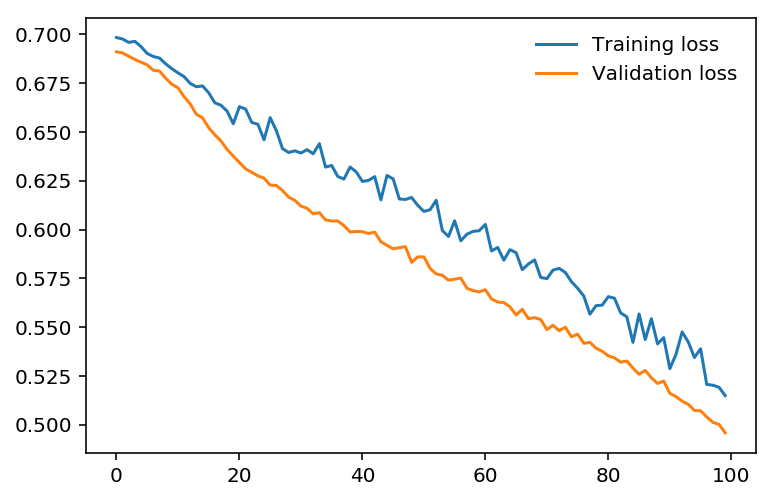

In [22]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

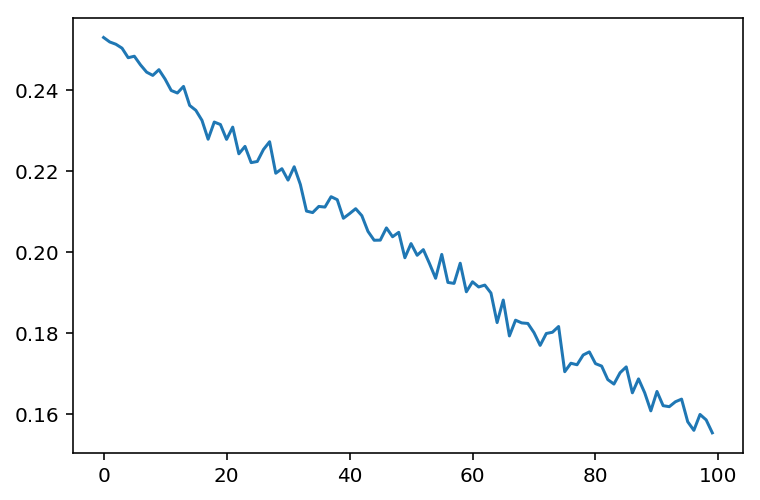

In [19]:
plt.plot(train_losses, label='Training loss')
